<a href="https://colab.research.google.com/github/makarandmadhavi/Marketting-Campaign-Feature-Engineering-Modeling-Interpretability-report/blob/main/Marketting_Campaign_Feature_Engineering__Modeling_Interpretability_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Marketting Campaign Report

## About Dataset - Marketing Campaign

**Context**
A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses. The objective is to predict who will respond to an offer for a product or service

**Content**

1. AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
2. AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
3. AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
4. AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
5. AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
6. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
7. Complain - 1 if customer complained in the last 2 years
8. DtCustomer - date of customer’s enrolment with the company
9. Education - customer’s level of education
10. Marital - customer’s marital status
11. Kidhome - number of small children in customer’s household
12. Teenhome - number of teenagers in customer’s household
13. Income - customer’s yearly household income
14. MntFishProducts - amount spent on fish products in the last 2 years
15. MntMeatProducts - amount spent on meat products in the last 2 years
16. MntFruits - amount spent on fruits products in the last 2 years
17. MntSweetProducts - amount spent on sweet products in the last 2 years
18. MntWines - amount spent on wine products in the last 2 years
19. MntGoldProds - amount spent on gold products in the last 2 years
20. NumDealsPurchases - number of purchases made with discount
21. NumCatalogPurchases - number of purchases made using catalogue
22. NumStorePurchases - number of purchases made directly in stores
23. NumWebPurchases - number of purchases made through company’s web site
24. NumWebVisitsMonth - number of visits to company’s web site in the last month
25. Recency - number of days since the last purchase


## Assignment

Combine Data Cleaning, Feature Selection, Modeling, and Interpretability into one report (Every assignment except TMINST) and make it a cohesive readable report.

The focus is readability and clarity.


The following must be answered:

1. What is the question?
2. What did you do?
3. How well did it work?
4. What did you learn?



# Installing Dependencies and Importing Libraries

In [407]:
!pip install eli5
!pip install h2o
!pip install graphviz
!pip install shap

libc++abi: terminating due to uncaught exception of type std::runtime_error: Couldn't close file
libc++abi: terminating due to uncaught exception of type std::runtime_error: Couldn't close file
libc++abi: terminating due to uncaught exception of type std::runtime_error: Couldn't close file
libc++abi: terminating due to uncaught exception of type std::runtime_error: Couldn't close file


In [408]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.inspection import permutation_importance

# Data Cleaning and Feature Engineering

In [409]:
#Reading the Marketting campaign Dataset
data = pd.read_csv("https://raw.githubusercontent.com/makarandmadhavi/ML-Data-Cleaning-and-Feature-Selection/main/marketing_campaign.csv", sep=";")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i



Using data.info() we have the following information-


1.   25 integer data types, 
2.   3 categorical data type
3.   1 floating point data type


In [410]:
#pandas by default only displays 20 columns max, to view all 28 columns in output we set max_columns to None
pd.options.display.max_columns = None
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [411]:
data[["Education", "Marital_Status","Dt_Customer"]].describe()

Education Marital_Status Dt_Customer
count         2240           2240        2240
unique           5              8         663
top     Graduation        Married  2012-08-31
freq          1127            864          12

In [412]:
data[["Z_CostContact", "Z_Revenue"]].describe()

Z_CostContact  Z_Revenue
count         2240.0     2240.0
mean             3.0       11.0
std              0.0        0.0
min              3.0       11.0
25%              3.0       11.0
50%              3.0       11.0
75%              3.0       11.0
max              3.0       11.0


Getting a first look at the raw data lets us understand some nature of the data.


1.   Dt_customer represents start date of customer journey, he can be converted to numeric type "customer since" to indicate number of days months or year a customer has been a part
2.   AcceptedCmp variables have 1/0 representing if customer accepted campaign offer before hence they can be treated as categorical yes/no
3. Response is our target prediction variable
4. We have no description of Z_CostContact	Z_Revenue variables in data description. Describing them rreveals they are filled with 11s and 3s and have no real significance hence we will be dropping those for this analysis.


Considered Data Types:- 

Column Data type (categorical/numeric)                 

-------      

Year_Birth              int64  numeric

Education               object categorical

Marital_Status          object categorical

Income                 float64 numeric

Kidhome                 int64  numeric

Teenhome                int64  numeric

Dt_Customer             object categorical

Recency                 int64  numeric

MntWines                int64  numeric

MntFruits               int64  numeric

MntMeatProducts         int64  numeric

MntFishProducts         int64  numeric

MntSweetProducts        int64  numeric

MntGoldProds            int64  numeric

NumDealsPurchases       int64  numeric

NumWebPurchases         int64  numeric

NumCatalogPurchases     int64  numeric

NumStorePurchases       int64  numeric

NumWebVisitsMonth       int64  numeric

AcceptedCmp3            int64  categorical

AcceptedCmp4            int64  categorical

AcceptedCmp5            int64  categorical

AcceptedCmp1            int64  categorical

AcceptedCmp2            int64  categorical

Complain                int64  categorical

Response                int64  categorical

In [413]:
#Dropping columns 
data.drop(columns = ["Z_CostContact","Z_Revenue","ID",],inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

## Null Values

In [414]:
#checking if the any data is missing
percent_missing = data.isnull().sum() * 100 / len(data)
null_values_total = data.isnull().sum()
missing_value_df = pd.DataFrame({
                                 'Missing_Total' : null_values_total,
                                 'percent_missing': percent_missing,
                                 })
missing_value_df

Missing_Total  percent_missing
Year_Birth                       0         0.000000
Education                        0         0.000000
Marital_Status                   0         0.000000
Income                          24         1.071429
Kidhome                          0         0.000000
Teenhome                         0         0.000000
Dt_Customer                      0         0.000000
Recency                          0         0.000000
MntWines                         0         0.000000
MntFruits                        0         0.000000
MntMeatProducts                  0         0.000000
MntFishProducts                  0         0.000000
MntSweetProducts                 0         0.000000
MntGoldProds                     0         0.000000
NumDealsPurchases                0         0.000000
NumWebPurchases                  0         0.000000
NumCatalogPurchases              0         0.000000
NumStorePurchases                0         0.000000
NumWebVisitsMonth                0         0.000000
AcceptedCmp3                     0         0.000000
AcceptedCmp4                     0         0.000000
AcceptedCmp5                     0         0.000000
AcceptedCmp1                     0         0.000000
AcceptedCmp2                     0         0.000000
Complain                         0         0.000000
Response                         0         0.000000

There are several ways to handle null-values :



1. We can delete the rows containing null-values
2. We can impute the mean value
3. We can input the mean value of a specific population : in this case we would split by Education
4. We can use a model to predict missing values


With our dataset, we will fill missing values of Income by mean of Eduction

In [415]:
data['Income'].fillna(data.groupby('Education')['Income'].transform('mean'), inplace = True)

In [416]:
#checking if the any data is missing
percent_missing = data.isnull().sum() * 100 / len(data)
null_values_total = data.isnull().sum()
missing_value_df = pd.DataFrame({
                                 'Missing_Total' : null_values_total,
                                 'percent_missing': percent_missing,
                                 })
missing_value_df

Missing_Total  percent_missing
Year_Birth                       0              0.0
Education                        0              0.0
Marital_Status                   0              0.0
Income                           0              0.0
Kidhome                          0              0.0
Teenhome                         0              0.0
Dt_Customer                      0              0.0
Recency                          0              0.0
MntWines                         0              0.0
MntFruits                        0              0.0
MntMeatProducts                  0              0.0
MntFishProducts                  0              0.0
MntSweetProducts                 0              0.0
MntGoldProds                     0              0.0
NumDealsPurchases                0              0.0
NumWebPurchases                  0              0.0
NumCatalogPurchases              0              0.0
NumStorePurchases                0              0.0
NumWebVisitsMonth                0              0.0
AcceptedCmp3                     0              0.0
AcceptedCmp4                     0              0.0
AcceptedCmp5                     0              0.0
AcceptedCmp1                     0              0.0
AcceptedCmp2                     0              0.0
Complain                         0              0.0
Response                         0              0.0

## Numeric data distribution

In [417]:
data.describe()

Year_Birth         Income      Kidhome     Teenhome      Recency  \
count  2240.000000    2240.000000  2240.000000  2240.000000  2240.000000   
mean   1968.805804   52253.592375     0.444196     0.506250    49.109375   
std      11.984069   25039.085601     0.538398     0.544538    28.962453   
min    1893.000000    1730.000000     0.000000     0.000000     0.000000   
25%    1959.000000   35538.750000     0.000000     0.000000    24.000000   
50%    1970.000000   51609.500000     0.000000     0.000000    49.000000   
75%    1977.000000   68289.750000     1.000000     1.000000    74.000000   
max    1996.000000  666666.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000         0.000000   
25%      23.750000     1.000000        16.000000         3.000000   
50%     173.500000     8.000000        67.000000        12.000000   
75%     504.250000    33.000000       232.000000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
count       2240.000000   2240.000000        2240.000000      2240.000000   
mean          27.062946     44.021875           2.325000         4.084821   
std           41.280498     52.167439           1.932238         2.778714   
min            0.000000      0.000000           0.000000         0.000000   
25%            1.000000      9.000000           1.000000         2.000000   
50%            8.000000     24.000000           2.000000         4.000000   
75%           33.000000     56.000000           3.000000         6.000000   
max          263.000000    362.000000          15.000000        27.000000   

       NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
count          2240.000000        2240.000000        2240.000000   
mean              2.662054           5.790179           5.316518   
std               2.923101           3.250958           2.426645   
min               0.000000           0.000000           0.000000   
25%               0.000000           3.000000           3.000000   
50%               2.000000           5.000000           6.000000   
75%               4.000000           8.000000           7.000000   
max              28.000000          13.000000          20.000000   

       AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
count   2240.000000   2240.000000   2240.000000   2240.000000   2240.000000   
mean       0.072768      0.074554      0.072768      0.064286      0.013393   
std        0.259813      0.262728      0.259813      0.245316      0.114976   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          Complain     Response  
count  2240.000000  2240.000000  
mean      0.009375     0.149107  
std       0.096391     0.356274  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       0.000000     0.000000  
max       1.000000     1.000000

[Text(0, 0, 'MntWines'),
 Text(0, 0, 'MntFruits'),
 Text(0, 0, 'MntMeatProducts'),
 Text(0, 0, 'MntFishProducts'),
 Text(0, 0, 'MntSweetProducts'),
 Text(0, 0, 'MntGoldProds')]

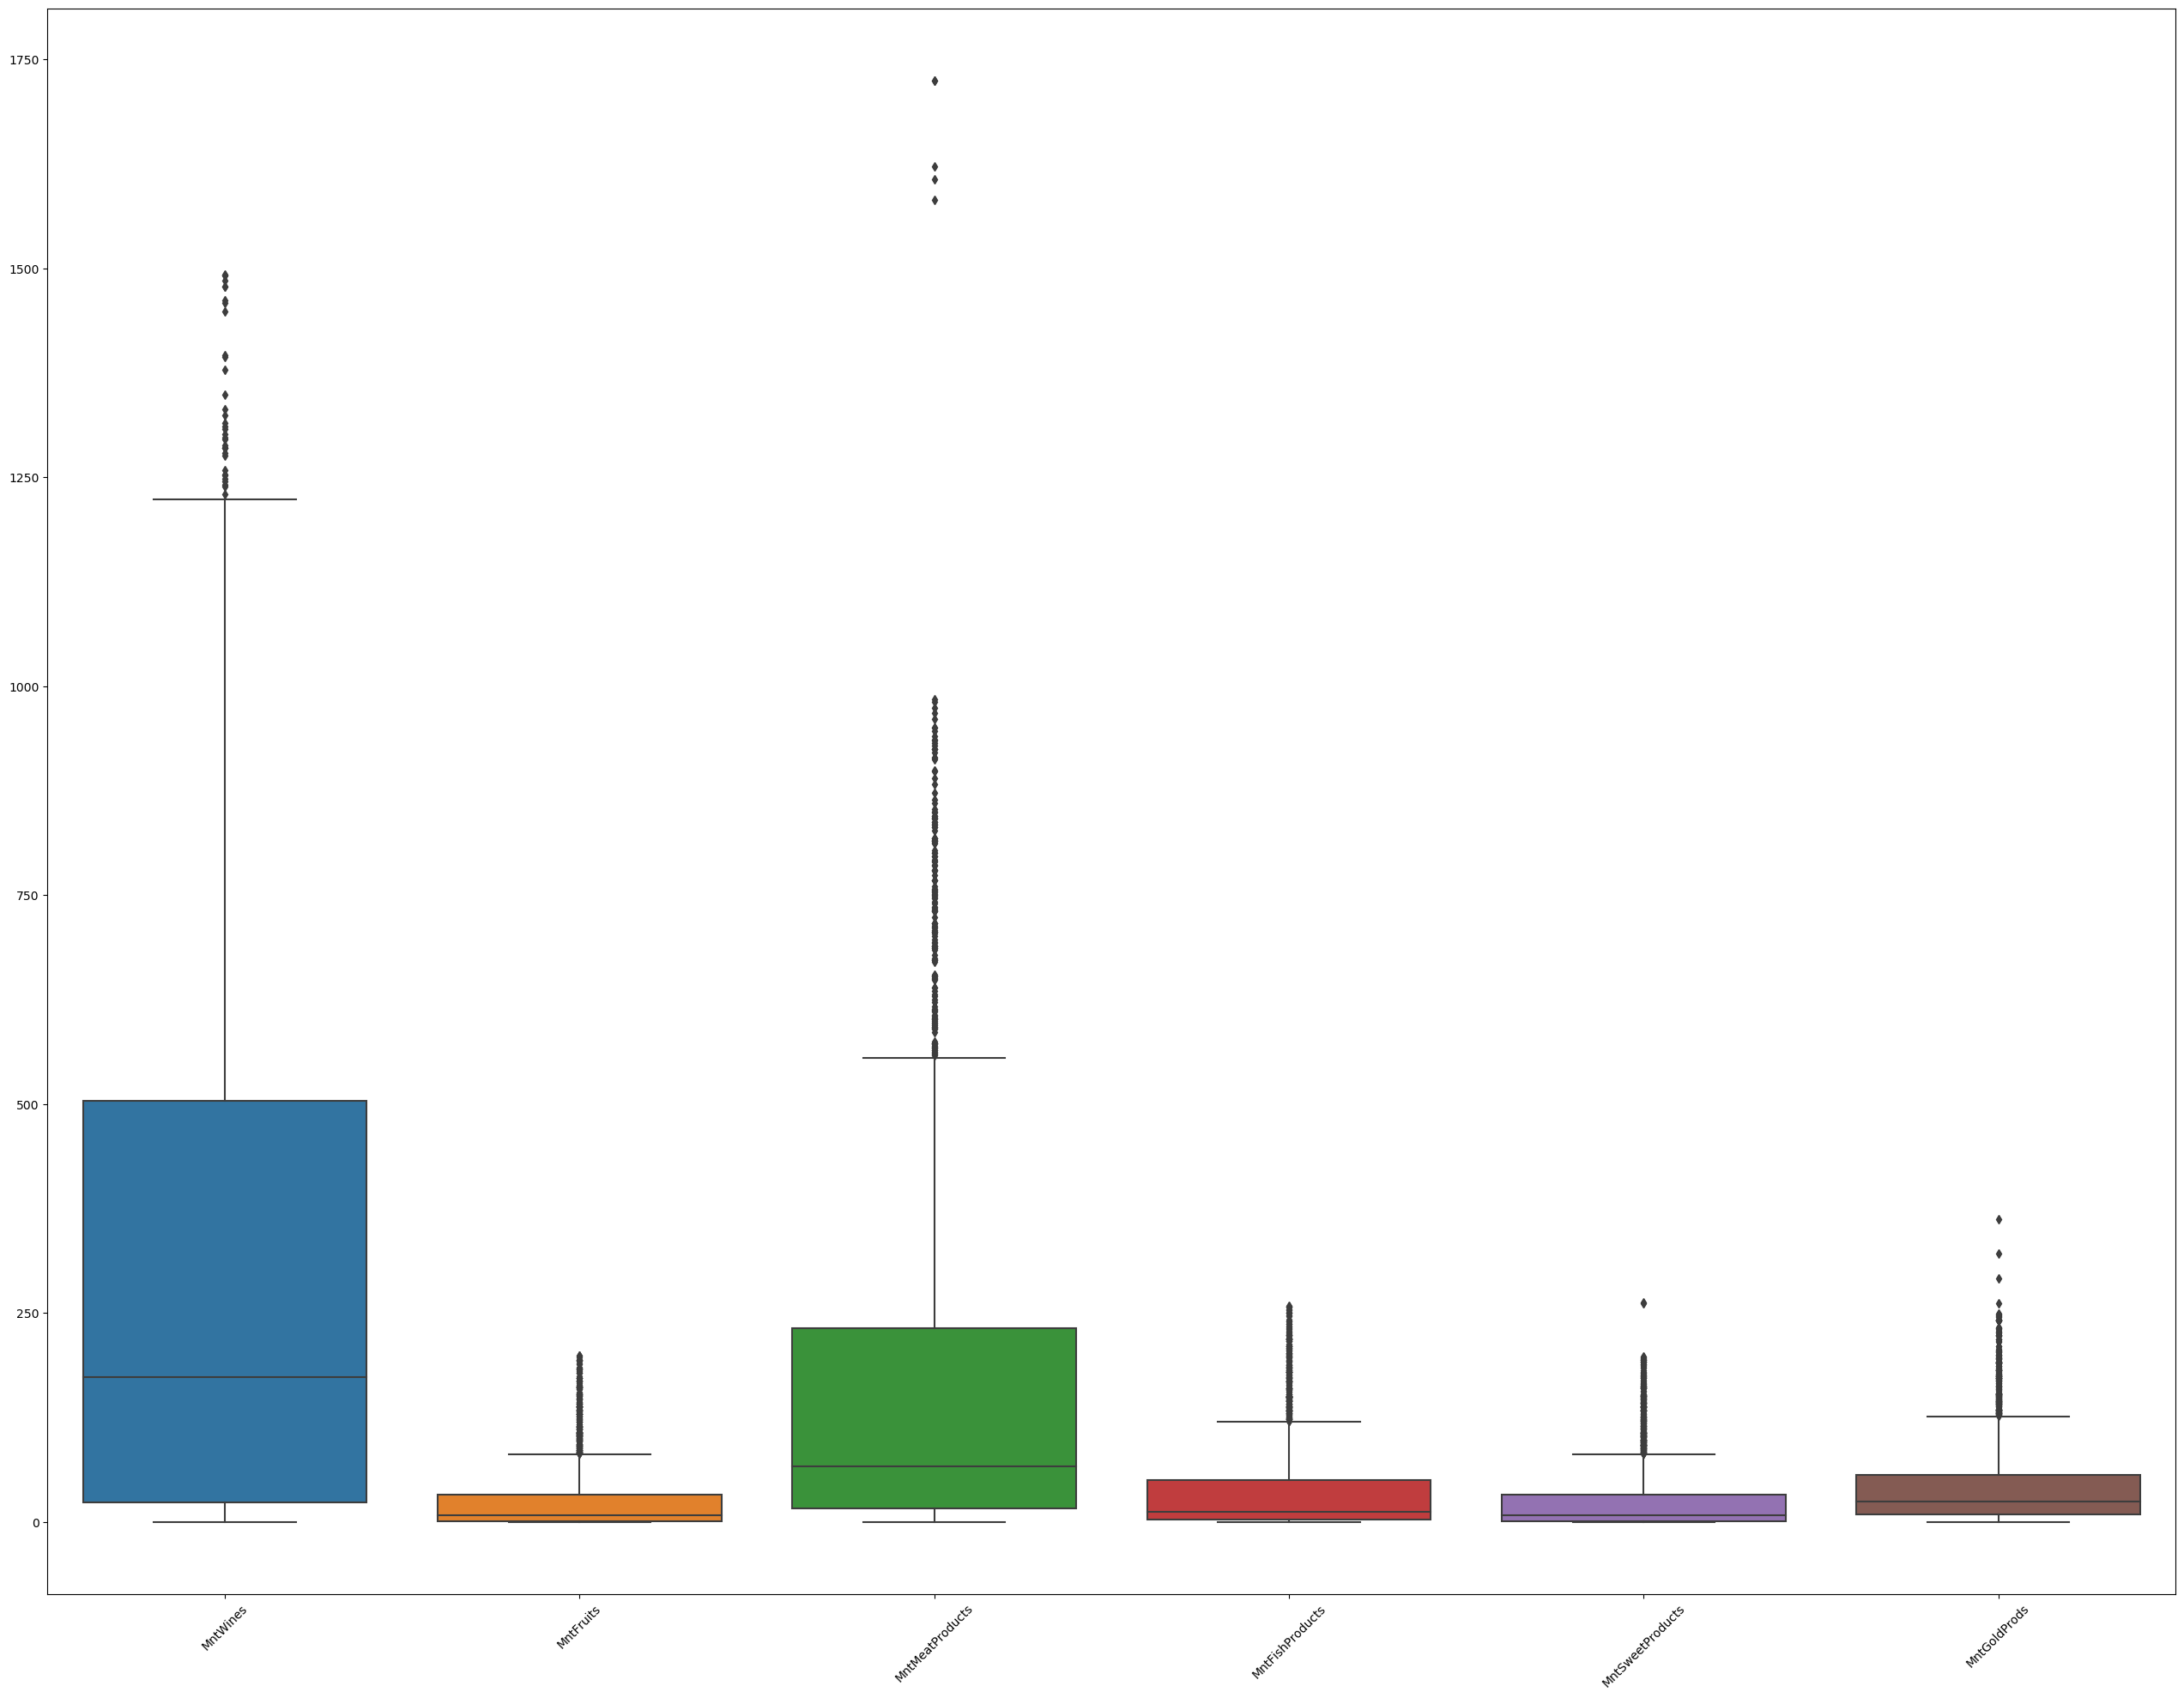

In [418]:
data_f=data[["MntWines",	"MntFruits"	,"MntMeatProducts",	"MntFishProducts","MntSweetProducts",	"MntGoldProds"]]
x = sns.boxplot(data=data_f)
x.set_xticklabels(x.get_xticklabels(),rotation=45)


data.describe() gives us an estimate of the numeric distribution of data


1. Average age of customers is 51 with median being 50 with max being 127 which I think is a rare case
2. Average income is 52253 with min and max being 1730 and 666666 indicating presence of outliers
3. Recency ranges between 0 and 99 indicating all customers surveyed were very active in within last 4 months
4. Amount spent on Wines and Meat is the most indicating thats where the majority sales lies
5. Number of items purchased is usually higher in stores
6. Almost all columns in the data need to be normalized as there is a vast difference in range of values of all columns



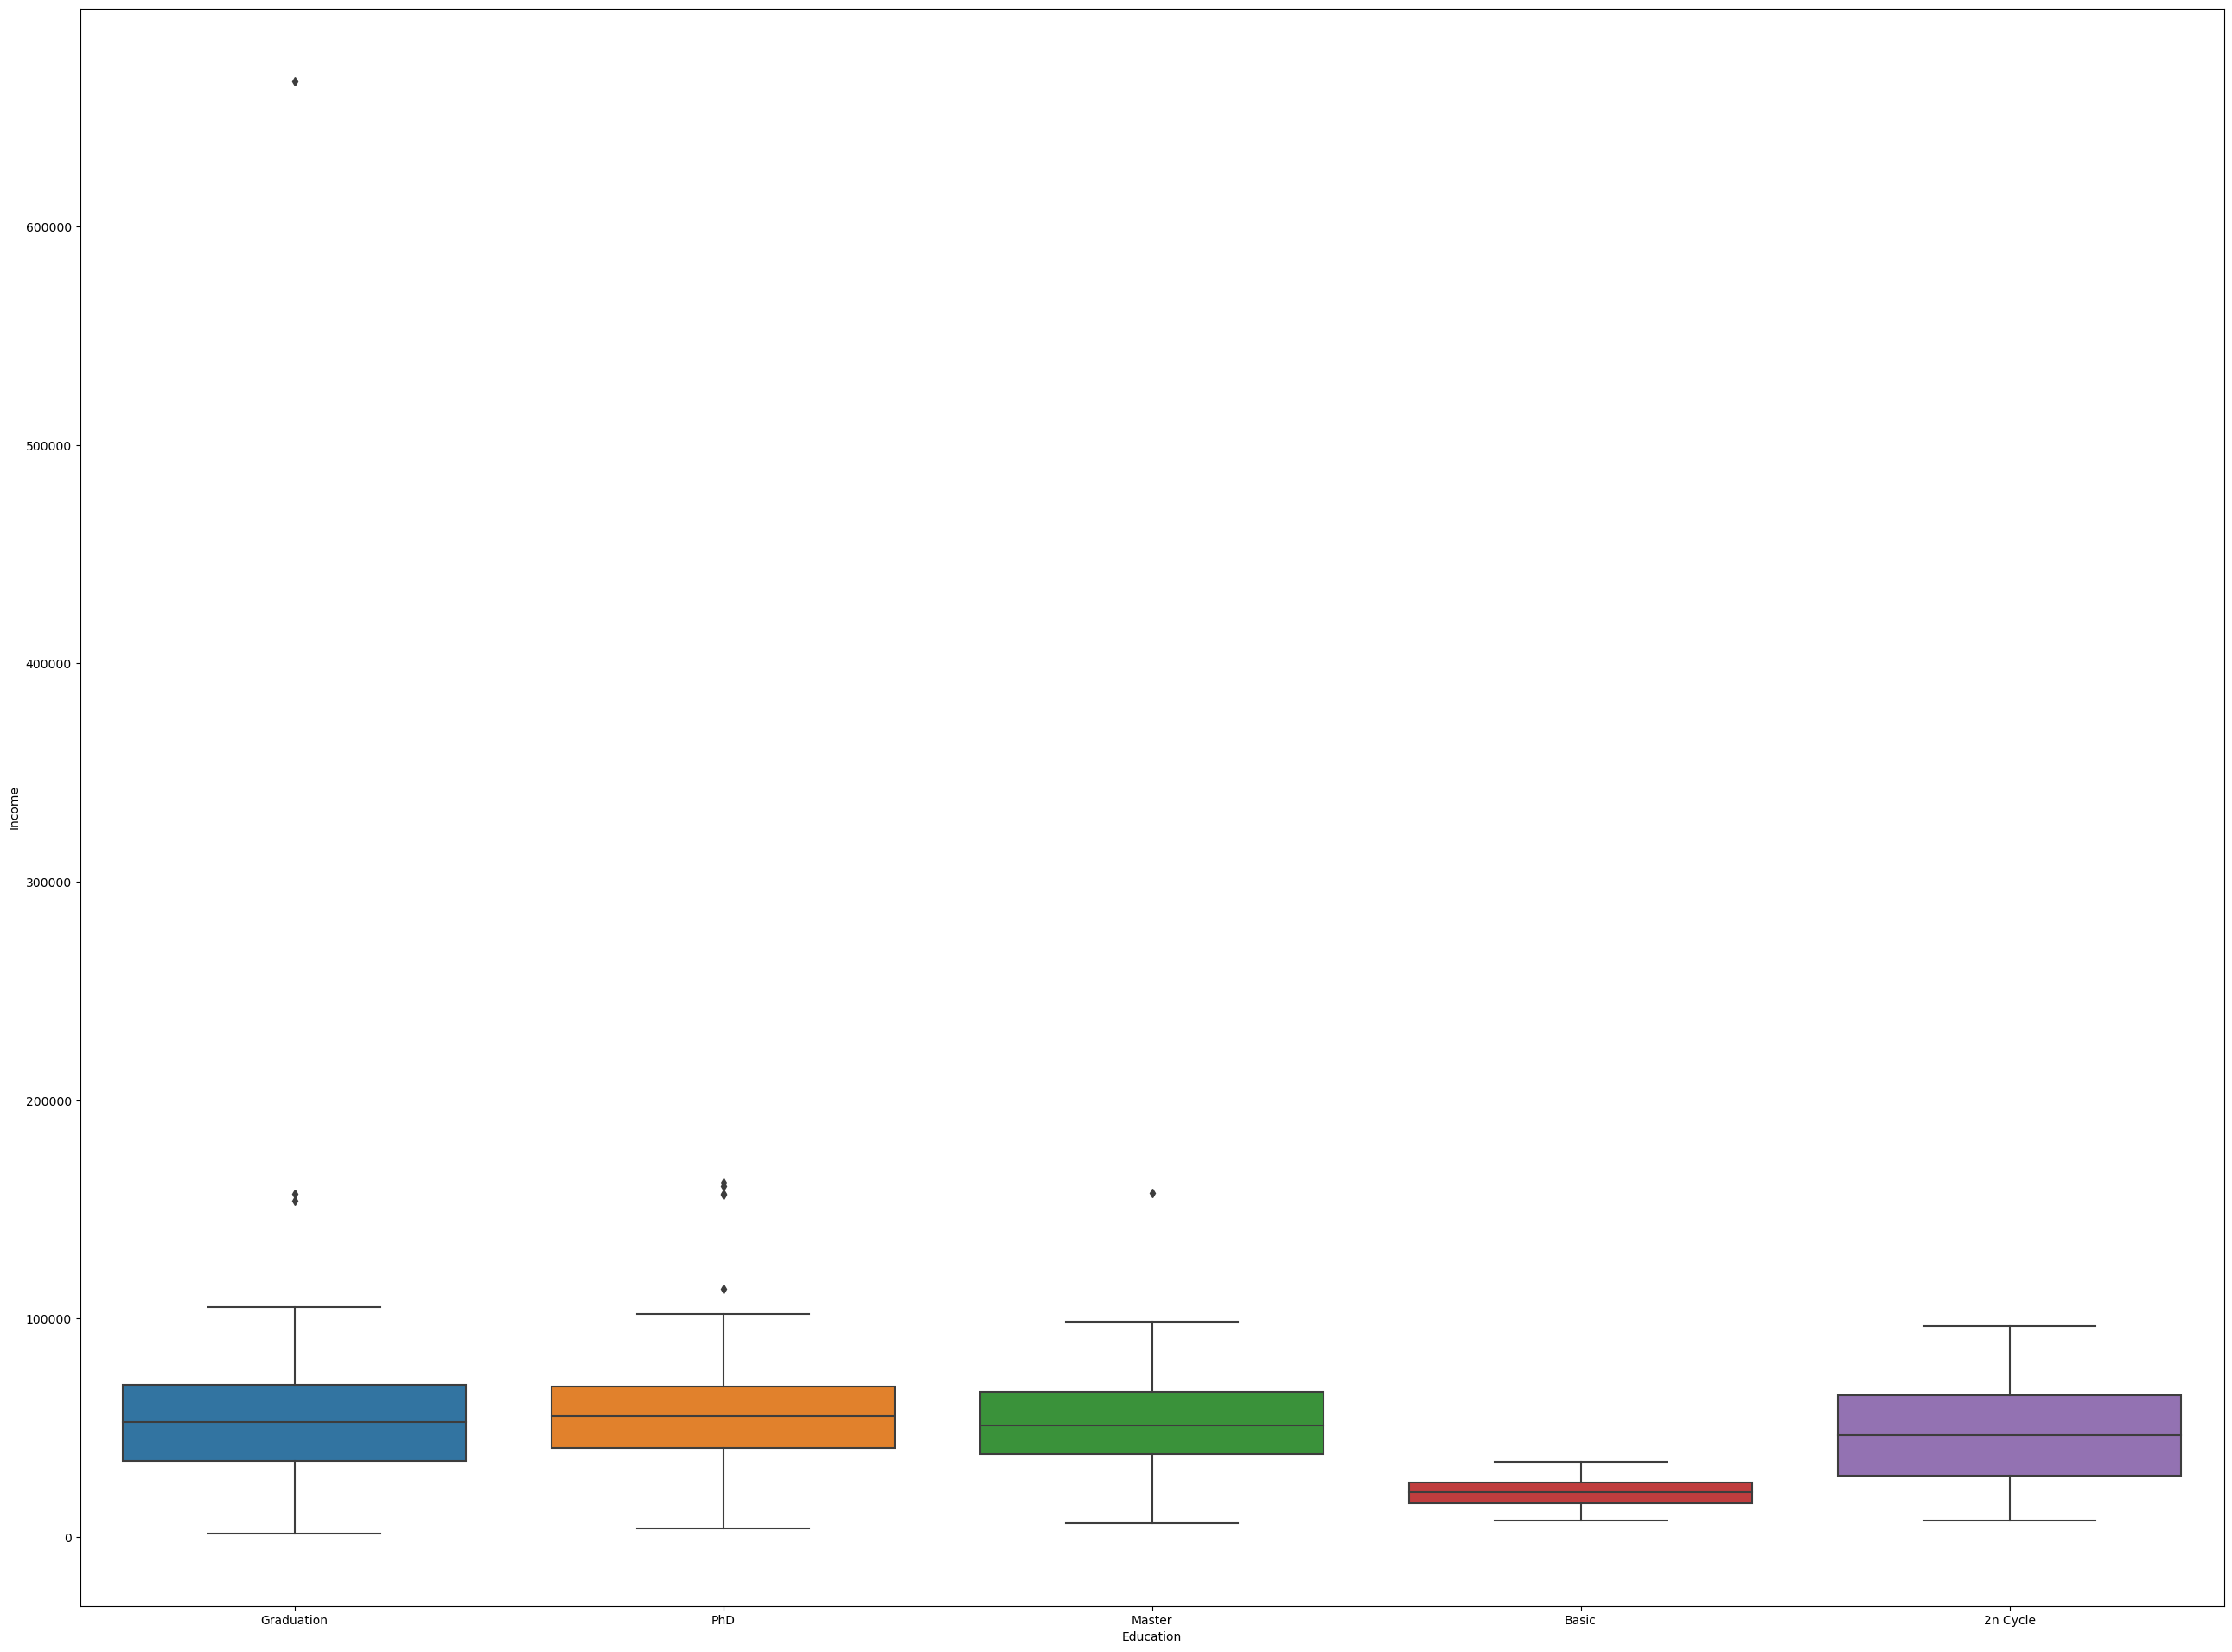

In [419]:
sns.boxplot( x = 'Education',y = 'Income', data = data)

Plotting Income grouped by education shows very less correlation between income and education for all educational categories except Basic which has very low Income. 

Notice we have ommited outliers to get a better visual representation of the boxplot

In [420]:
print(data['Income'].quantile(0.99))

94437.68000000001


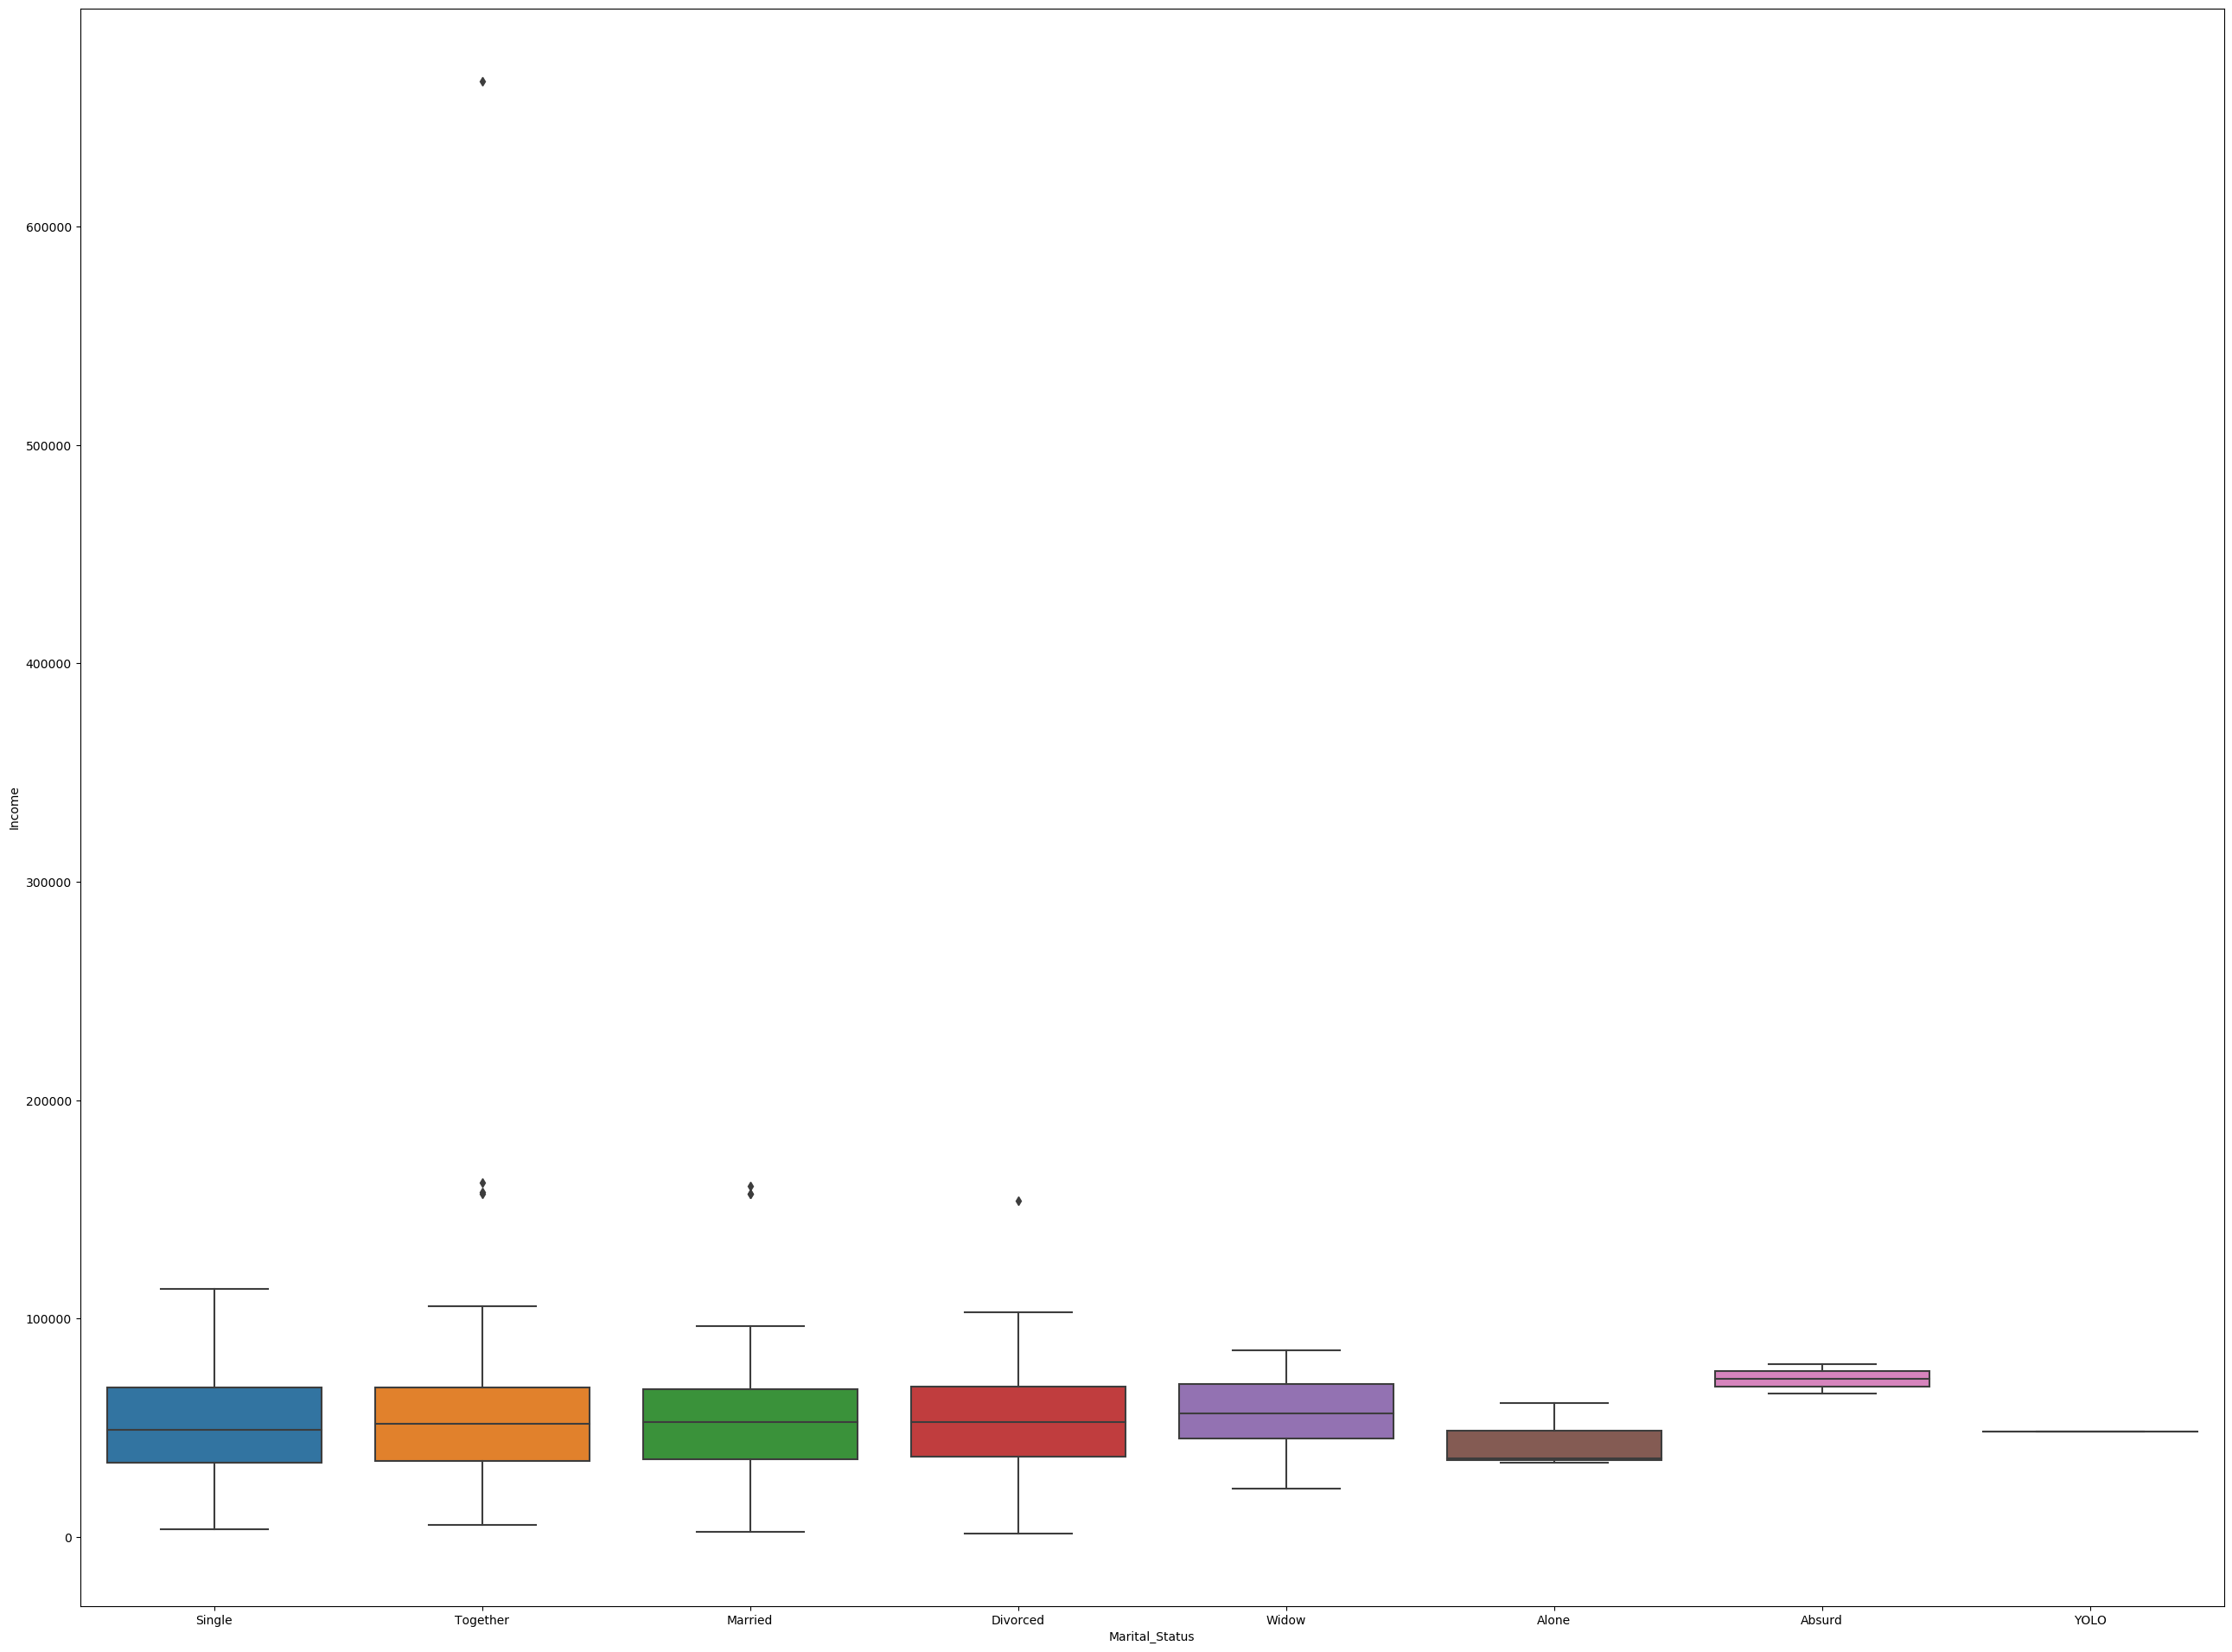

In [421]:
sns.boxplot( x = 'Marital_Status',y = 'Income', data = data)

## Data Transformation

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


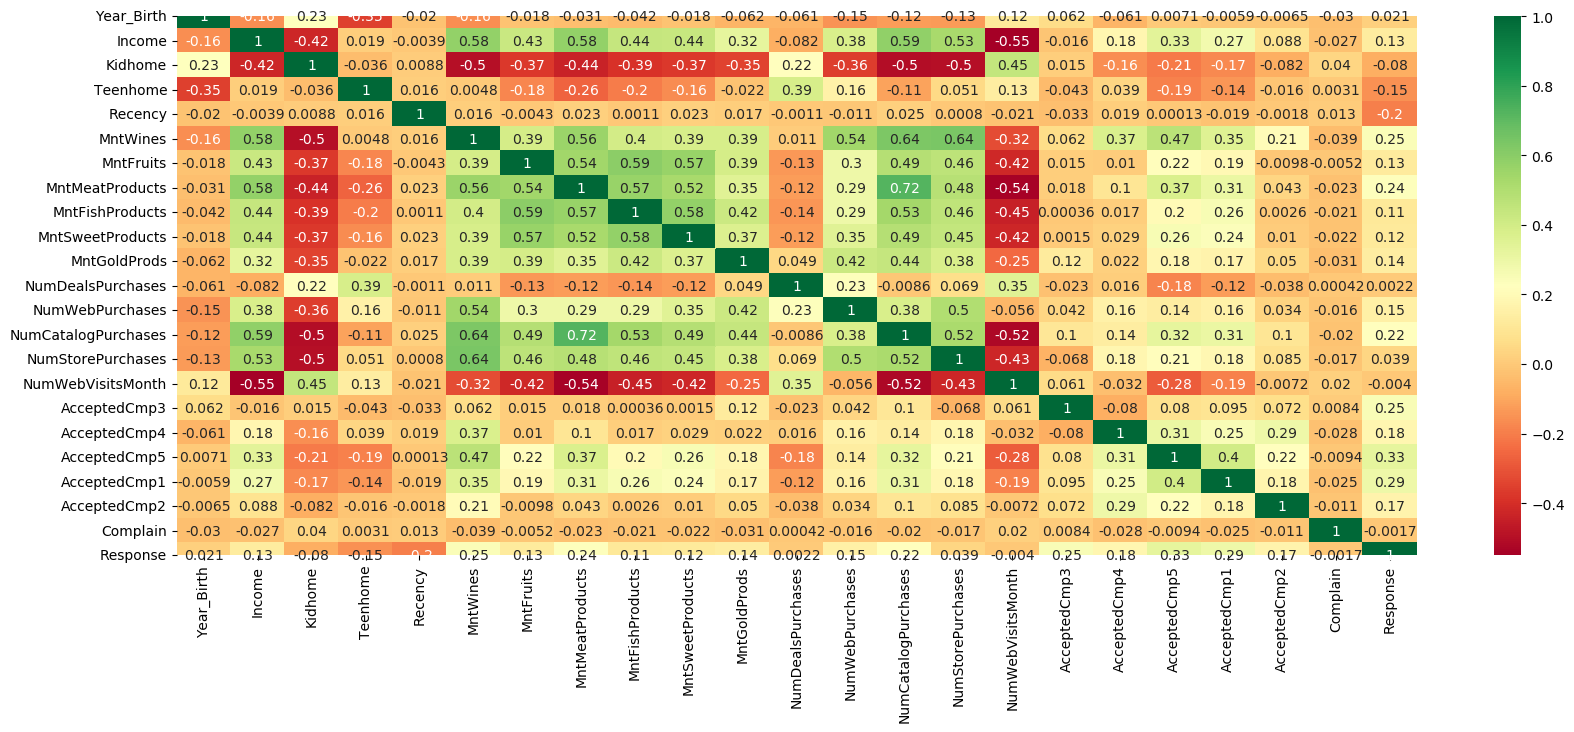

In [422]:
#The heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

Above Correlation shows there are very few variables closely related. 
1. All Number of purchases are above 0.5 and seem to be closely related
2. Similarly all amount purchased columns are also slightly closely related and can be grouped to denote one feature

In [423]:
# Converting birth year to age, considering age with respect to year 2020 because the data was last updated 3 years ago
data['Year_Birth'] = data['Year_Birth'].apply(lambda x: 2020-x)
data = data.rename(columns={'Year_Birth': 'Age'})
data[['Age']].head()

Age
0   63
1   66
2   55
3   36
4   39

In [424]:
data.Education.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

Education is Ordinal type variable.

By Doing some research "2nd Cycle" Eduction type usually represents graduate or masters level education in some countries [Source](https://www.studera.nu/startpage/higher-education-studies/higher-education-in-sweden/study-levels-and-degrees/)

So we transform education in order of education levels


1.   Basic
2.   Graduation
3.   Master / 2nd Cycle
4.   PhD



In [425]:
Education_map = {'Basic':1,
            'Graduation':2,
            'Master':3,
            '2n Cycle':3,
            'PhD':4}
# Create the mapped values in a new column
data['Education'] = data['Education'].map(Education_map)
# Review dataset
data[['Education']].head()

Education
0          2
1          2
2          2
3          2
4          4

Dt_Customer represents how long a person was a customer, thus we convert the date to how many days it has been since a person became a customer of the store

In [426]:
from datetime import datetime
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%Y-%m-%d')
data['Dt_Customer'] = (datetime(2020,1,1) - data['Dt_Customer']).dt.days
data[['Dt_Customer']].describe()

Dt_Customer
count  2240.000000
mean   2365.582143
std     202.122512
min    2012.000000
25%    2192.750000
50%    2367.500000
75%    2541.000000
max    2711.000000



1.   Kidhome and Teenhome is combined to total number of children home
2.   All amounts are aggregated to amount spent denoting totoal amount spent by customer till now
3. All orders are clubbed to toal number of orders made by the customer
4. Previous campaign responses are clubbed to total number of campaigns accepted before



In [427]:
data['Children'] = data['Kidhome'] + data['Teenhome']
data.drop(columns = ["Kidhome","Teenhome"],inplace = True)

data['AmountSpent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
data.drop(columns = ["MntWines",	"MntFruits"	,"MntMeatProducts",	"MntFishProducts","MntSweetProducts",	"MntGoldProds"],inplace = True)

data['NumPurchased'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']
data.drop(columns = ["NumWebPurchases",	"NumCatalogPurchases",	"NumStorePurchases"],inplace = True)

data['Prev_campaigns'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']
data.drop(columns = ["AcceptedCmp3",	"AcceptedCmp4",	"AcceptedCmp5",	"AcceptedCmp1",	"AcceptedCmp2"],inplace = True)

data.head()


Age  Education Marital_Status   Income  Dt_Customer  Recency  \
0   63          2         Single  58138.0         2675       58   
1   66          2         Single  46344.0         2125       38   
2   55          2       Together  71613.0         2324       26   
3   36          2       Together  26646.0         2151       26   
4   39          4        Married  58293.0         2173       94   

   NumDealsPurchases  NumWebVisitsMonth  Complain  Response  Children  \
0                  3                  7         0         1         0   
1                  2                  5         0         0         2   
2                  1                  4         0         0         0   
3                  2                  6         0         0         1   
4                  5                  5         0         0         1   

   AmountSpent  NumPurchased  Prev_campaigns  
0         1617            22               0  
1           27             4               0  
2          776            20               0  
3           53             6               0  
4          422            14               0

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


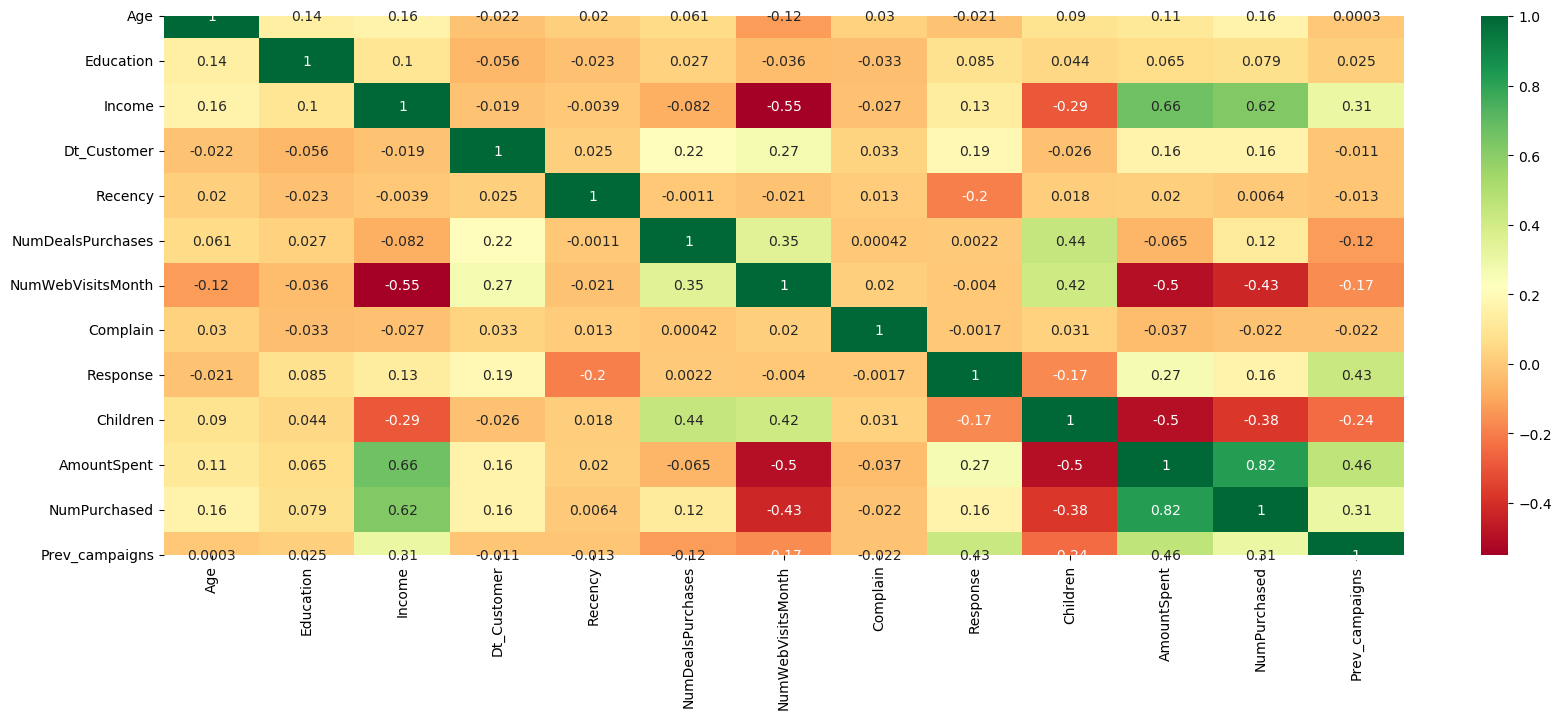

In [428]:
#The heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

Aggregated data abouve shows a close correlation of amount spent and number of orders

In [429]:
data.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

Here different marital statuses denote the same thing thus we map them to two categories Couple and Single

In [430]:
maratial_map = {'Married':"Couple",
            'Together':"Couple",
            'Single':'Single',
            'Divorced':'Single',
            'Widow':'Single',
            'Alone':'Single',
            'Absurd':'Single',
            'YOLO':'Single'}
# Create the mapped values in a new column
data['Marital_Status'] = data['Marital_Status'].map(maratial_map)
# Review dataset
data[['Marital_Status']].head()

Marital_Status
0         Single
1         Single
2         Couple
3         Couple
4         Couple

In [431]:
dummy_status = pd.get_dummies(data['Marital_Status'], prefix='Marital_Status')
dummy_status.head()

Marital_Status_Couple  Marital_Status_Single
0                      0                      1
1                      0                      1
2                      1                      0
3                      1                      0
4                      1                      0

Since maratial_status is a categorical column we create dummy variables

In [432]:
data = pd.concat([data, dummy_status], axis=1)
data.drop(['Marital_Status'], axis=1, inplace=True)
data.drop(['Marital_Status_Single'], axis=1, inplace=True)

data

Age  Education   Income  Dt_Customer  Recency  NumDealsPurchases  \
0      63          2  58138.0         2675       58                  3   
1      66          2  46344.0         2125       38                  2   
2      55          2  71613.0         2324       26                  1   
3      36          2  26646.0         2151       26                  2   
4      39          4  58293.0         2173       94                  5   
...   ...        ...      ...          ...      ...                ...   
2235   53          2  61223.0         2393       46                  2   
2236   74          4  64014.0         2031       56                  7   
2237   39          2  56981.0         2167       91                  1   
2238   64          3  69245.0         2168        8                  2   
2239   66          4  52869.0         2634       40                  3   

      NumWebVisitsMonth  Complain  Response  Children  AmountSpent  \
0                     7         0         1         0         1617   
1                     5         0         0         2           27   
2                     4         0         0         0          776   
3                     6         0         0         1           53   
4                     5         0         0         1          422   
...                 ...       ...       ...       ...          ...   
2235                  5         0         0         1         1341   
2236                  7         0         0         3          444   
2237                  6         0         0         0         1241   
2238                  3         0         0         1          843   
2239                  7         0         1         2          172   

      NumPurchased  Prev_campaigns  Marital_Status_Couple  
0               22               0                      0  
1                4               0                      0  
2               20               0                      1  
3                6               0                      1  
4               14               0                      1  
...            ...             ...                    ...  
2235            16               0                      1  
2236            15               1                      1  
2237            18               1                      0  
2238            21               0                      1  
2239             8               0                      1  

[2240 rows x 14 columns]

## Normalization

[Text(0, 0, 'Age'),
 Text(0, 0, 'Education'),
 Text(0, 0, 'Income'),
 Text(0, 0, 'Dt_Customer'),
 Text(0, 0, 'Recency'),
 Text(0, 0, 'NumDealsPurchases'),
 Text(0, 0, 'NumWebVisitsMonth'),
 Text(0, 0, 'Complain'),
 Text(0, 0, 'Response'),
 Text(0, 0, 'Children'),
 Text(0, 0, 'AmountSpent'),
 Text(0, 0, 'NumPurchased'),
 Text(0, 0, 'Prev_campaigns'),
 Text(0, 0, 'Marital_Status_Couple')]

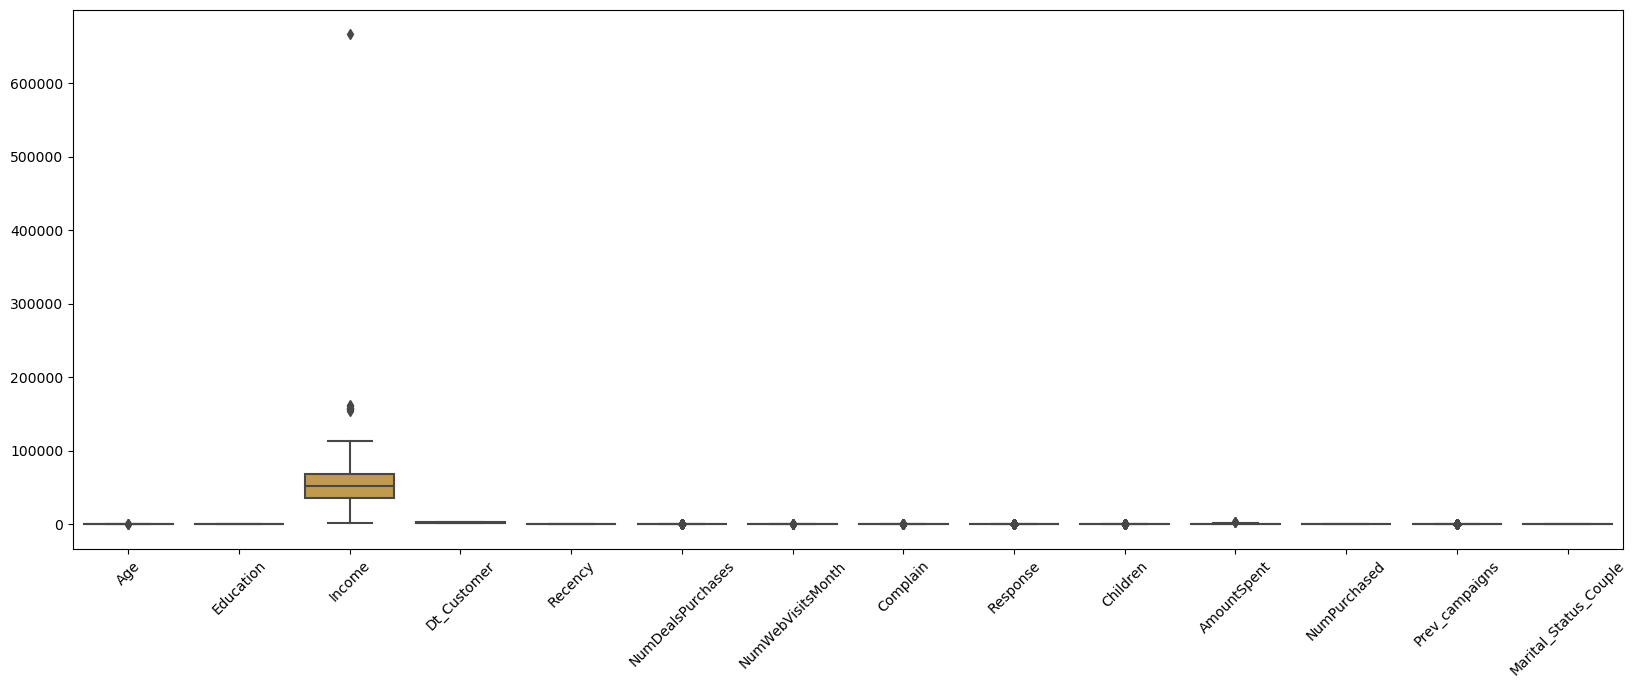

In [433]:
plt.figure(figsize=(20,7))
x = sns.boxplot(data=data)
x.set_xticklabels(x.get_xticklabels(),rotation=45)

Box plot shows Income having outliers and there is a vast difference between range of values between Income and other columns. We need to normalize data so all variables have equal weightage

In [434]:
# from sklearn import preprocessing

# # Create x to store scaled values as floats
# x = data[["Age",	"Education",	"Income",	"Dt_Customer",	"Recency",	"NumDealsPurchases",	"NumWebVisitsMonth",	"Children",	"AmountSpent",	"NumPurchased",	"Prev_campaigns"]].values.astype(float)

# # Preparing for normalizing
# min_max_scaler = preprocessing.MinMaxScaler()

# # Transform the data to fit minmax processor
# x_scaled = min_max_scaler.fit_transform(x)

# # Run the normalizer on the dataframe
# data[["Age",	"Education",	"Income",	"Dt_Customer",	"Recency",	"NumDealsPurchases",	"NumWebVisitsMonth",	"Children",	"AmountSpent",	"NumPurchased",	"Prev_campaigns"]] = pd.DataFrame(x_scaled)

# data.head()

[Text(0, 0, 'Age'),
 Text(0, 0, 'Education'),
 Text(0, 0, 'Income'),
 Text(0, 0, 'Dt_Customer'),
 Text(0, 0, 'Recency'),
 Text(0, 0, 'NumDealsPurchases'),
 Text(0, 0, 'NumWebVisitsMonth'),
 Text(0, 0, 'Complain'),
 Text(0, 0, 'Response'),
 Text(0, 0, 'Children'),
 Text(0, 0, 'AmountSpent'),
 Text(0, 0, 'NumPurchased'),
 Text(0, 0, 'Prev_campaigns'),
 Text(0, 0, 'Marital_Status_Couple')]

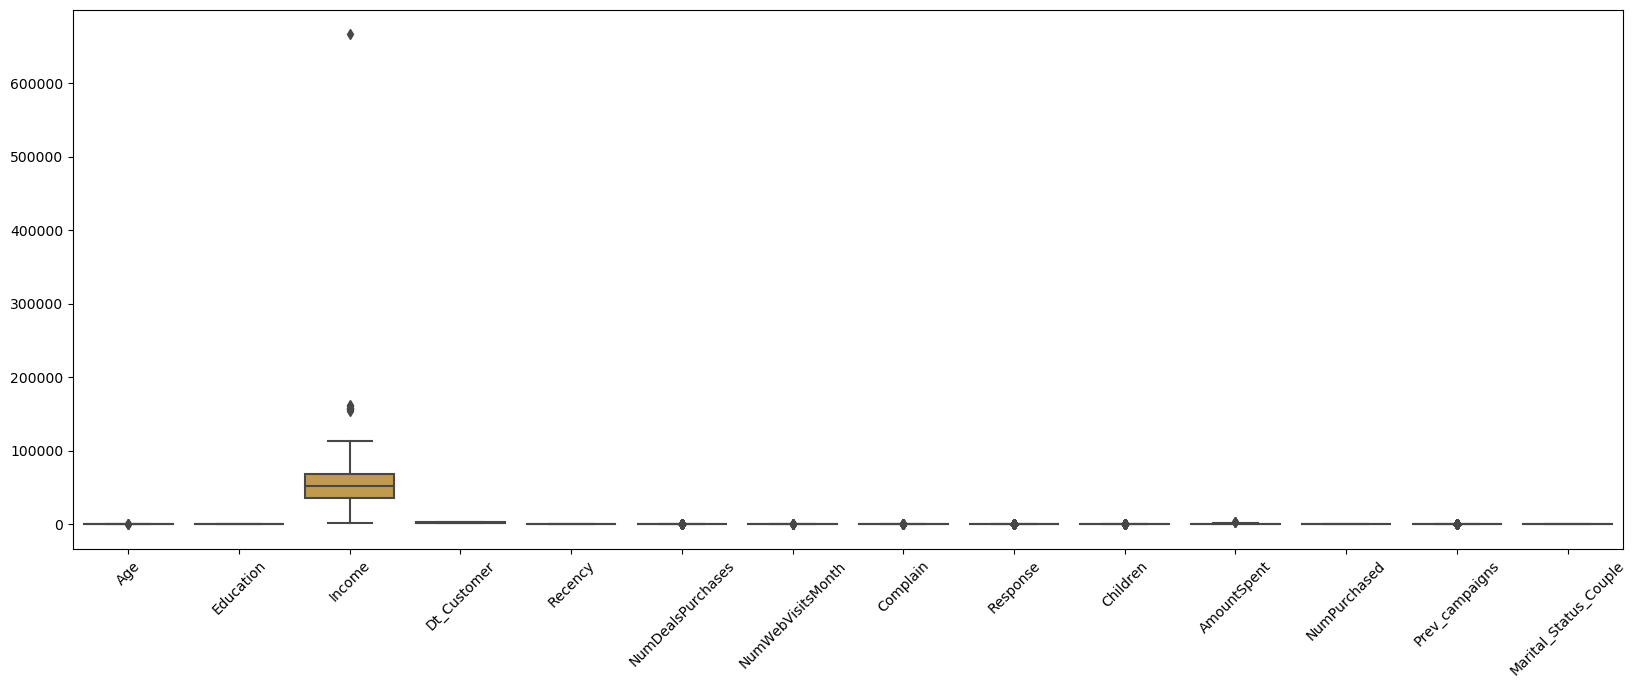

In [435]:
plt.figure(figsize=(20,7))
x = sns.boxplot(data=data)
x.set_xticklabels(x.get_xticklabels(),rotation=45)

<Figure size 800x500 with 0 Axes>

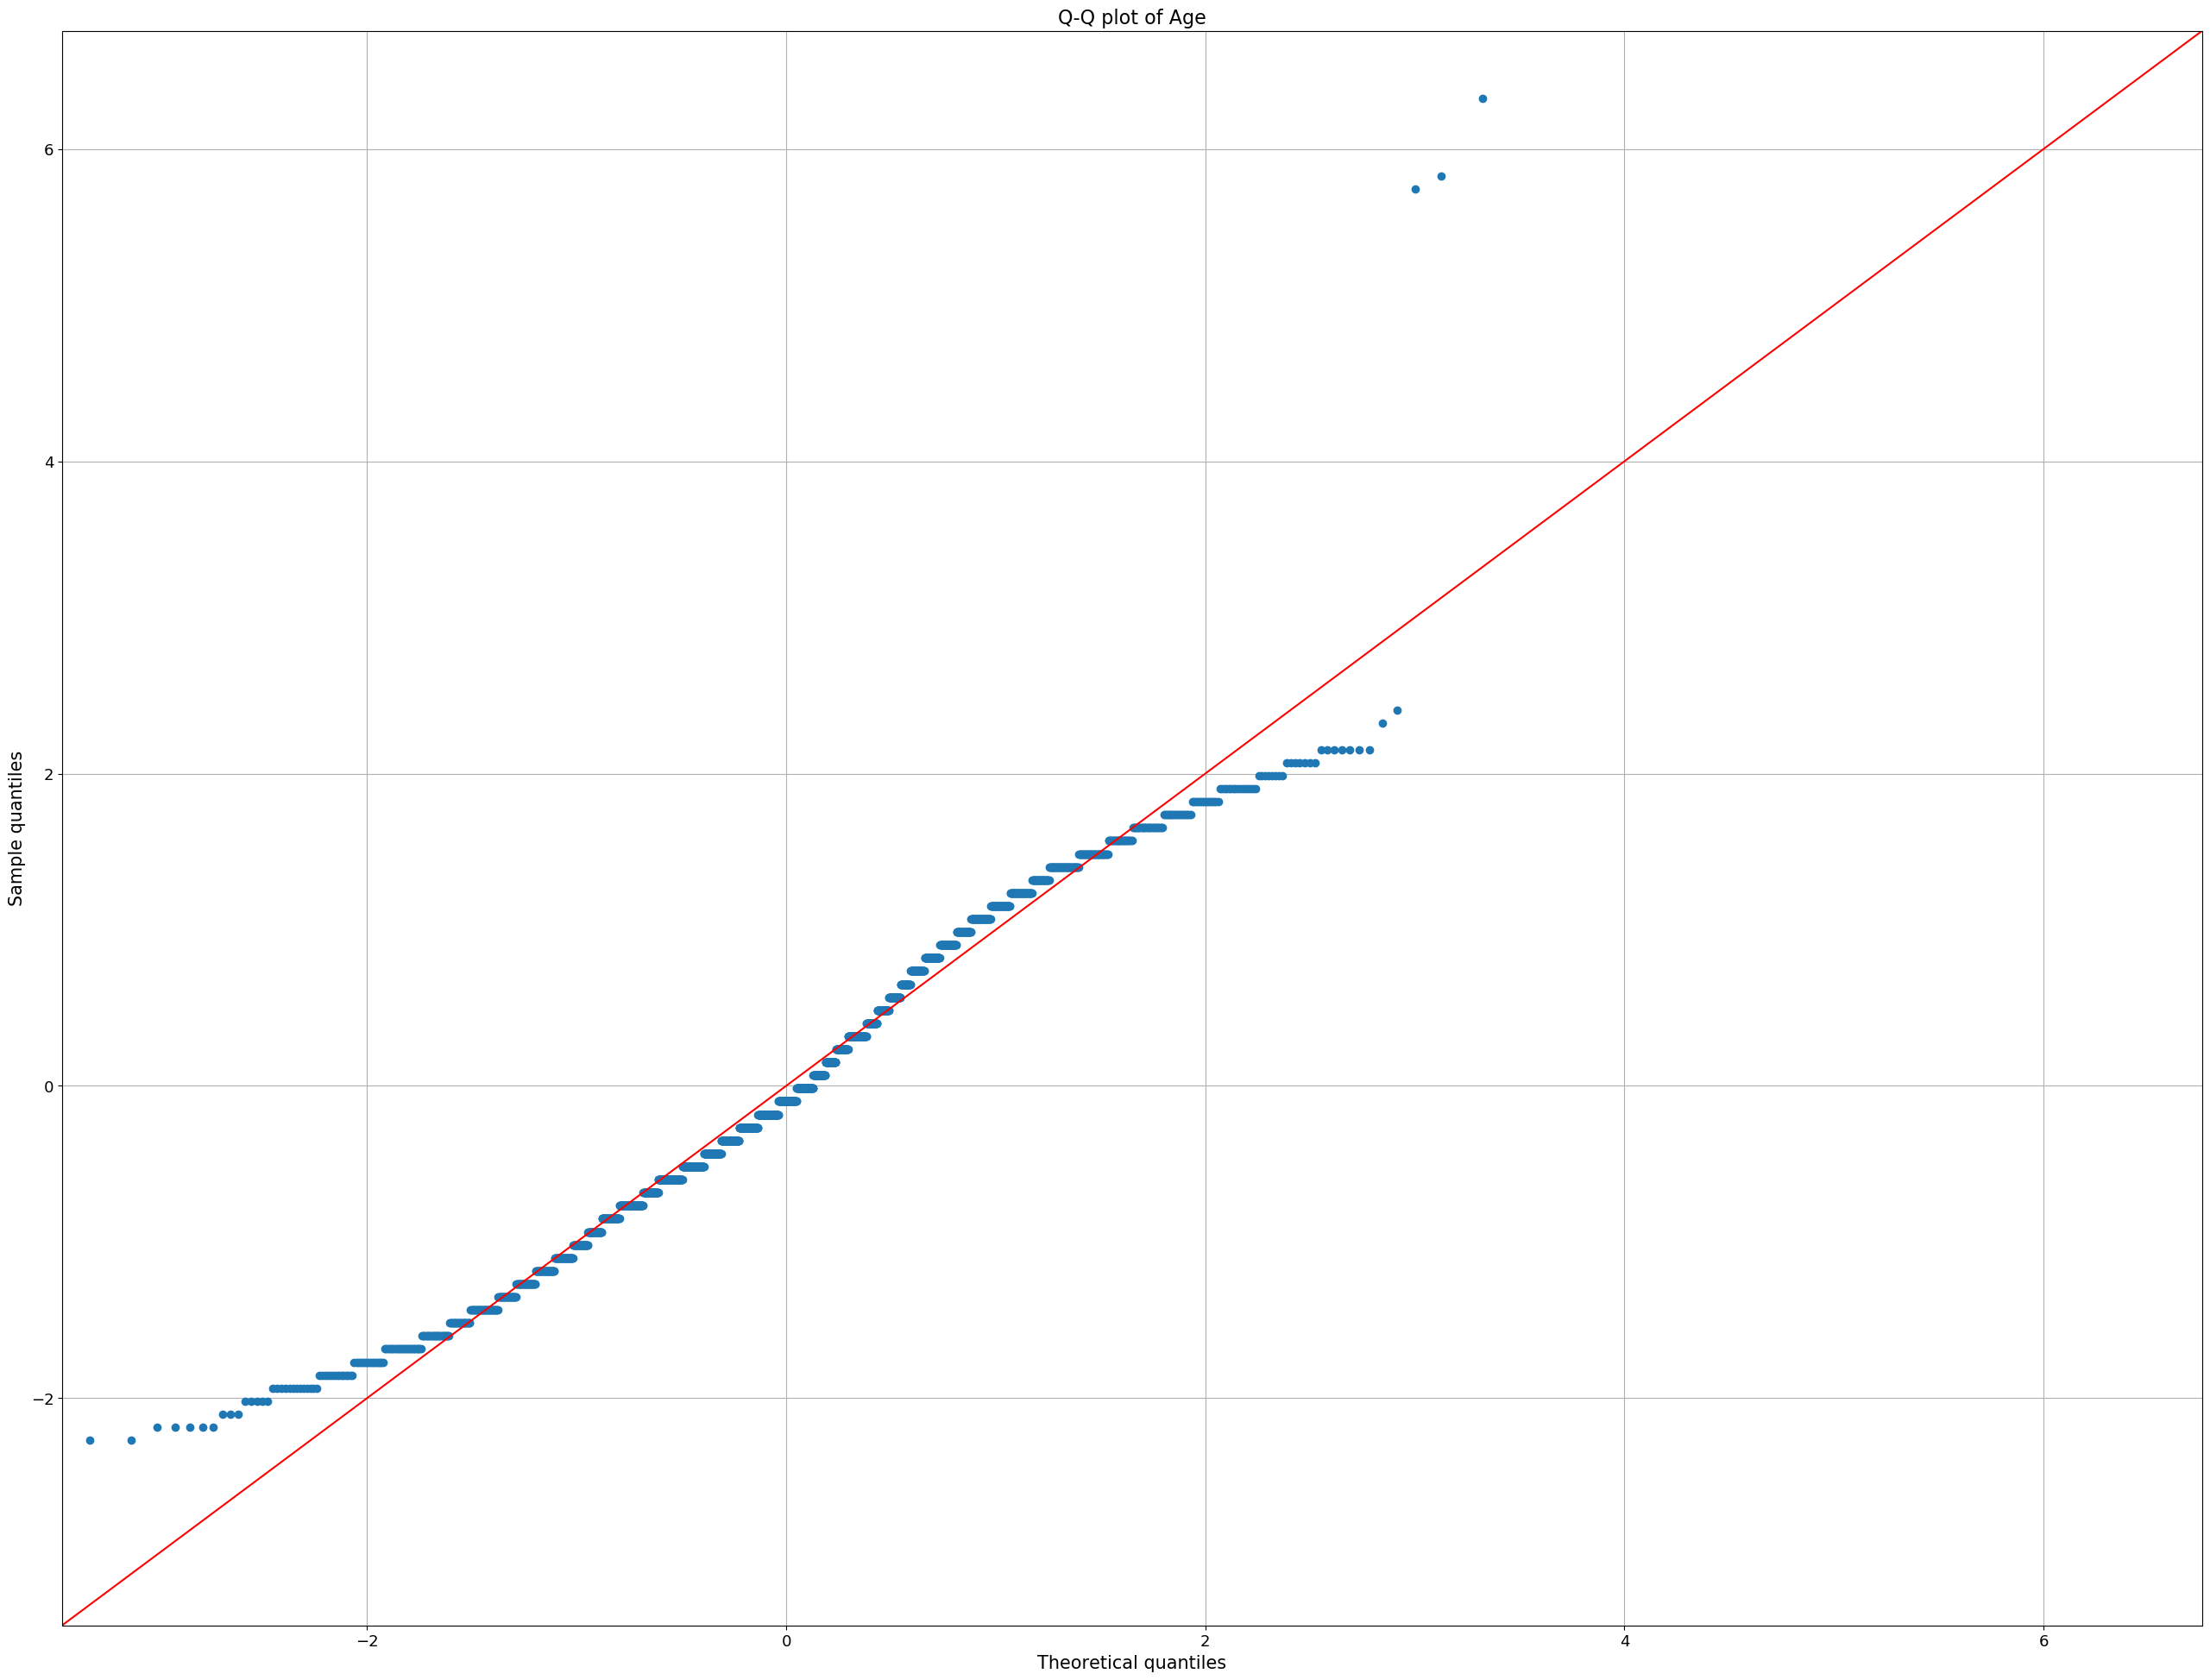

<Figure size 800x500 with 0 Axes>

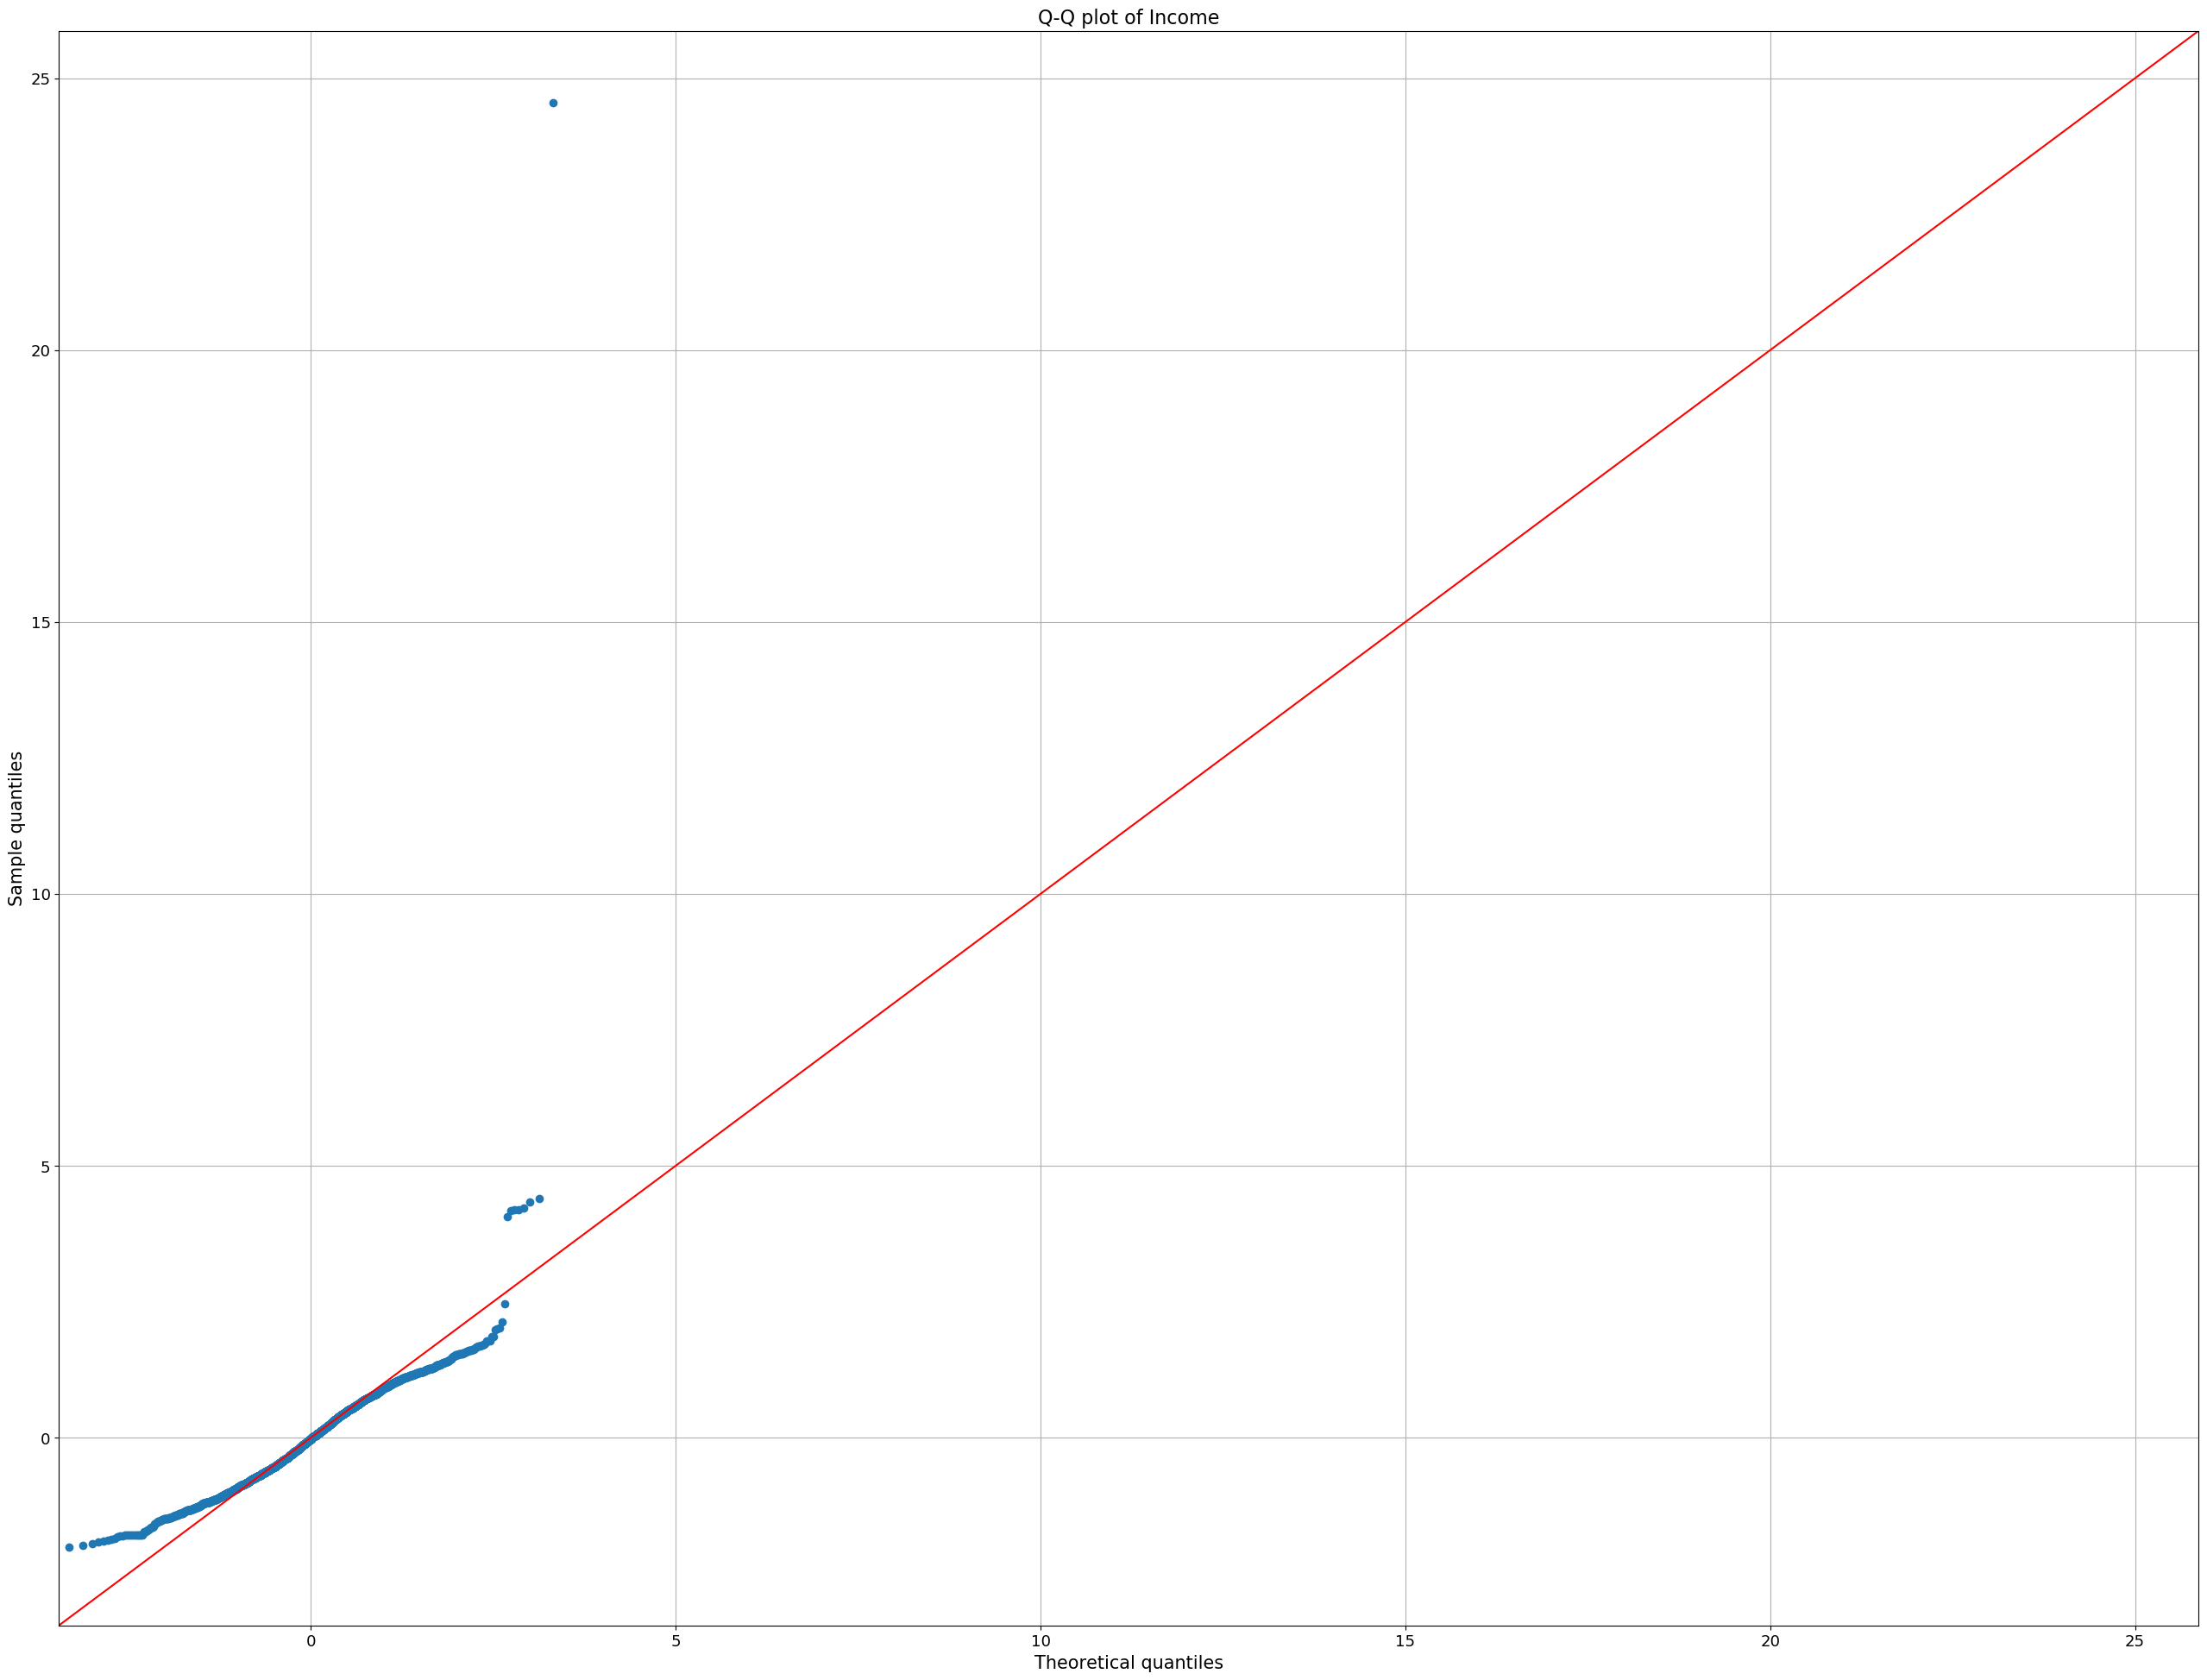

<Figure size 800x500 with 0 Axes>

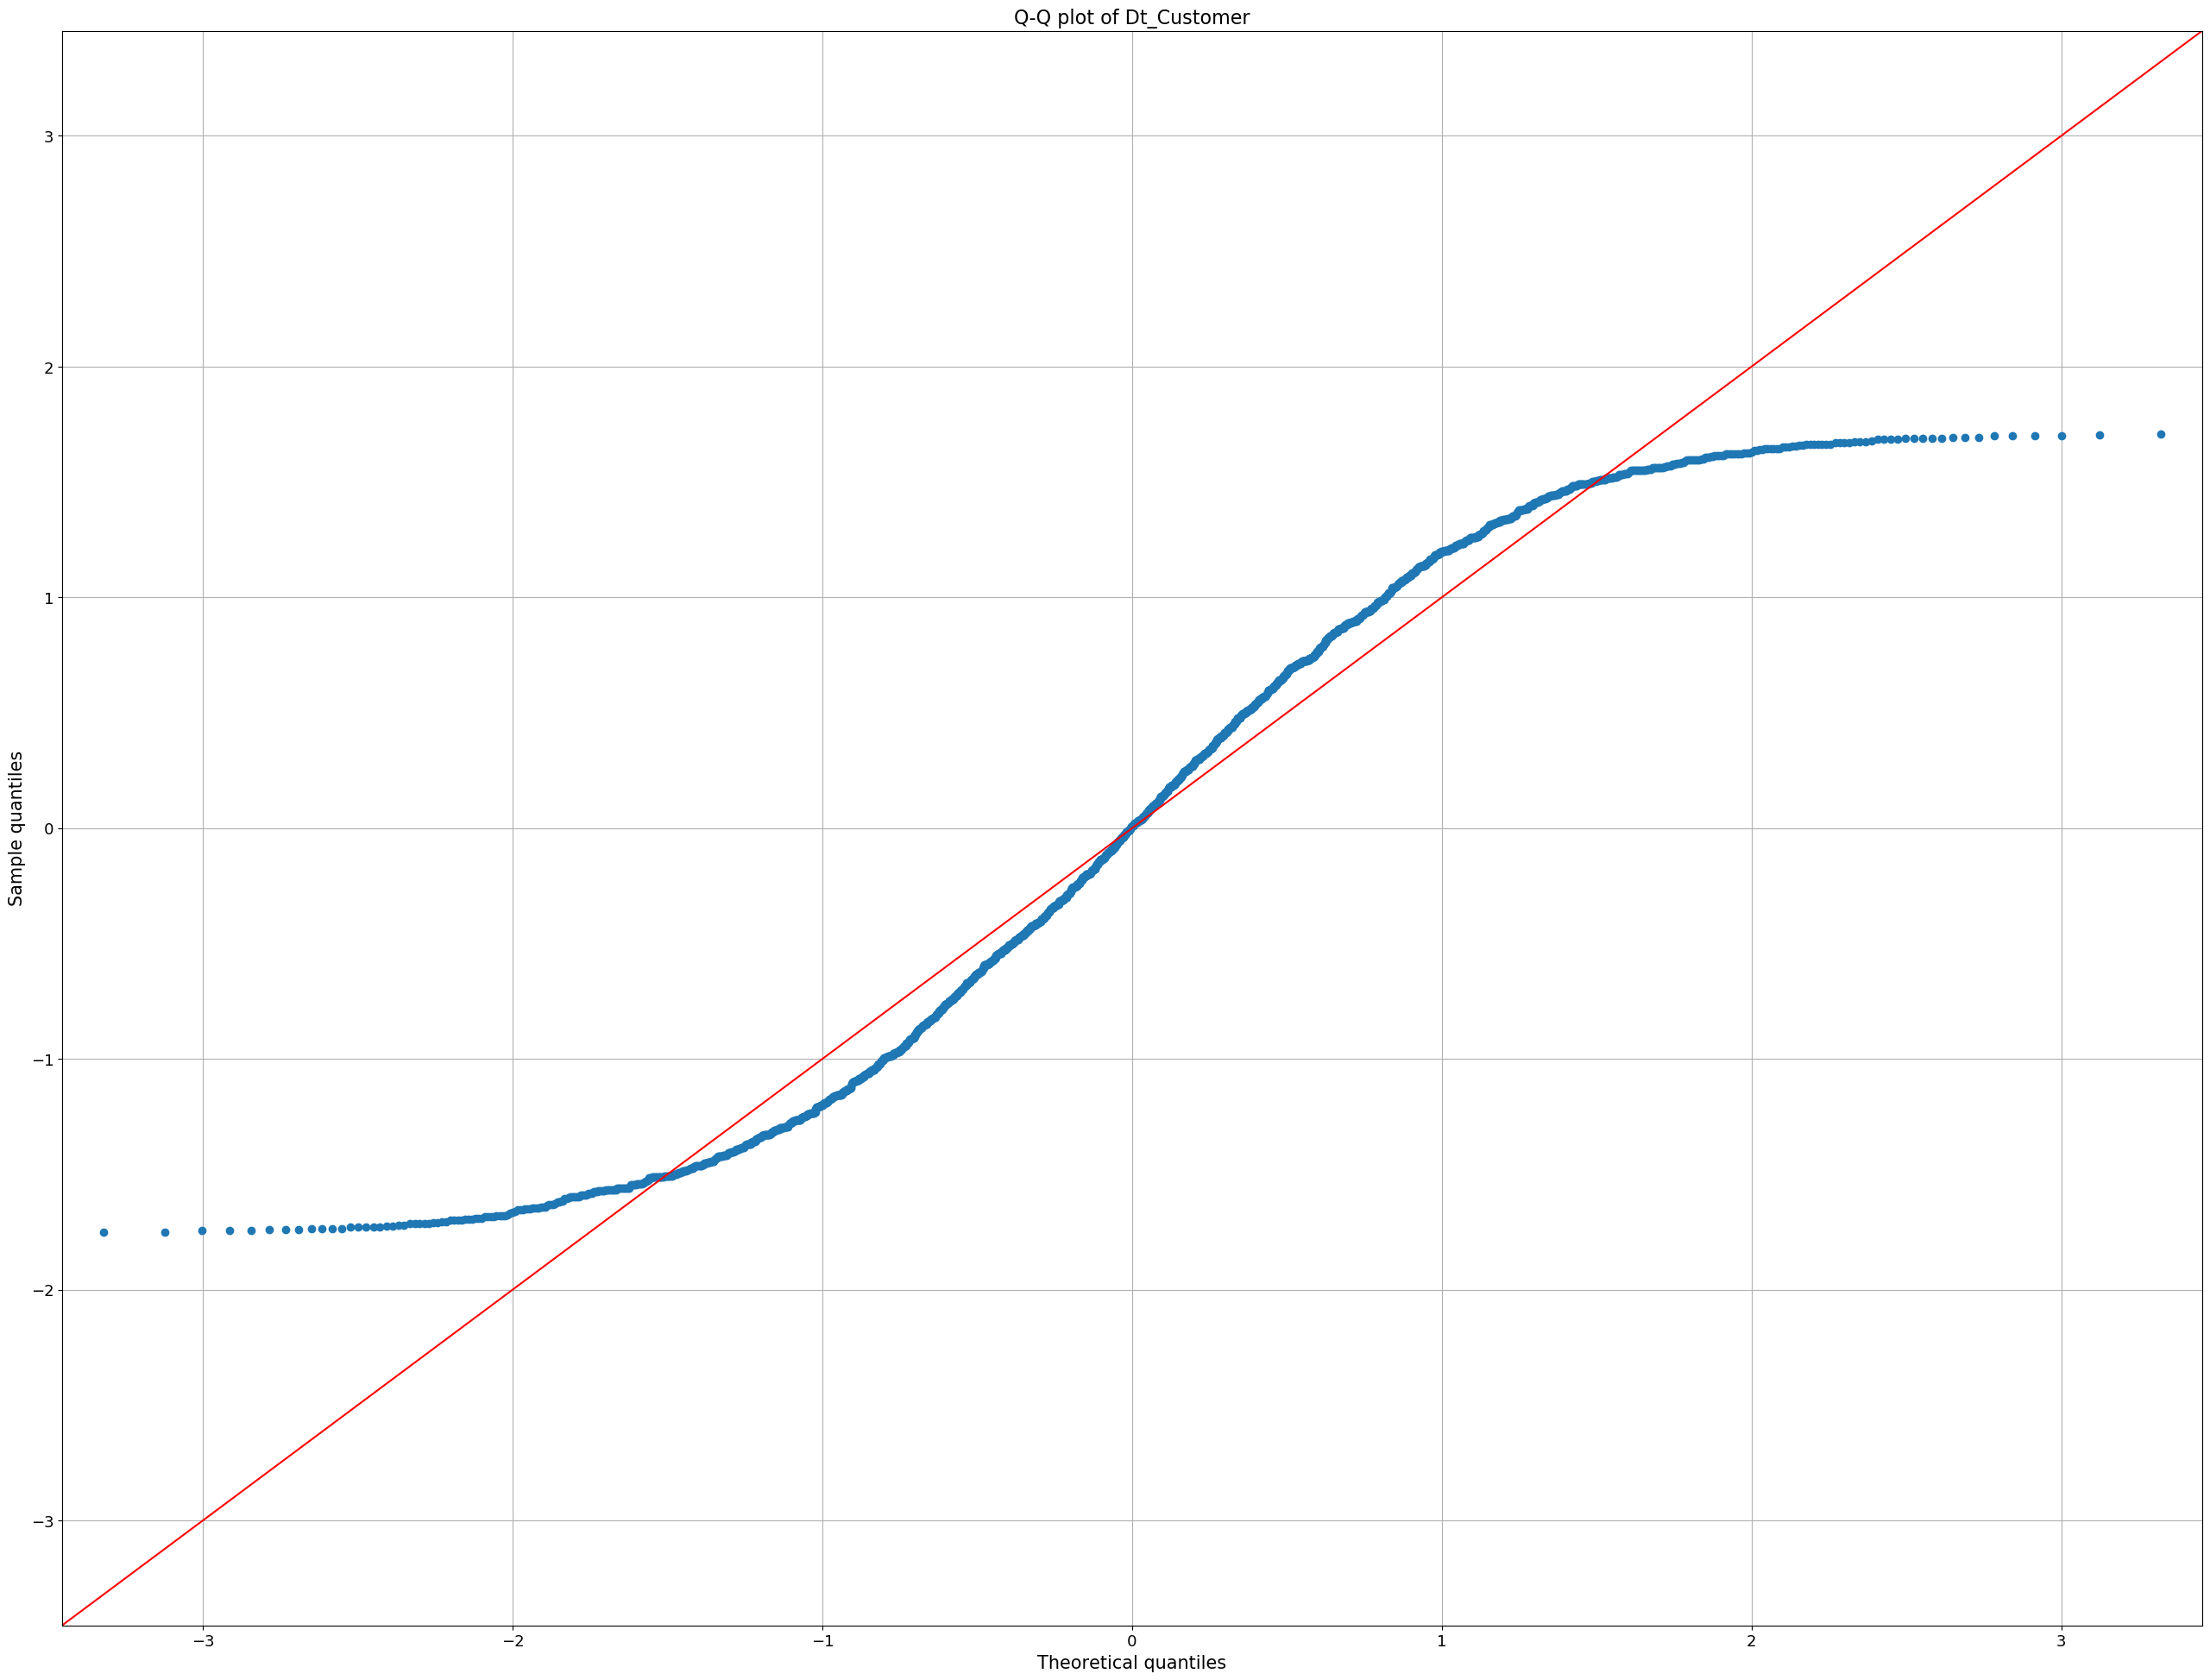

<Figure size 800x500 with 0 Axes>

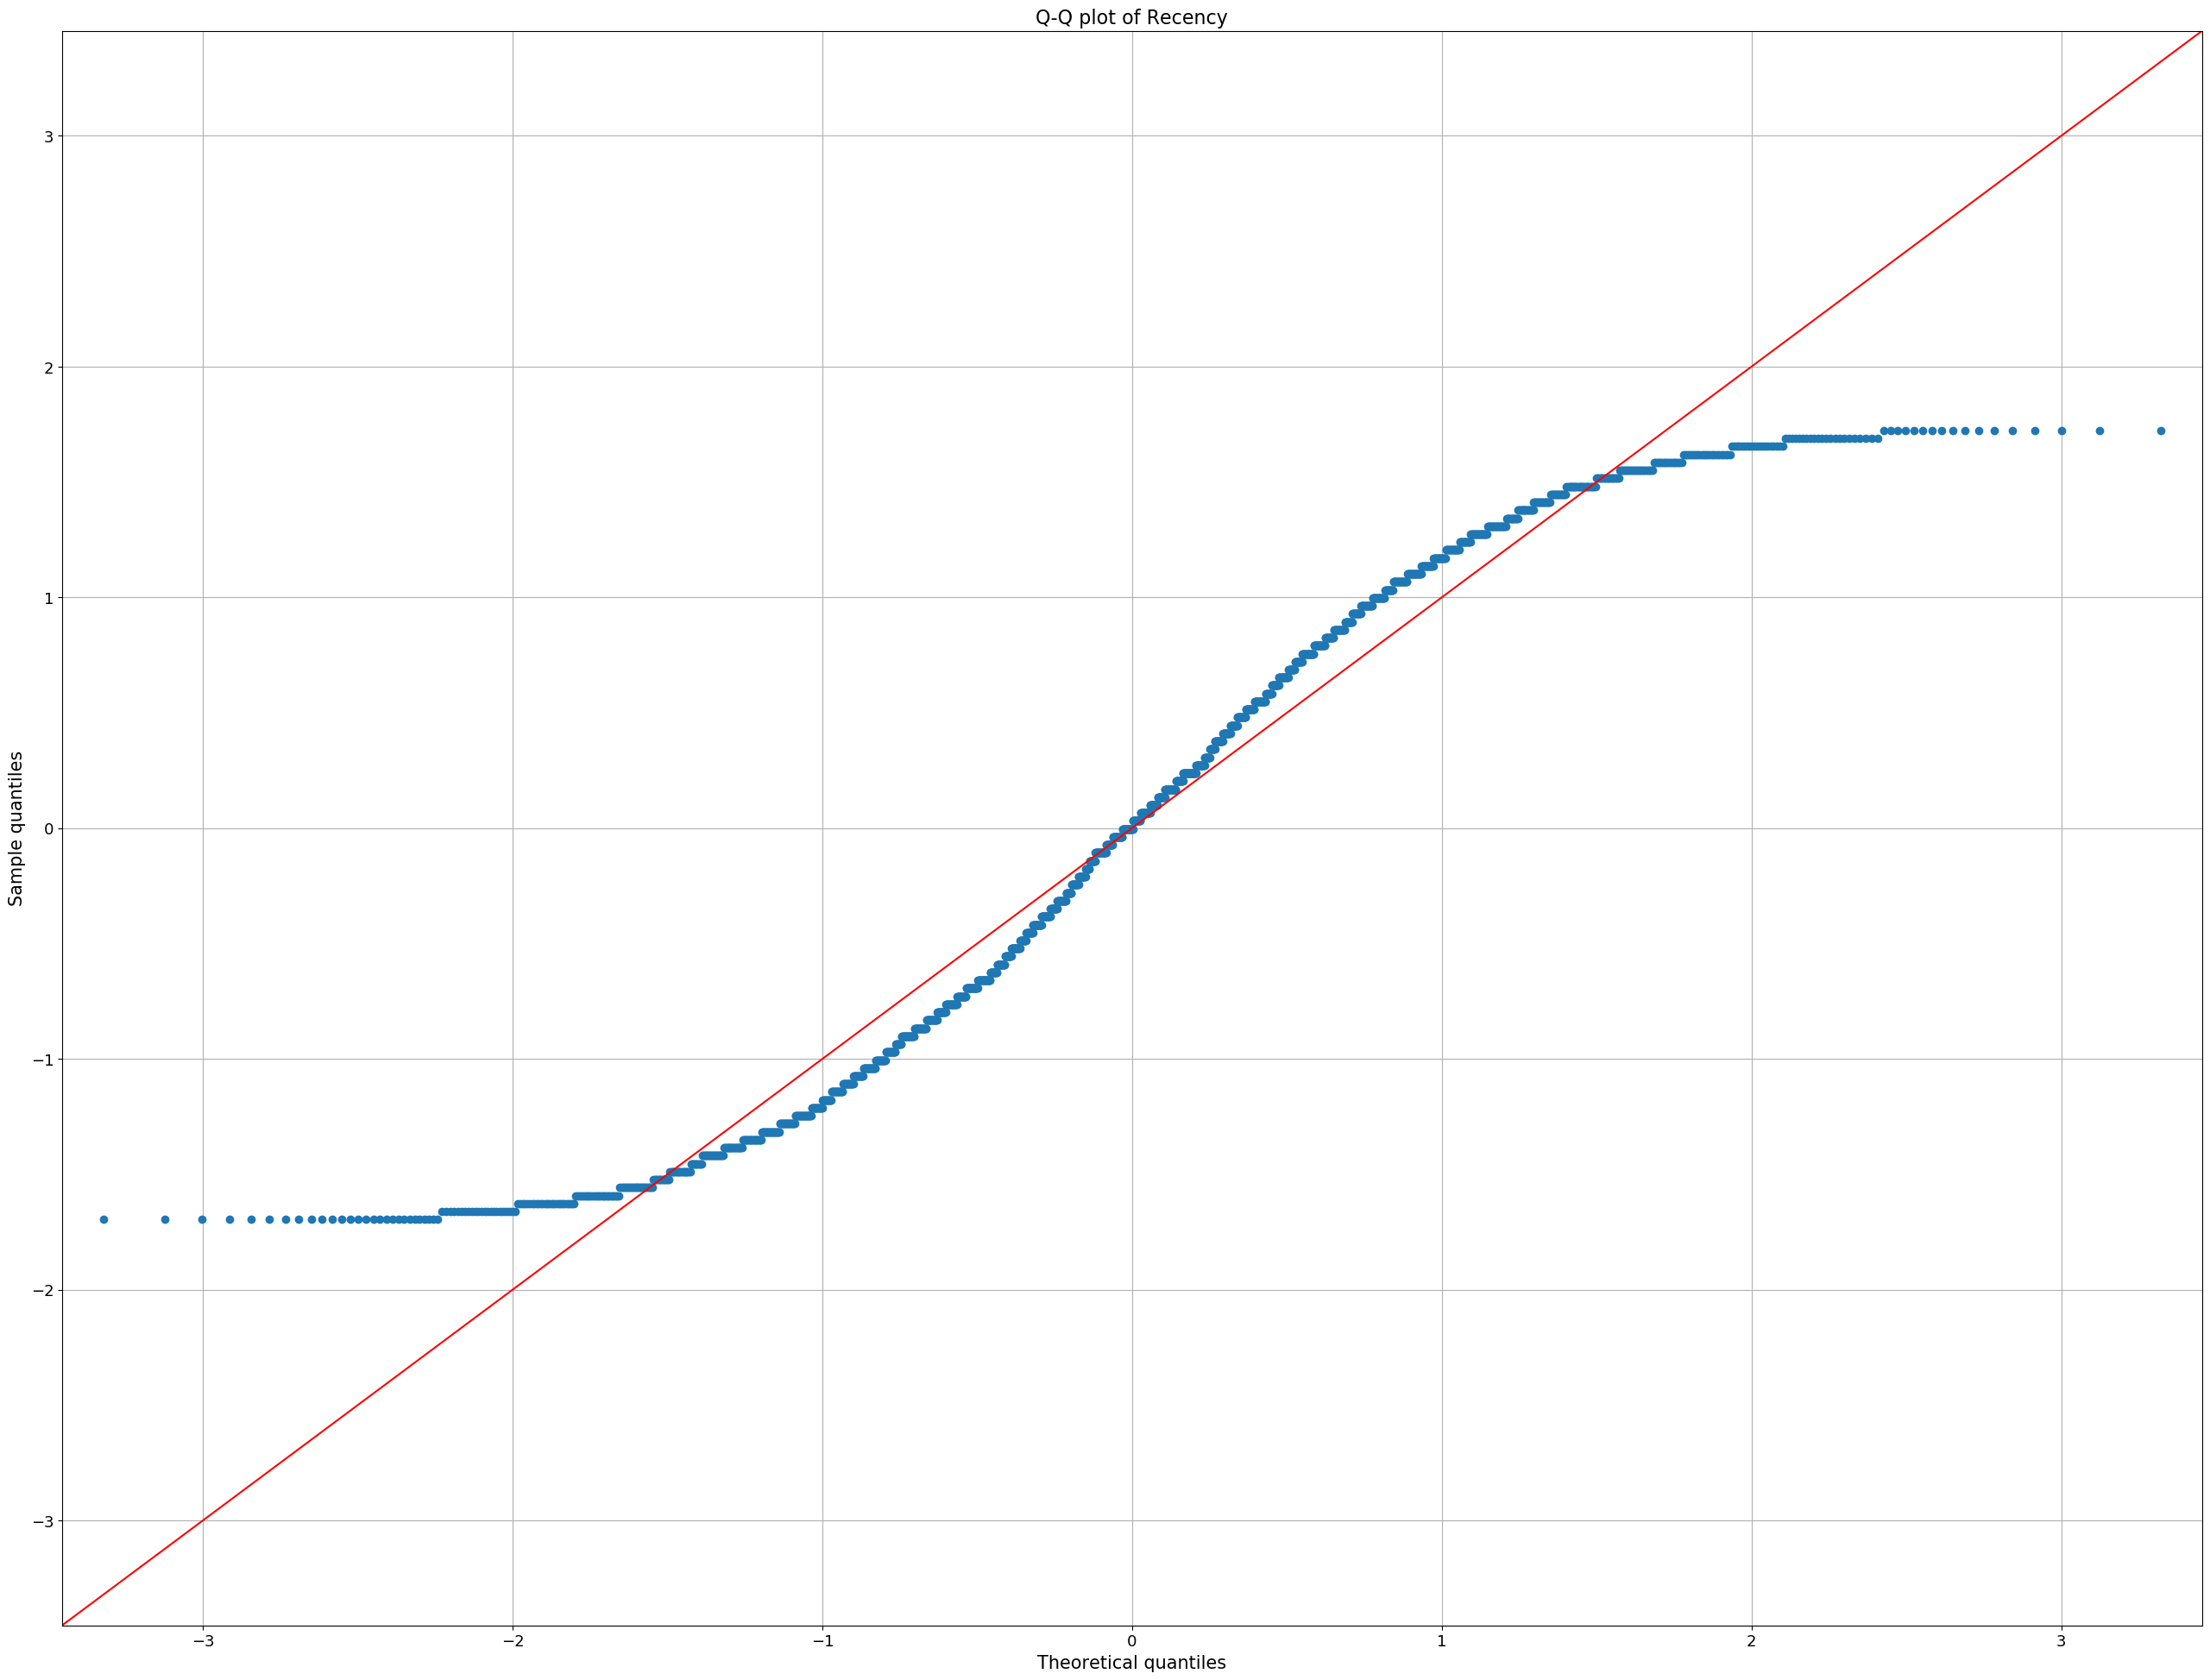

<Figure size 800x500 with 0 Axes>

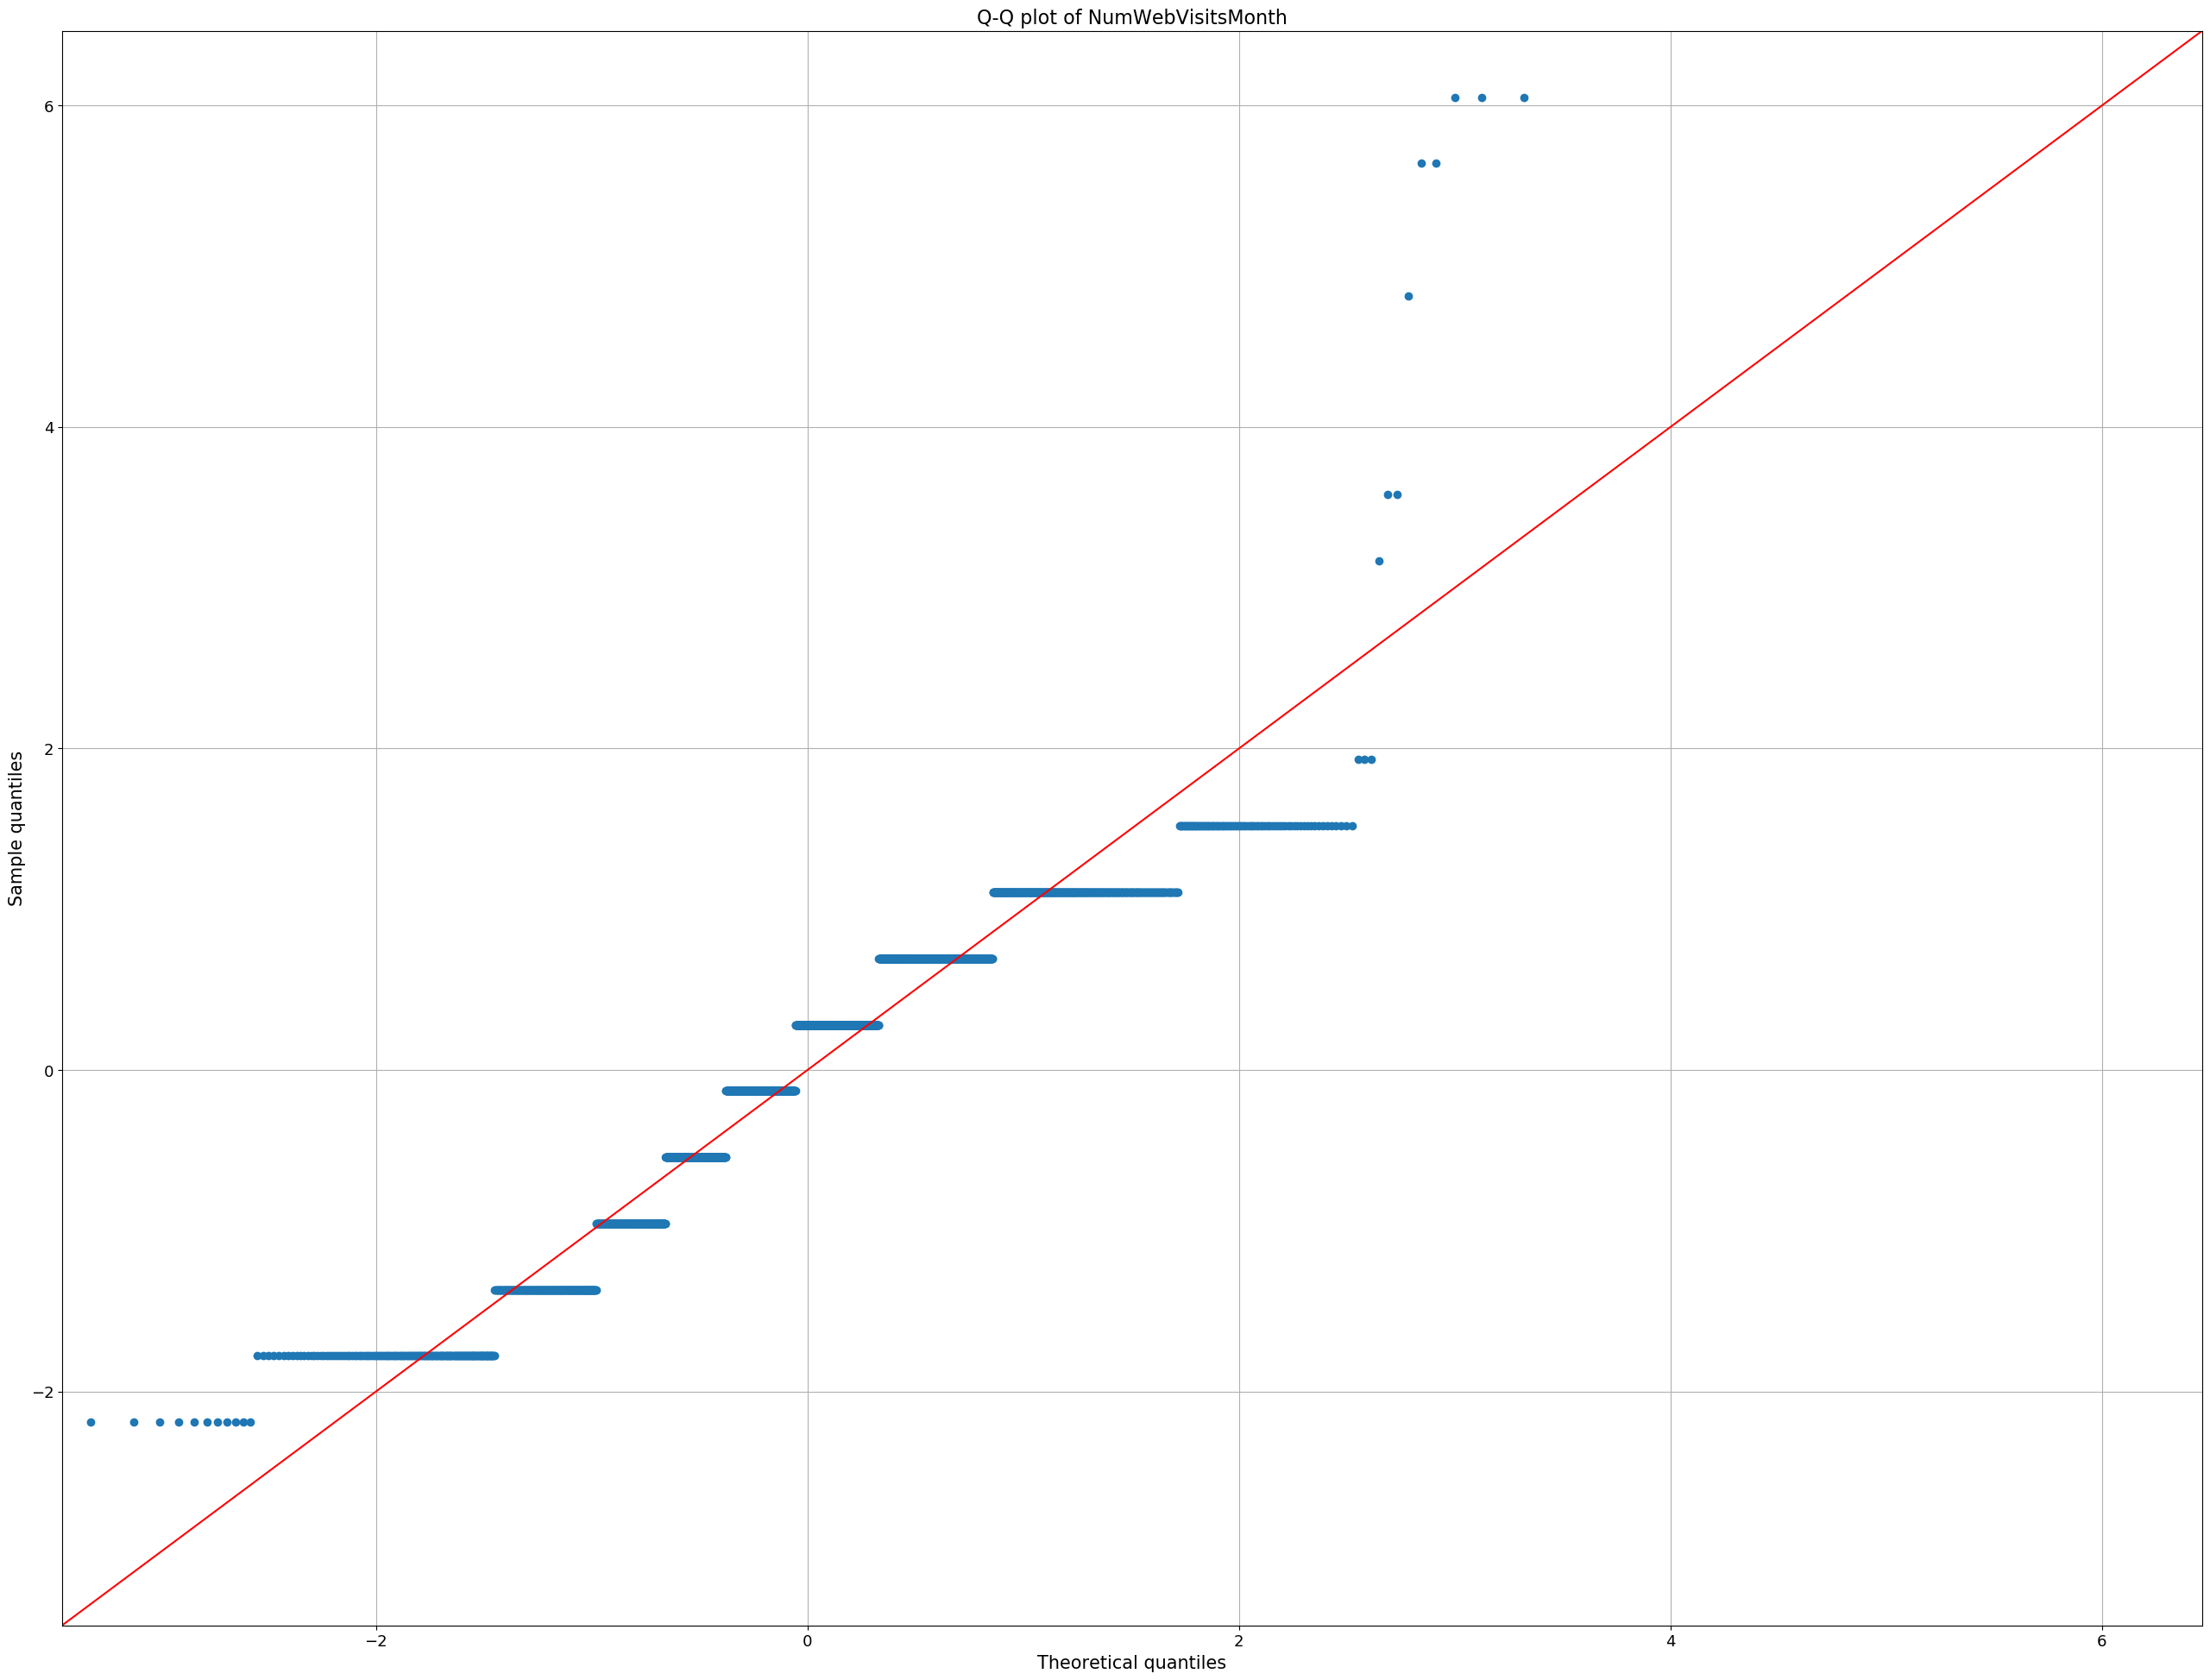

<Figure size 800x500 with 0 Axes>

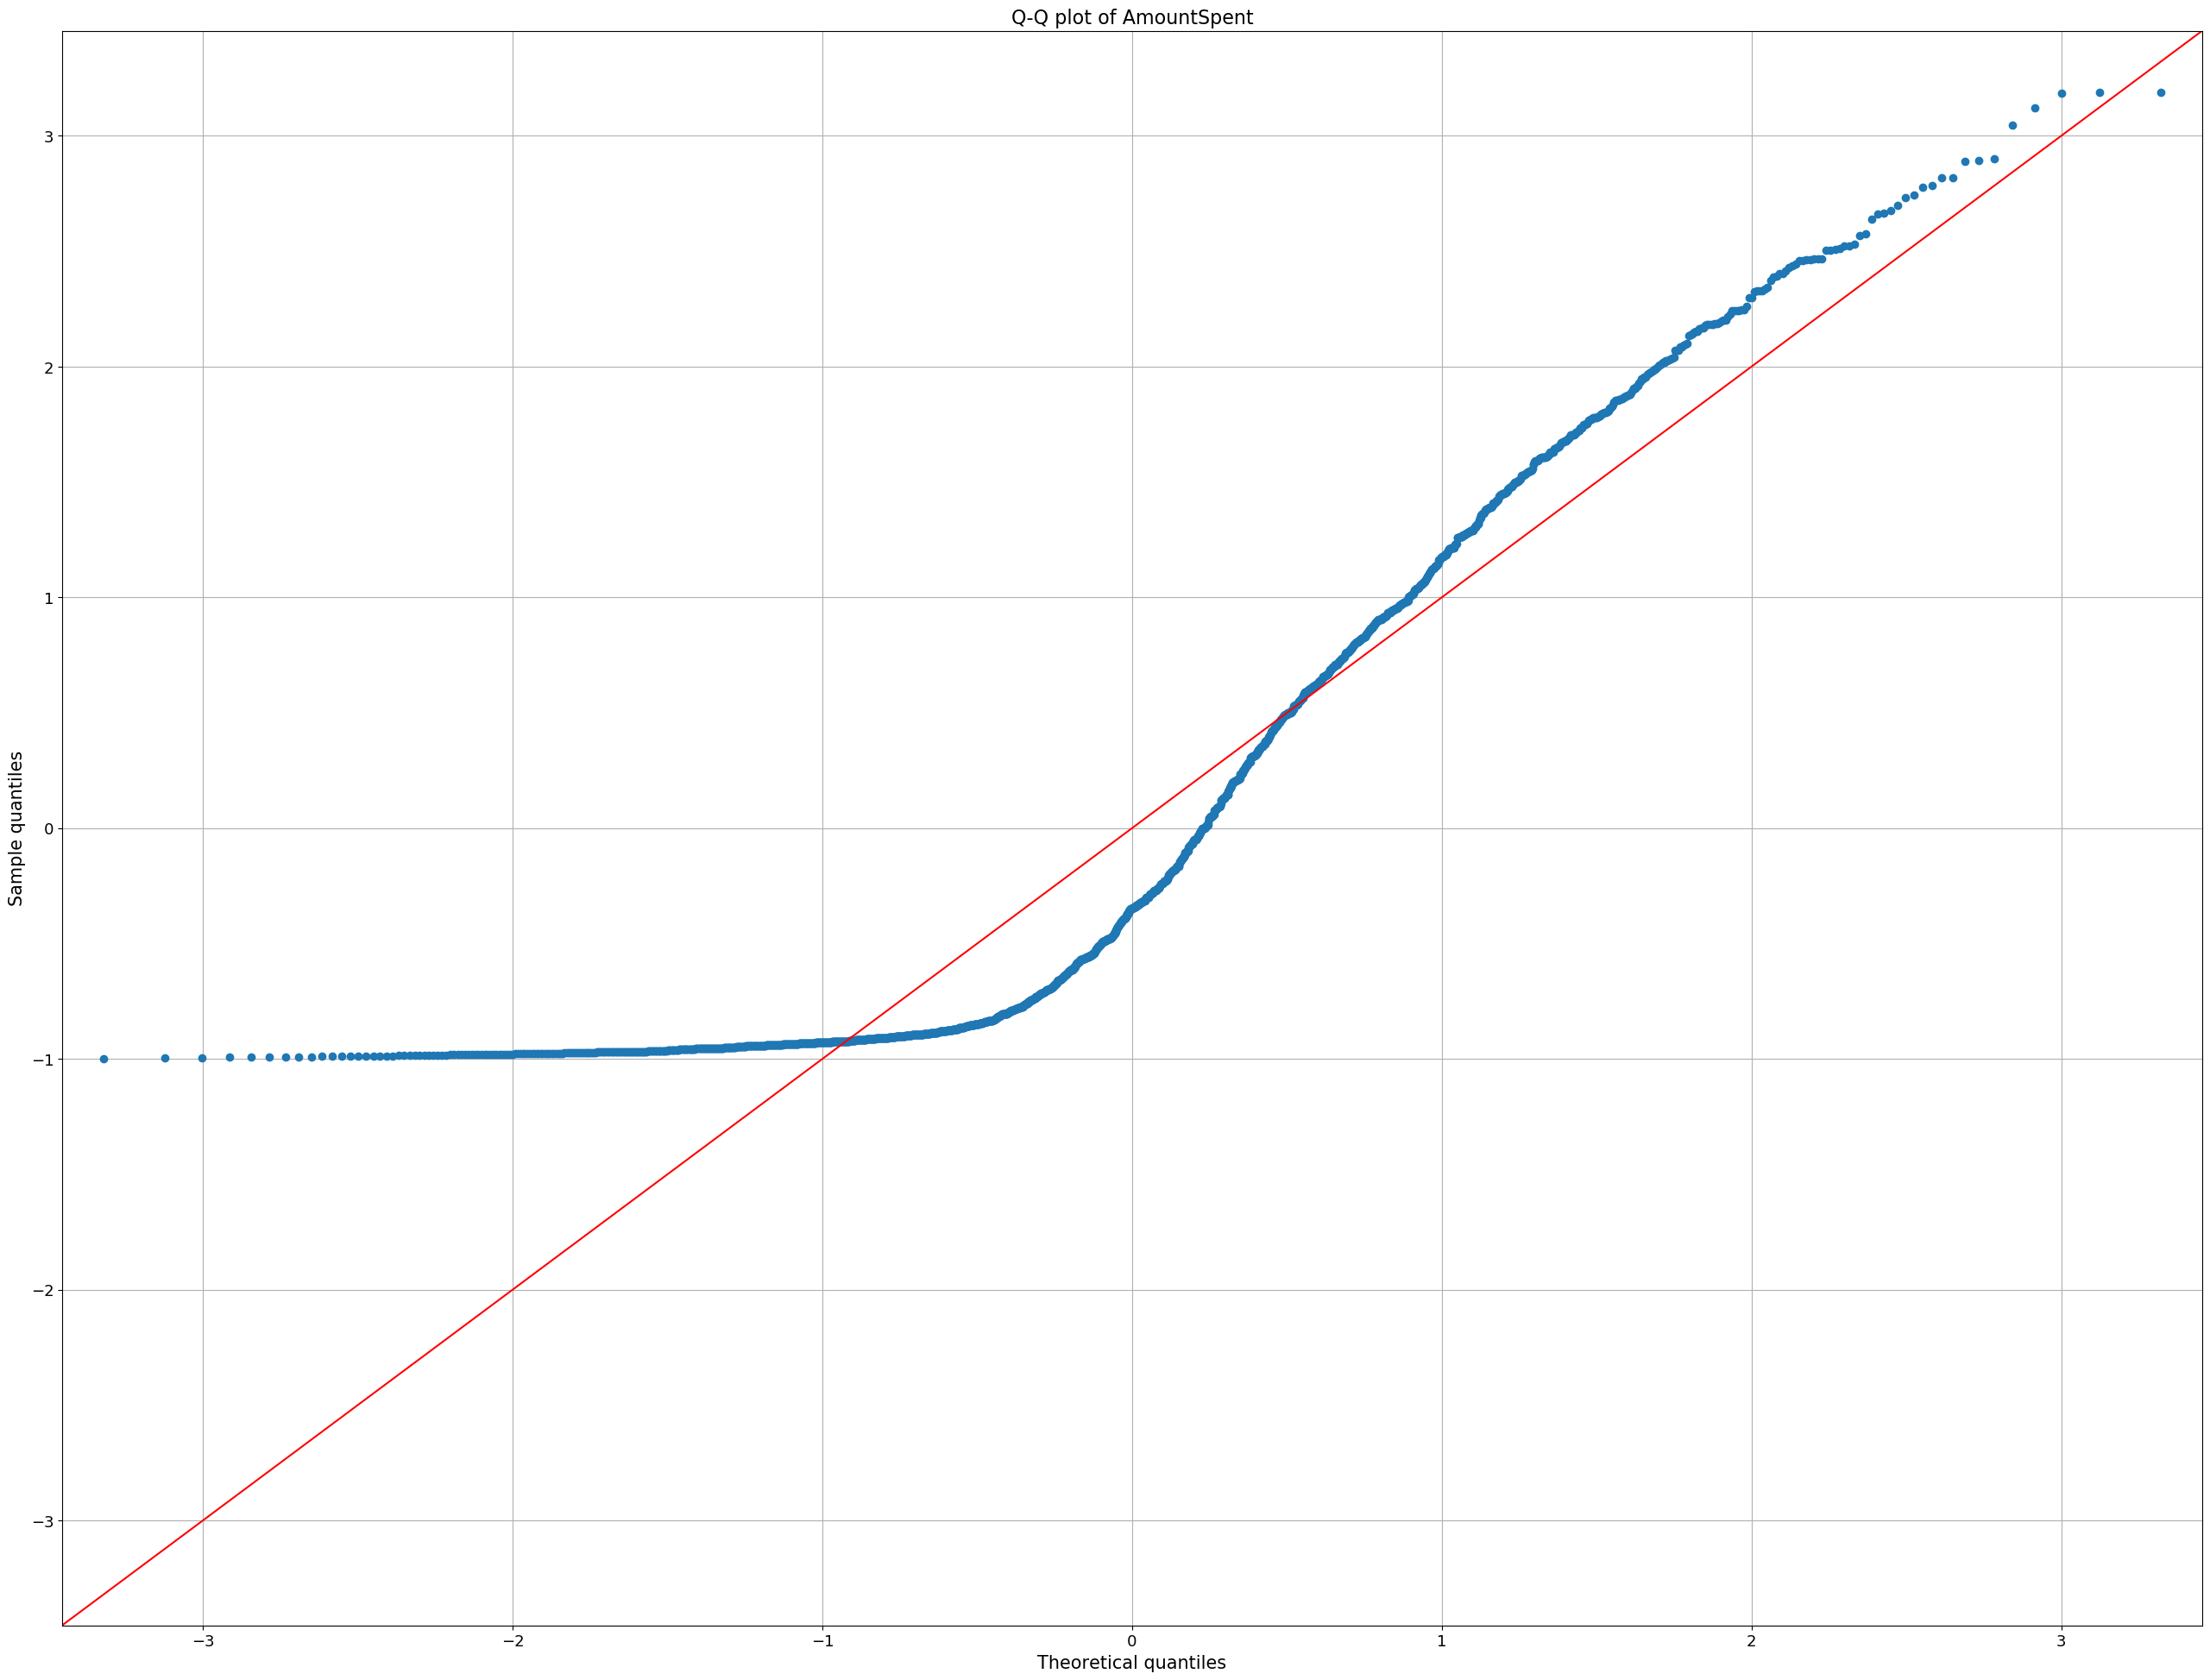

In [436]:
#checking the distribution of independent variables
data = data.dropna()
from statsmodels.graphics.gofplots import qqplot
data_norm=data[['Age','Income','Dt_Customer','Recency','NumWebVisitsMonth','AmountSpent']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()



*   Q-Q plots show most of the data is normally distributed
*   There are few Outliers in Income and age



# Logistic Regression

In [437]:
from sklearn.model_selection import  train_test_split

X = data[ ["Age",	"Education",	"Income",	"Dt_Customer",	
                                       "Recency"	,"NumDealsPurchases",	"NumWebVisitsMonth",	
                                       "Complain",	"Children",	"AmountSpent"	,"NumPurchased",	
                                       "Prev_campaigns",	"Marital_Status_Couple"]]

y = data['Response']

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

Splitting data for train test and validation
10% testing
15% of remaining train data for validation

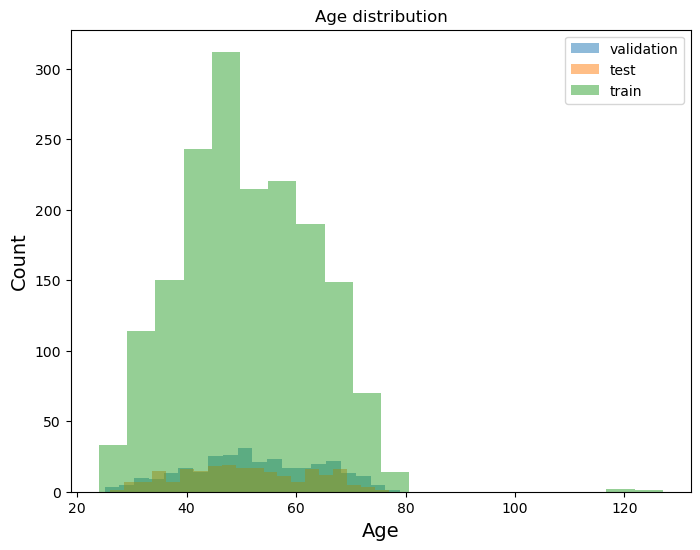

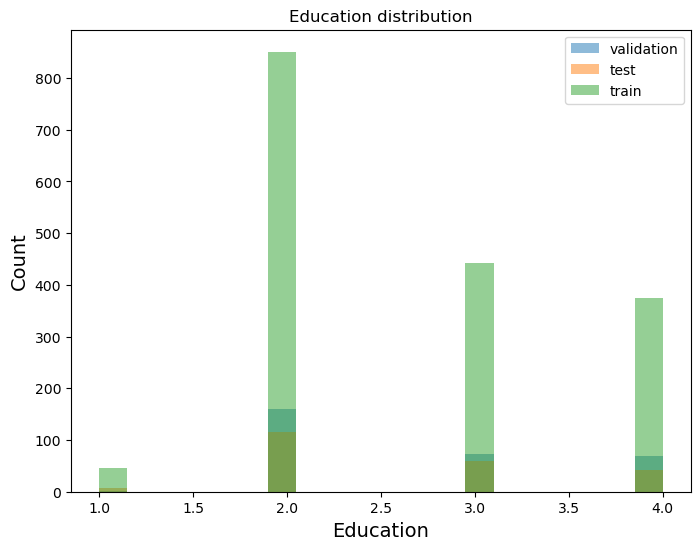

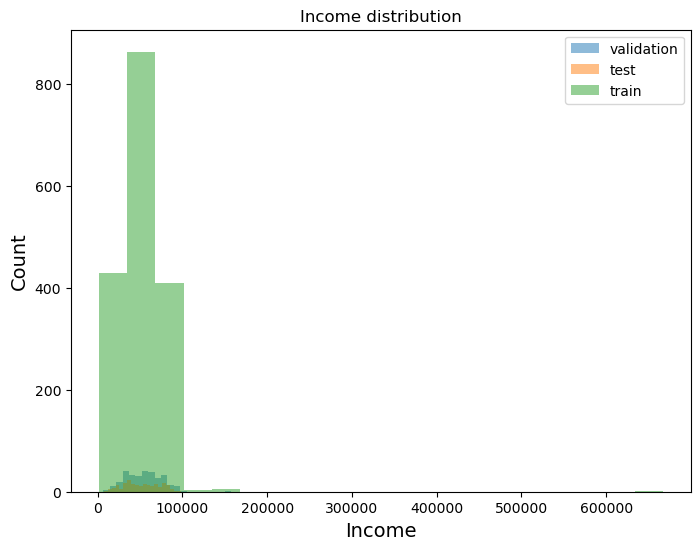

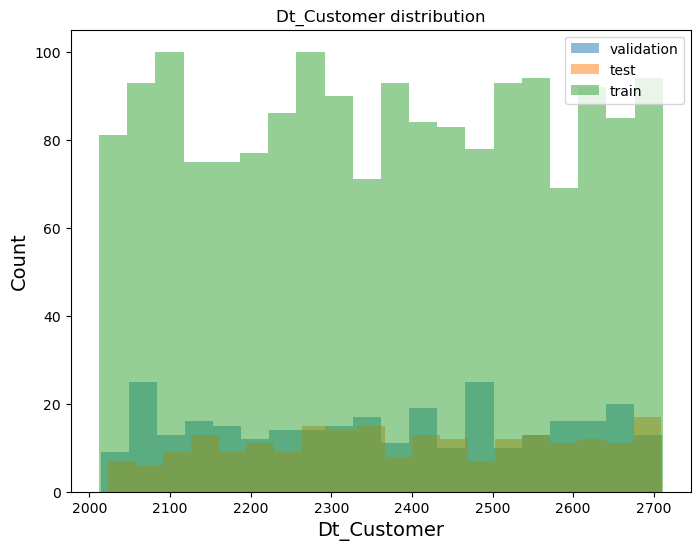

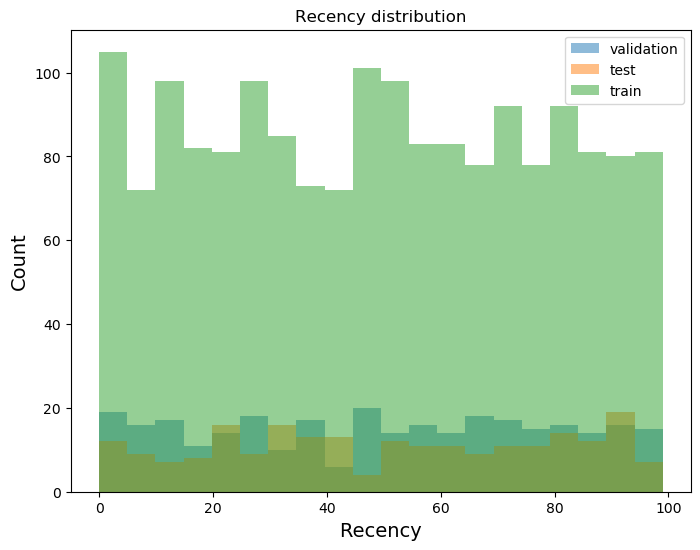

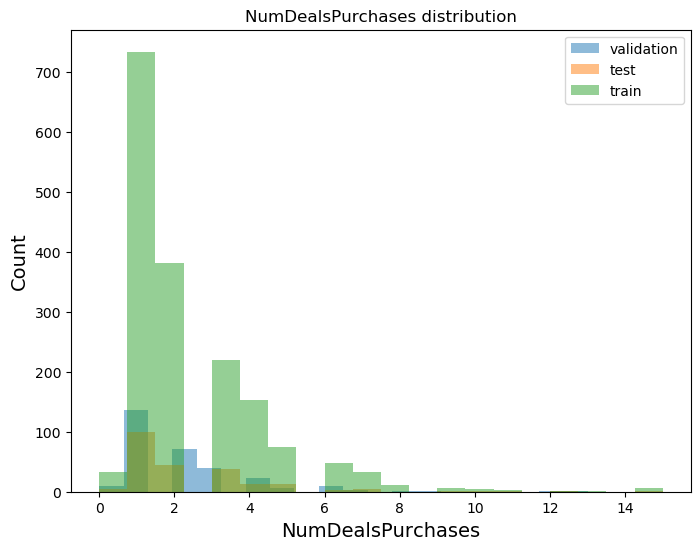

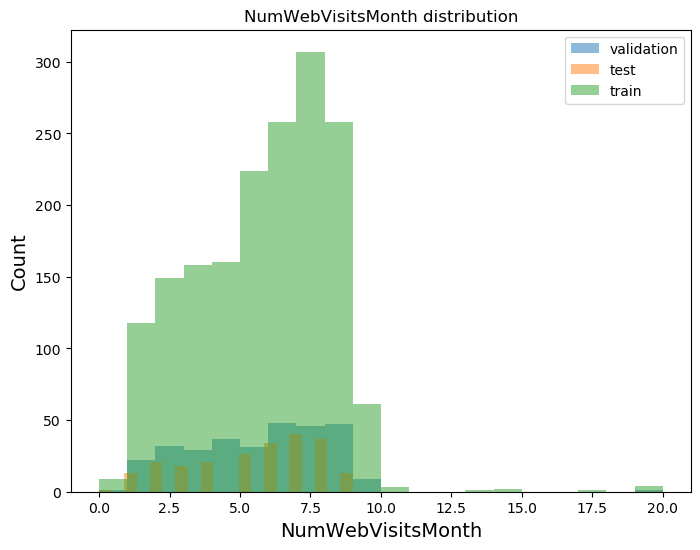

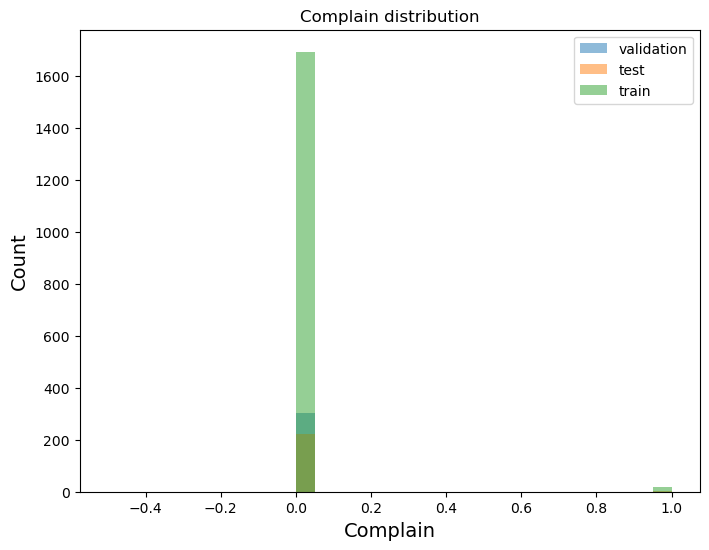

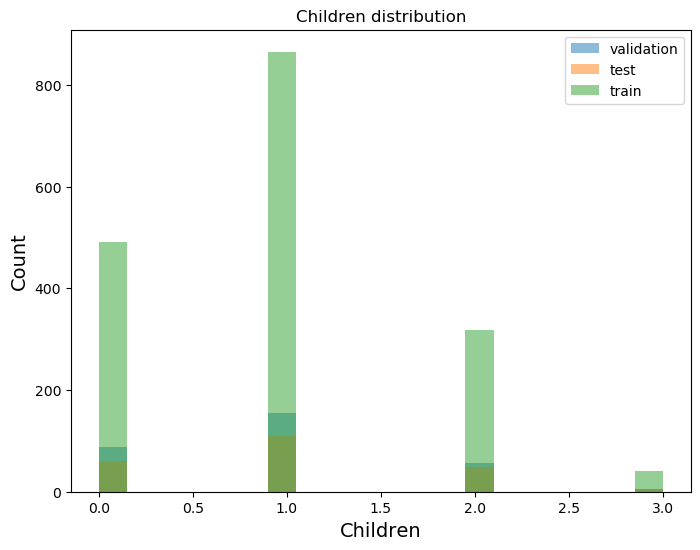

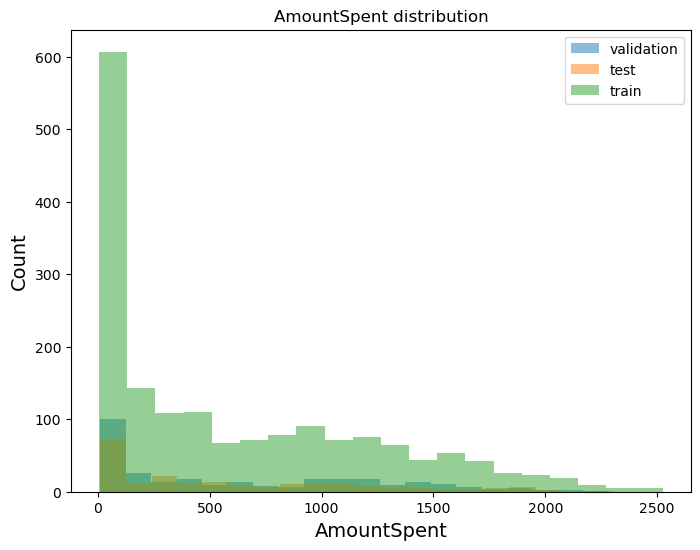

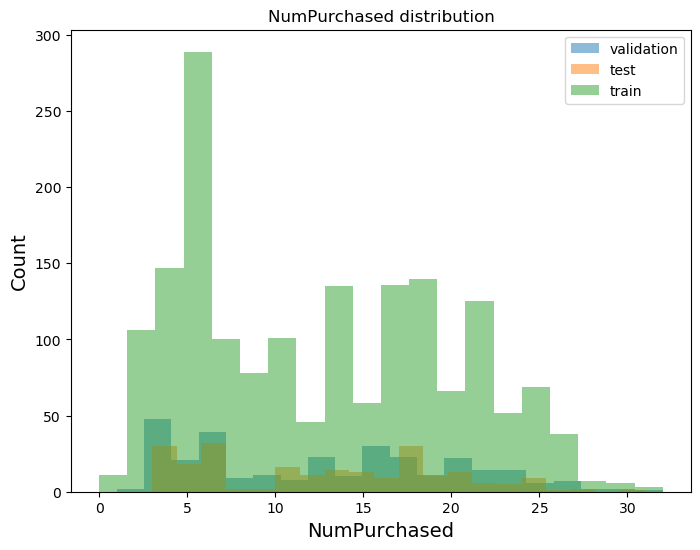

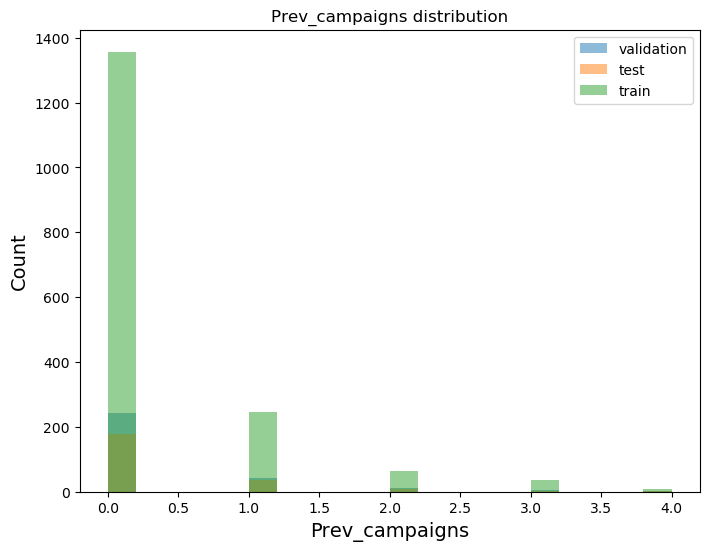

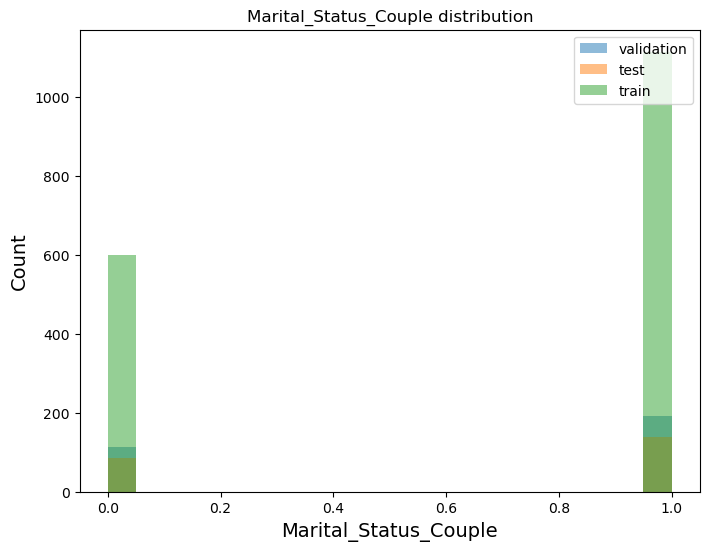

In [438]:
# Looking the data for test, training and validation set
X_test_plot = X_test[["Age",	"Education",	"Income",	"Dt_Customer",	
                                       "Recency"	,"NumDealsPurchases",	"NumWebVisitsMonth",	
                                       "Complain",	"Children",	"AmountSpent"	,"NumPurchased",	
                                       "Prev_campaigns",	"Marital_Status_Couple"]]

X_val_plot = X_val[["Age",	"Education",	"Income",	"Dt_Customer",	
                                       "Recency"	,"NumDealsPurchases",	"NumWebVisitsMonth",	
                                       "Complain",	"Children",	"AmountSpent"	,"NumPurchased",	
                                       "Prev_campaigns",	"Marital_Status_Couple"]]

X_train_plot = X_train[["Age",	"Education",	"Income",	"Dt_Customer",	
                                       "Recency"	,"NumDealsPurchases",	"NumWebVisitsMonth",	
                                       "Complain",	"Children",	"AmountSpent"	,"NumPurchased",	
                                       "Prev_campaigns",	"Marital_Status_Couple"]]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

Distribution shows our data splits are evenly distributed

In [439]:
logreg=LogisticRegression()
loggreg_final=logreg.fit(X_train,y_train)
print(loggreg_final.score(X_train,y_train))

0.8476357267950964


Our model has 88.32% training accuracy

## Making Predictions

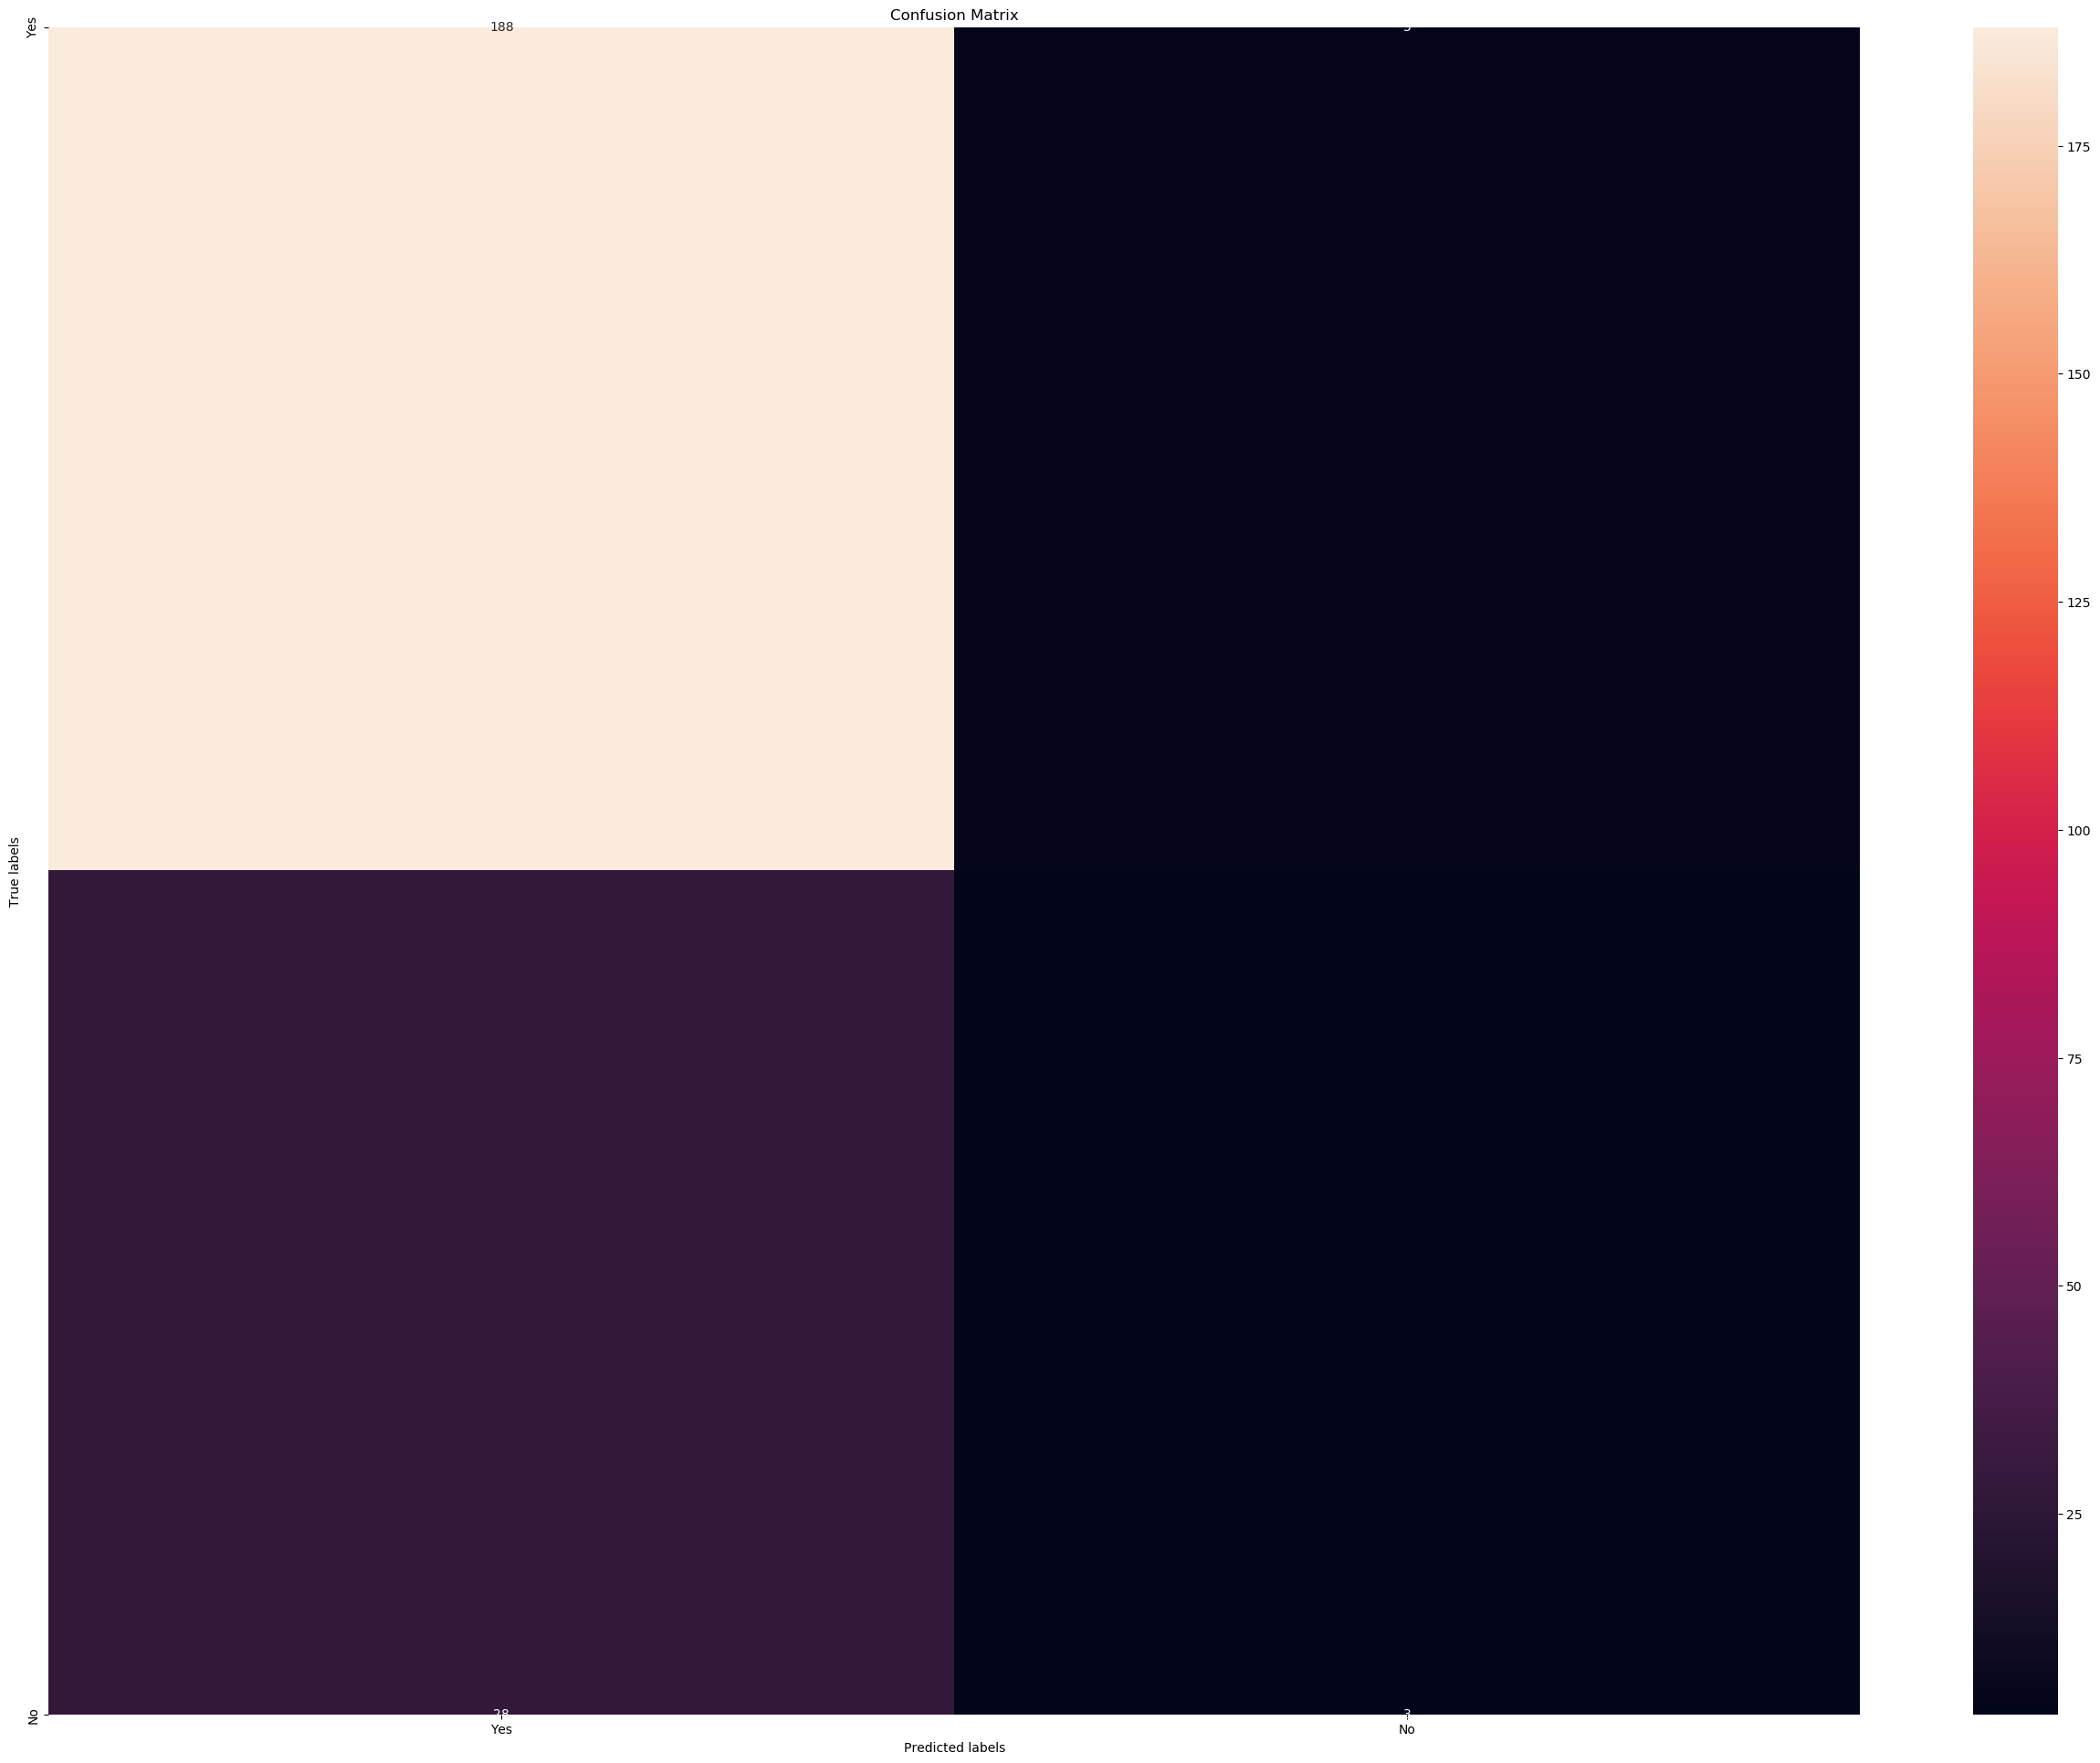

In [440]:
y_pred=logreg.predict(X_test)

cm=confusion_matrix(y_test, y_pred)#confusion matrix for the logistic model prediction

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Yes', 'No']); 
ax.yaxis.set_ticklabels(['Yes', 'No']);

Above confusion matrix shows a good percentage of testing data is accurately predicted

In [441]:
print(classification_report(y_test, y_pred))
#classification report for logistic model prediction

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       193
           1       0.38      0.10      0.15        31

    accuracy                           0.85       224
   macro avg       0.62      0.54      0.54       224
weighted avg       0.80      0.85      0.81       224



We have a higher precision for "No" i.e 0 of 0.91 while precision for "Yes" is 0.62 indicating we have a more accurate prediction chance for a negative customer response

In [442]:
#Understanding the important features 
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(logreg, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Features in increasing order of significance as evident from permutaion importance



1.   Prev_campaigns
2.   NumWebVisitsMonth
3. NumPurchased
4. NumDealsPurchases
5. Education
6. Marital_Status_Couple
7. AmountSpent
8. Recency



## Removing Outliers

In [443]:
data.Income.quantile(0.99)

94437.68000000001

In [444]:
data.drop(data[data['Income'] >= 93651].index, inplace = True)

[Text(0, 0, 'Age'),
 Text(0, 0, 'Education'),
 Text(0, 0, 'Income'),
 Text(0, 0, 'Dt_Customer'),
 Text(0, 0, 'Recency'),
 Text(0, 0, 'NumDealsPurchases'),
 Text(0, 0, 'NumWebVisitsMonth'),
 Text(0, 0, 'Complain'),
 Text(0, 0, 'Response'),
 Text(0, 0, 'Children'),
 Text(0, 0, 'AmountSpent'),
 Text(0, 0, 'NumPurchased'),
 Text(0, 0, 'Prev_campaigns'),
 Text(0, 0, 'Marital_Status_Couple')]

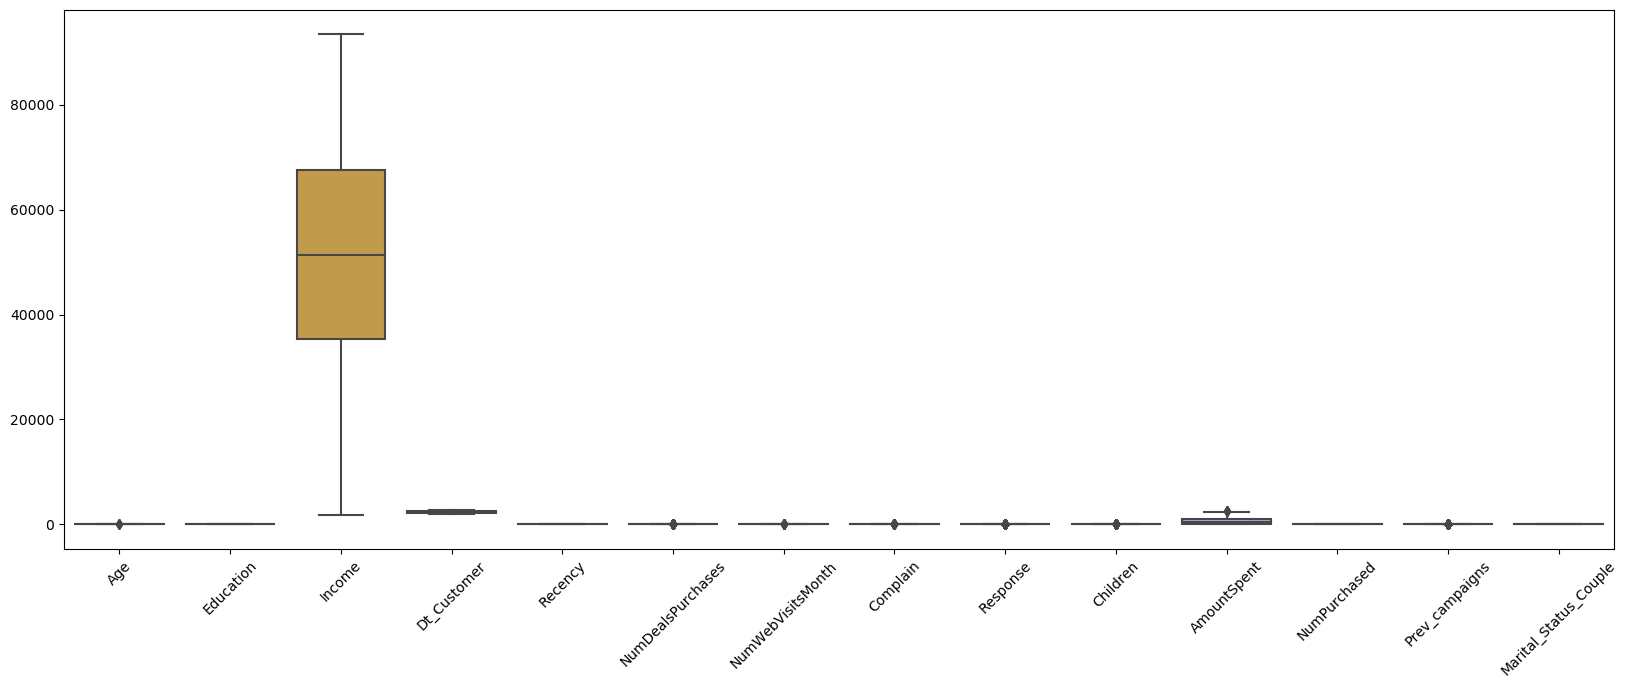

In [445]:
plt.figure(figsize=(20,7))
x = sns.boxplot(data=data)
x.set_xticklabels(x.get_xticklabels(),rotation=45)

In [446]:
from sklearn.linear_model import LogisticRegression

data = data.dropna()
X = data[["Age",	"Education",	"Income",	"Dt_Customer",	
                                       "Recency"	,"NumDealsPurchases",	"NumWebVisitsMonth",	
                                       "Complain",	"Children",	"AmountSpent"	,"NumPurchased",	
                                       "Prev_campaigns",	"Marital_Status_Couple"]]

y = data['Response']

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

x_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)
logreg=LogisticRegression()
loggreg_final=logreg.fit(x_train,y_train)
print(loggreg_final.score(x_train,y_train))

0.8564678086237448


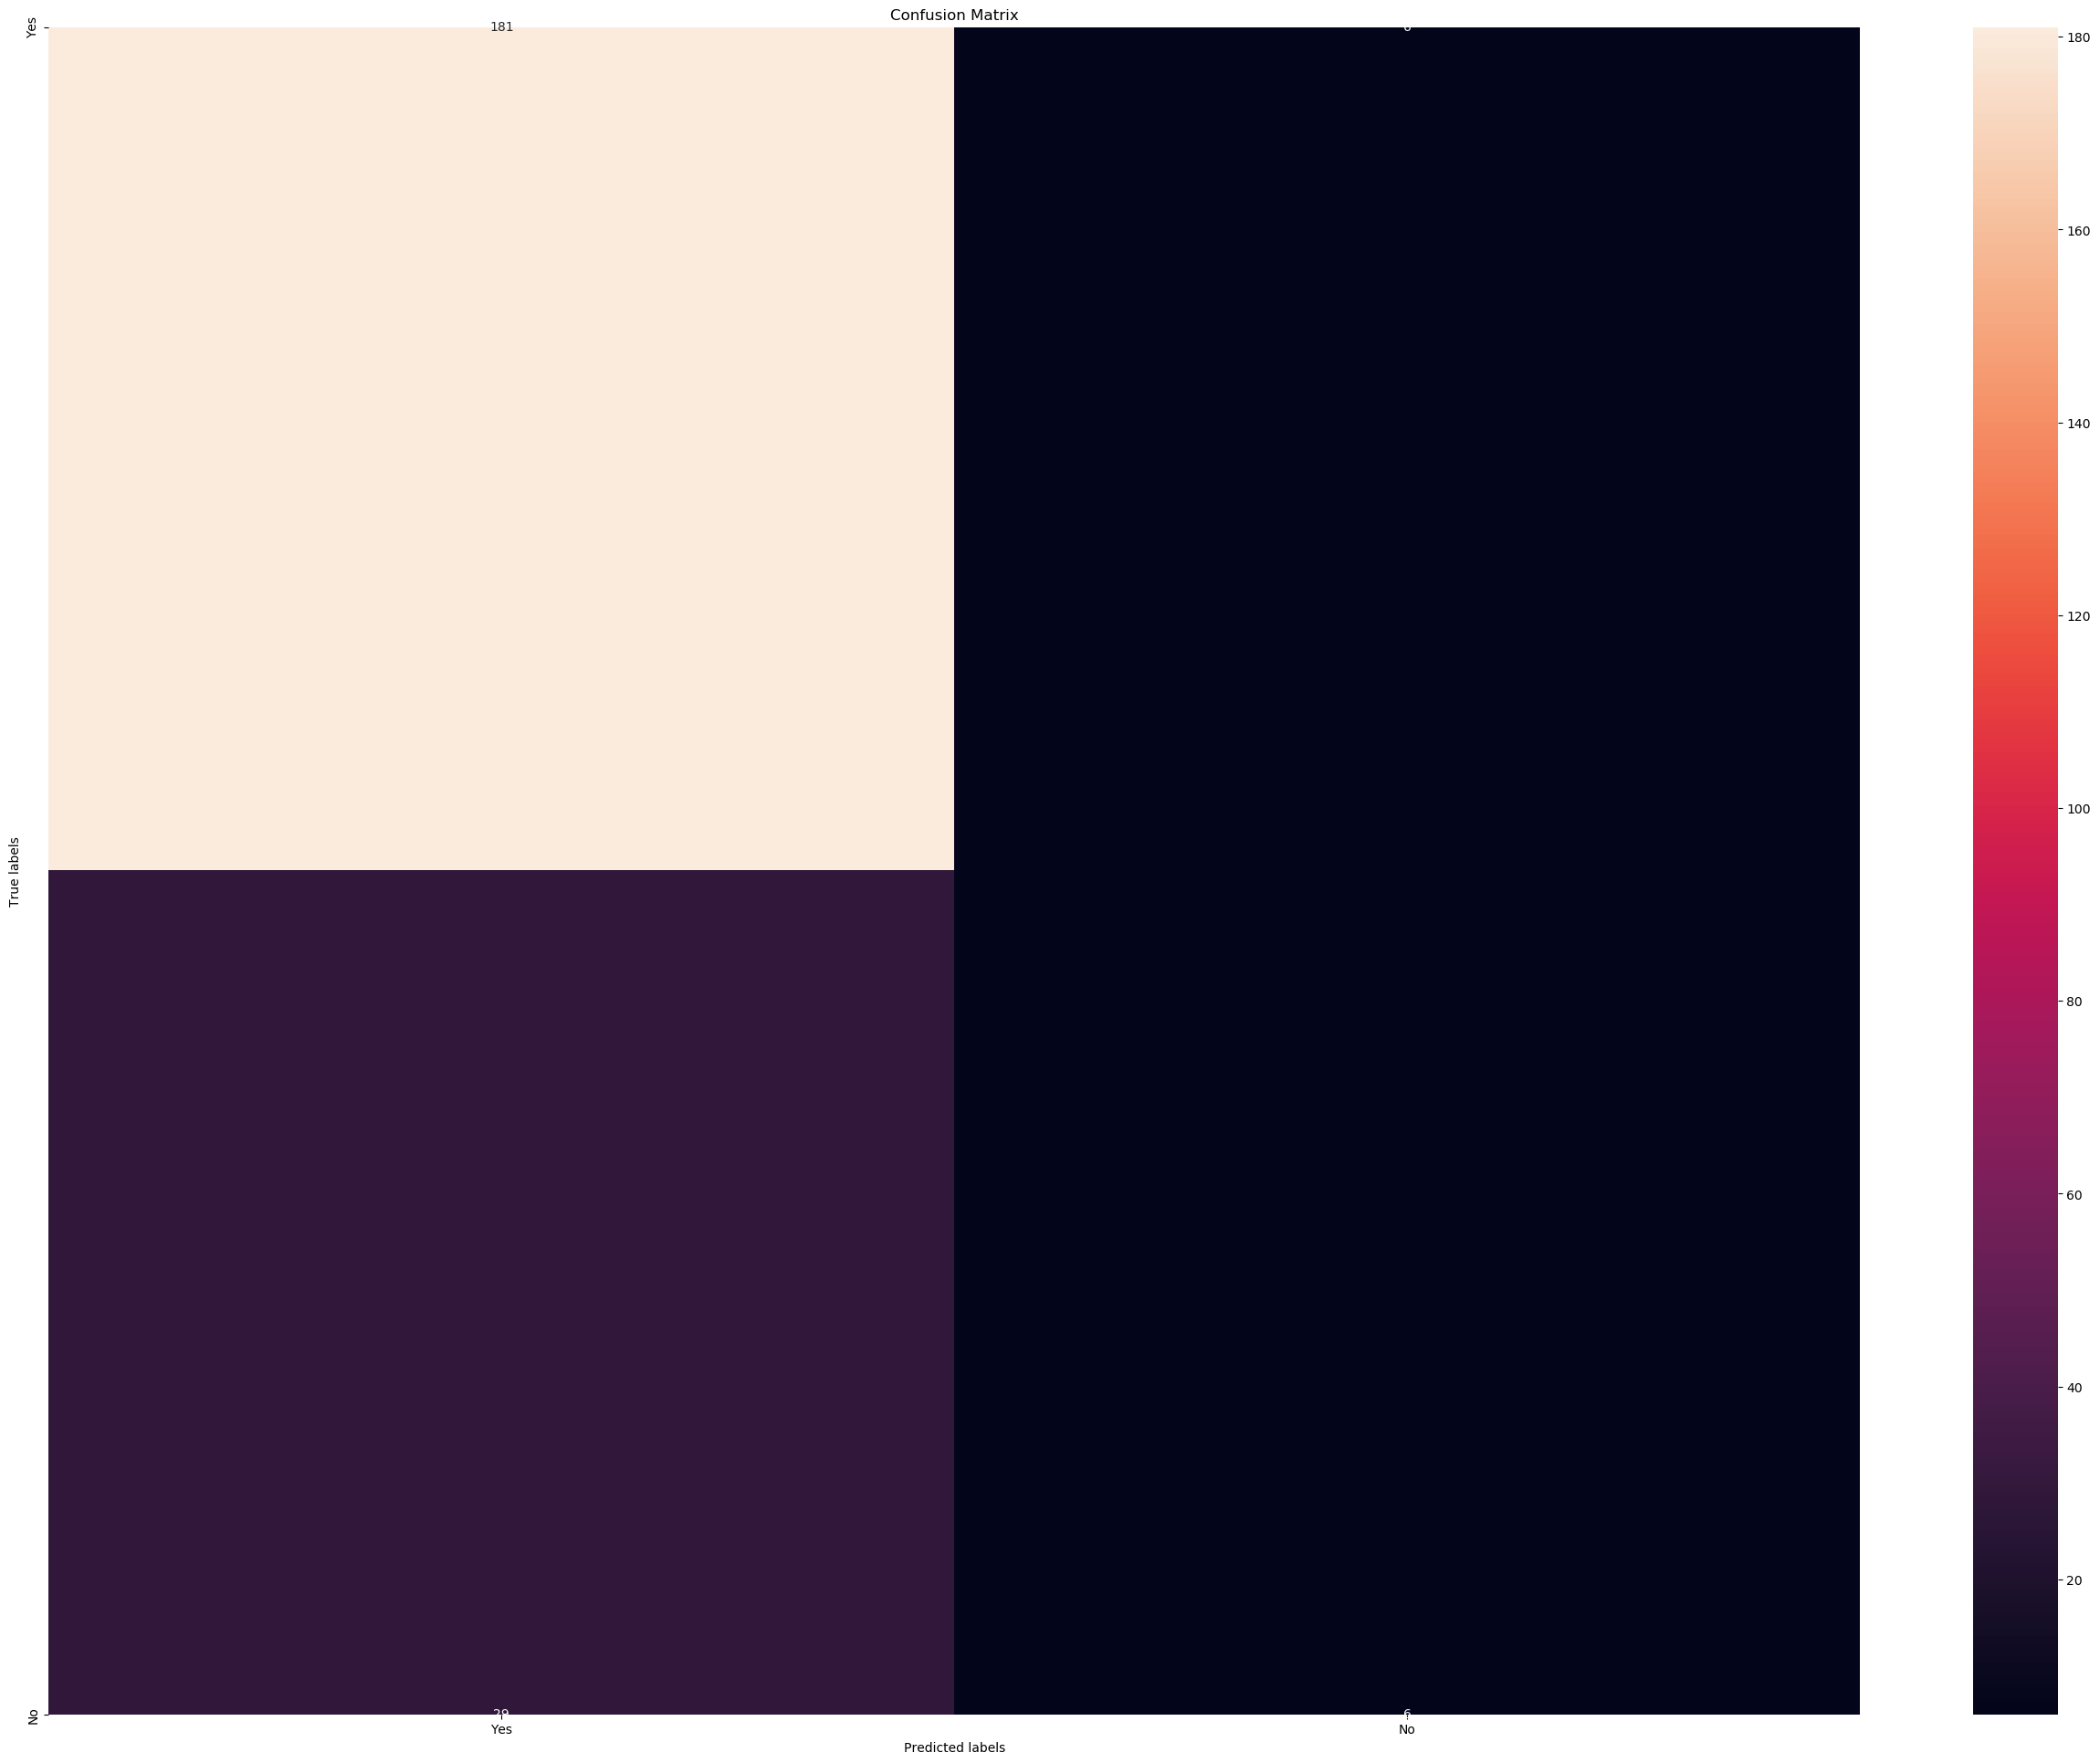

In [447]:
y_pred=logreg.predict(X_test)

cm=confusion_matrix(y_test, y_pred)#confusion matrix for the logistic model prediction

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Yes', 'No']); 
ax.yaxis.set_ticklabels(['Yes', 'No']);

In [448]:
print(classification_report(y_test, y_pred))
#classification report for logistic model prediction

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       187
           1       0.50      0.17      0.26        35

    accuracy                           0.84       222
   macro avg       0.68      0.57      0.58       222
weighted avg       0.80      0.84      0.81       222



## Interpreing Regression Coefficients

In [449]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(data['Response'], data[["Age",	"Education",	"Income",	"Dt_Customer",	
                                       "Recency"	,"NumDealsPurchases",	"NumWebVisitsMonth",	
                                       "Complain",	"Children",	"AmountSpent"	,"NumPurchased",	
                                       "Prev_campaigns",	"Marital_Status_Couple"]]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Response   R-squared (uncentered):                   0.381
Model:                            OLS   Adj. R-squared (uncentered):              0.377
Method:                 Least Squares   F-statistic:                              104.2
Date:                Sun, 09 Apr 2023   Prob (F-statistic):                   6.41e-218
Time:                        19:02:15   Log-Likelihood:                         -472.99
No. Observations:                2214   AIC:                                      972.0
Df Residuals:                    2201   BIC:                                      1046.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Age                      -0.0009      0.001     -1.729      0.084      -0.002       0.000
Education                 0.0287      0.008      3.765      0.000       0.014       0.044
Income                 -1.24e-06   6.66e-07     -1.862      0.063   -2.55e-06     6.6e-08
Dt_Customer               0.0001   1.92e-05      6.858      0.000    9.42e-05       0.000
Recency                  -0.0026      0.000    -11.705      0.000      -0.003      -0.002
NumDealsPurchases         0.0156      0.004      3.530      0.000       0.007       0.024
NumWebVisitsMonth         0.0048      0.004      1.188      0.235      -0.003       0.013
Complain                  0.0512      0.066      0.775      0.438      -0.078       0.181
Children                 -0.0431      0.012     -3.602      0.000      -0.067      -0.020
AmountSpent               0.0001   2.46e-05      5.216      0.000    7.99e-05       0.000
NumPurchased             -0.0064      0.002     -3.490      0.000      -0.010      -0.003
Prev_campaigns            0.1929      0.011     17.208      0.000       0.171       0.215
Marital_Status_Couple    -0.1168      0.013     -8.781      0.000      -0.143      -0.091
==============================================================================
Omnibus:                      540.446   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1118.471
Skew:                           1.422   Prob(JB):                    1.34e-243
Kurtosis:                       5.009   Cond. No.                     5.71e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Interpretting the Regression Coefficients

The coefficients of the independent variables in the regression model represent the change in the dependent variable for a one-unit increase in the corresponding independent variable, holding all other independent variables constant.

1. The coefficient for "Age" is -0.0013. This means that for every one unit increase in age, the dependent variable (Response) is expected to decrease by 0.0013, holding all other variables constant.

2. The coefficient for "Education" is 0.0266. This means that for every one unit increase in education, the dependent variable is expected to increase by 0.0266, holding all other variables constant.

3. The coefficient for "Income" is -5.288e-07. This means that for every one unit increase in income, the dependent variable is expected to decrease by 5.288e-07, holding all other variables constant. However, the p-value associated with this coefficient is 0.149, which is greater than the commonly used threshold of 0.05, indicating that this coefficient may not be statistically significant.

4. The coefficient for "Complain" is 0.0514, but the p-value associated with this coefficient is 0.438, which is greater than 0.05, indicating that this variable may not be statistically significant in the model.

5. The coefficients for "Recency", "Children", "AmountSpent", "NumPurchased", "Prev_campaigns", and "Marital_Status_Couple" all have p-values less than 0.05, indicating that they are statistically significant in the model.

It is important to note that the coefficients should be interpreted with caution, as the presence of multicollinearity or other numerical problems can affect their validity. Therefore, it is recommended to further investigate the model to ensure the robustness of the results.

The adjusted R-squared value is 0.391, which means that about 39.1% of the variability in the response variable can be explained by the independent variables in the model. The F-statistic is 111.8, and the p-value associated with it is very low (1.18e-231), which suggests that at least one of the independent variables is significantly related to the response variable.

The coefficients of the independent variables represent the amount of change in the dependent variable for a one-unit increase in the corresponding independent variable, holding all other independent variables constant. The p-value associated with each coefficient represents the statistical significance of that variable, i.e., whether or not the variable is significantly related to the response variable.

The model does not contain a constant, as indicated by the note [1], which means that the intercept is zero. The note [2] indicates that the standard errors assume that the covariance matrix of the errors is correctly specified.

The large condition number (6.03e+05) mentioned in note [3] suggests that there may be strong multicollinearity or other numerical problems in the model. This should be further investigated to ensure the validity of the results.

Overall, the model appears to be a good fit for the data, but further analysis is needed to assess the robustness of the results.



## Shap Analysis for Linear model

Permutation explainer: 1694it [00:29, 38.88it/s]


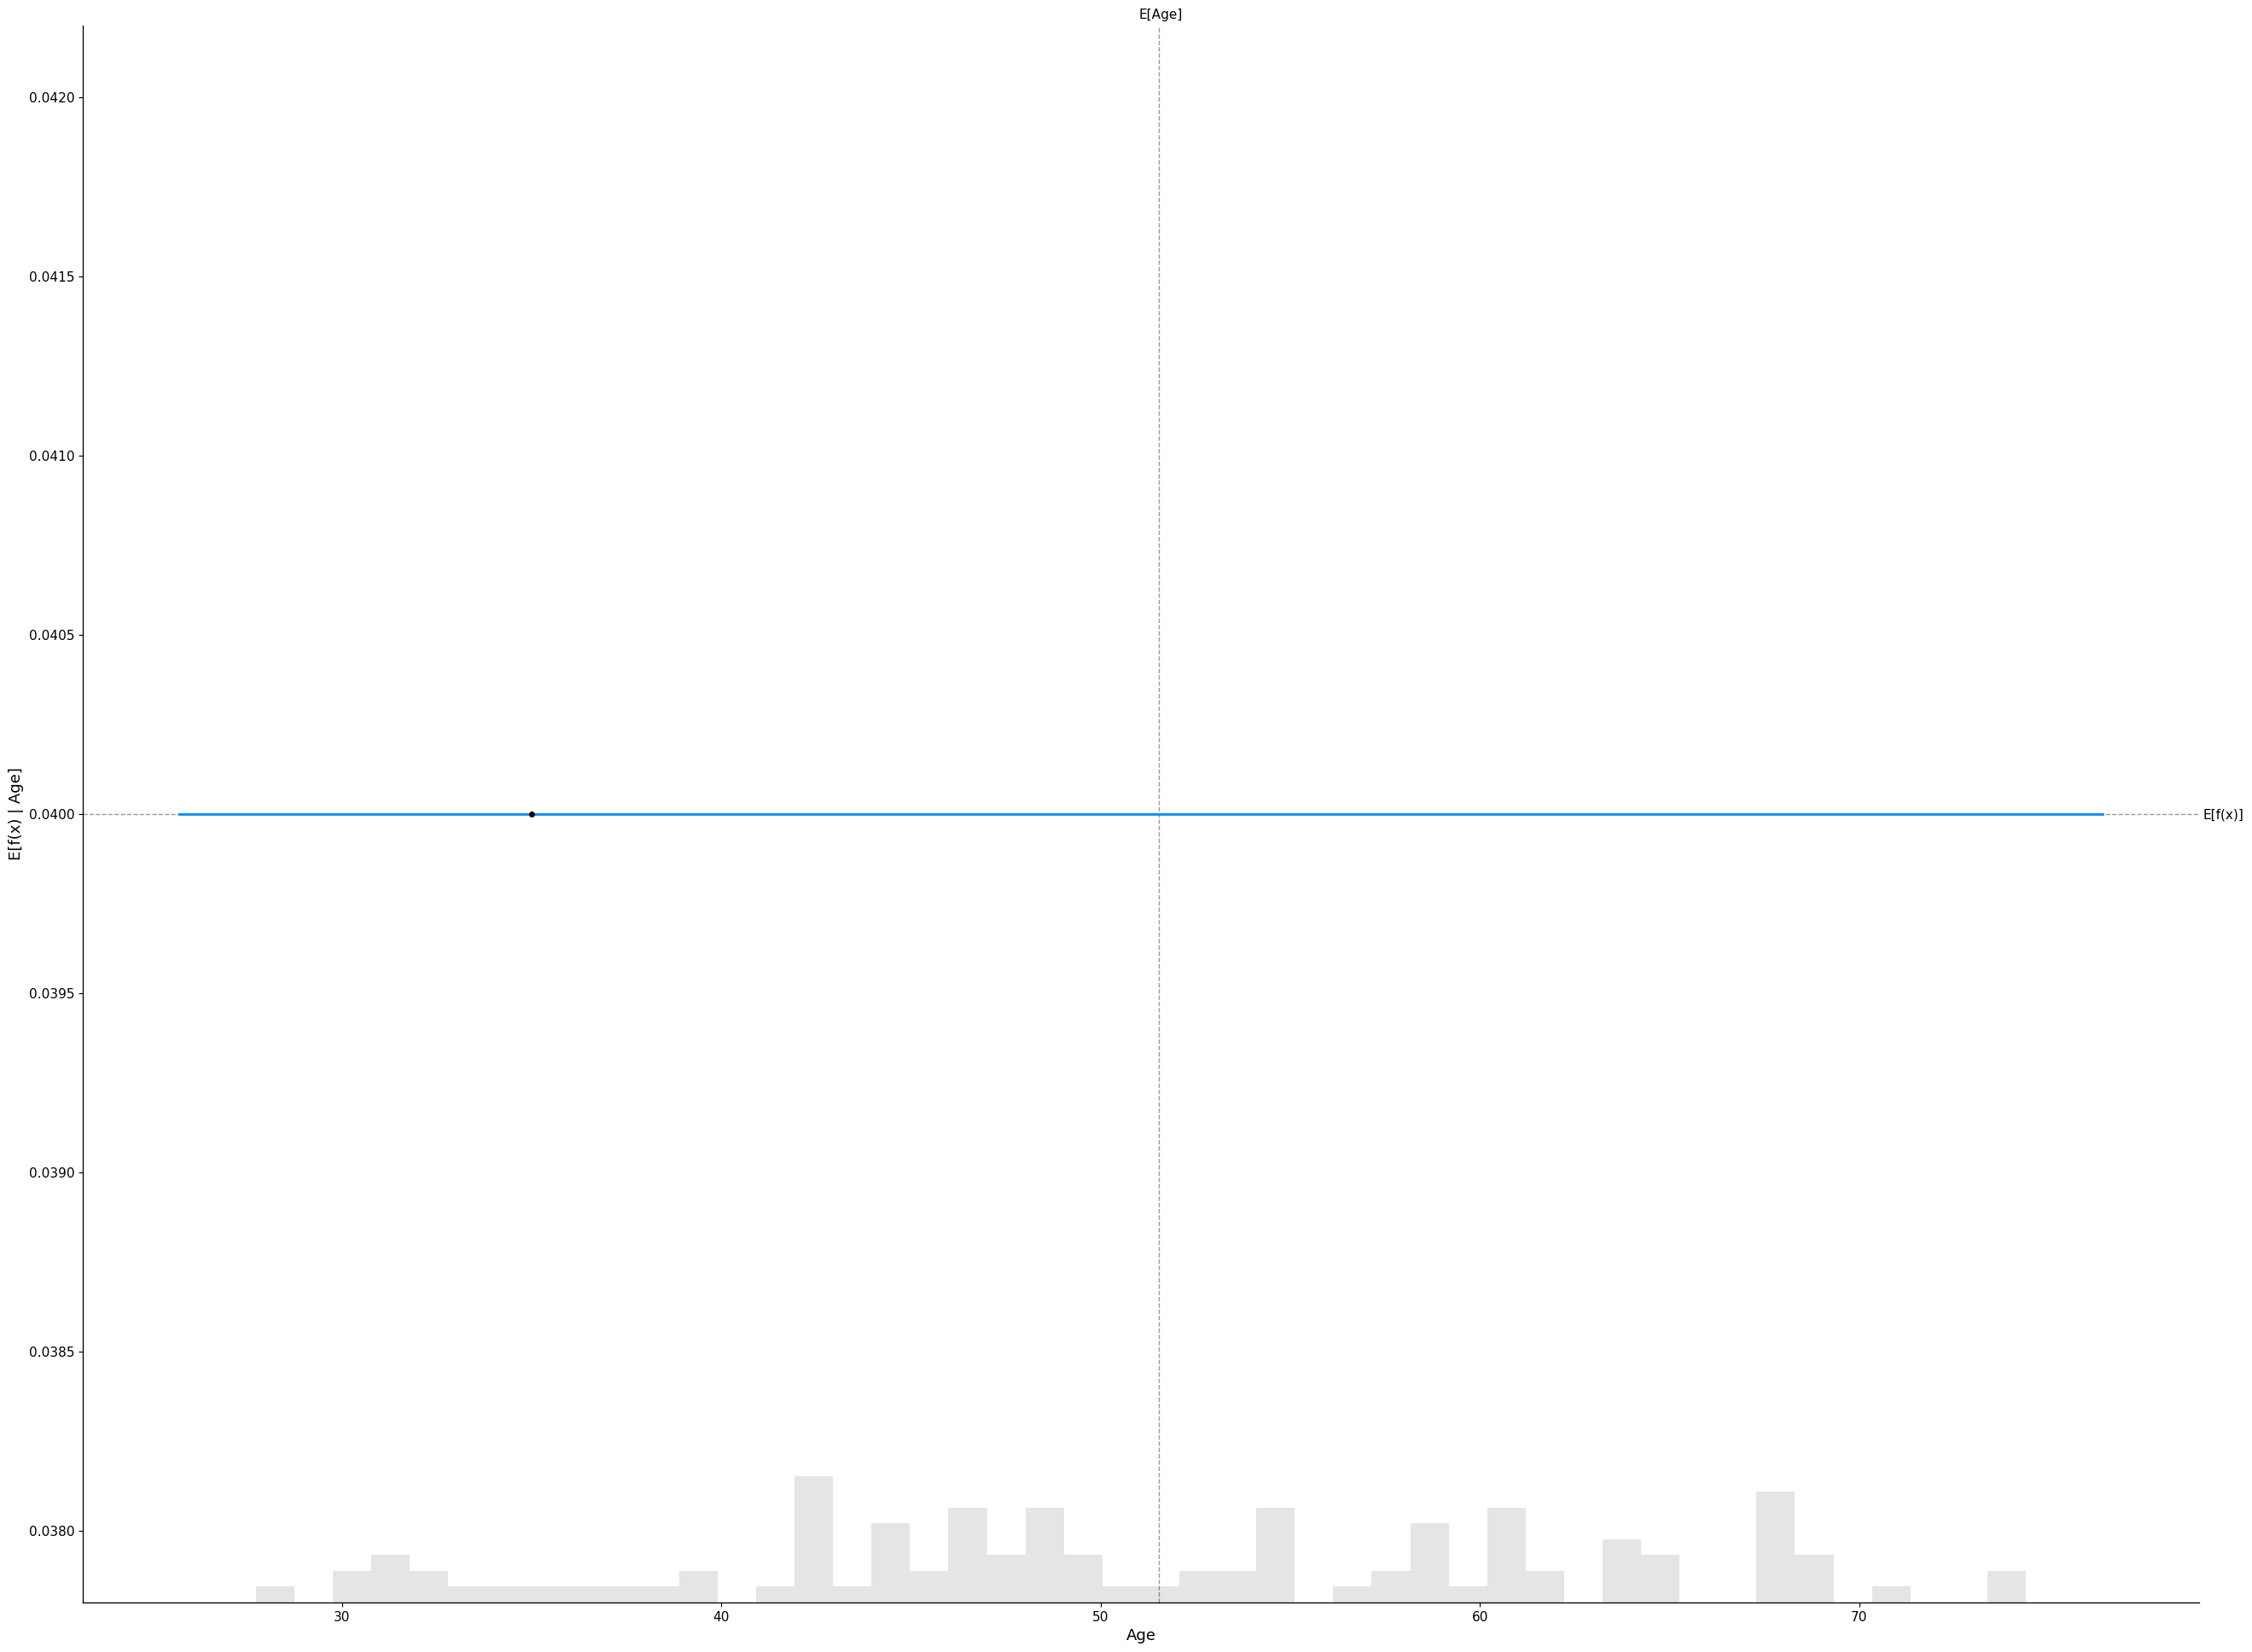

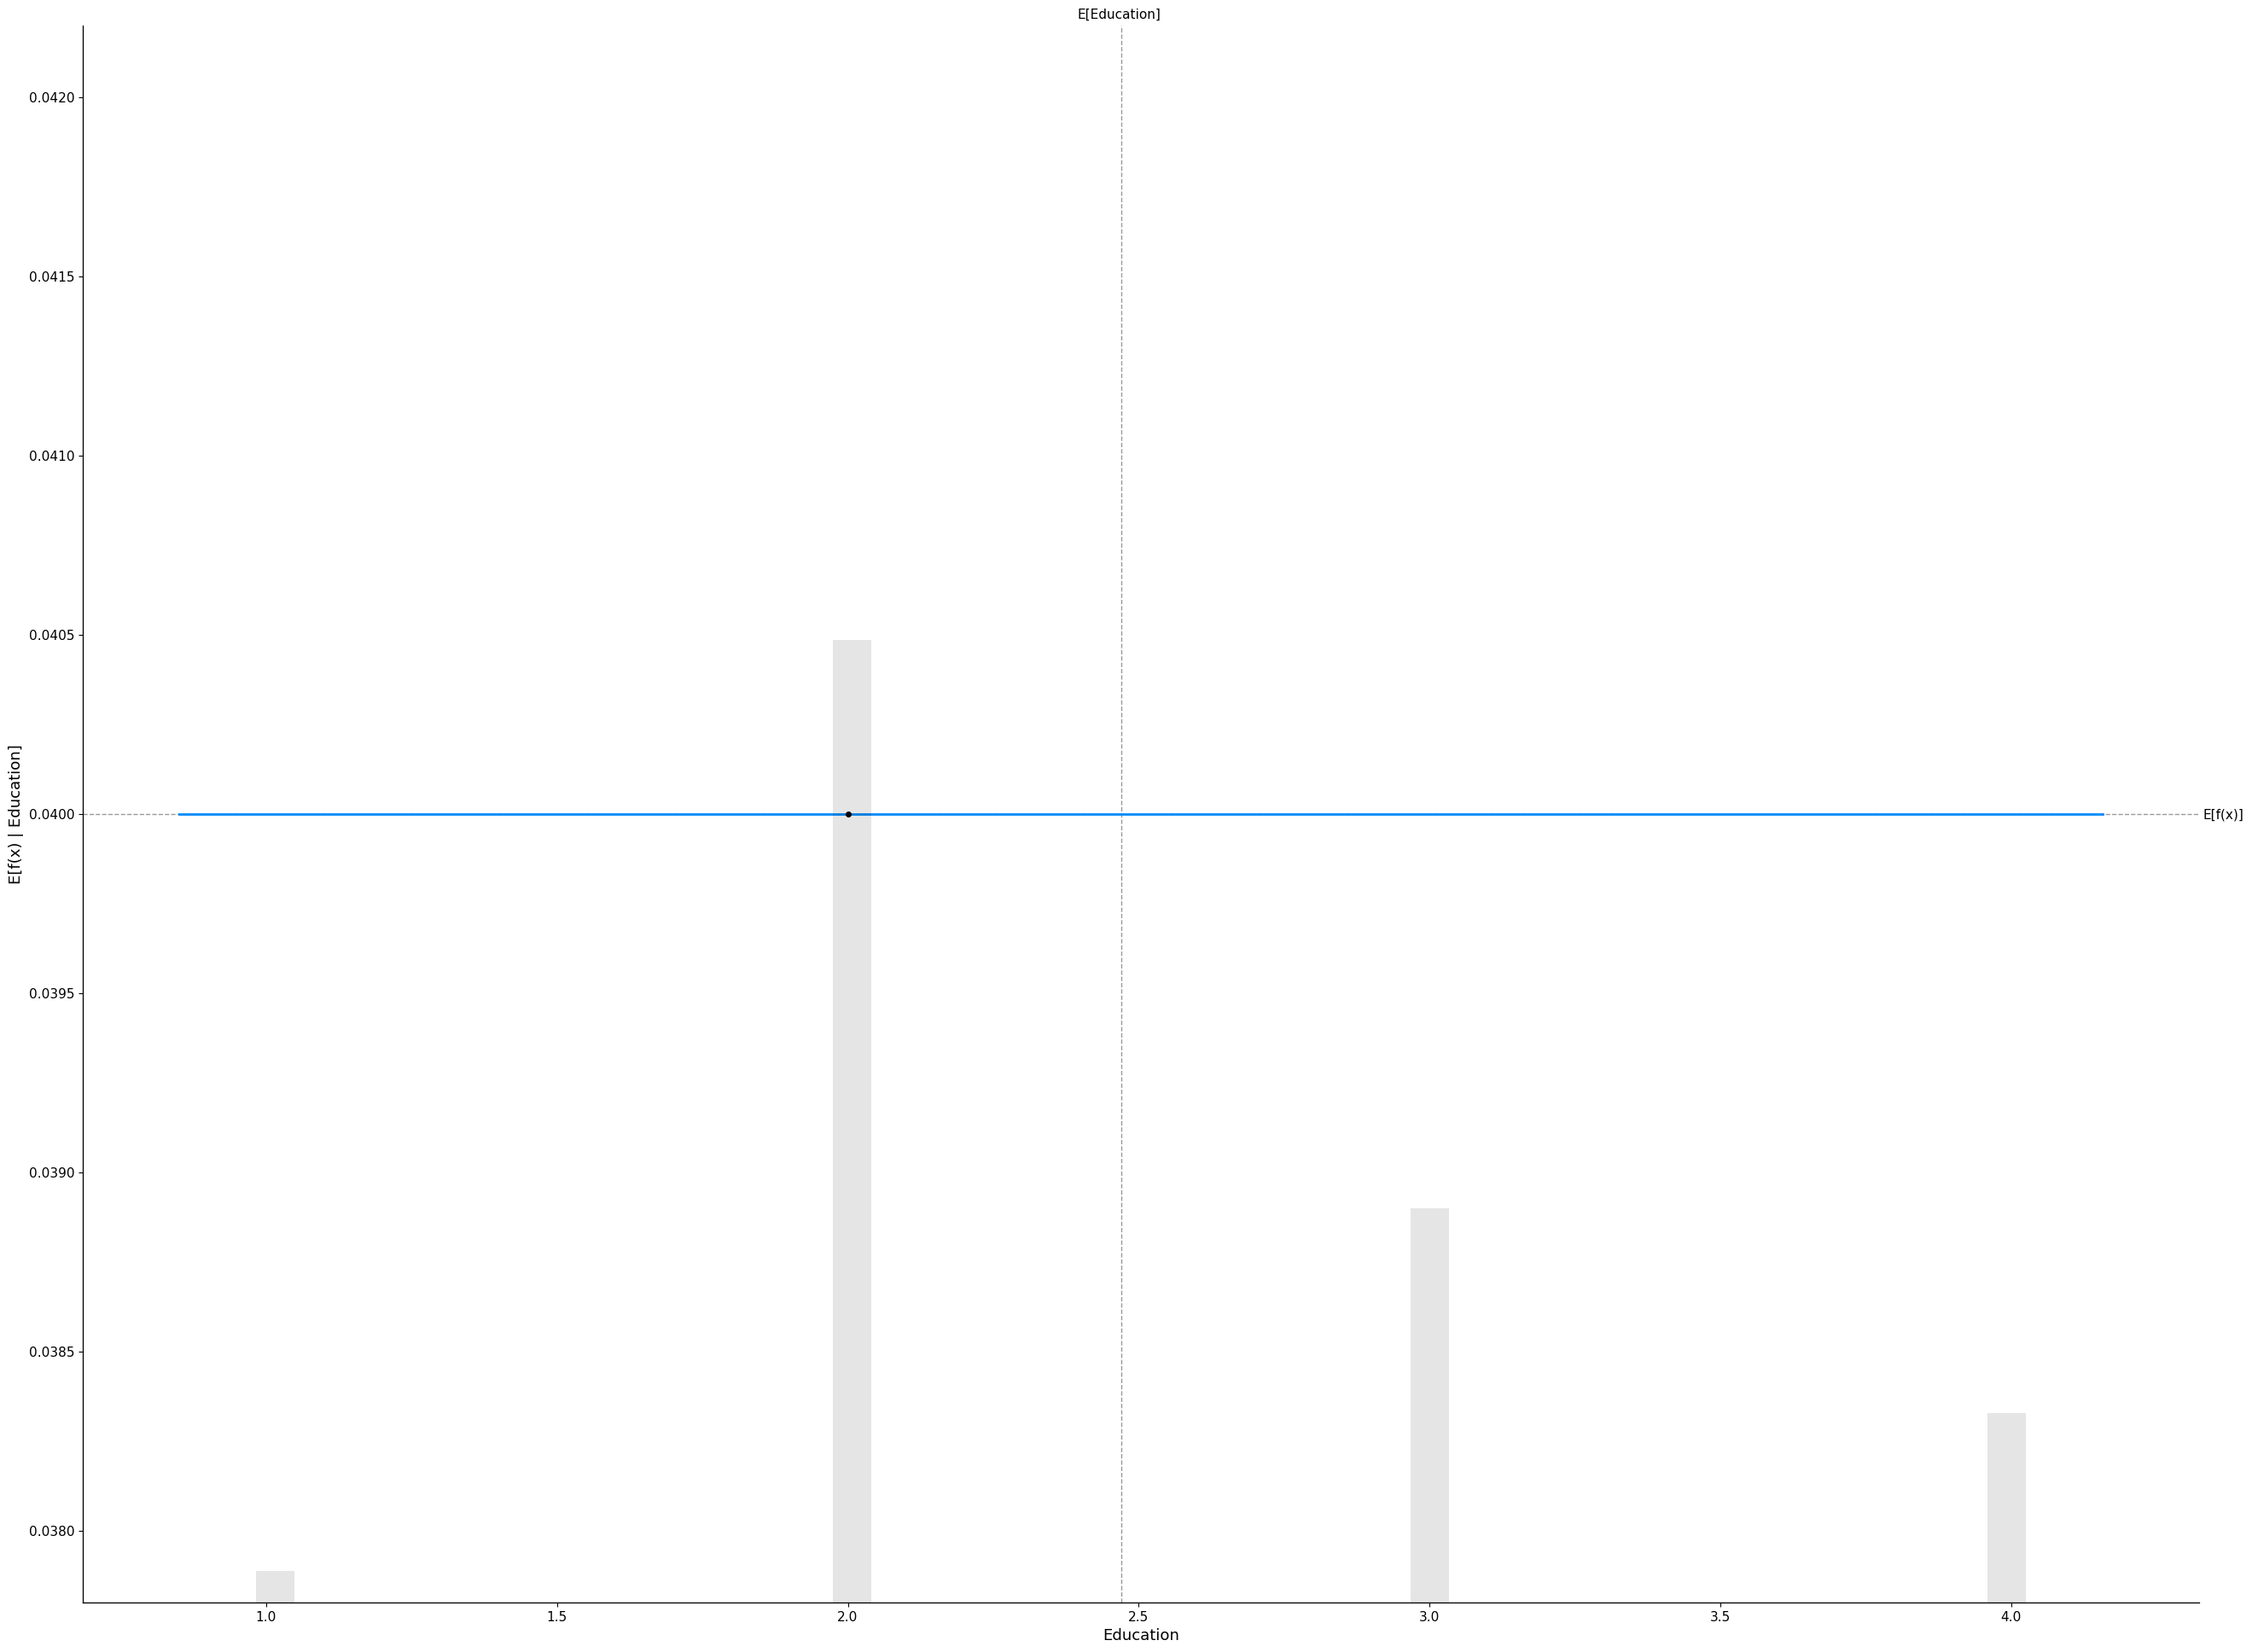

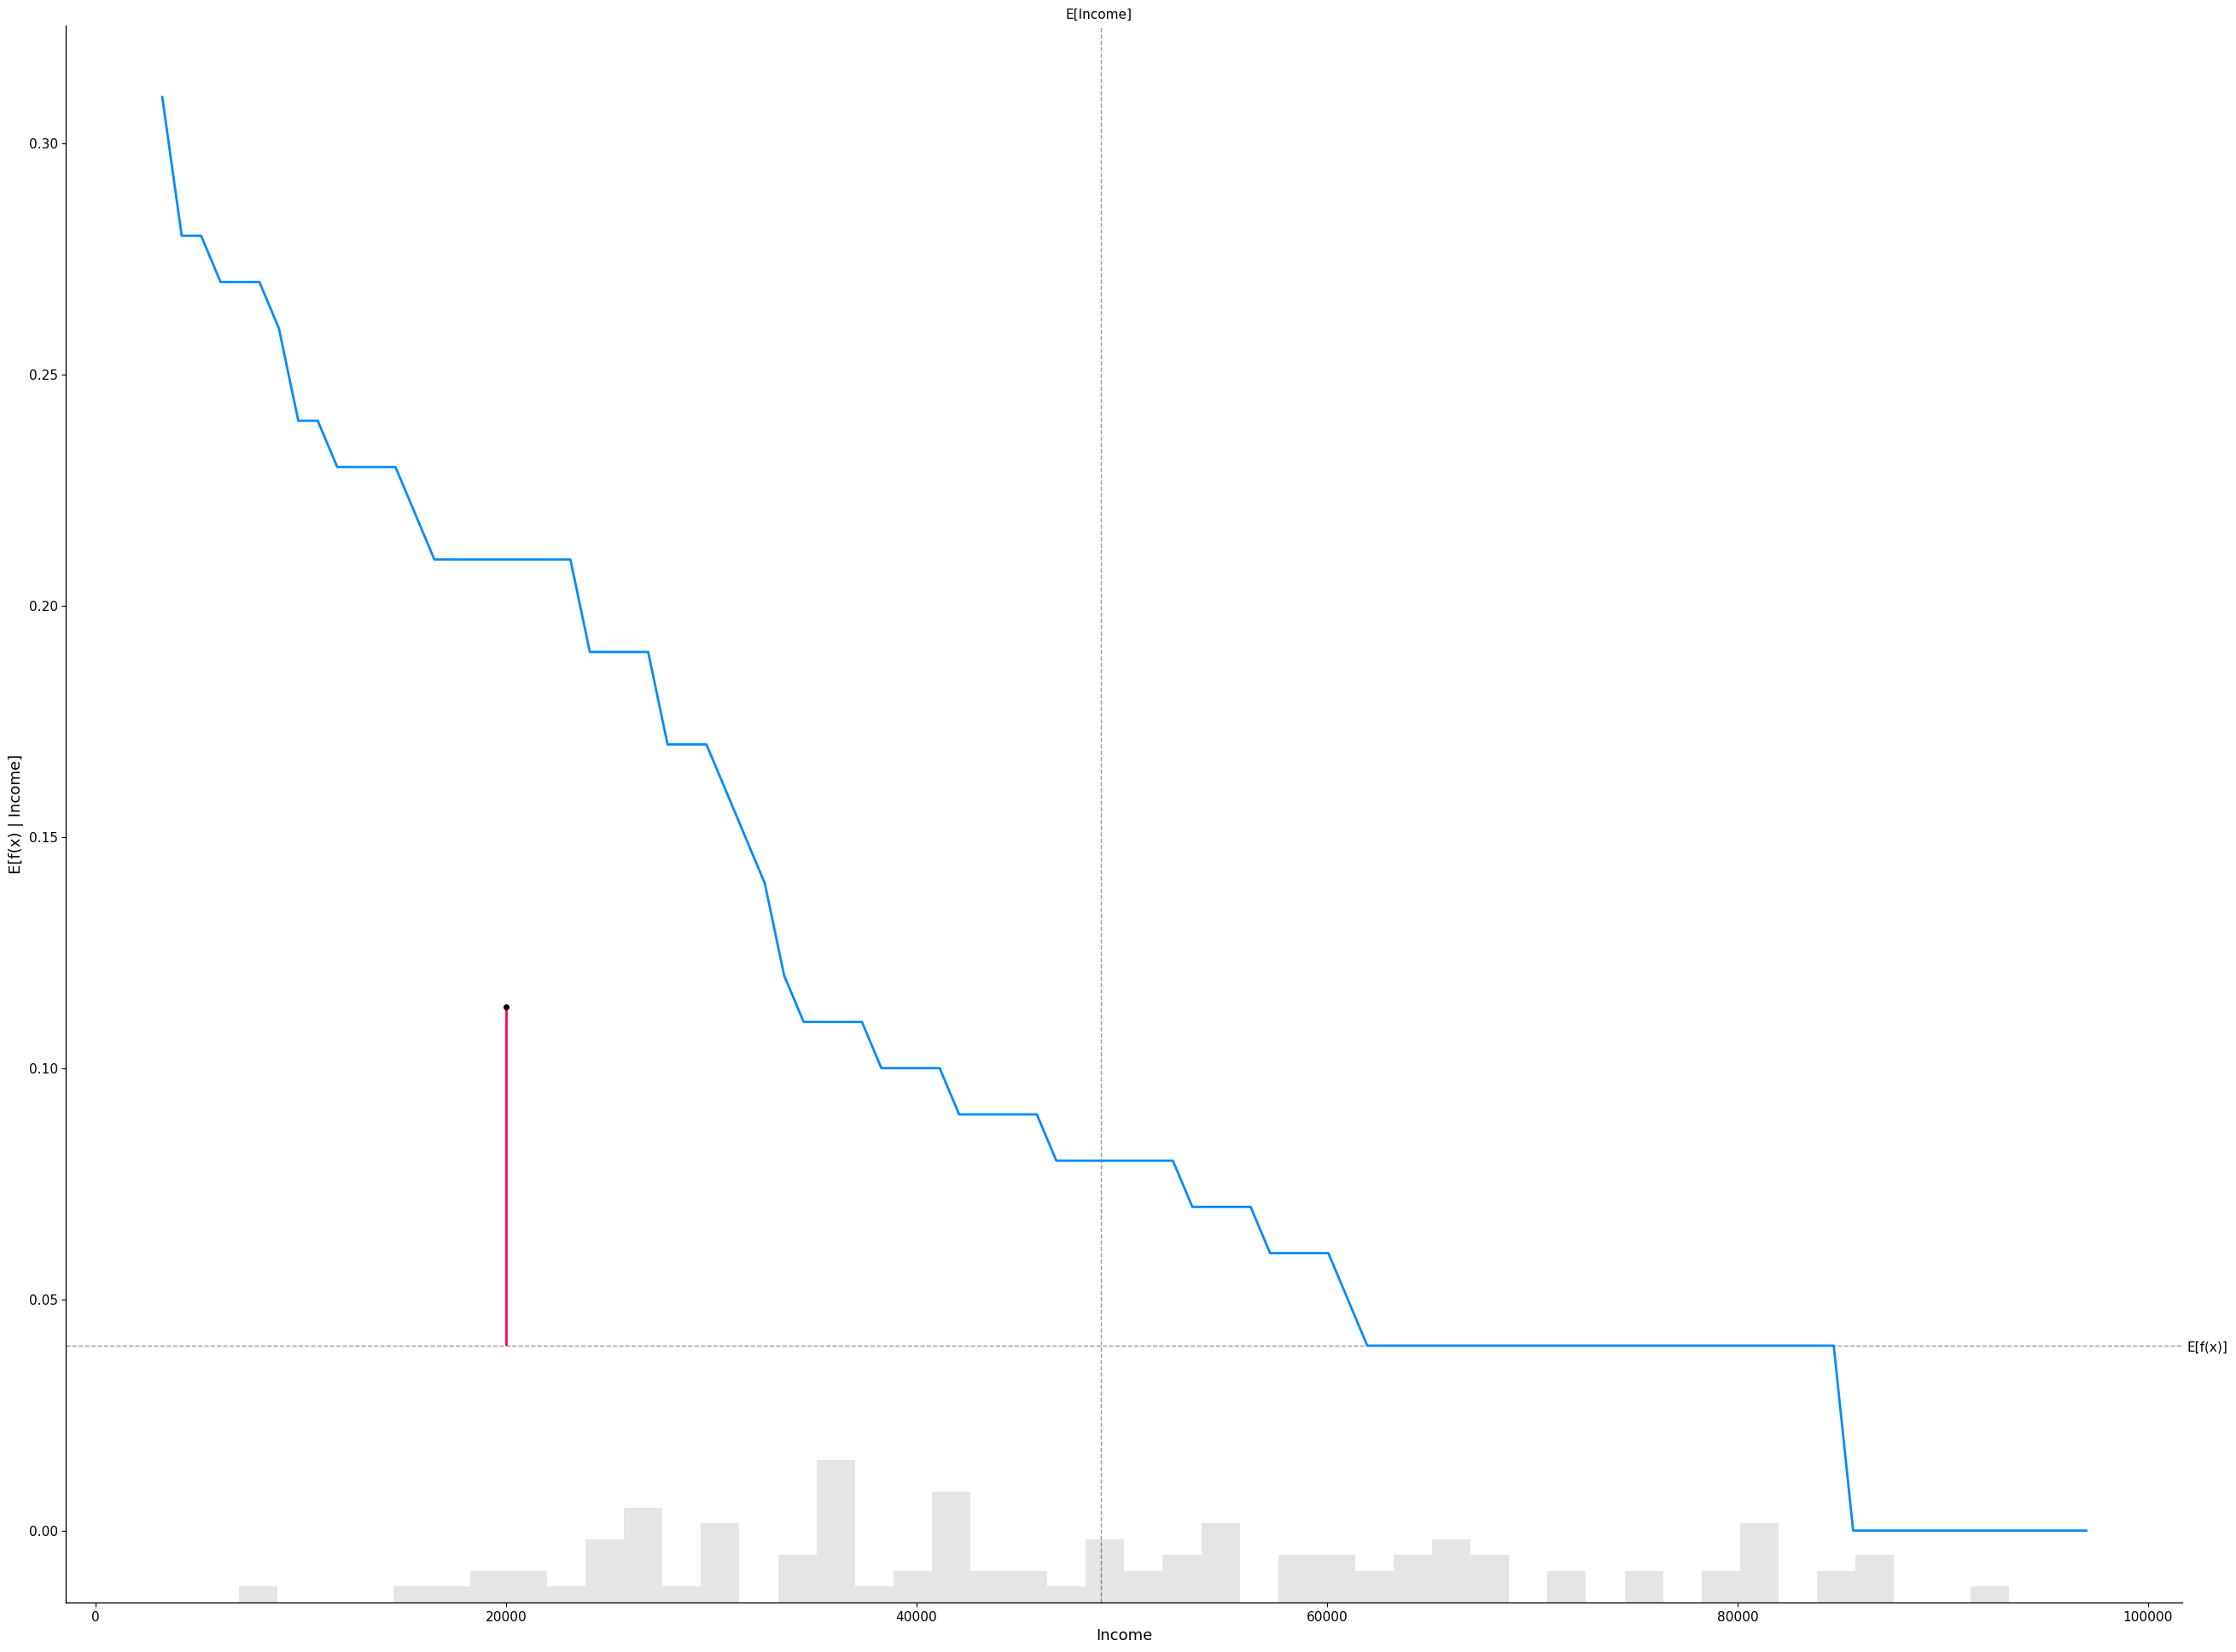

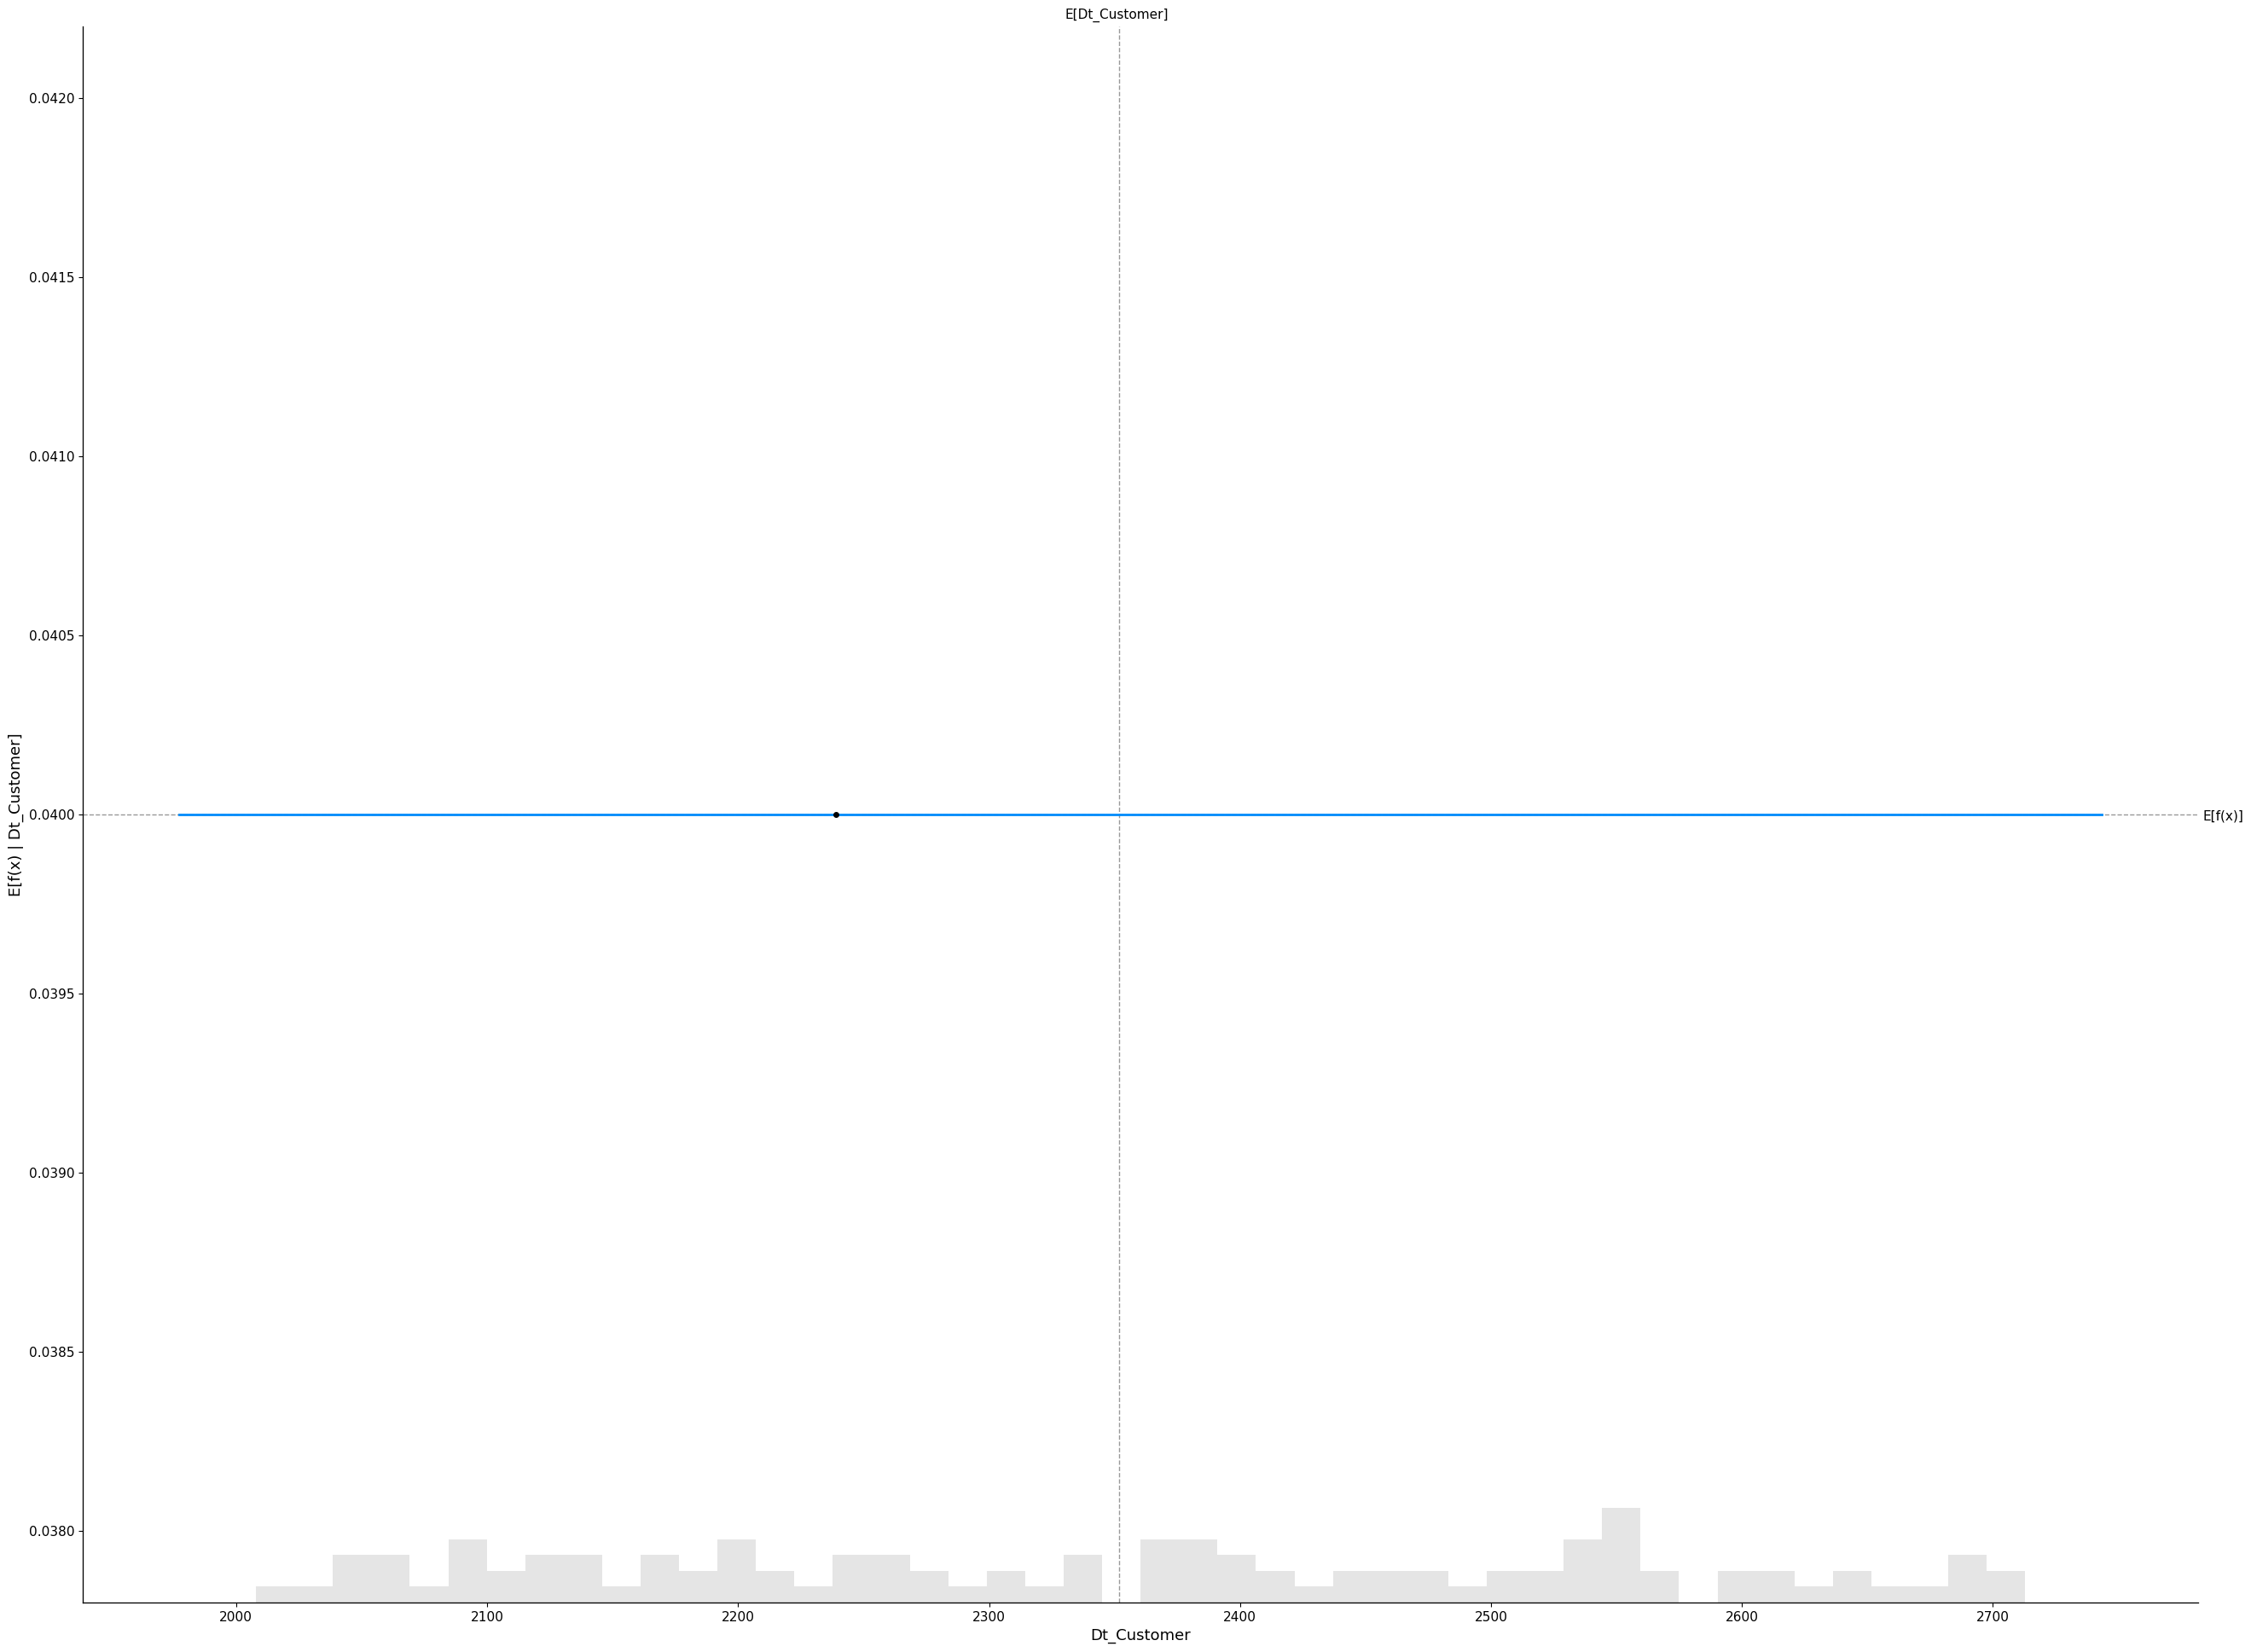

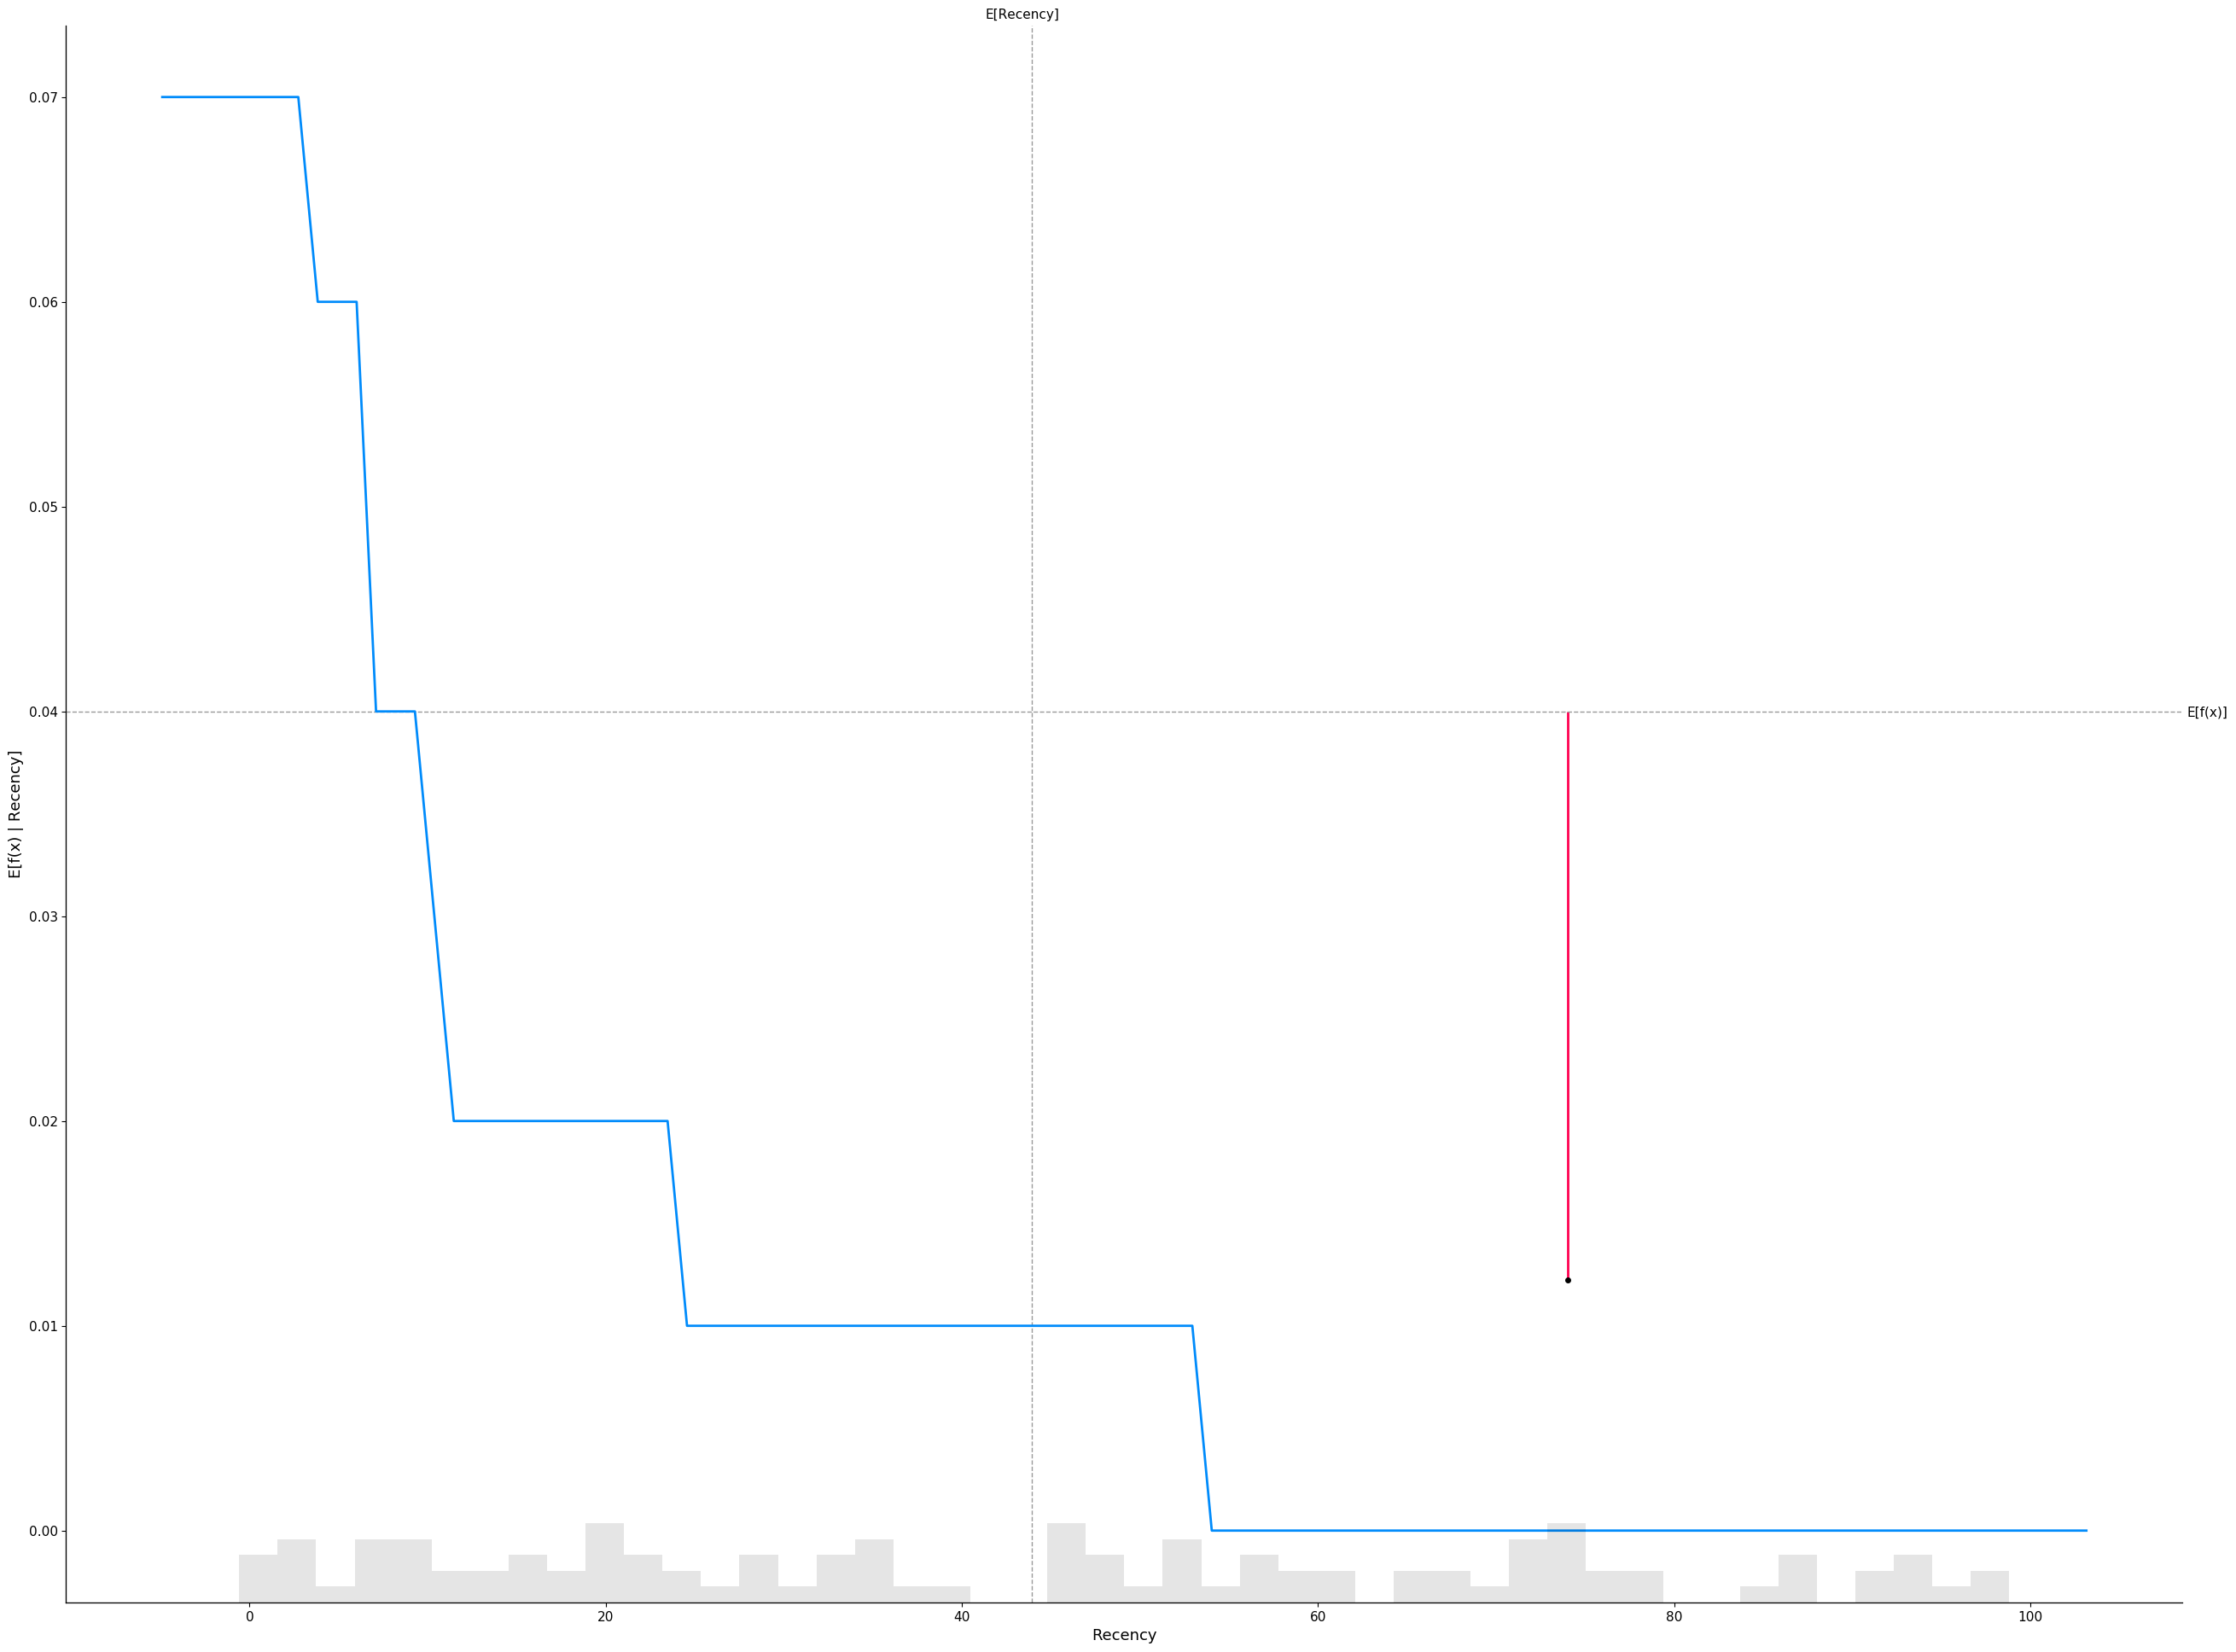

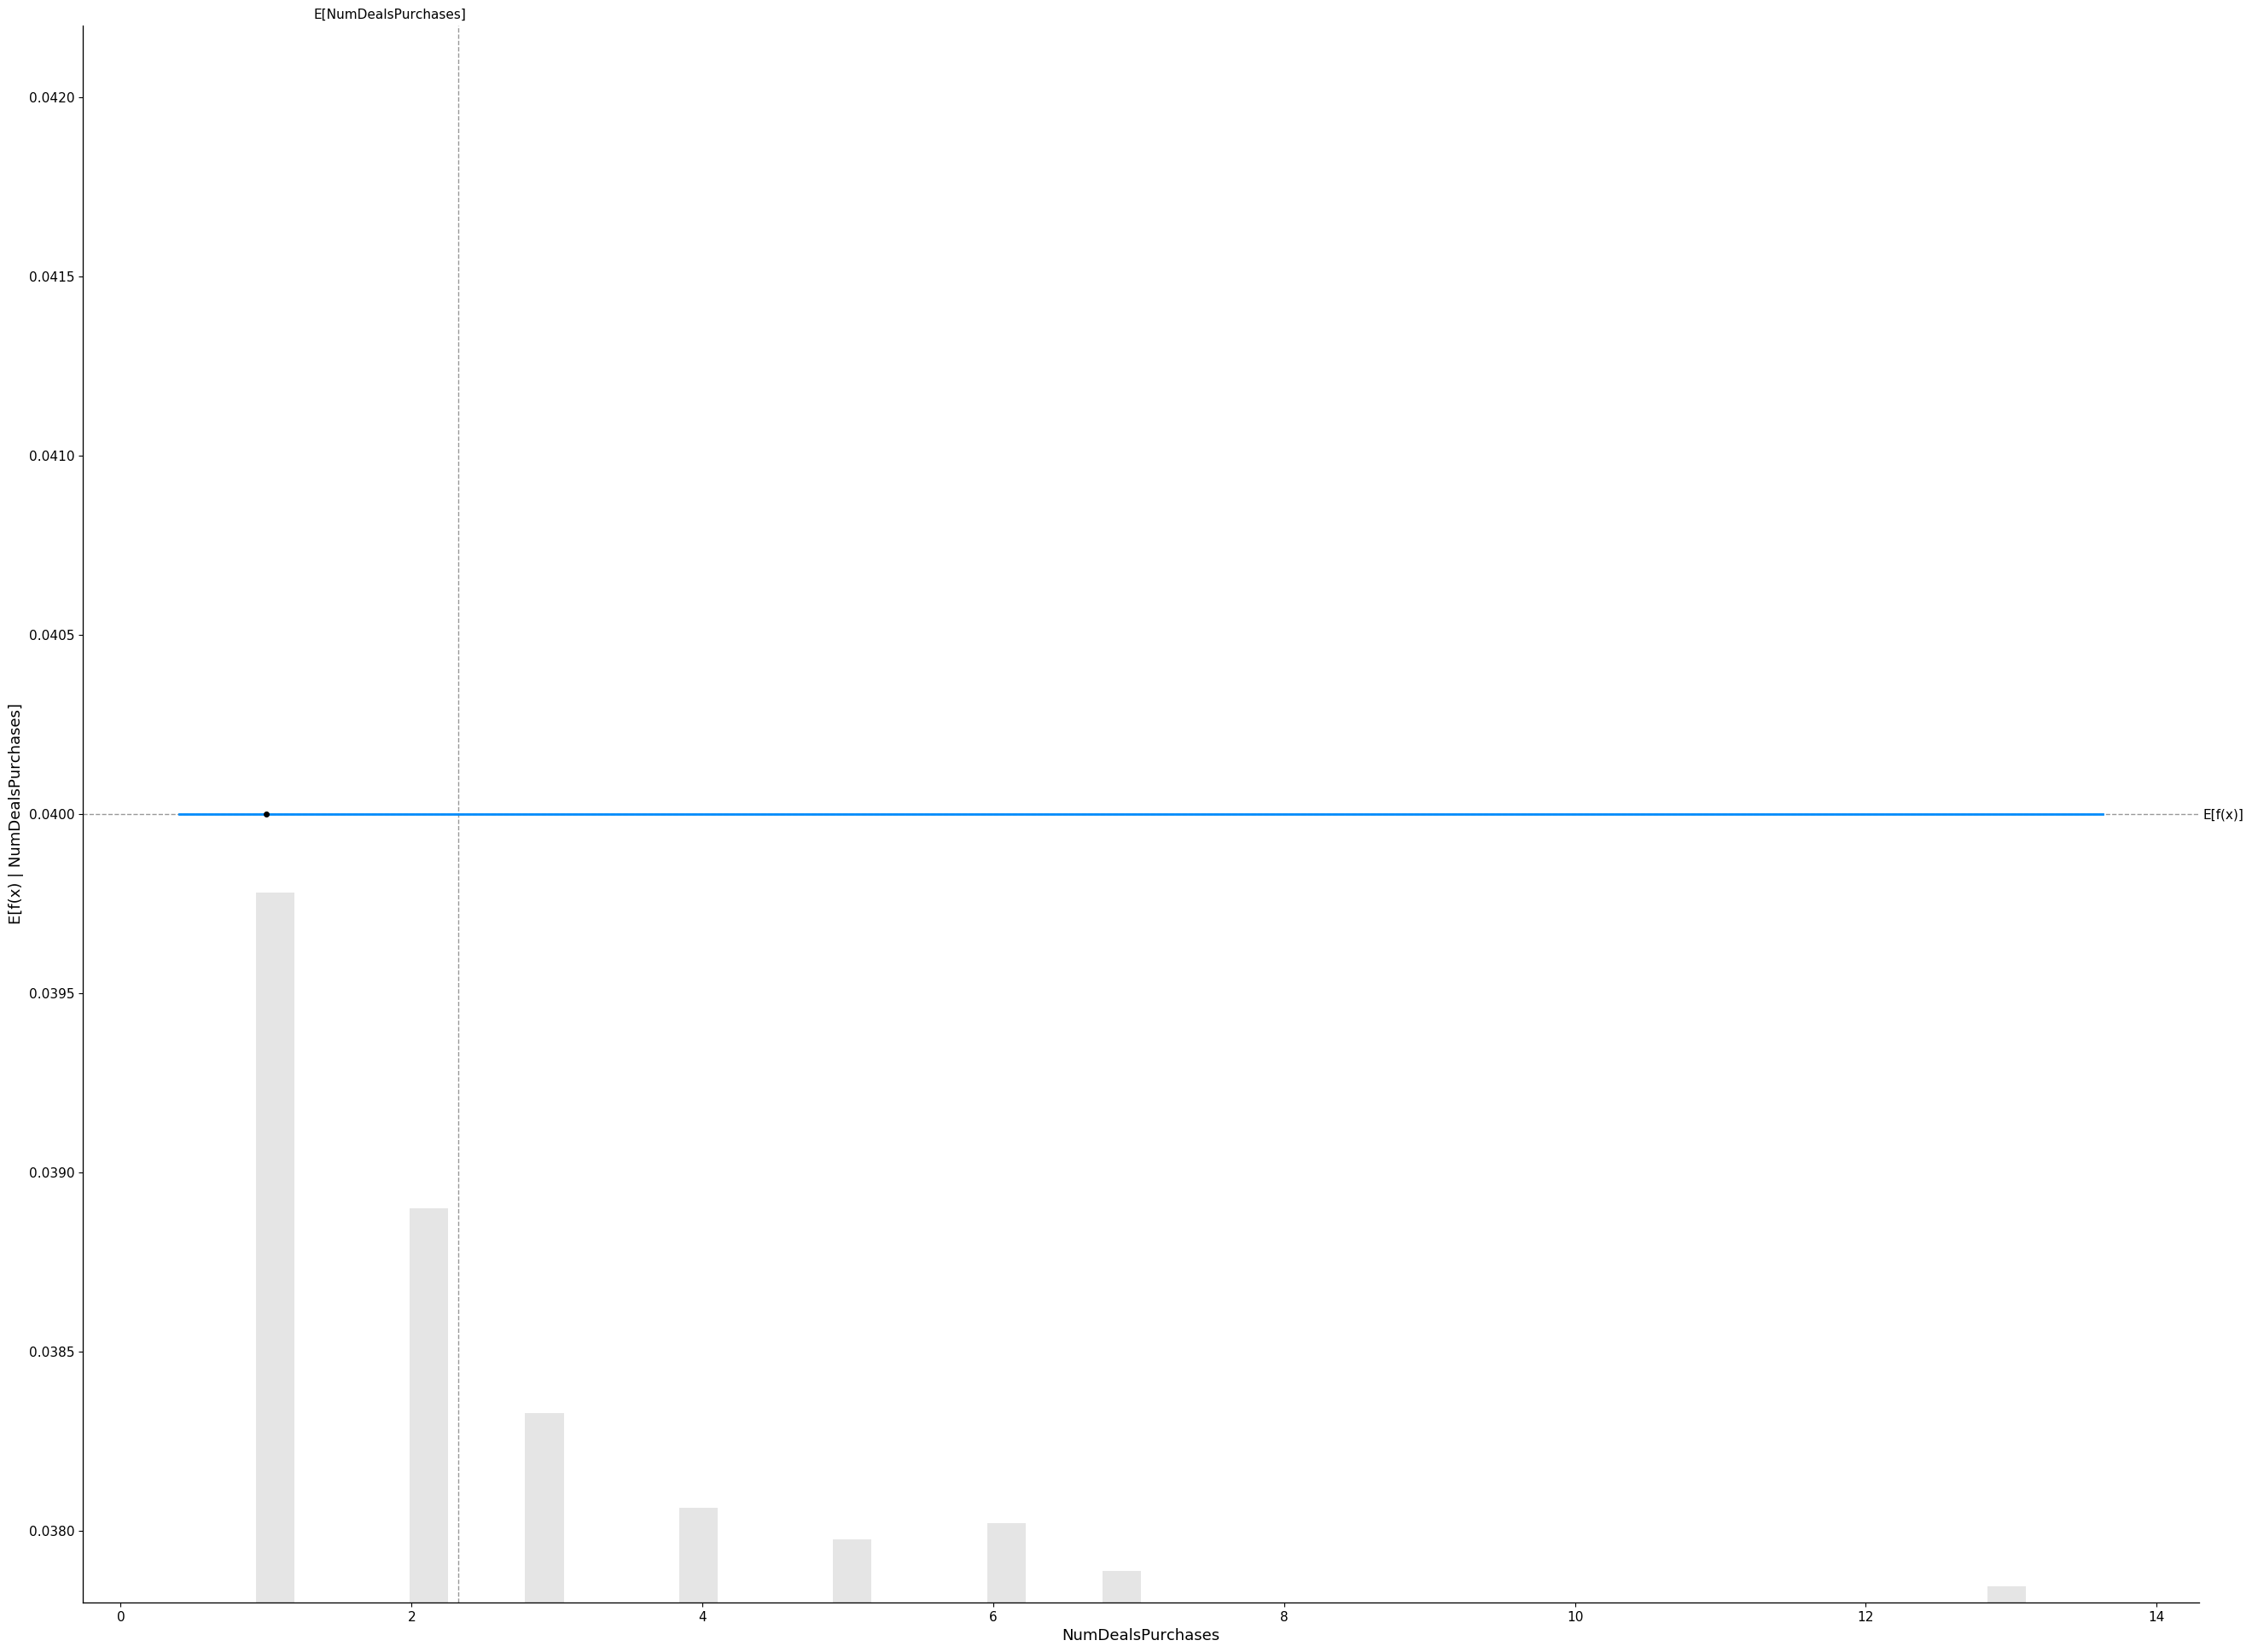

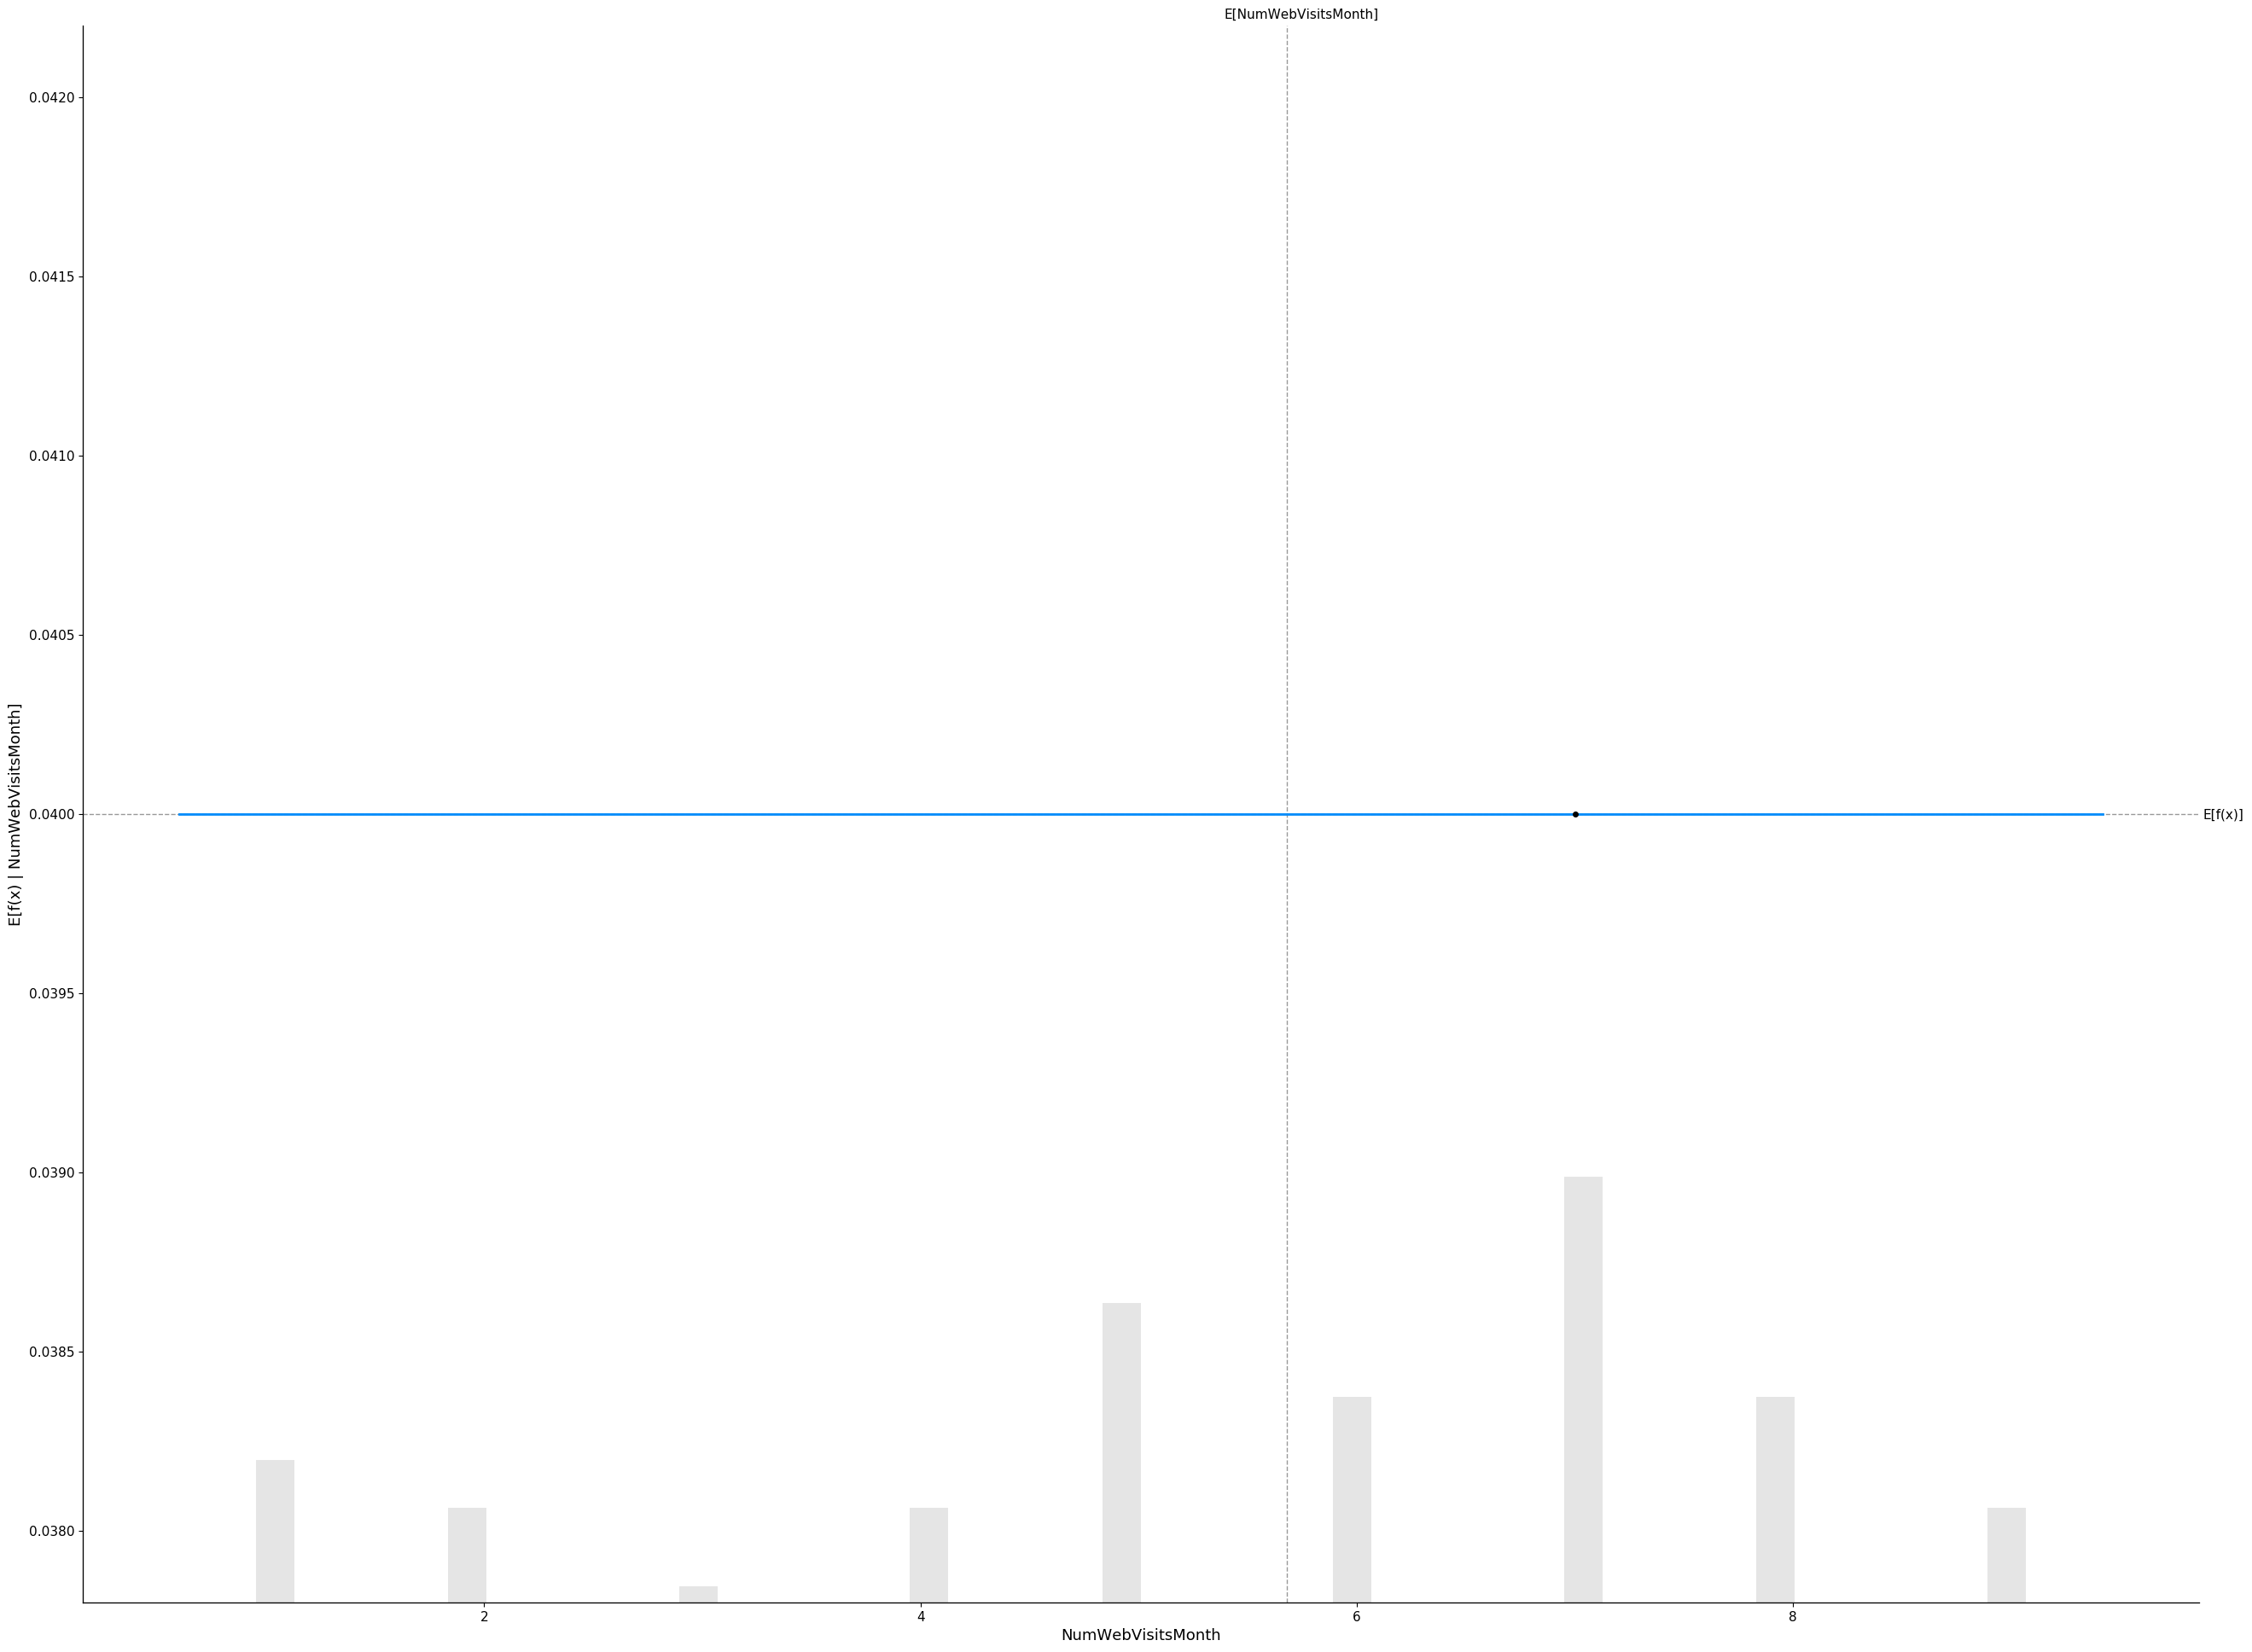

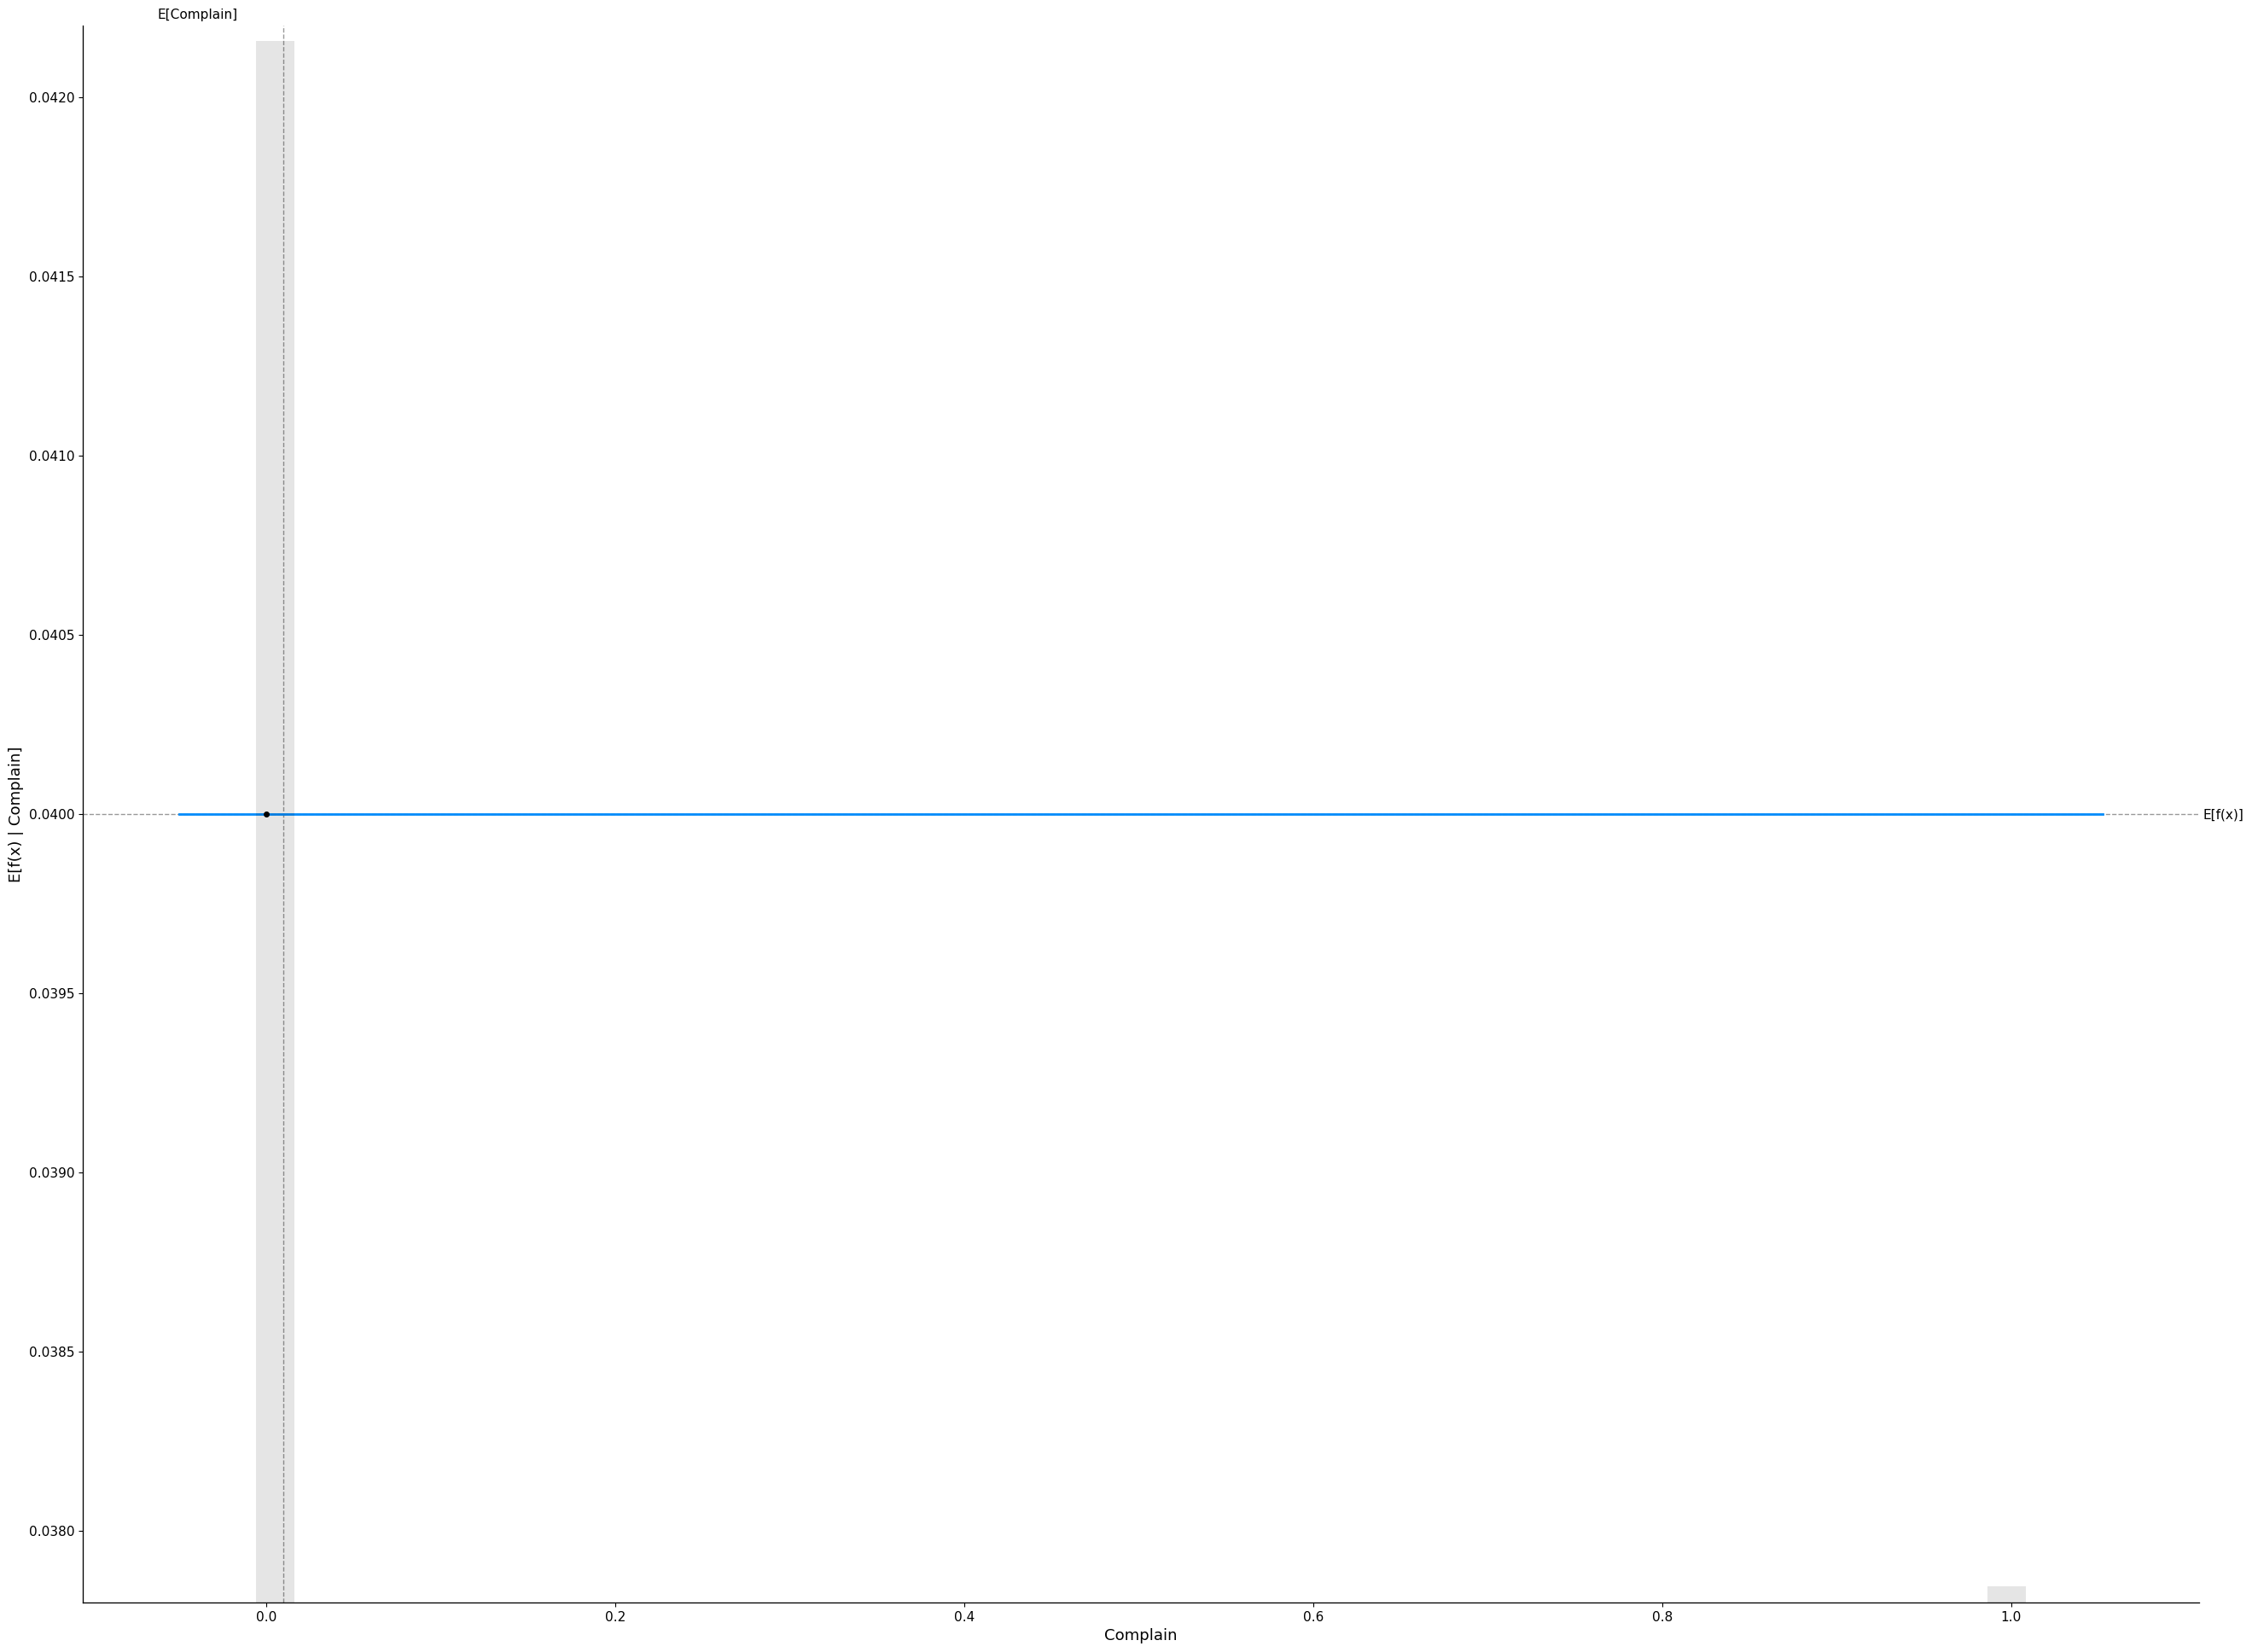

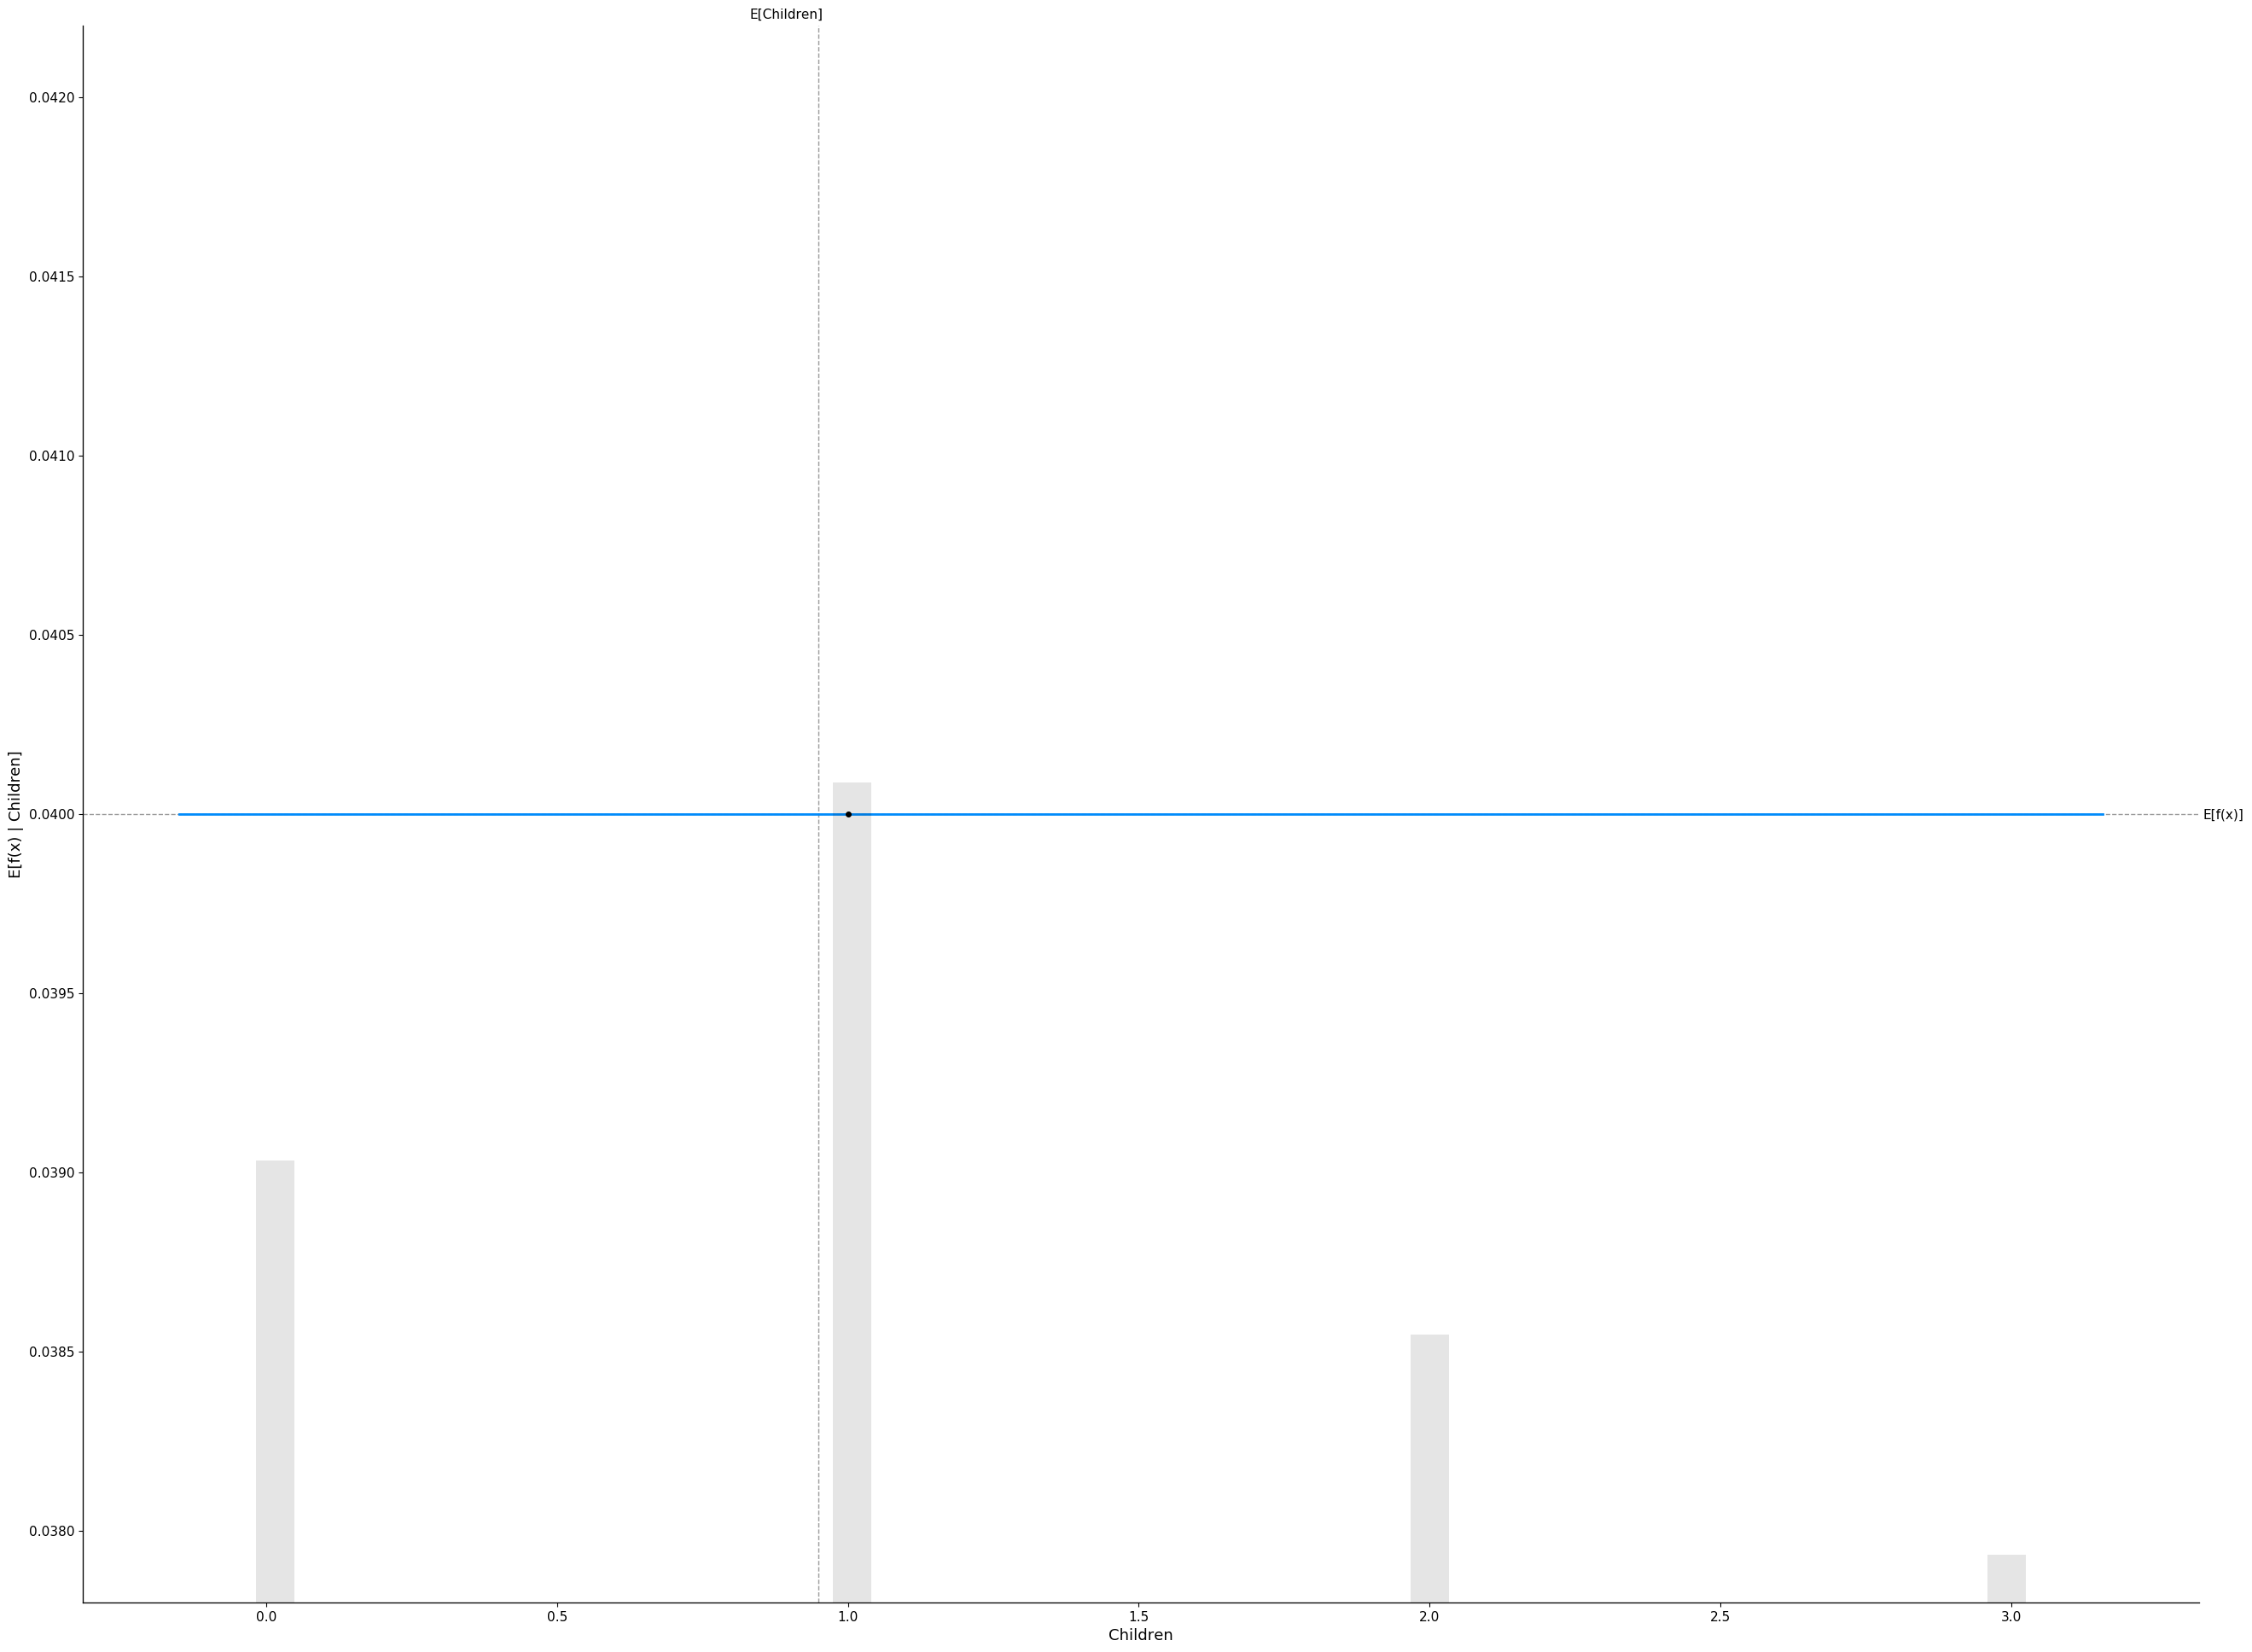

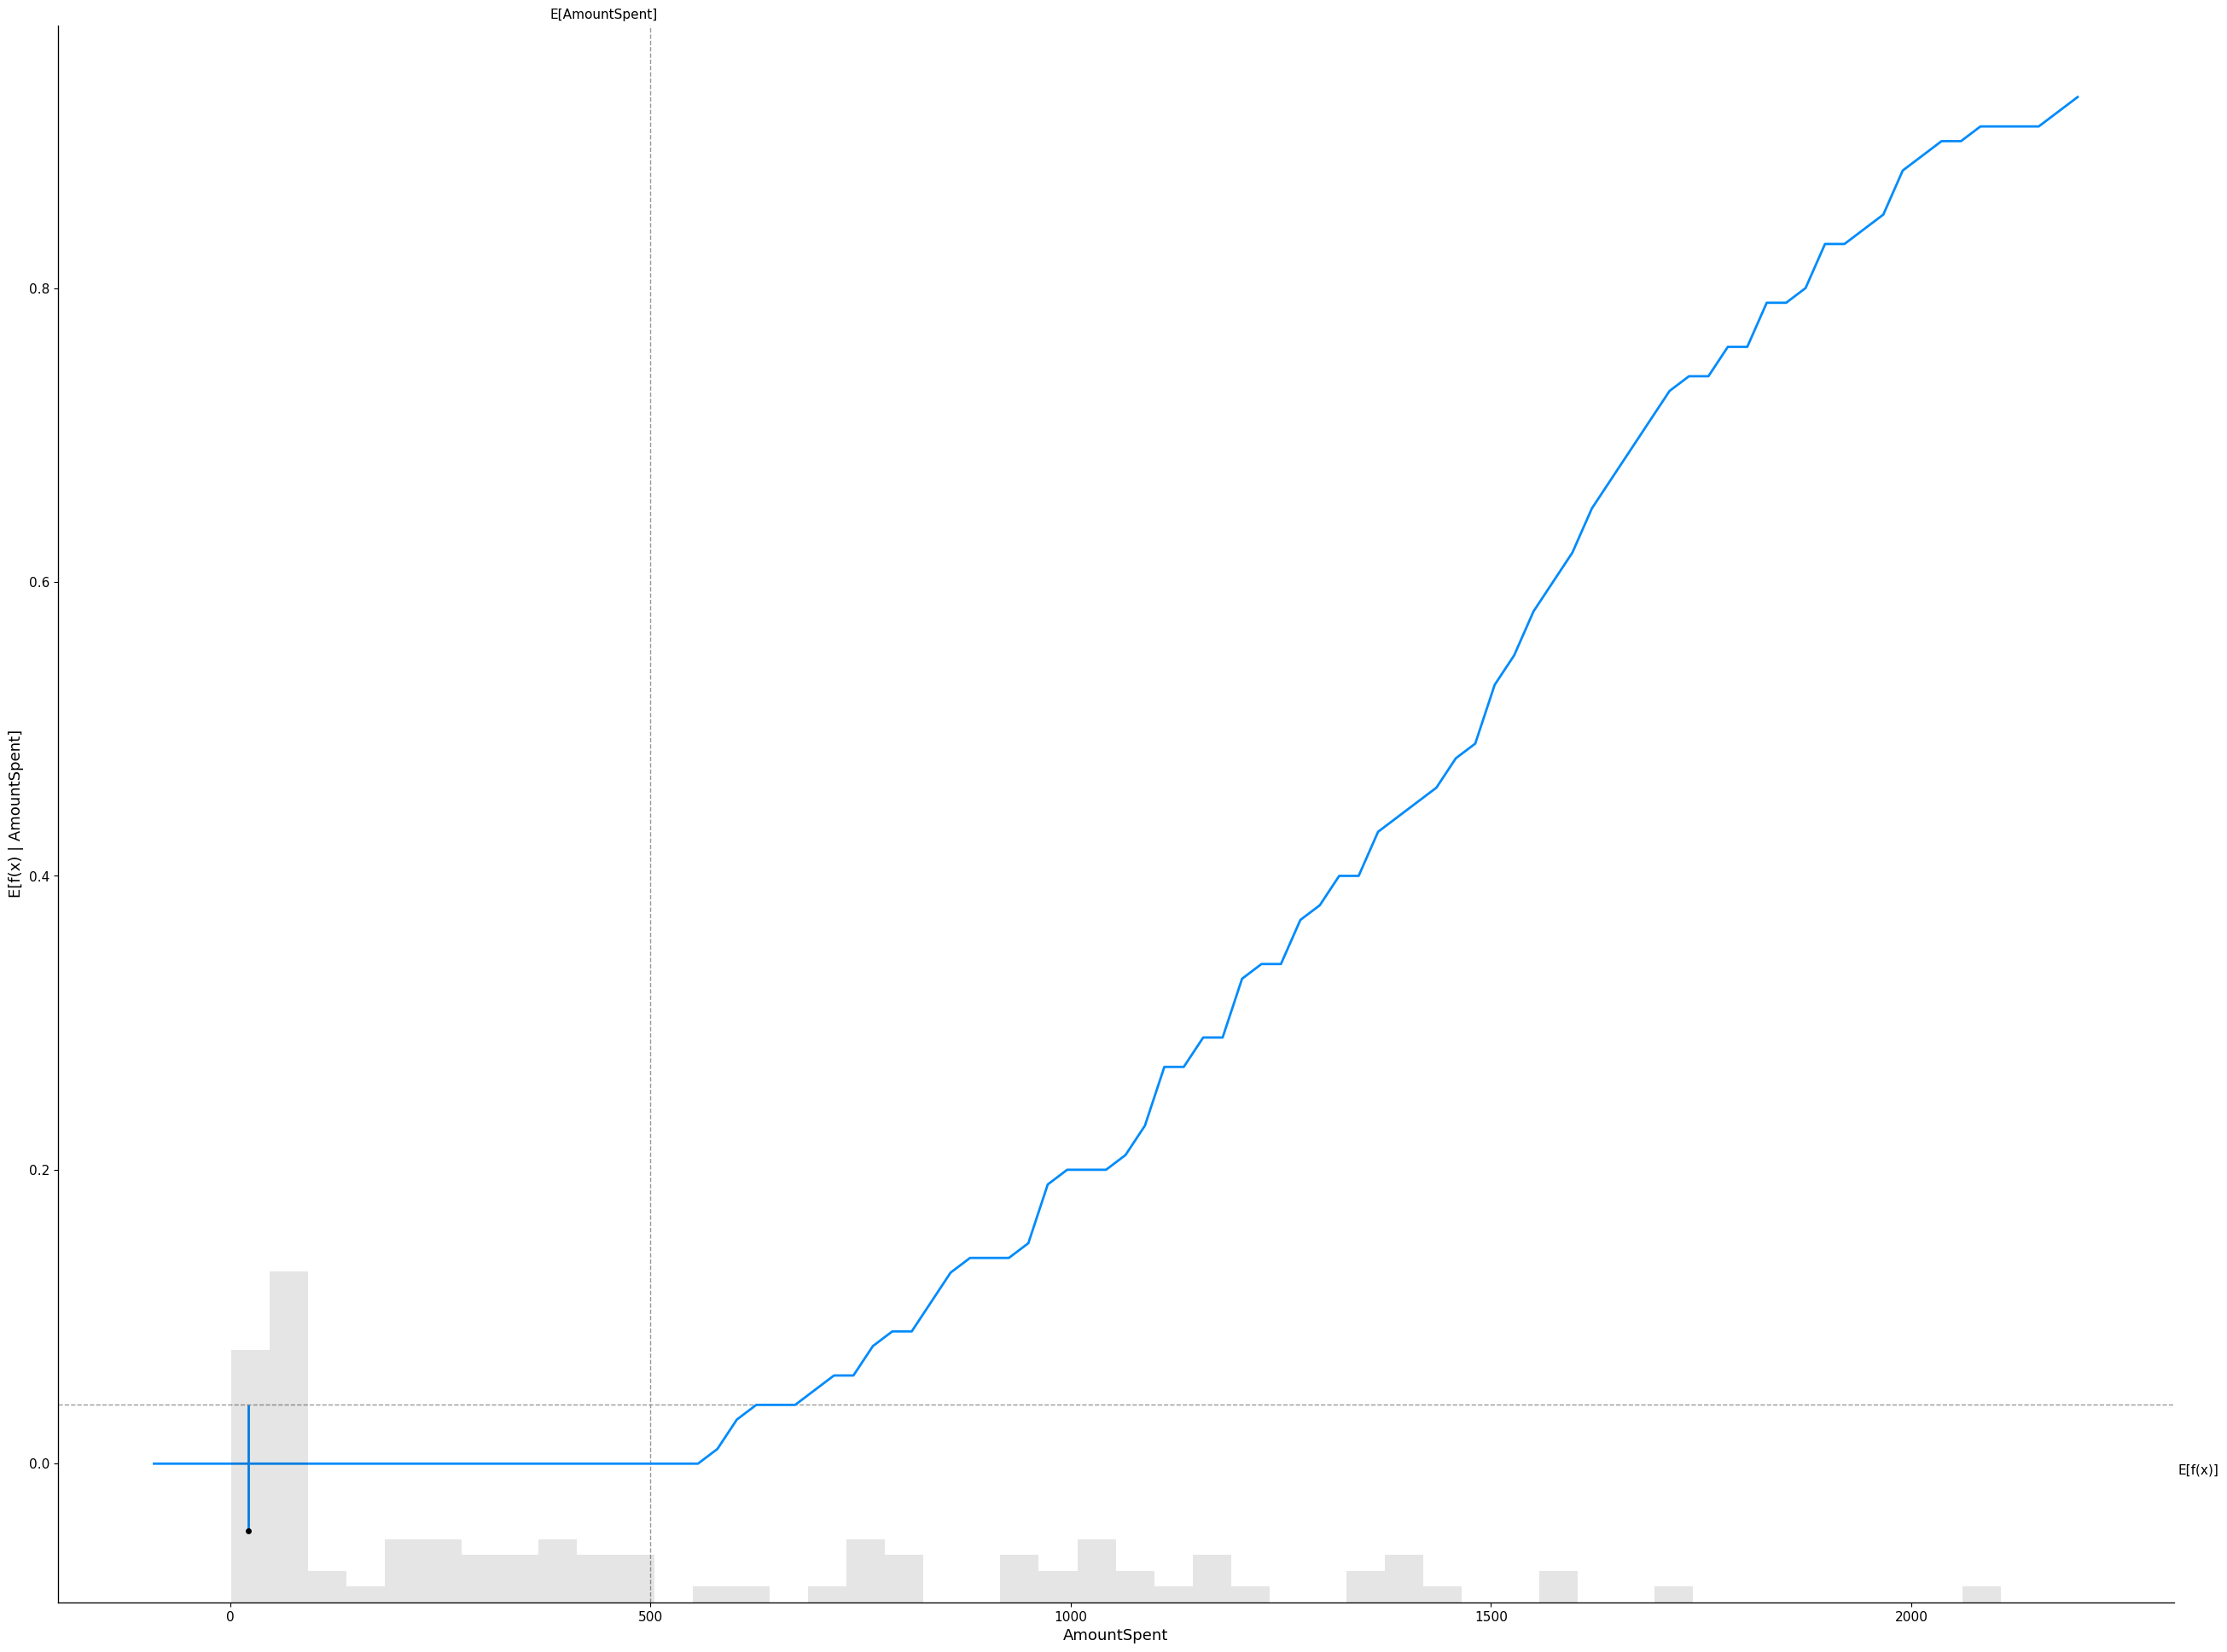

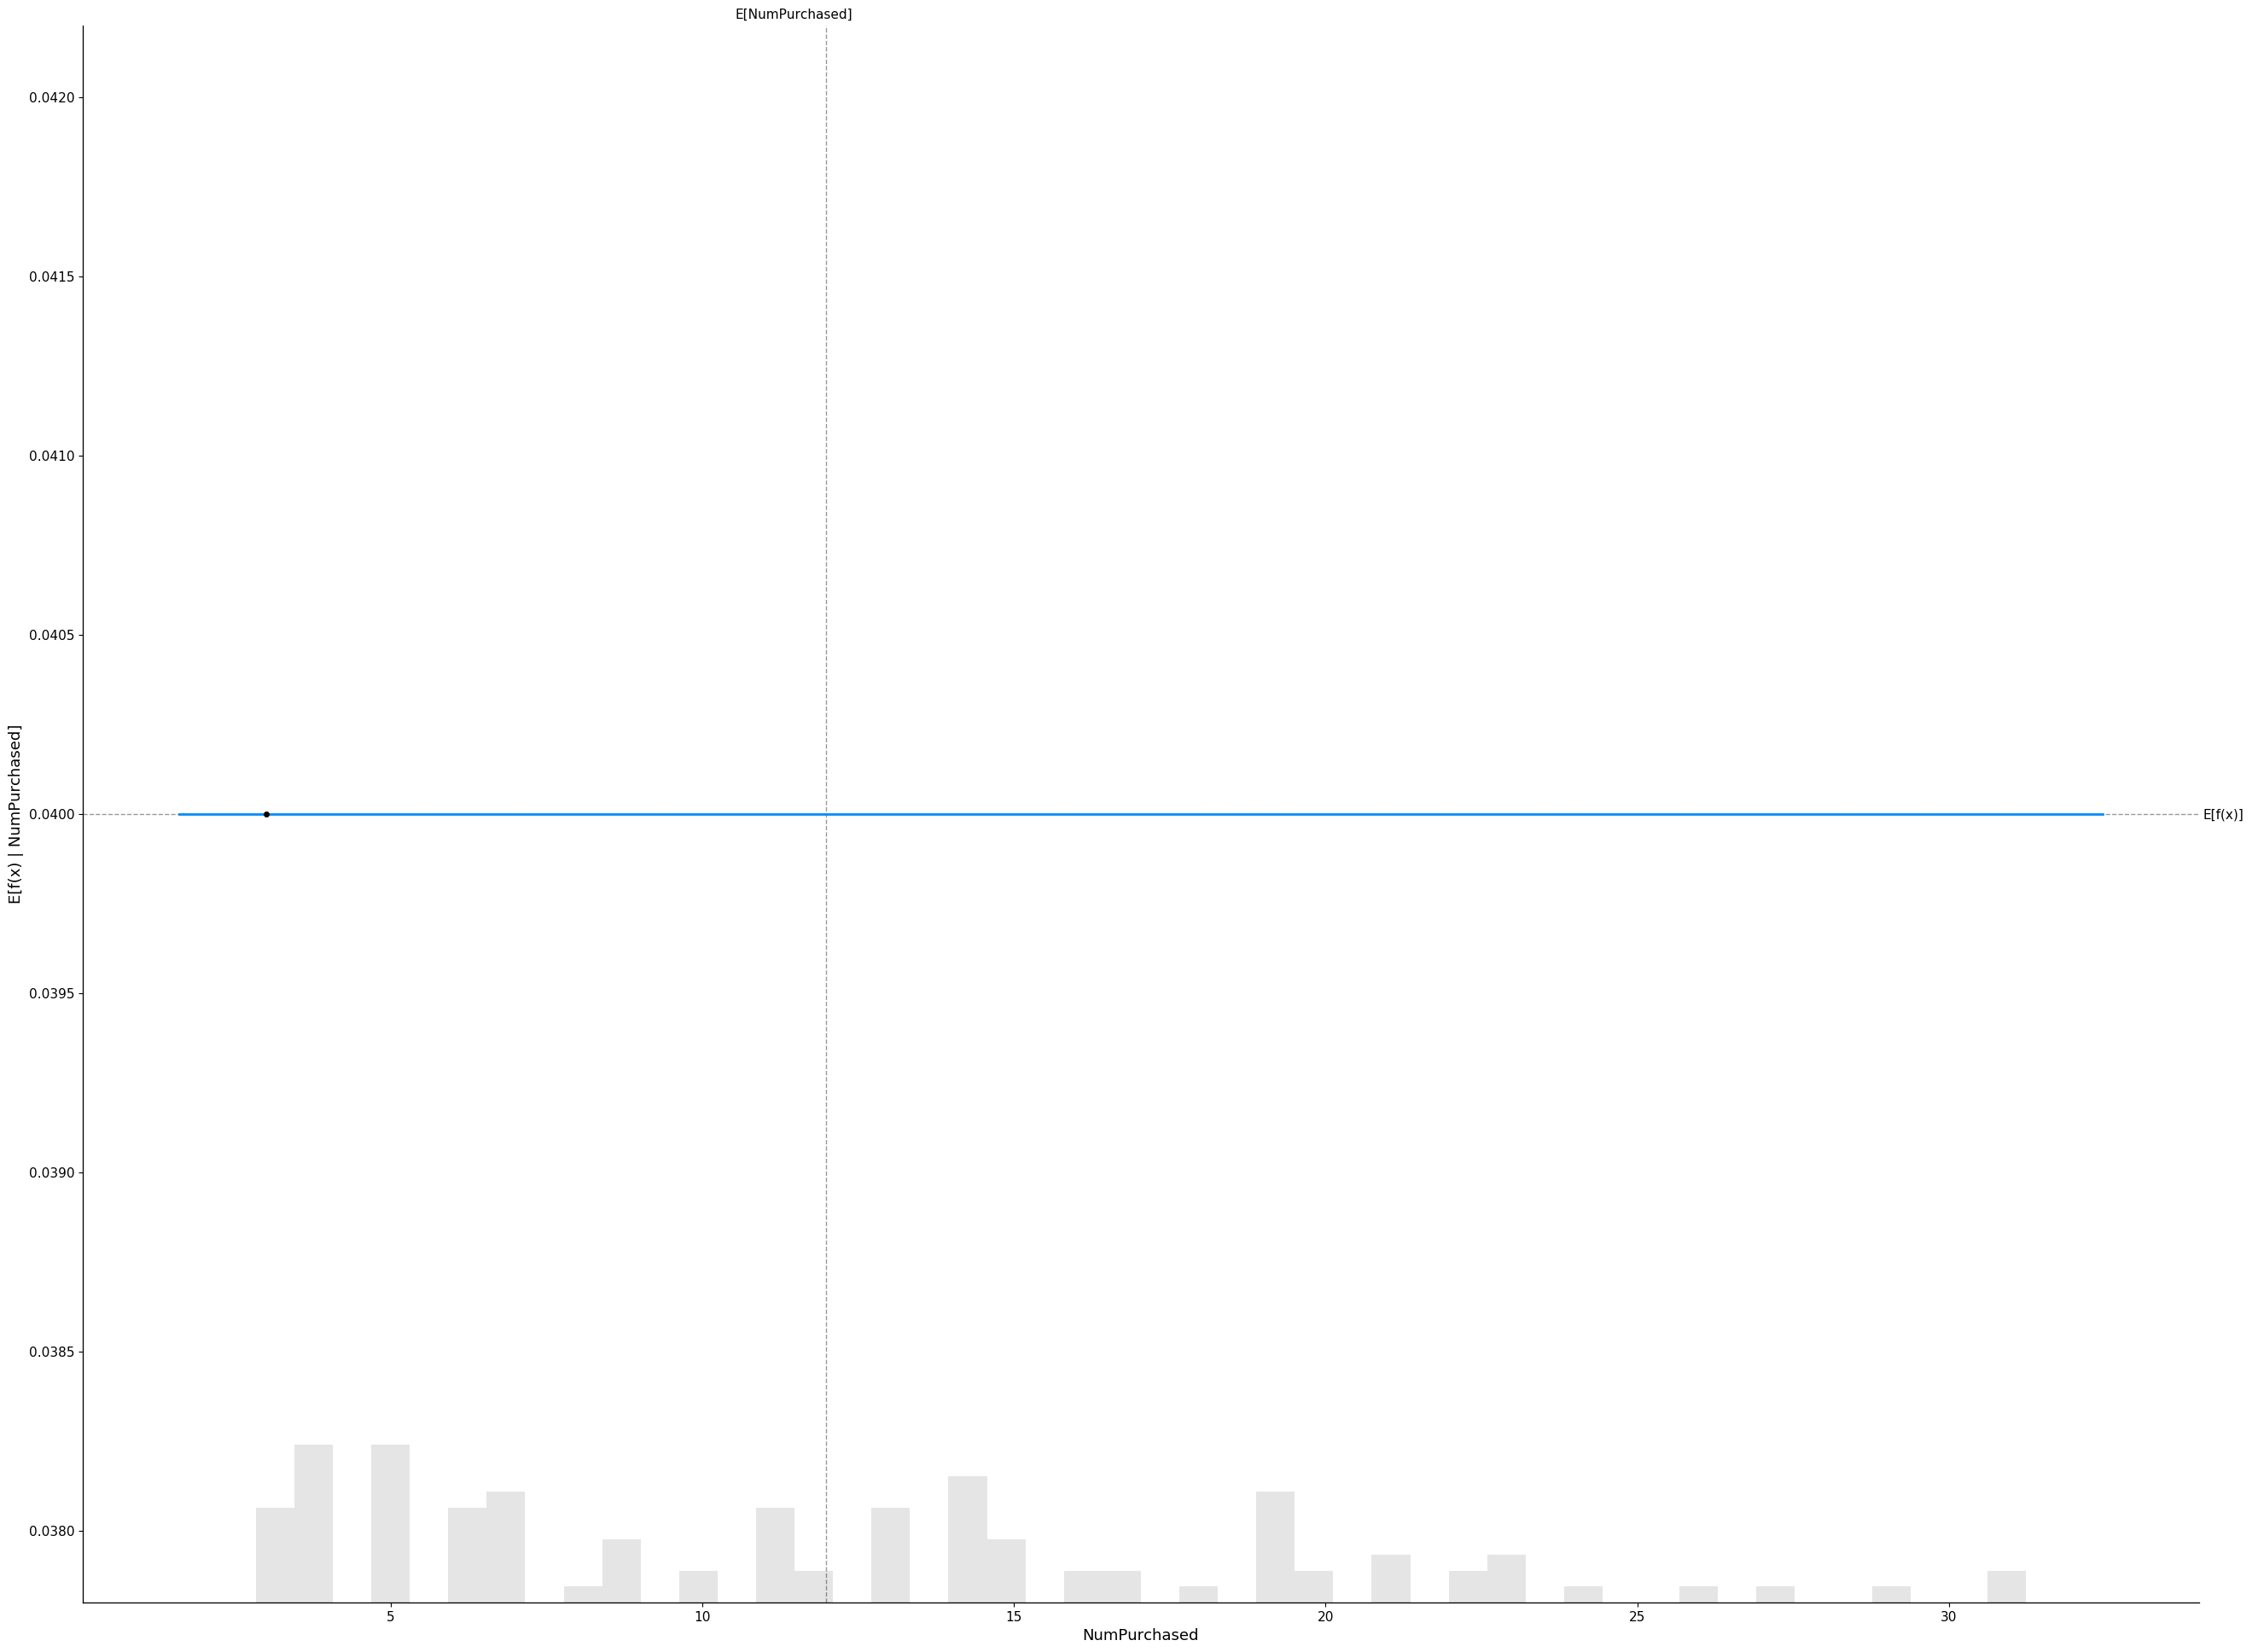

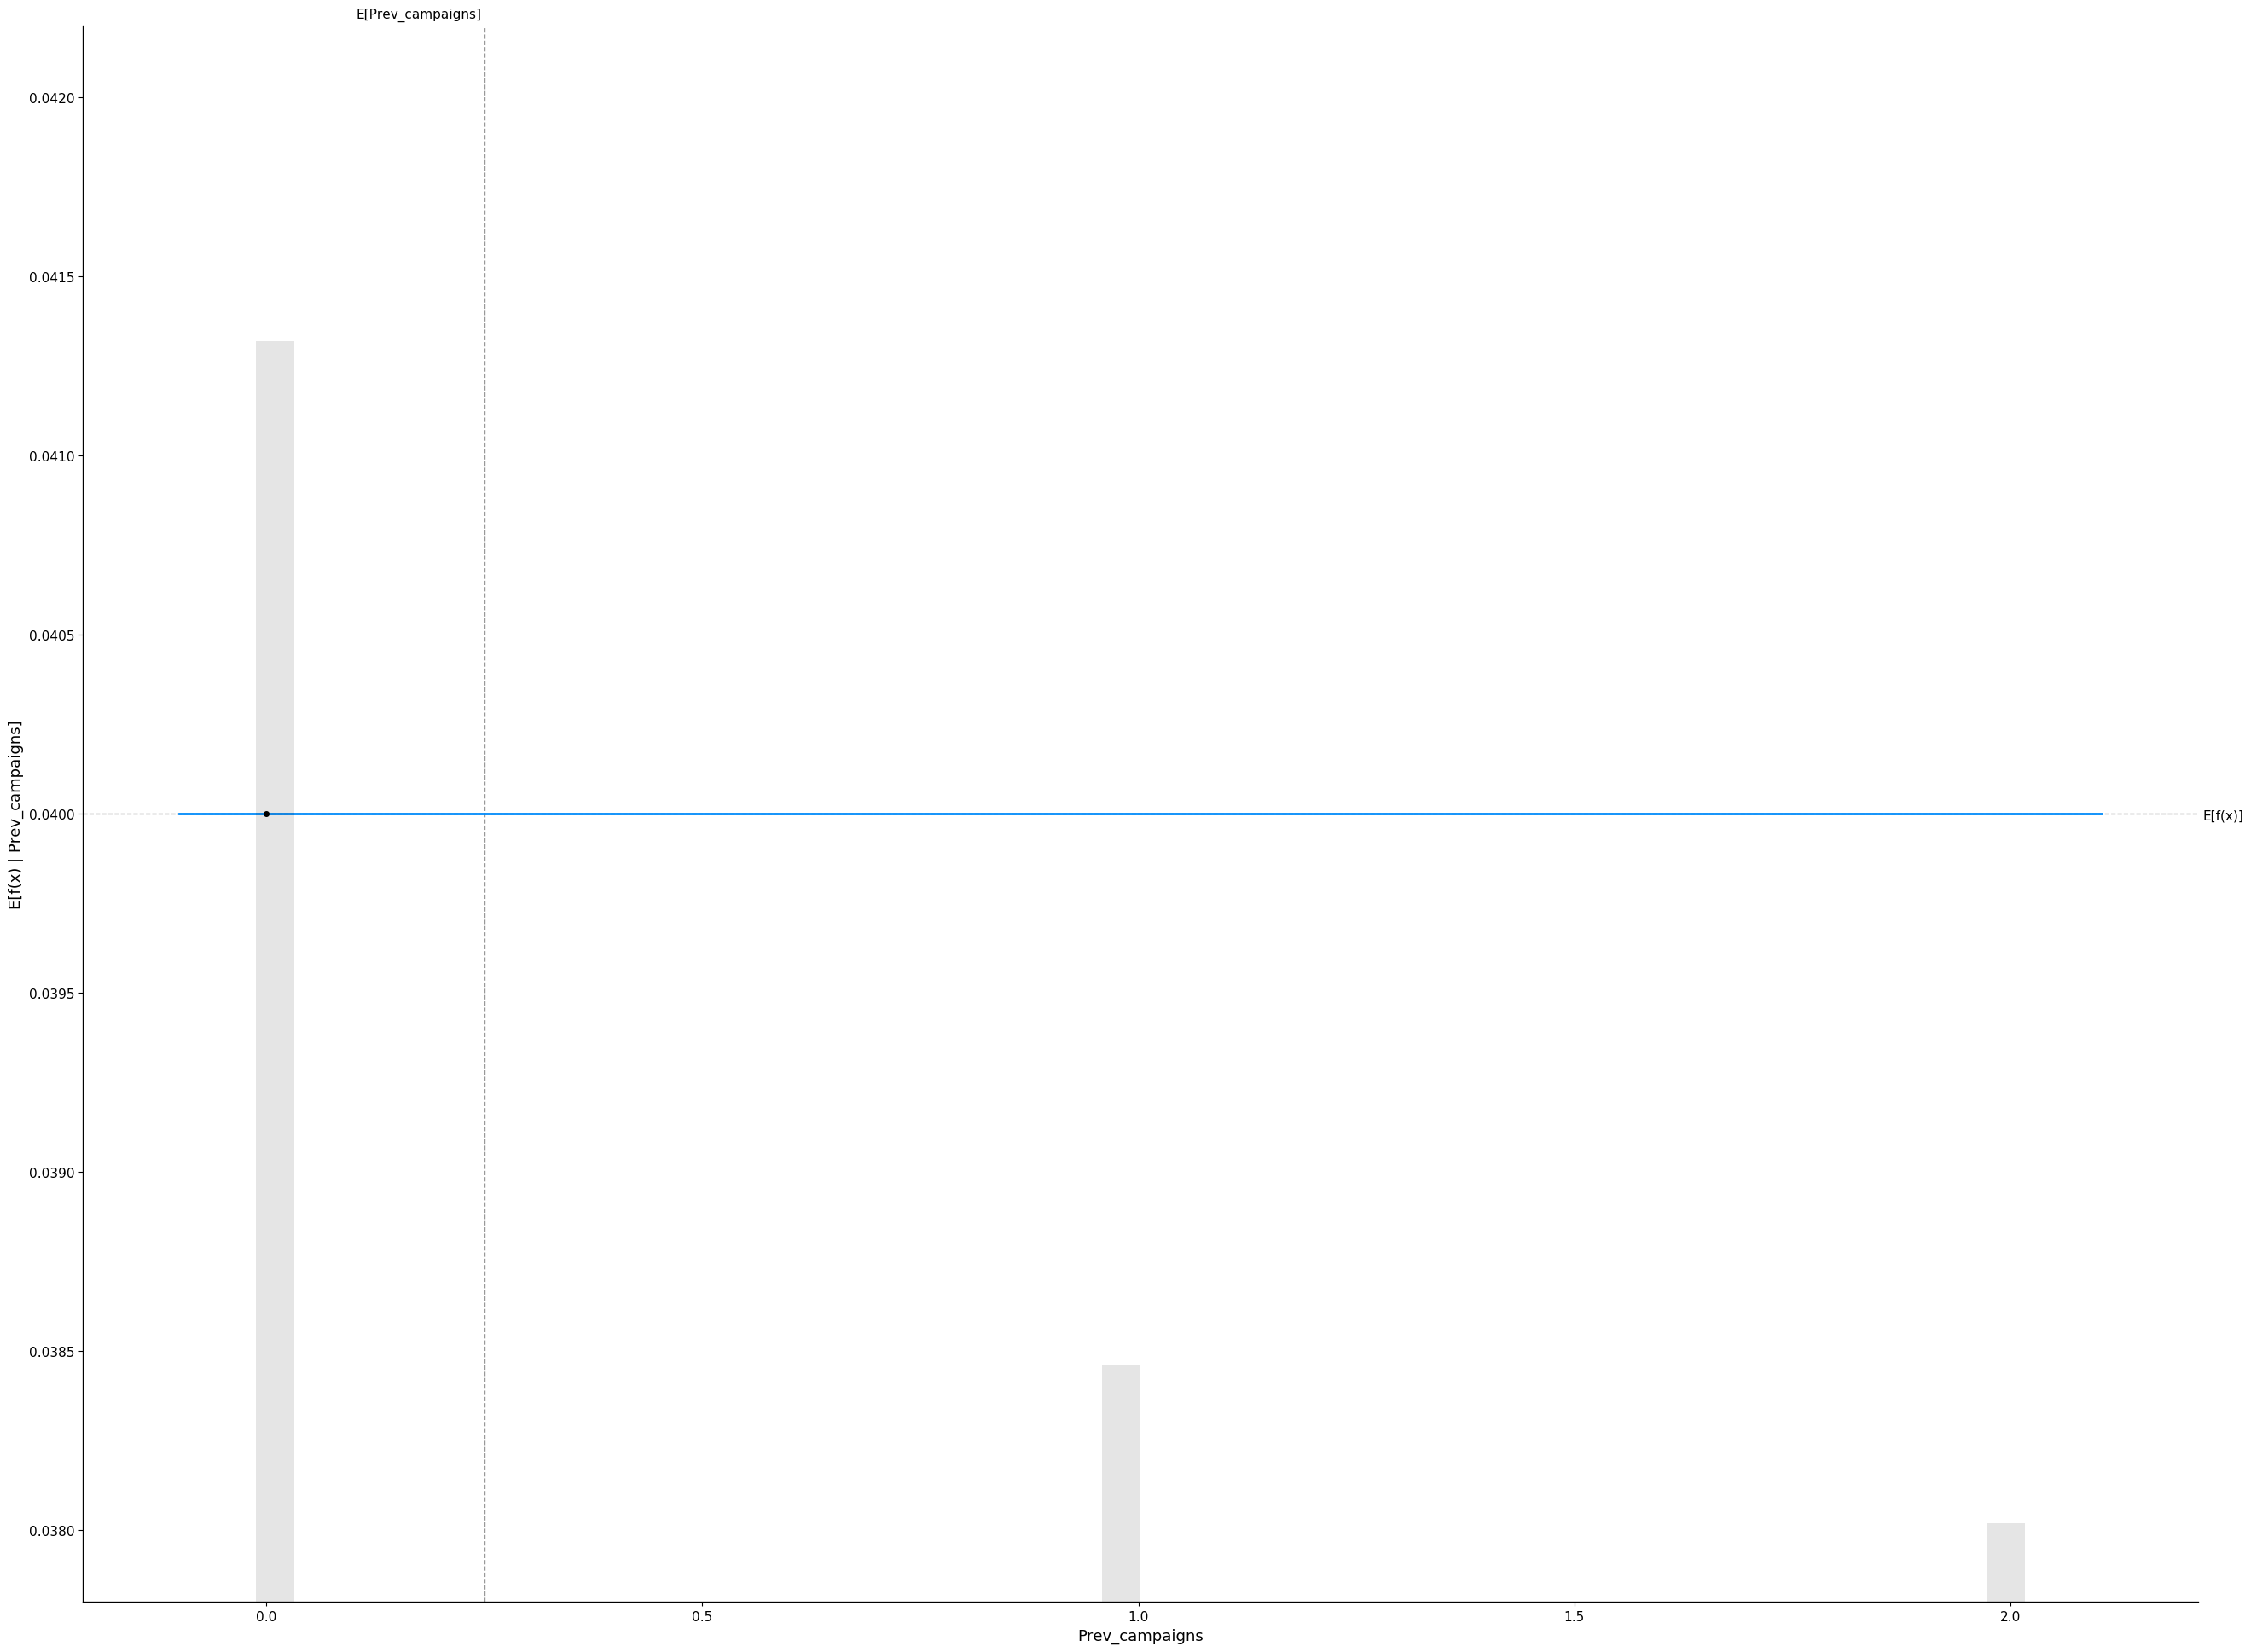

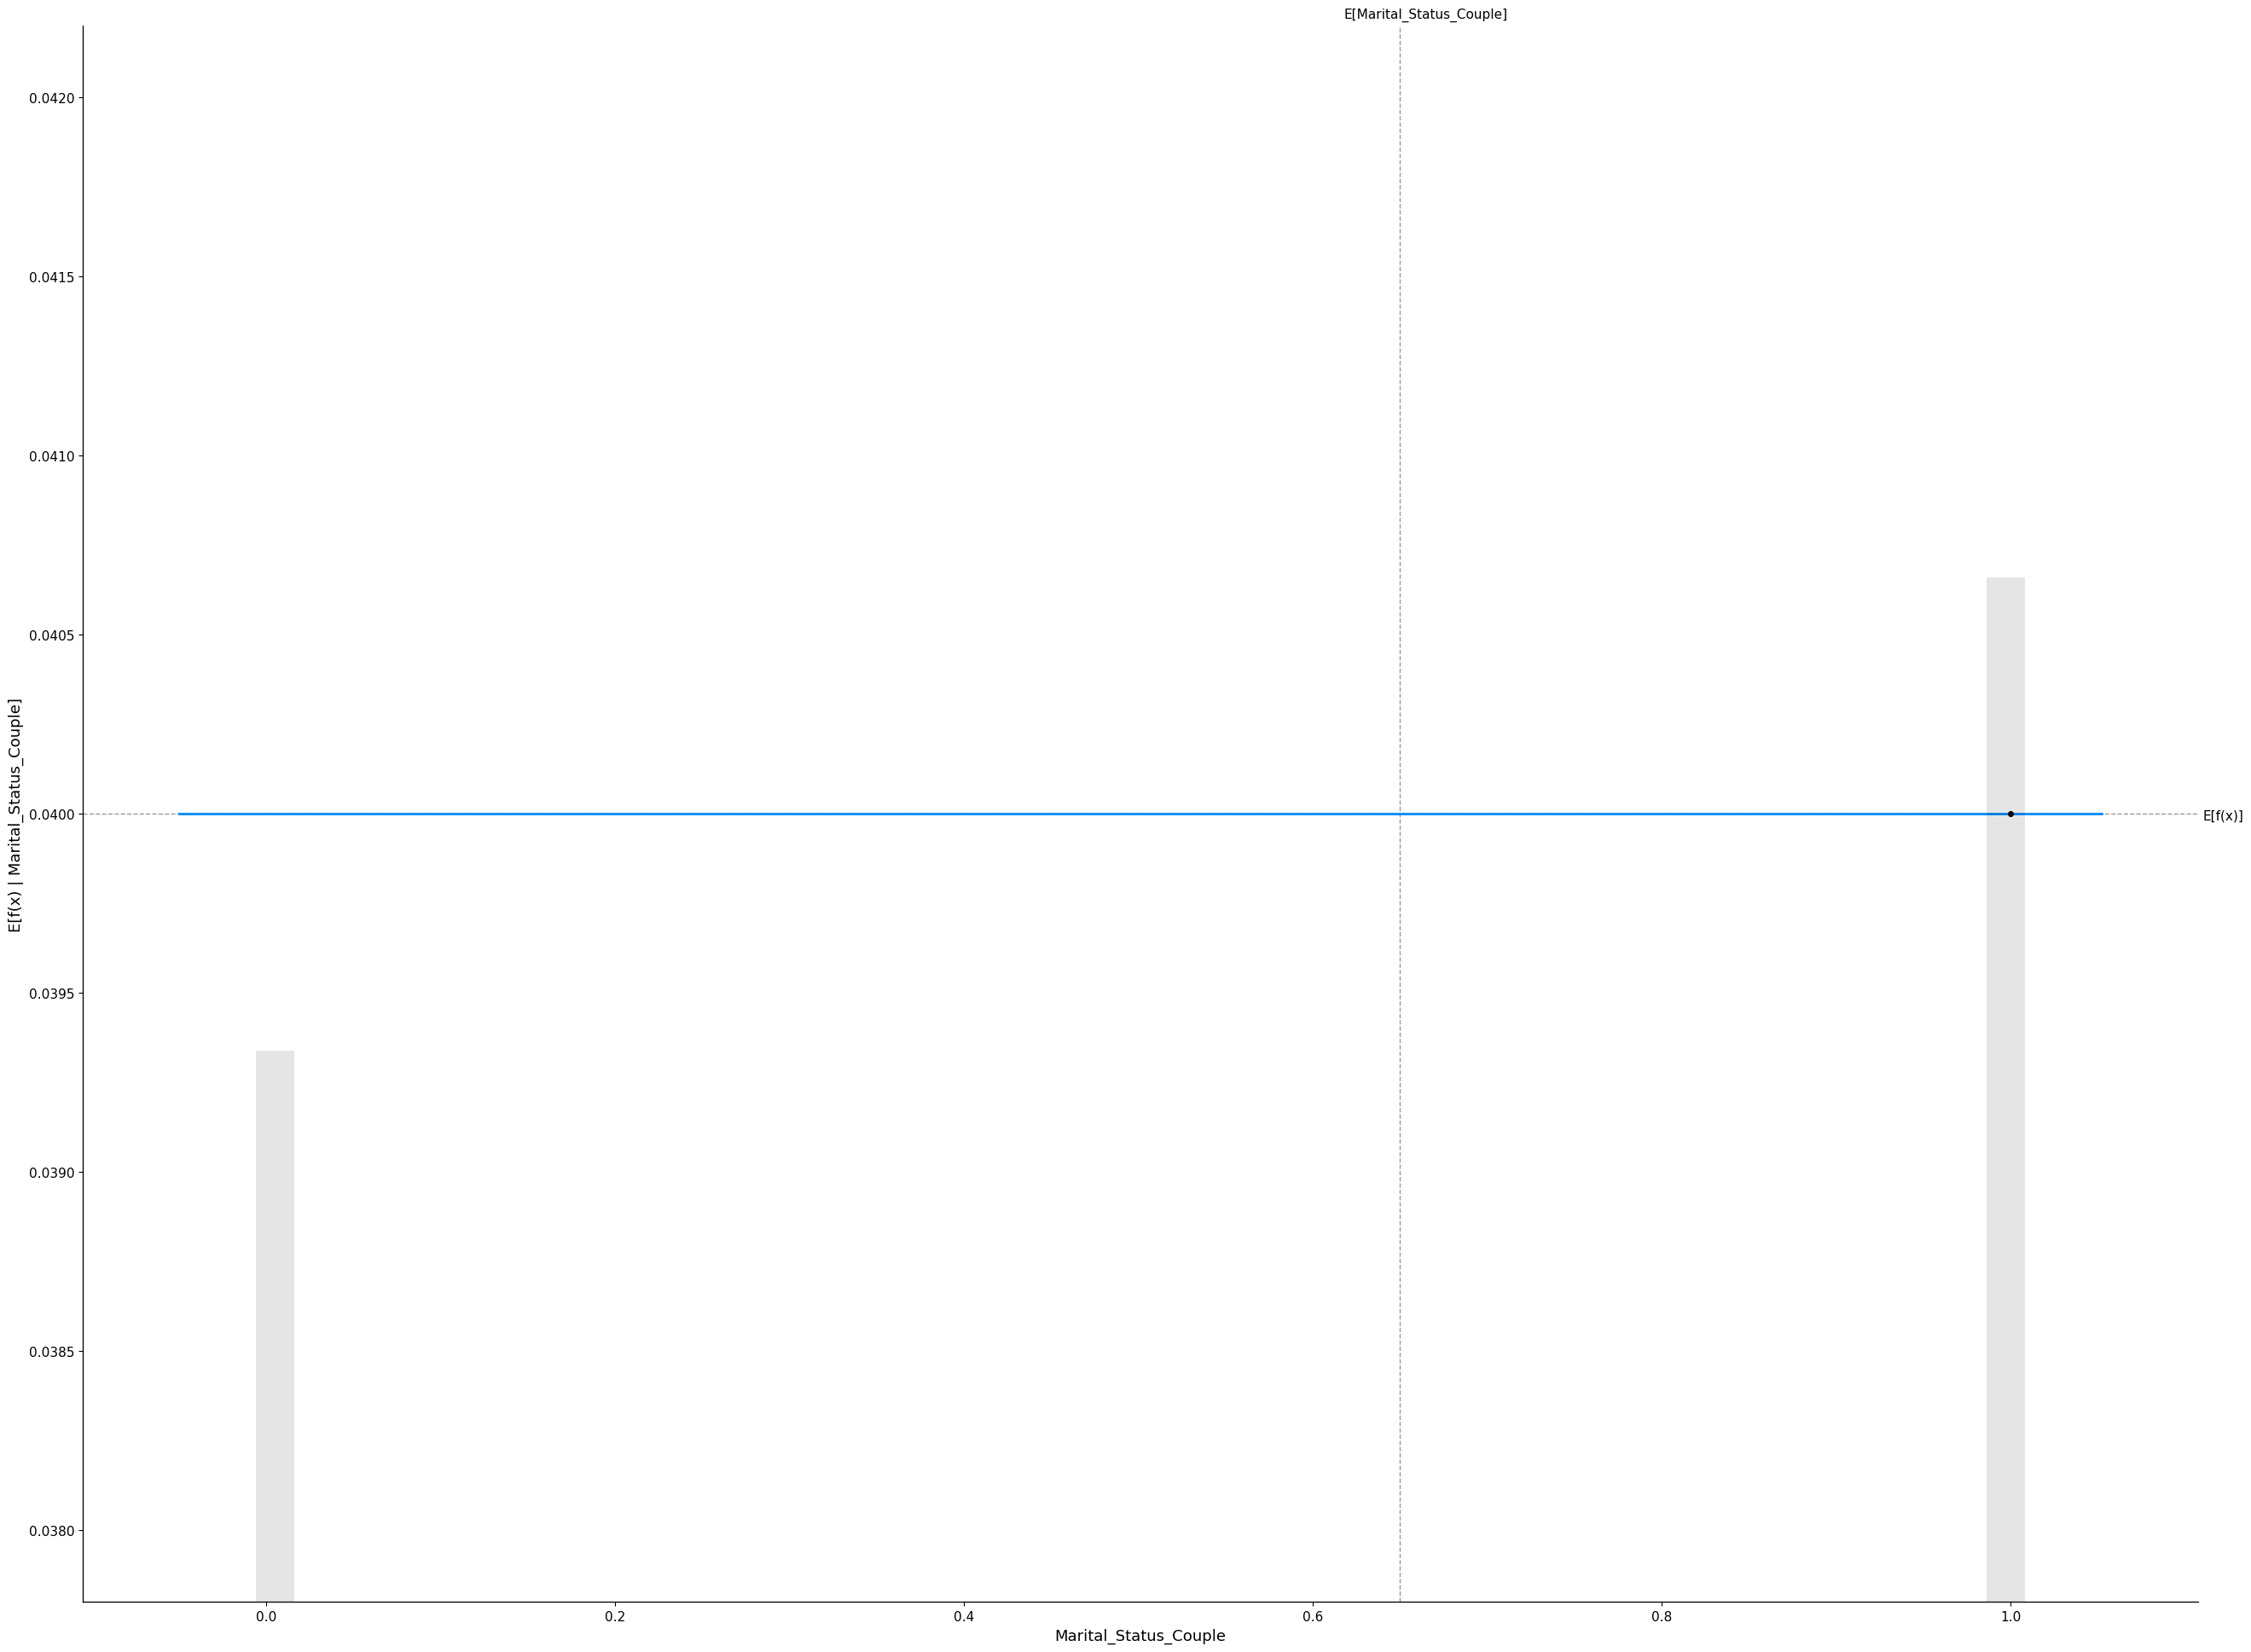

In [450]:
import shap

x_train_100 = shap.utils.sample(
    x_train, 100
)
# SHAP explanation of a Linear Model
linear_explainer = shap.Explainer(logreg.predict, x_train_100)
linear_shap_values = linear_explainer(x_train)
for i in x_train.columns:
    # make a standard partial dependence plot
    sample_ind = 18
    shap.partial_dependence_plot(
        i,
        logreg.predict,
        x_train_100,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=linear_shap_values[sample_ind : sample_ind + 1, :],
    )

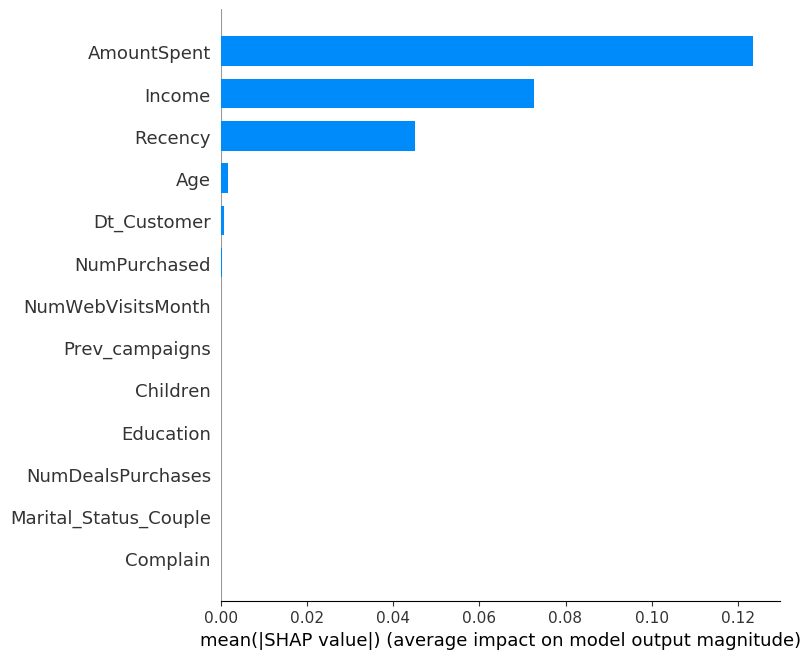

In [451]:
# SHAP variable importance for a Linear Model
shap.summary_plot(linear_shap_values, x_train, plot_type="bar")

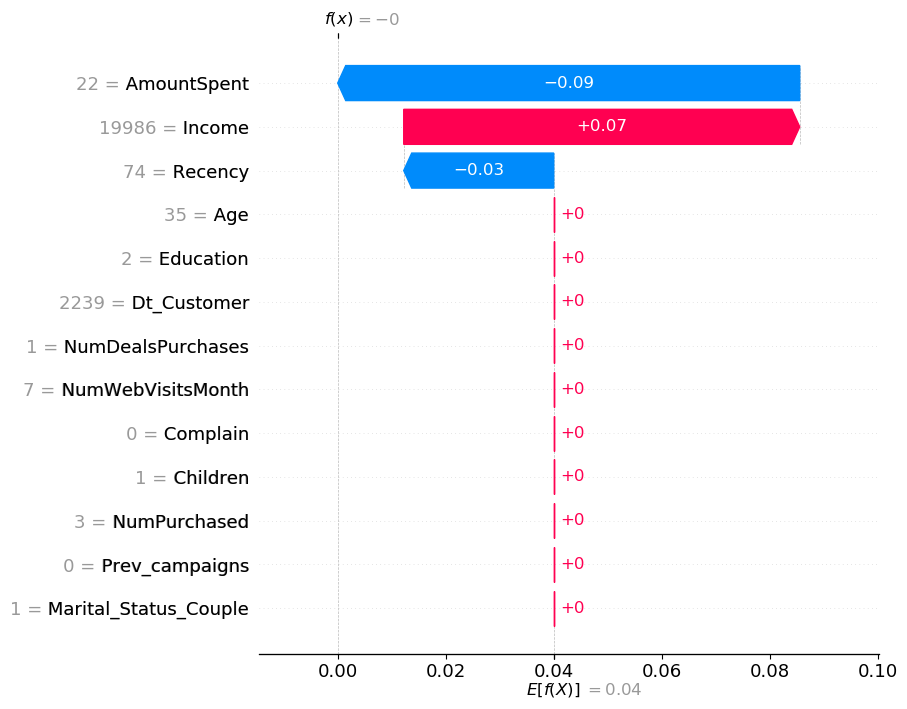

In [452]:
# Waterfall plot for linear model
shap.plots.waterfall(linear_shap_values[sample_ind], max_display=14)

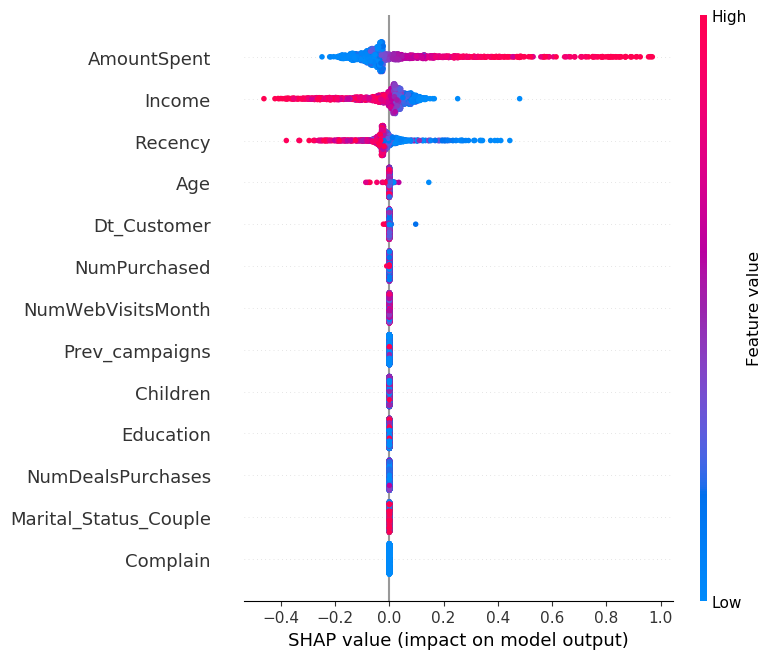

In [453]:
# SHAP summary for Linear Model
shap.summary_plot(linear_shap_values, x_train)

### Interpreting SHAP dependence plot for Linear model
The SHAP dependence plot shows the marginal effect one or two features have on the predicted outcome of a machine learning model. It tells whether the relationship between the target and a feature is linear, monotonic, or more complex. Let us interpret the linear model using the SHAP dependence plot. 

1. For the Linear model we can see how amount spent, recency and Income have a linear dependency on prediction.

## Partial Dependency Plot for Linear Model

Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
/Users/makarandmadhavi/opt/miniconda3/lib/python3.9/site-packages/sklearn/inspection/_partial_dependence.py:153: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_eval.iloc[:, variable] = new_values[i]
/Users/makarandmadhavi/opt/miniconda3/lib/python3.9/site-packages/sklearn/inspection/_partial_dependence.py:153: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_eval.iloc[:

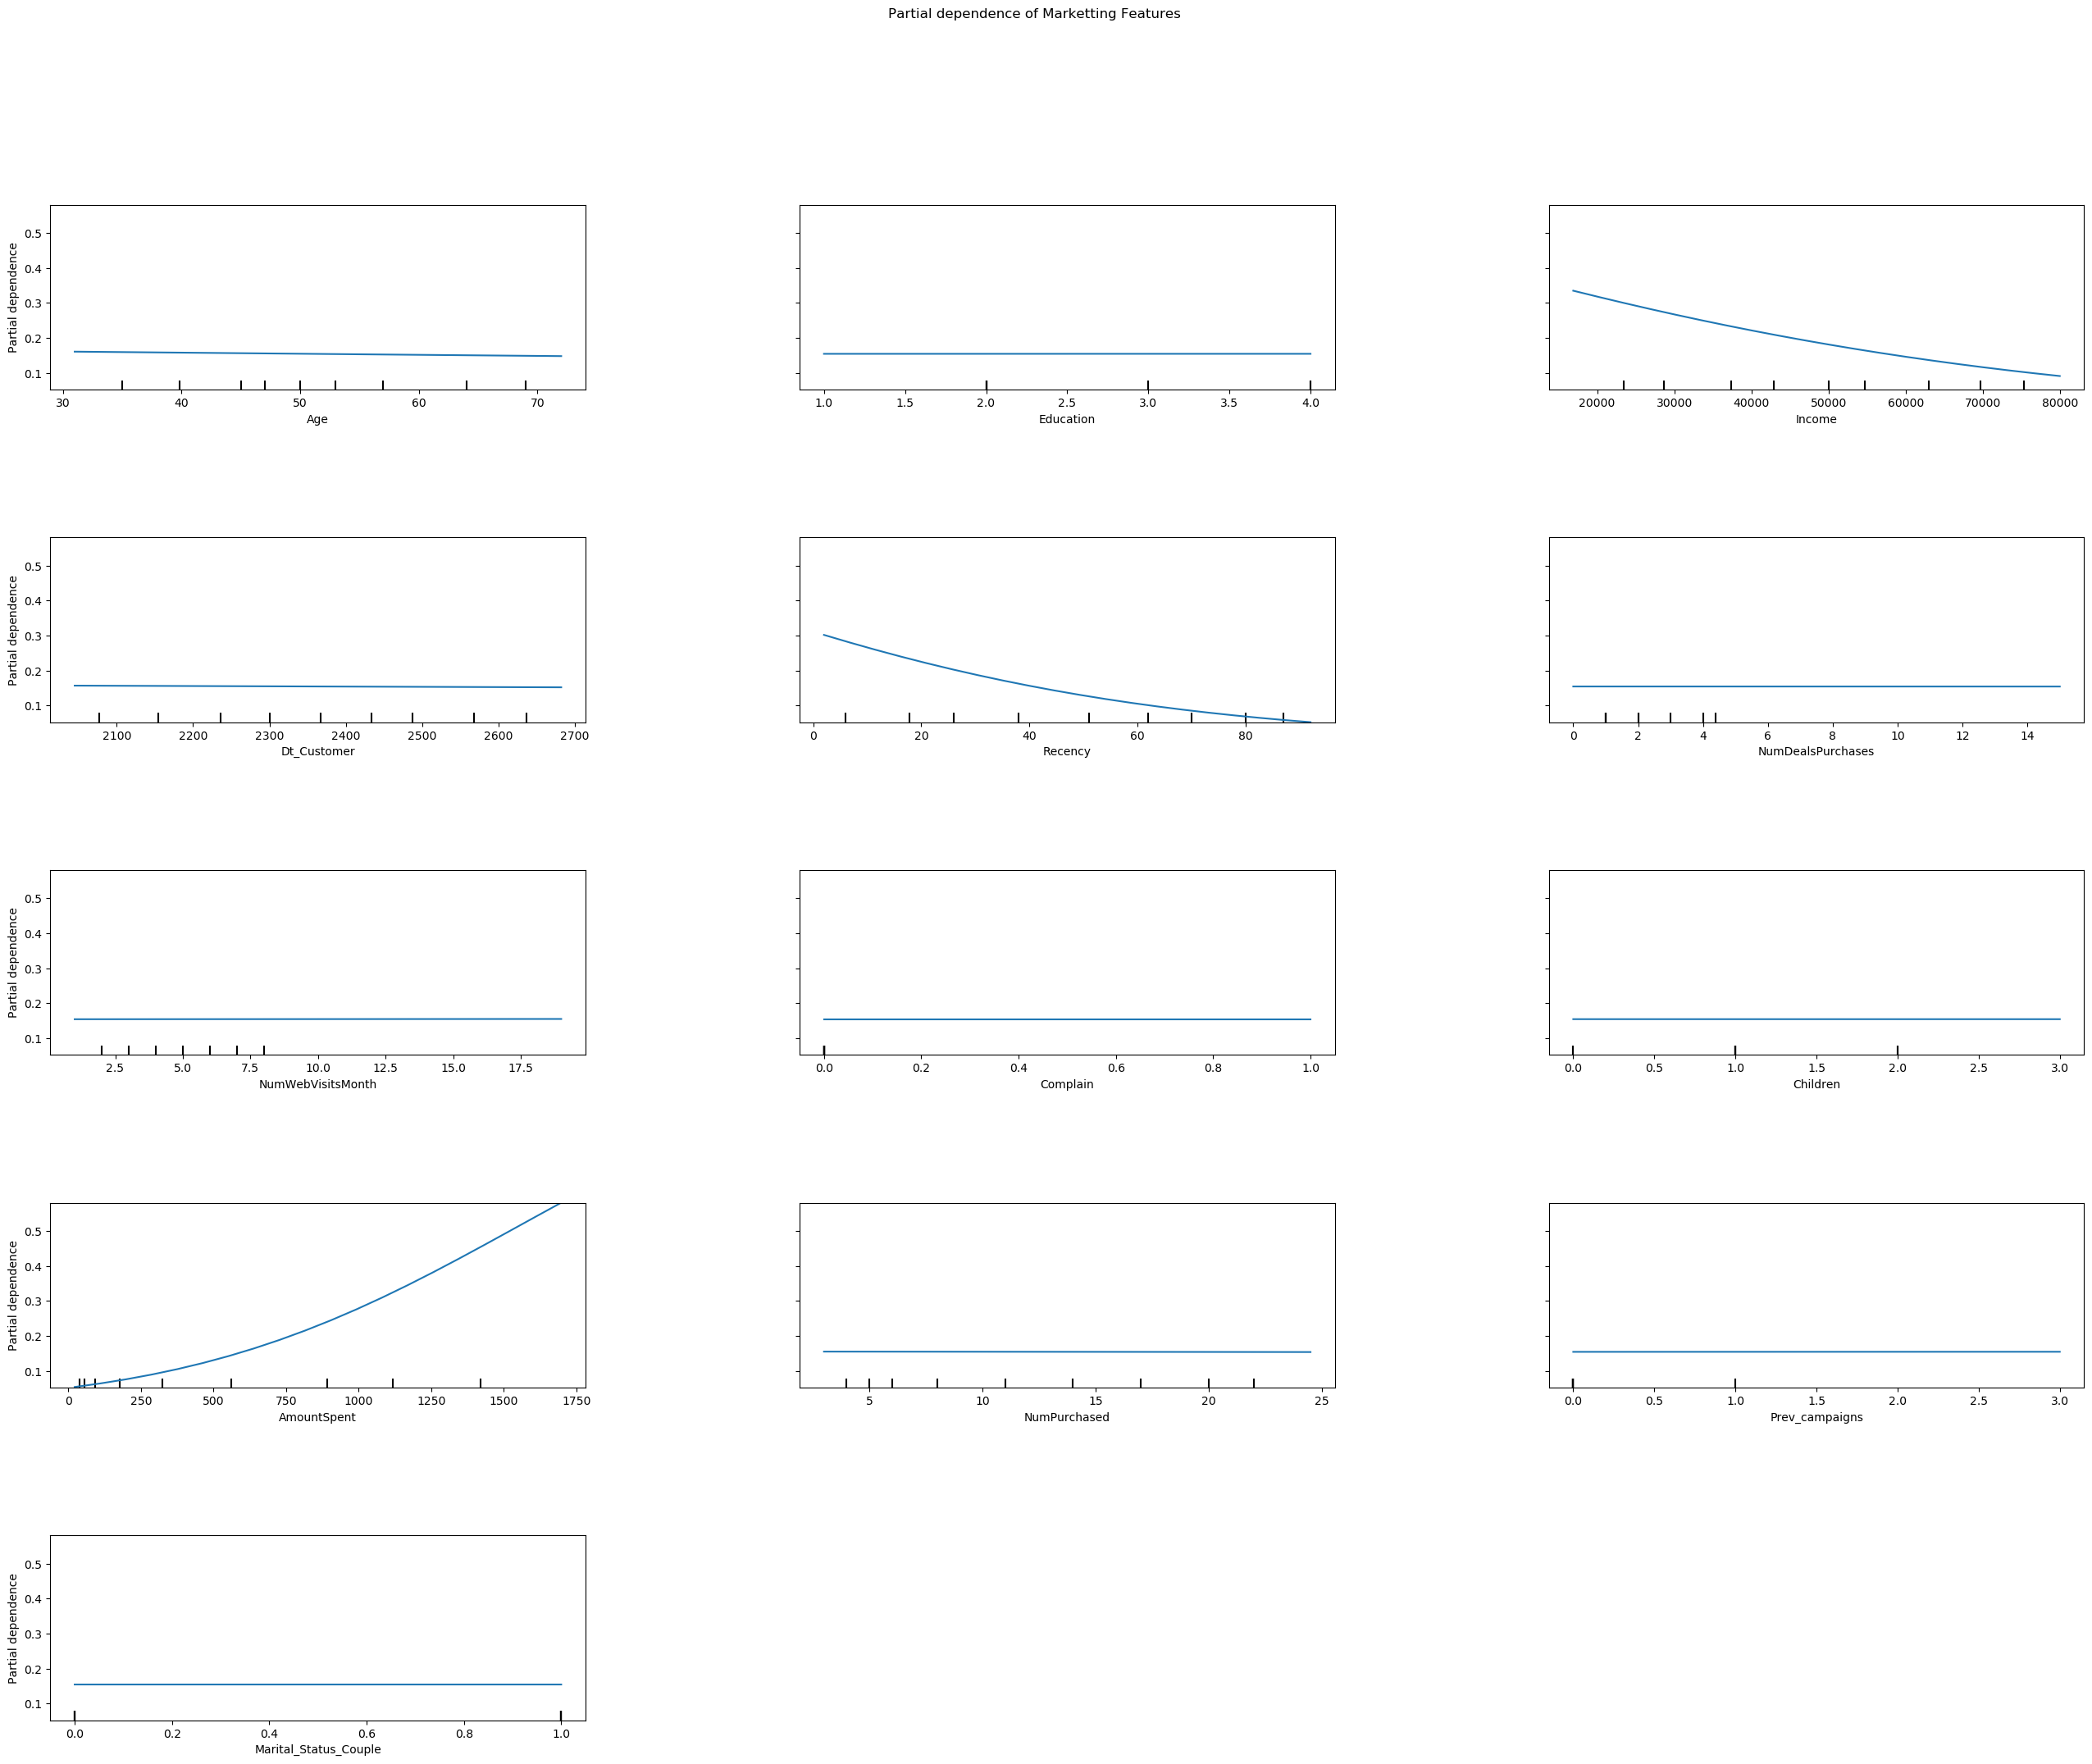

In [454]:
from sklearn.inspection import plot_partial_dependence

plot_partial_dependence(
    logreg, X_test, X_test.columns, n_jobs=3, grid_resolution=20
)

fig = plt.gcf()
fig.suptitle("Partial dependence of Marketting Features")
fig.subplots_adjust(wspace=0.4, hspace=0.8)
plt.show()
plt.rcParams["figure.figsize"] = (32, 24)

Income, AmountSpent and Recency shows linear dependence which is similar to what to what we see in shap values

# Decision Tree Classifier

Accuracy Score: 0.8468468468468469
Confusion Matrix:
[[172  15]
 [ 19  16]]

Decision Tree:



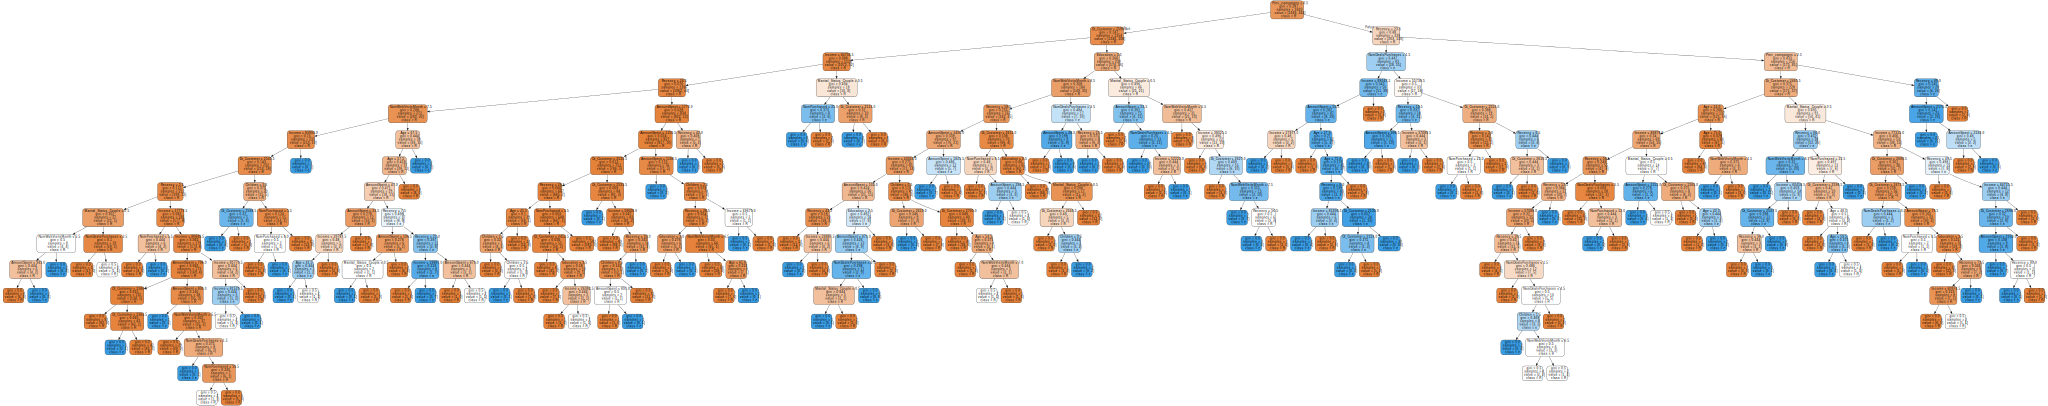

In [455]:
# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import graphviz

# Create a decision tree classifier
dtc = DecisionTreeClassifier(random_state=42)

# Train the decision tree classifier on the training set
dtc.fit(x_train, y_train)

# Use the decision tree classifier to make predictions on the testing set
y_pred = dtc.predict(X_test)

# Calculate accuracy score and confusion matrix
acc_score = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

# Print the accuracy score and confusion matrix
print("Accuracy Score: {}".format(acc_score))
print("Confusion Matrix:\n{}".format(conf_mat))

# Visualize the decision tree using graphviz
dot_data = export_graphviz(dtc, out_file=None, feature_names=x_train.columns, class_names=y_train.name, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("breast_cancer_decision_tree")

# Print the decision tree
print("\nDecision Tree:\n")
graph = graphviz.Source(dot_data)
graph


## Interpretting the tree

The Gini value, also known as the Gini index or Gini impurity, is a measure of the impurity or randomness of a set of data, often used in decision trees. In decision trees, the Gini value is used to determine the optimal split at each node based on the purity of the data subsets resulting from the split.

The Gini value ranges from 0 to 1, with 0 indicating perfect purity (all data belongs to the same class) and 1 indicating perfect impurity (data is evenly distributed among all classes). In decision trees, the Gini value is calculated for each potential split, and the split with the lowest Gini value is chosen as the optimal split.

In practice, the Gini value is often used in conjunction with other measures of impurity, such as entropy, to help build more accurate decision trees.

As we have a problem og binary classification the model a split decision at every node depending on the given parameter value.

In [456]:

# Get numerical feature importances
tree_importances = list(dtc.feature_importances_)
# List of tuples with variable and importance
feature_importances = [
    (feature, round(importance, 2))
    for feature, importance in zip(x_train.columns, tree_importances)
]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

In [457]:

# Print out the feature and importances
[print("Variable: {:20} Importance: {}".format(*pair)) for pair in feature_importances];

Variable: Prev_campaigns       Importance: 0.18
Variable: Dt_Customer          Importance: 0.16
Variable: Recency              Importance: 0.14
Variable: Income               Importance: 0.13
Variable: AmountSpent          Importance: 0.11
Variable: NumWebVisitsMonth    Importance: 0.05
Variable: Marital_Status_Couple Importance: 0.05
Variable: Age                  Importance: 0.04
Variable: NumDealsPurchases    Importance: 0.04
Variable: NumPurchased         Importance: 0.04
Variable: Education            Importance: 0.03
Variable: Children             Importance: 0.02
Variable: Complain             Importance: 0.0


**Interpretting variable importance**

The feature importance shows Prev_campaign, Dt_Customer, Recency and Income have a high significance similar to the linear model

## Shap Analysis for Tree model

Permutation explainer: 1694it [00:15, 38.50it/s]                                


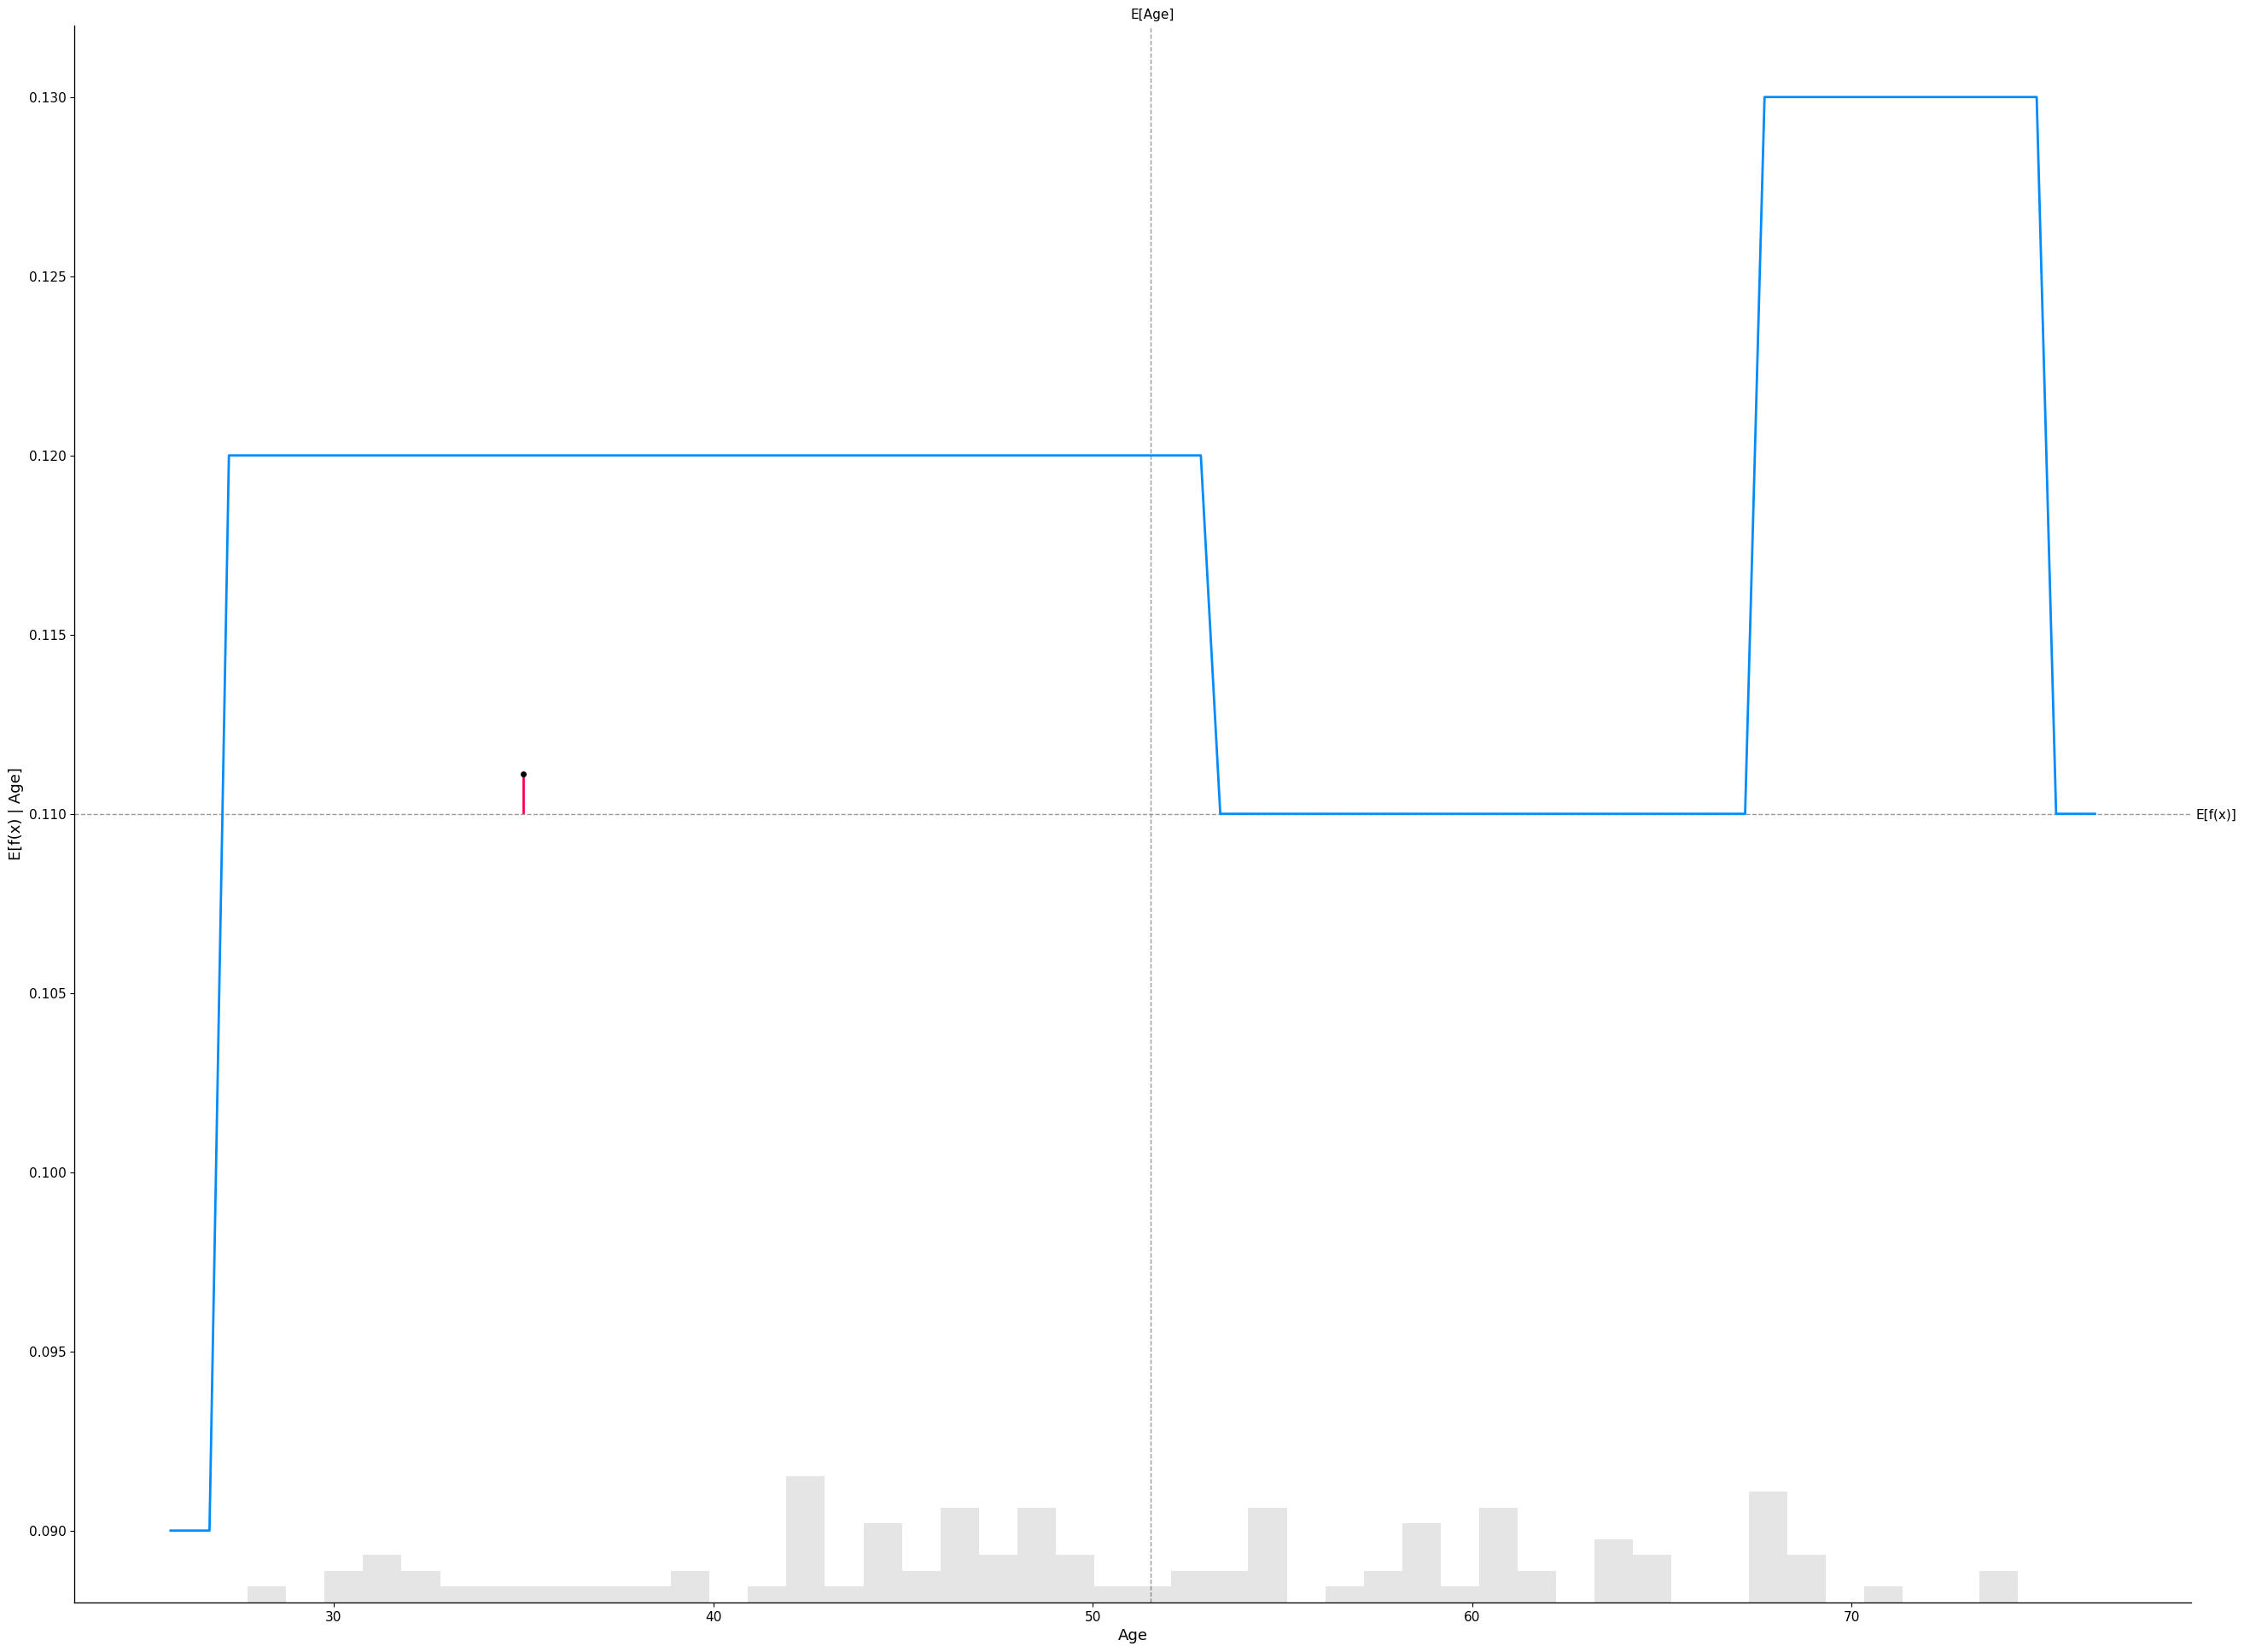

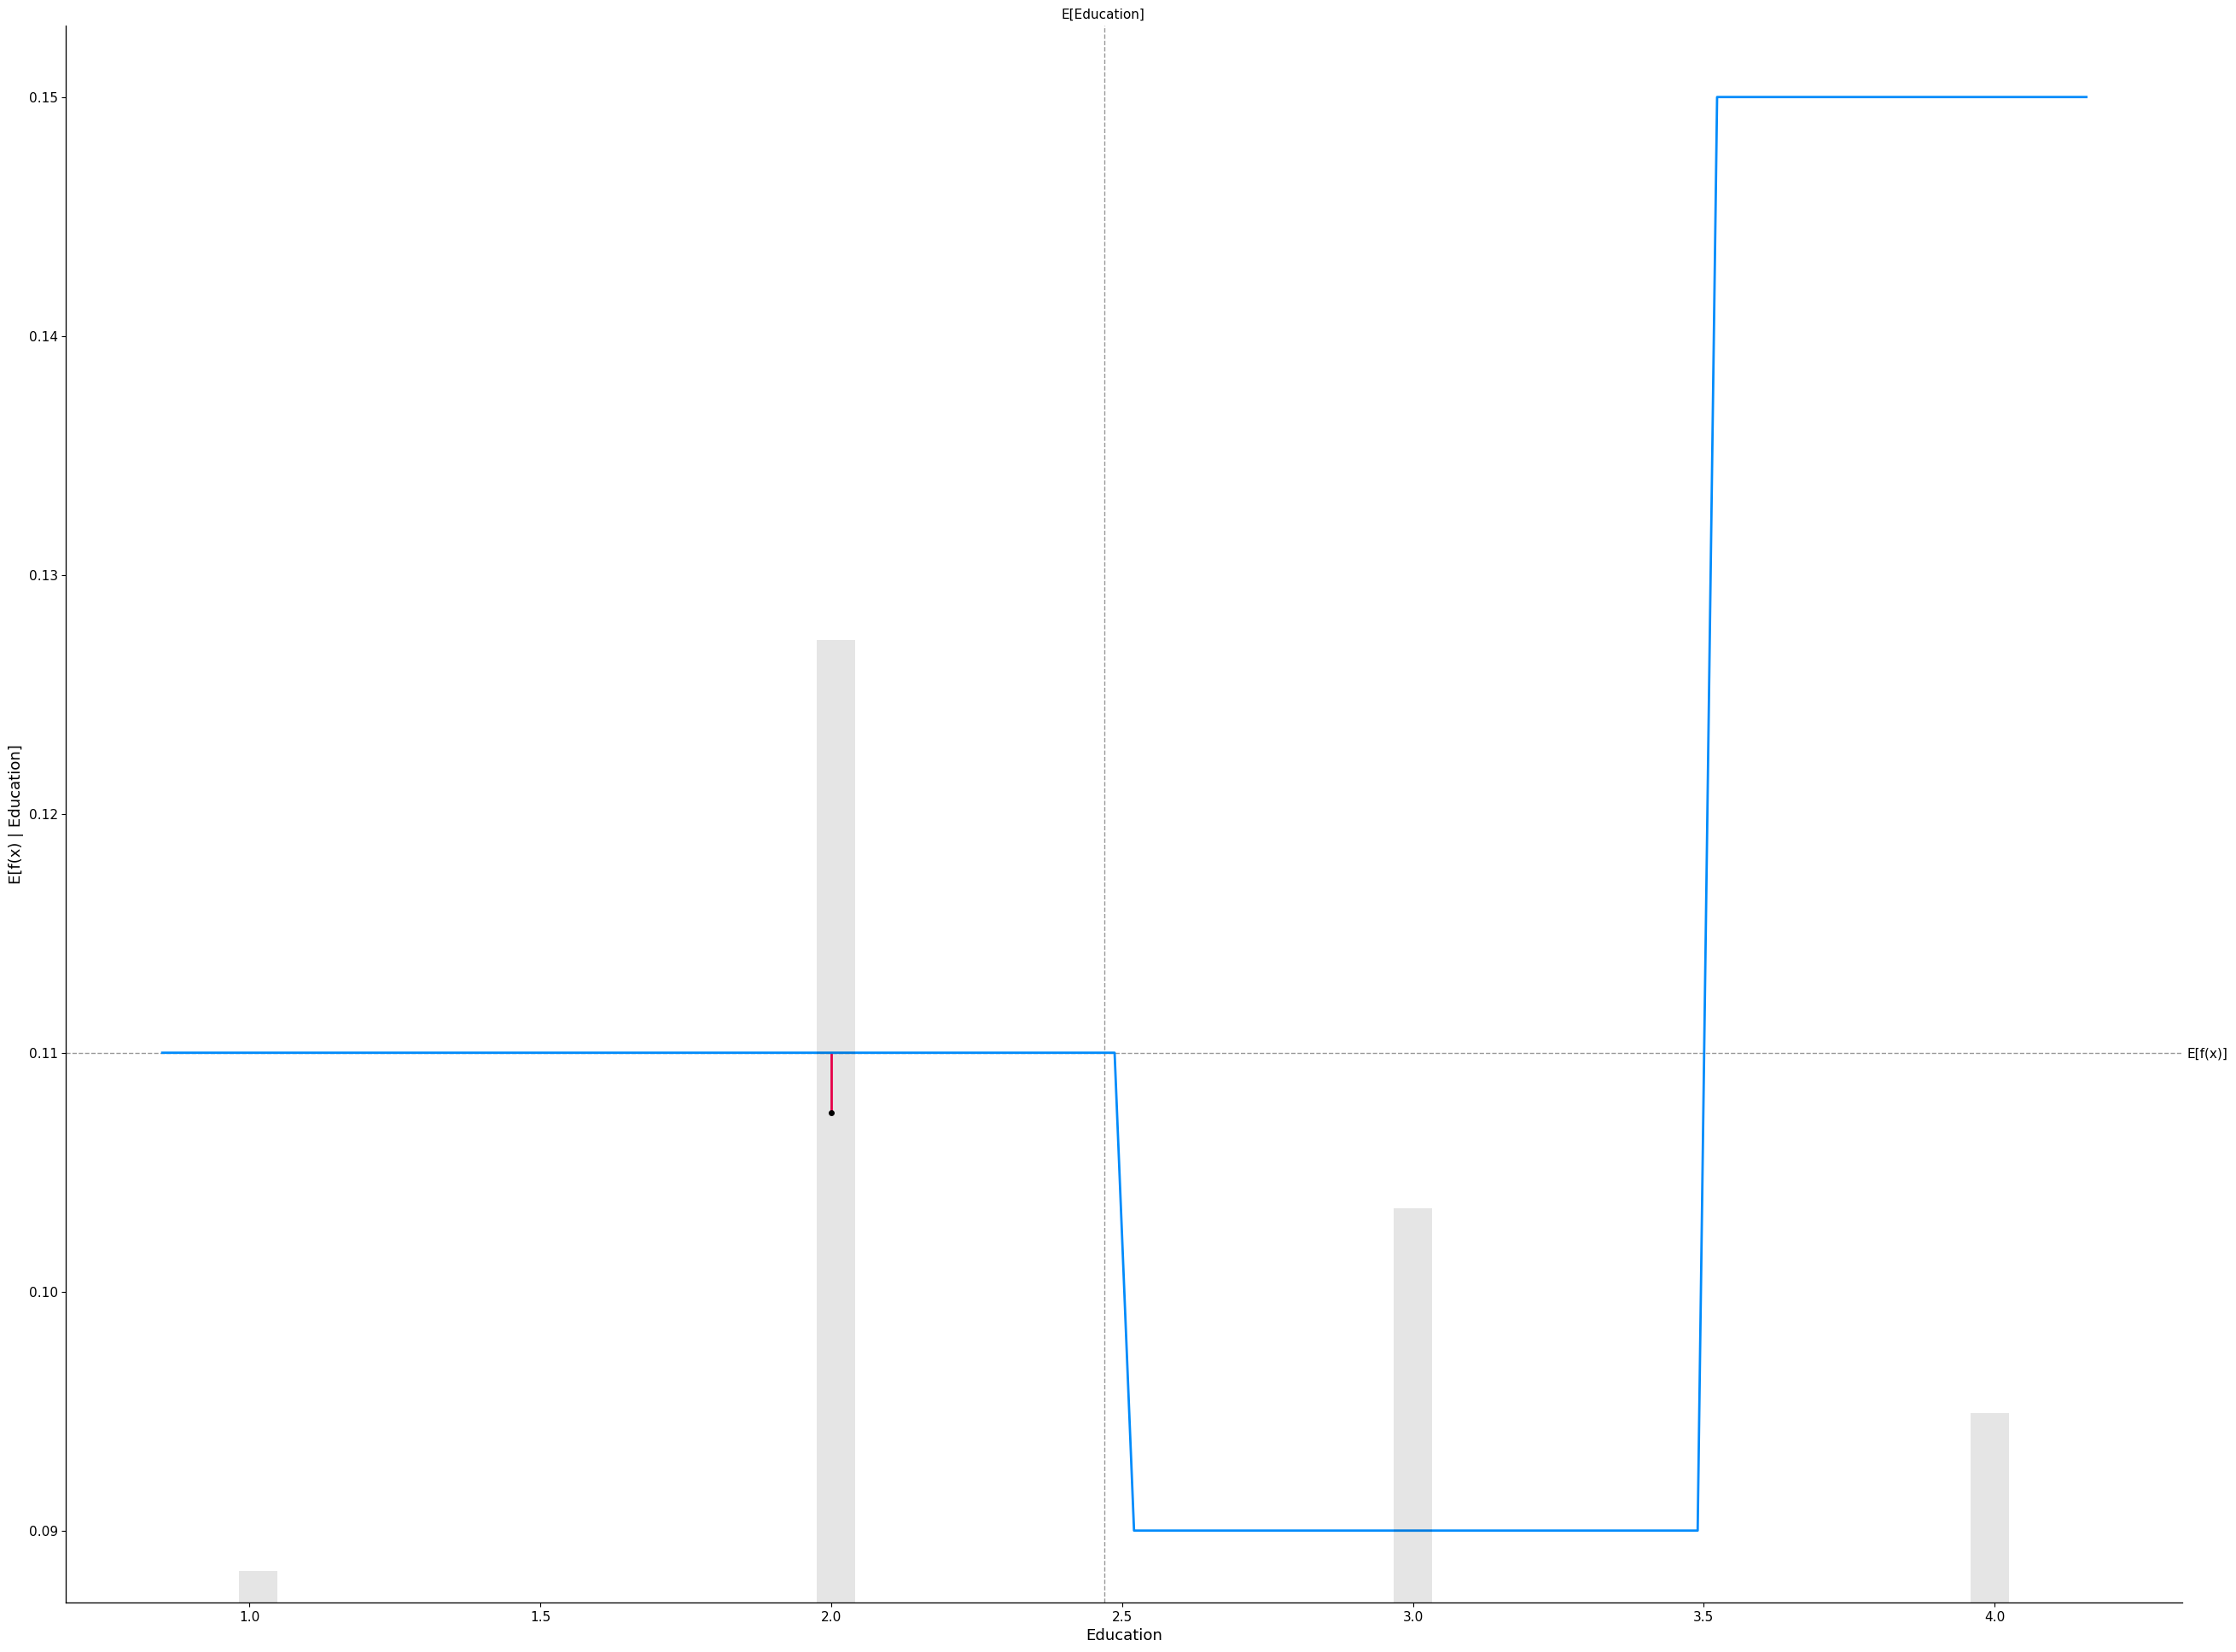

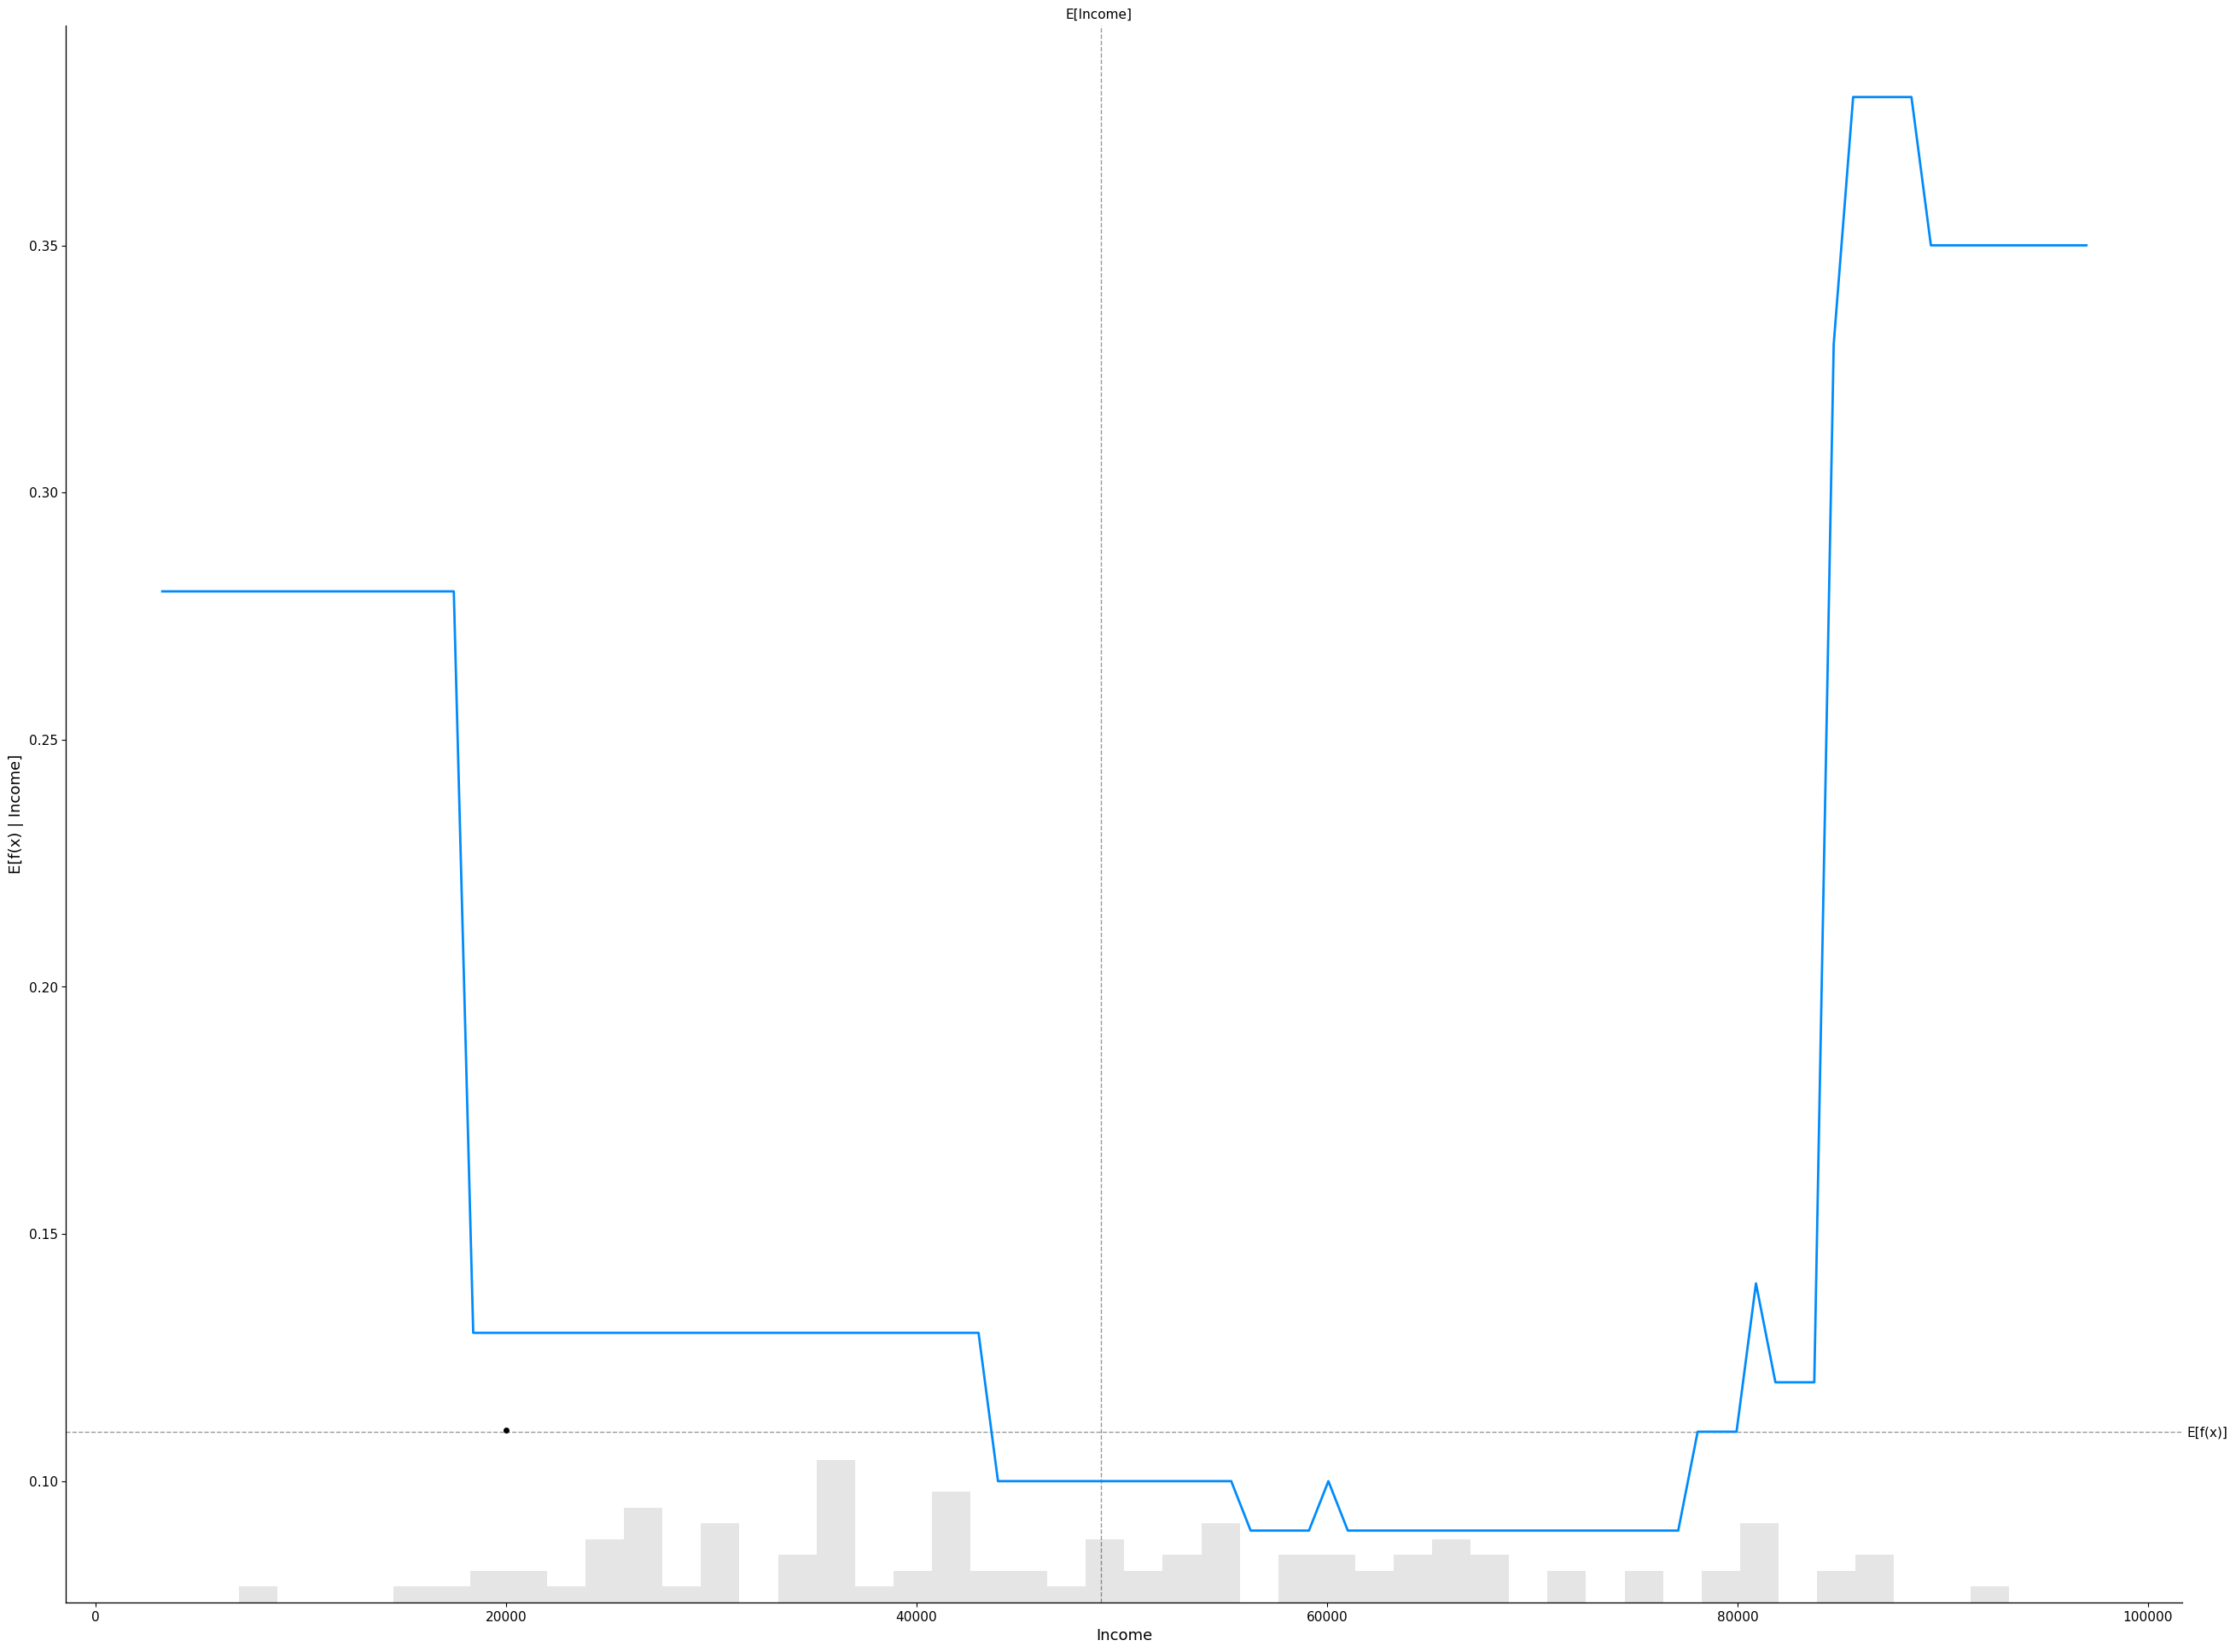

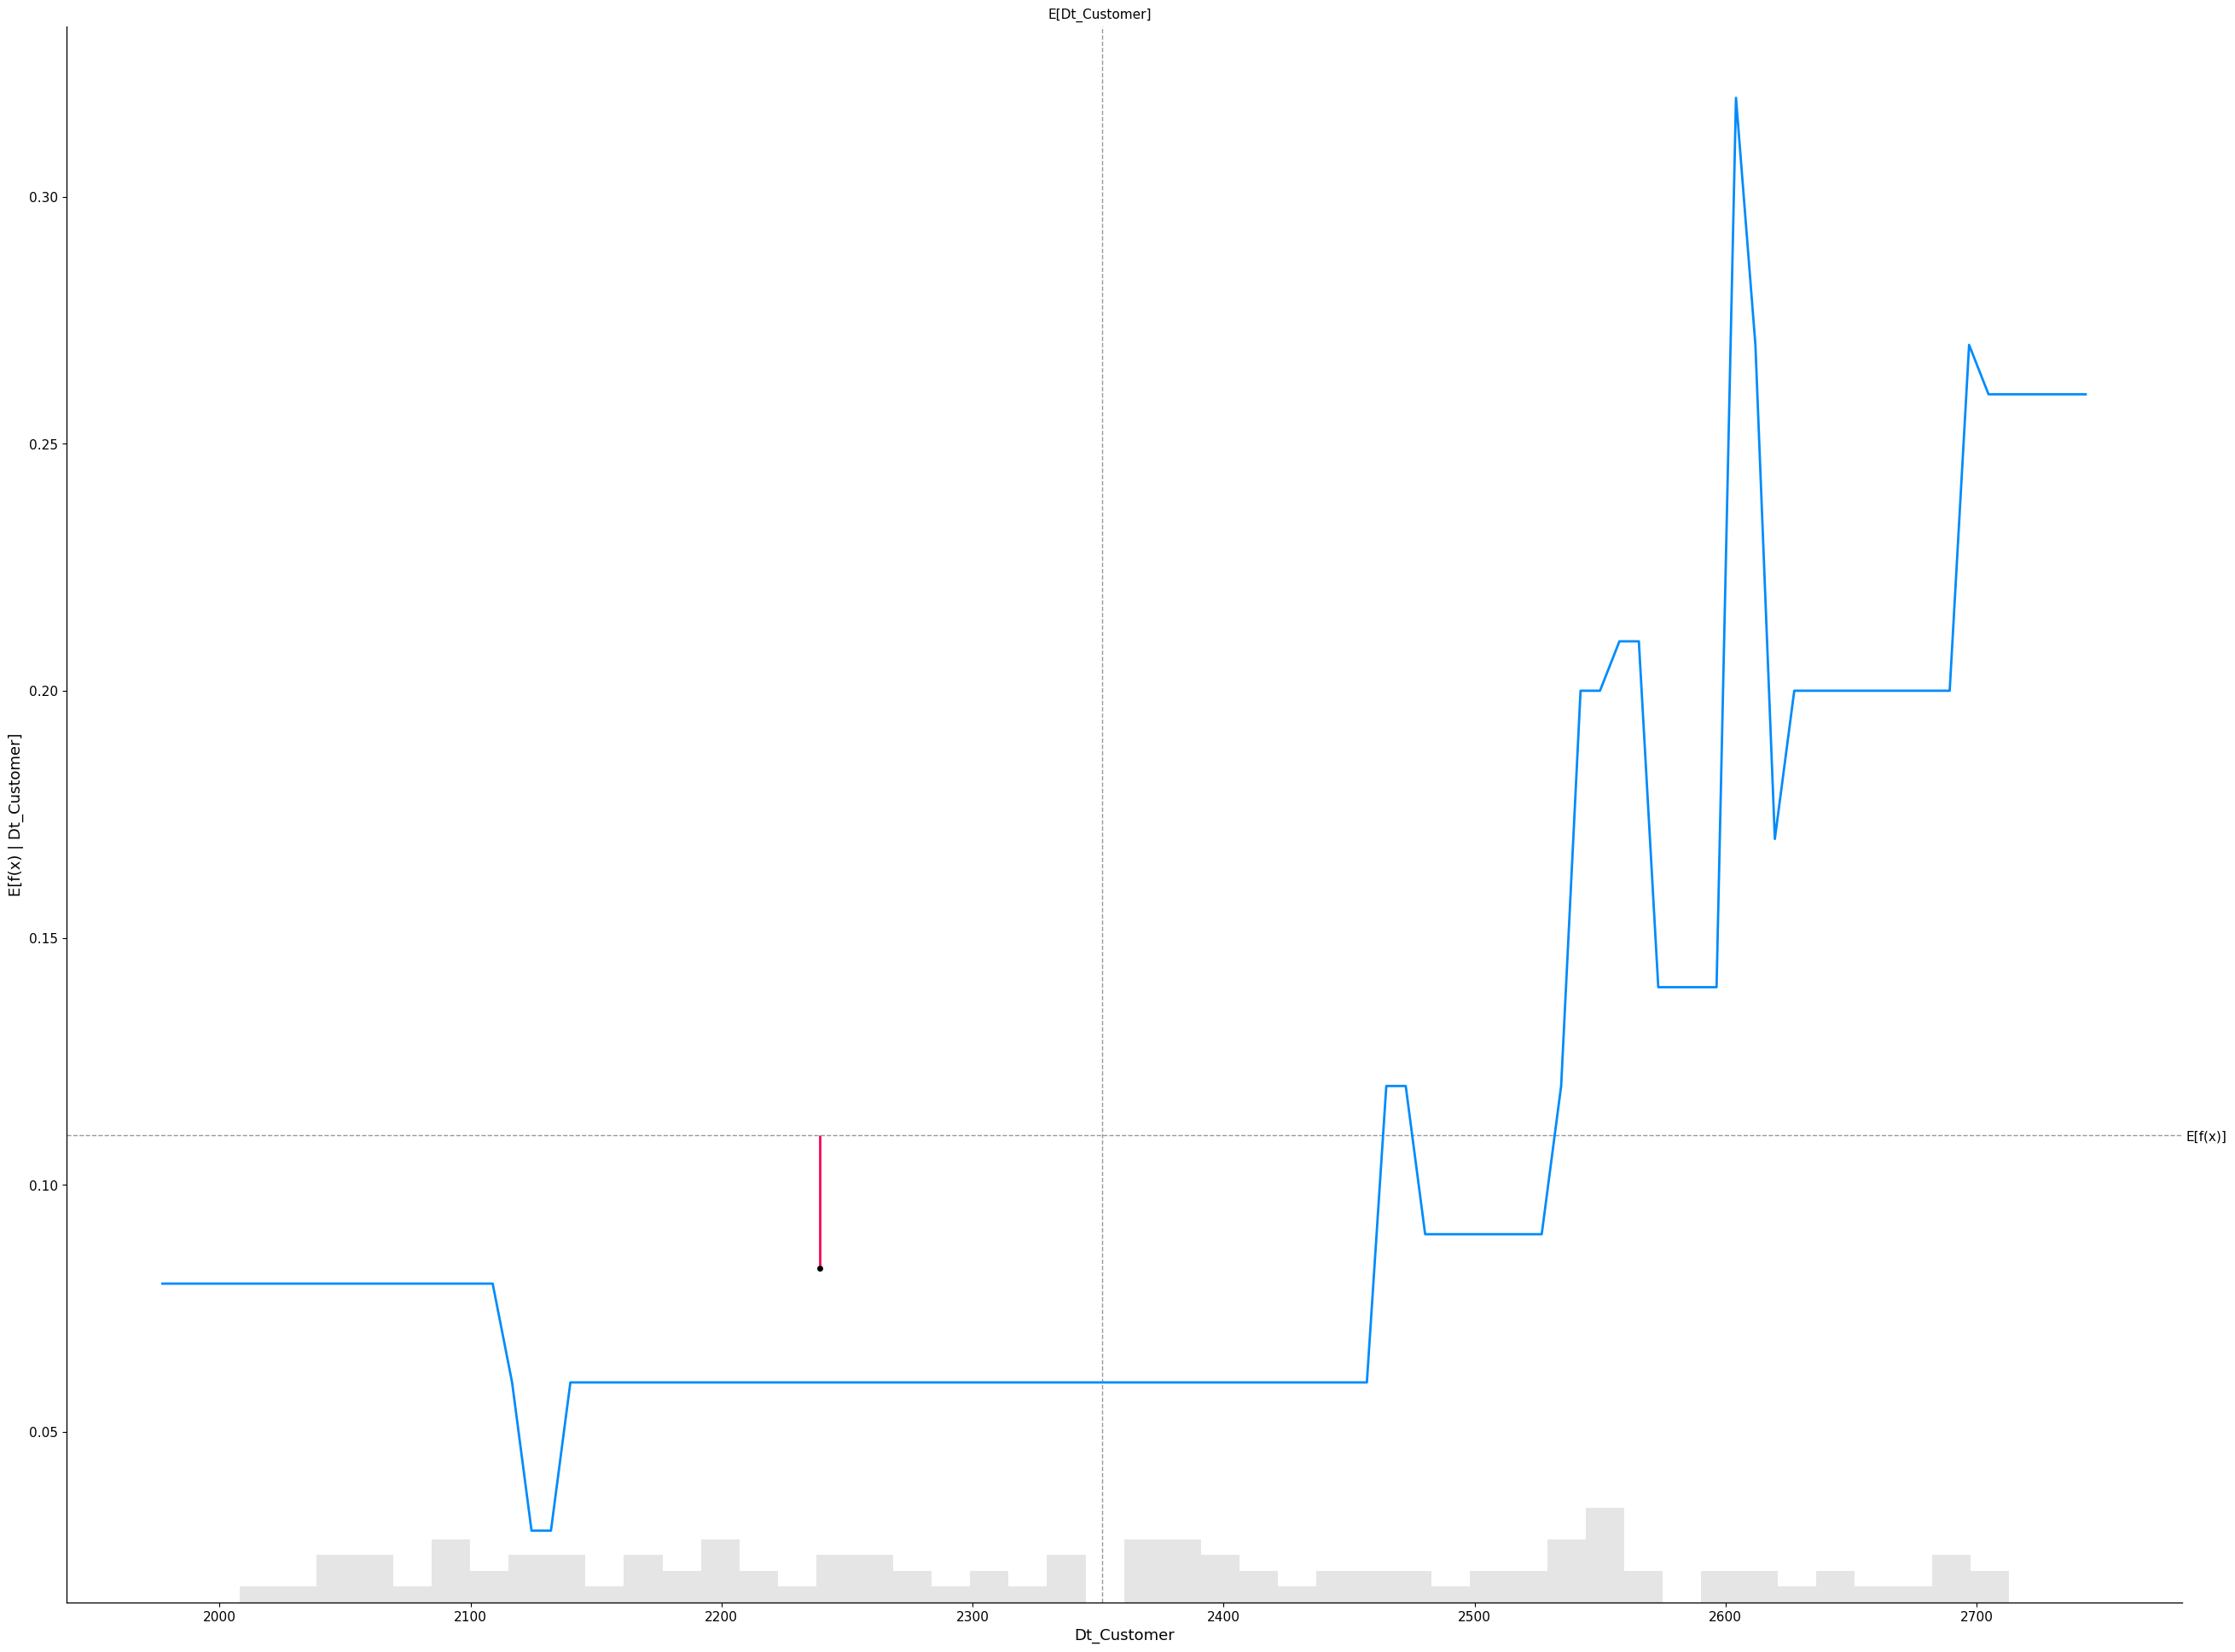

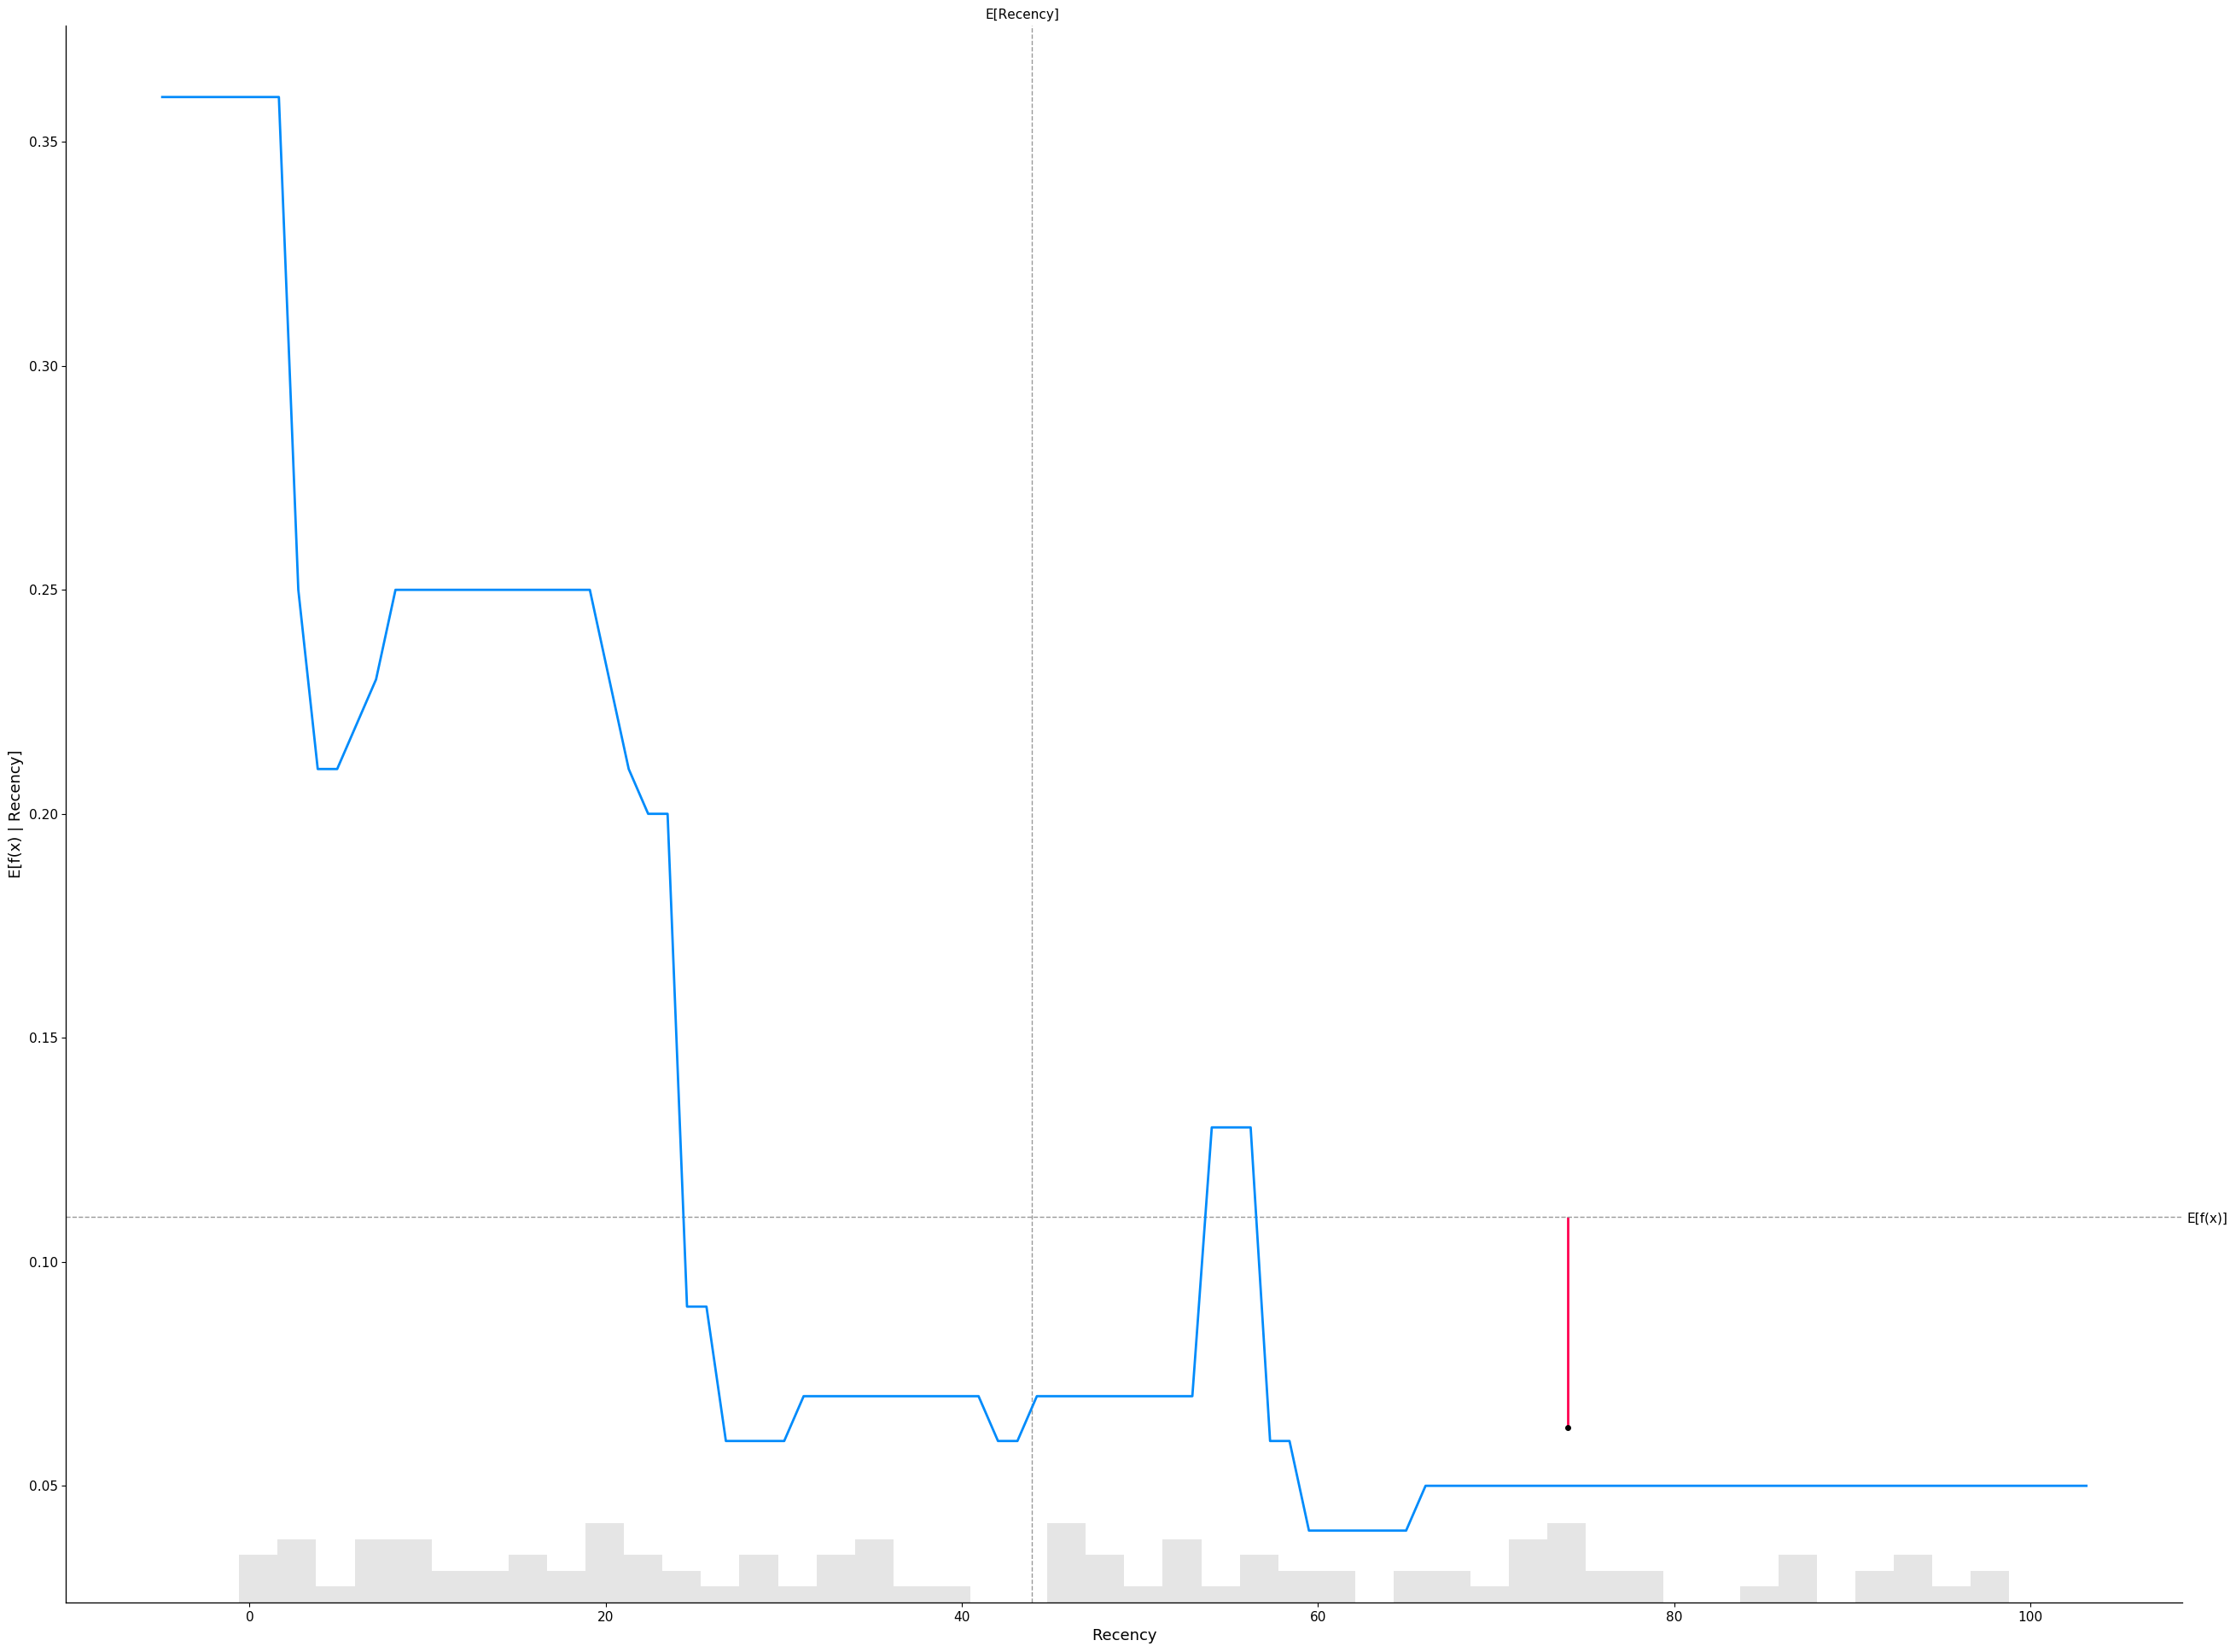

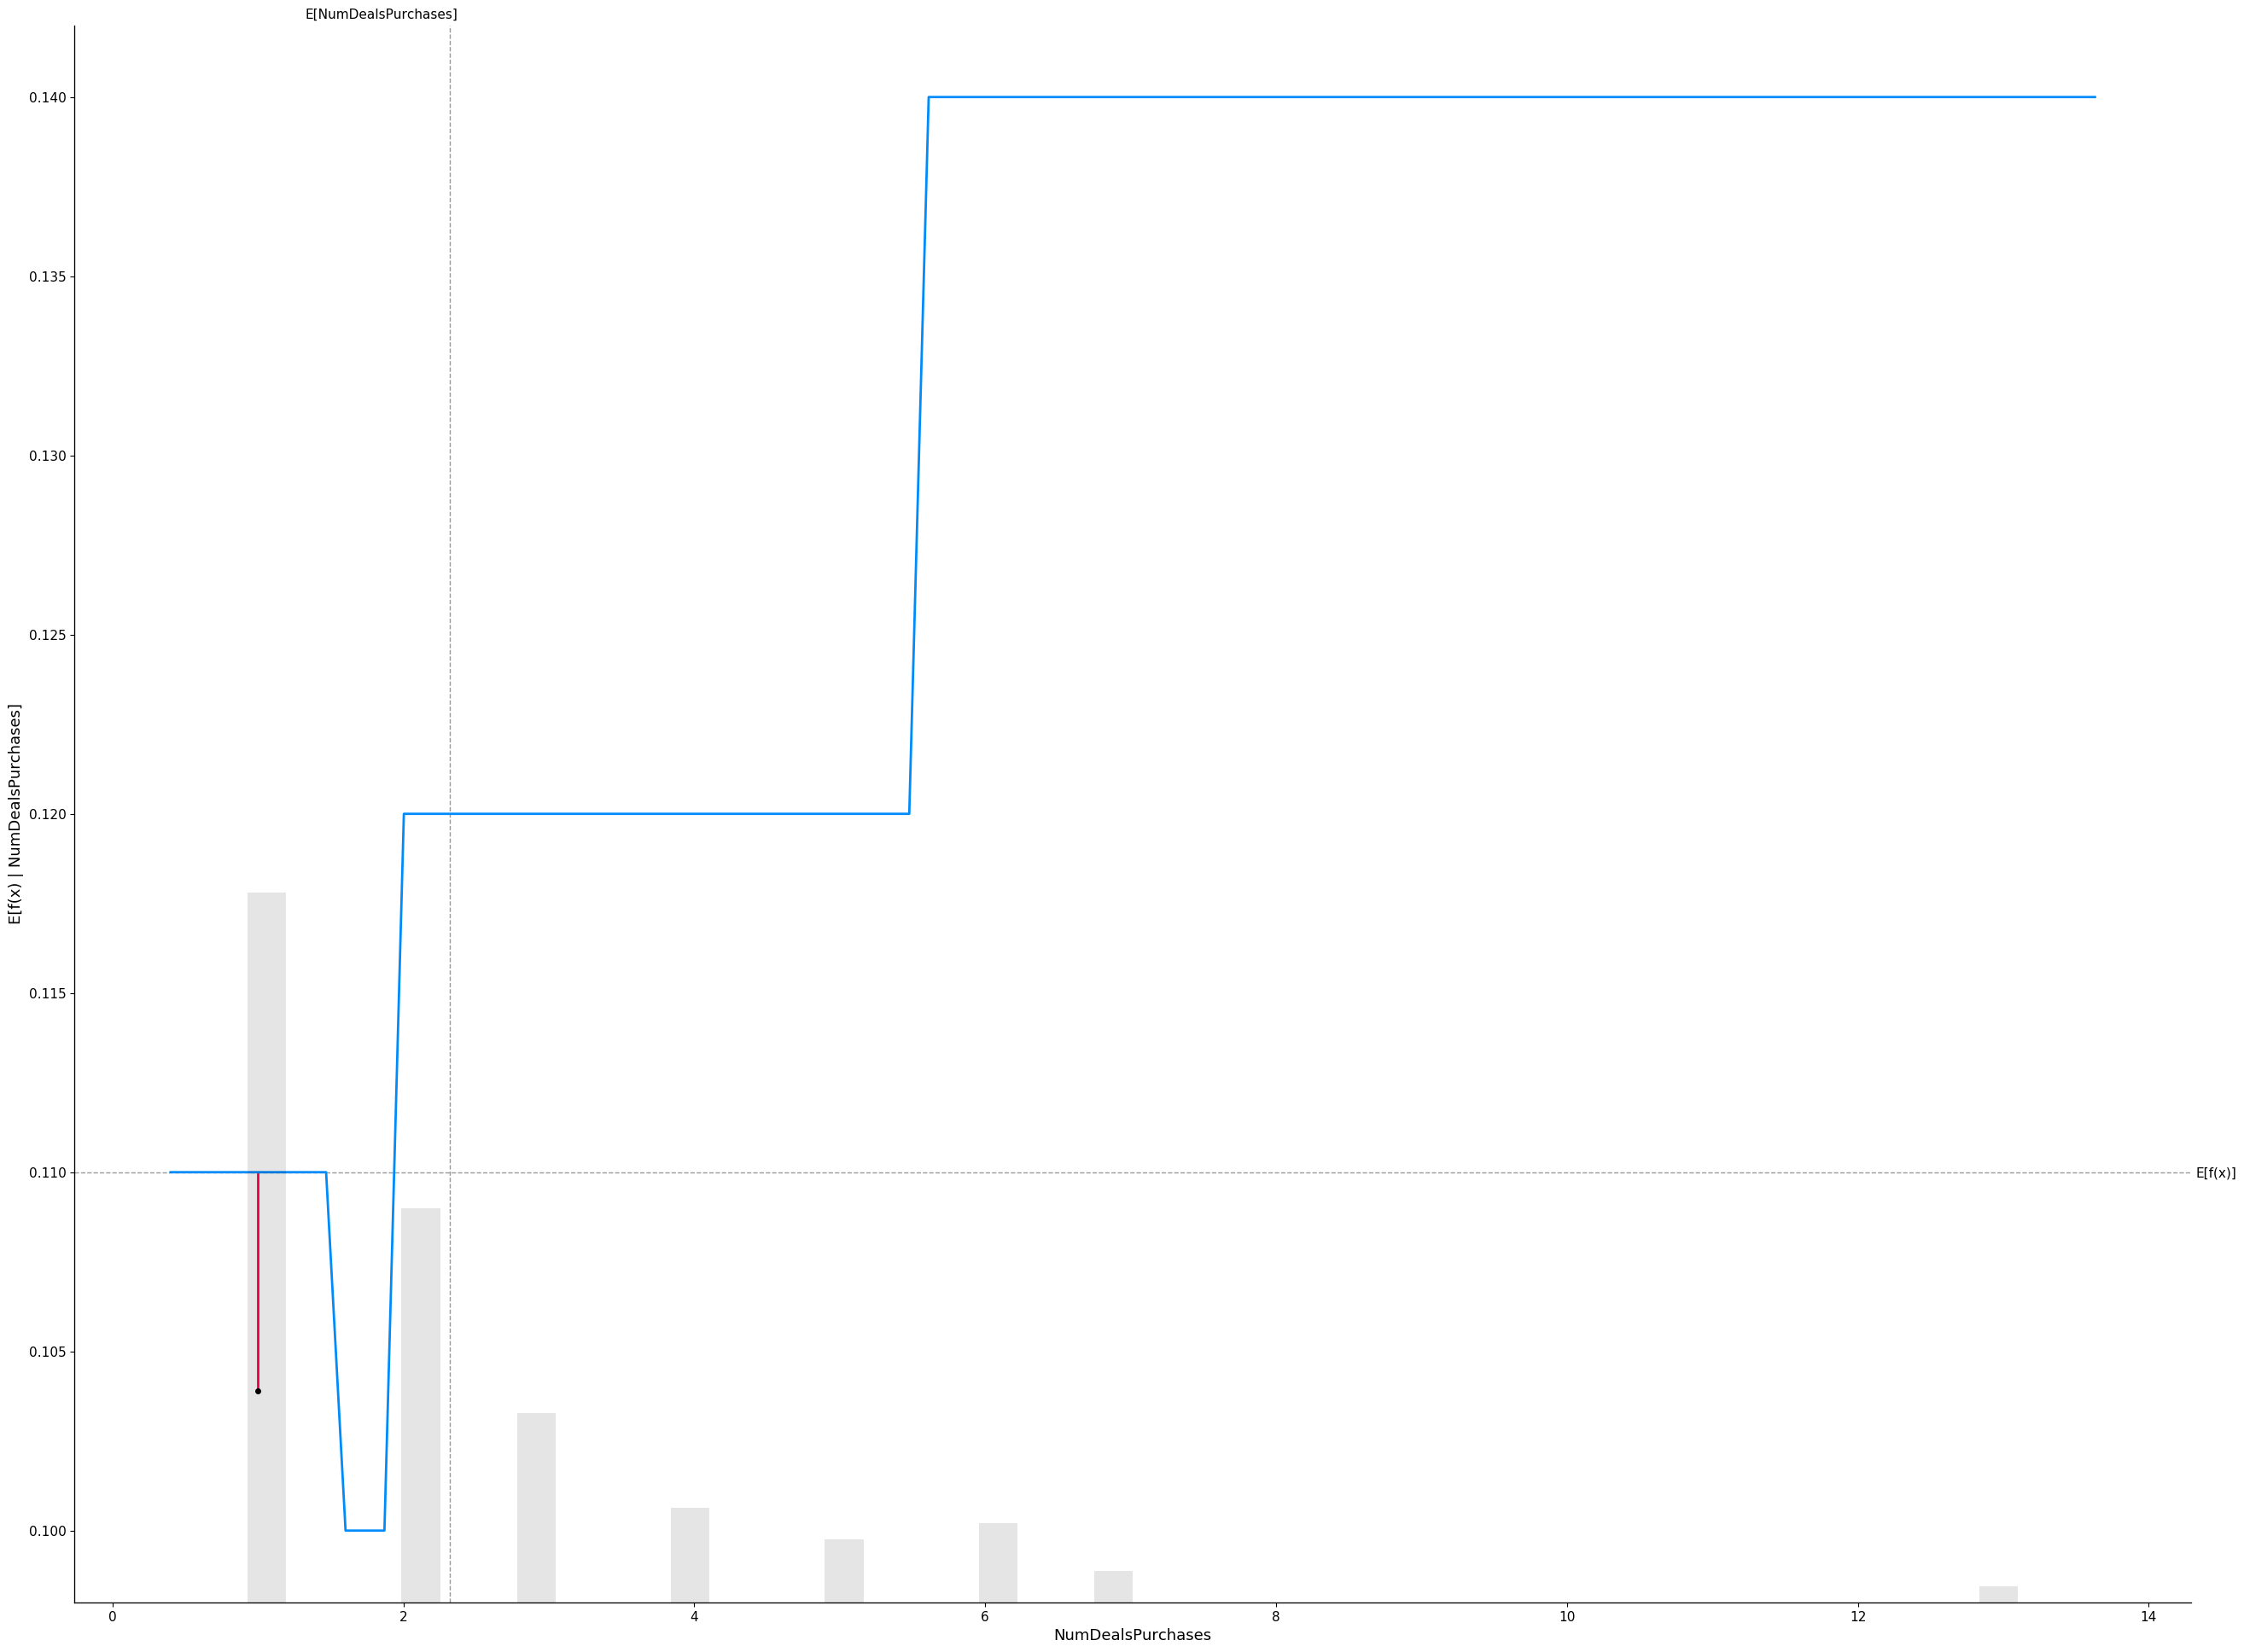

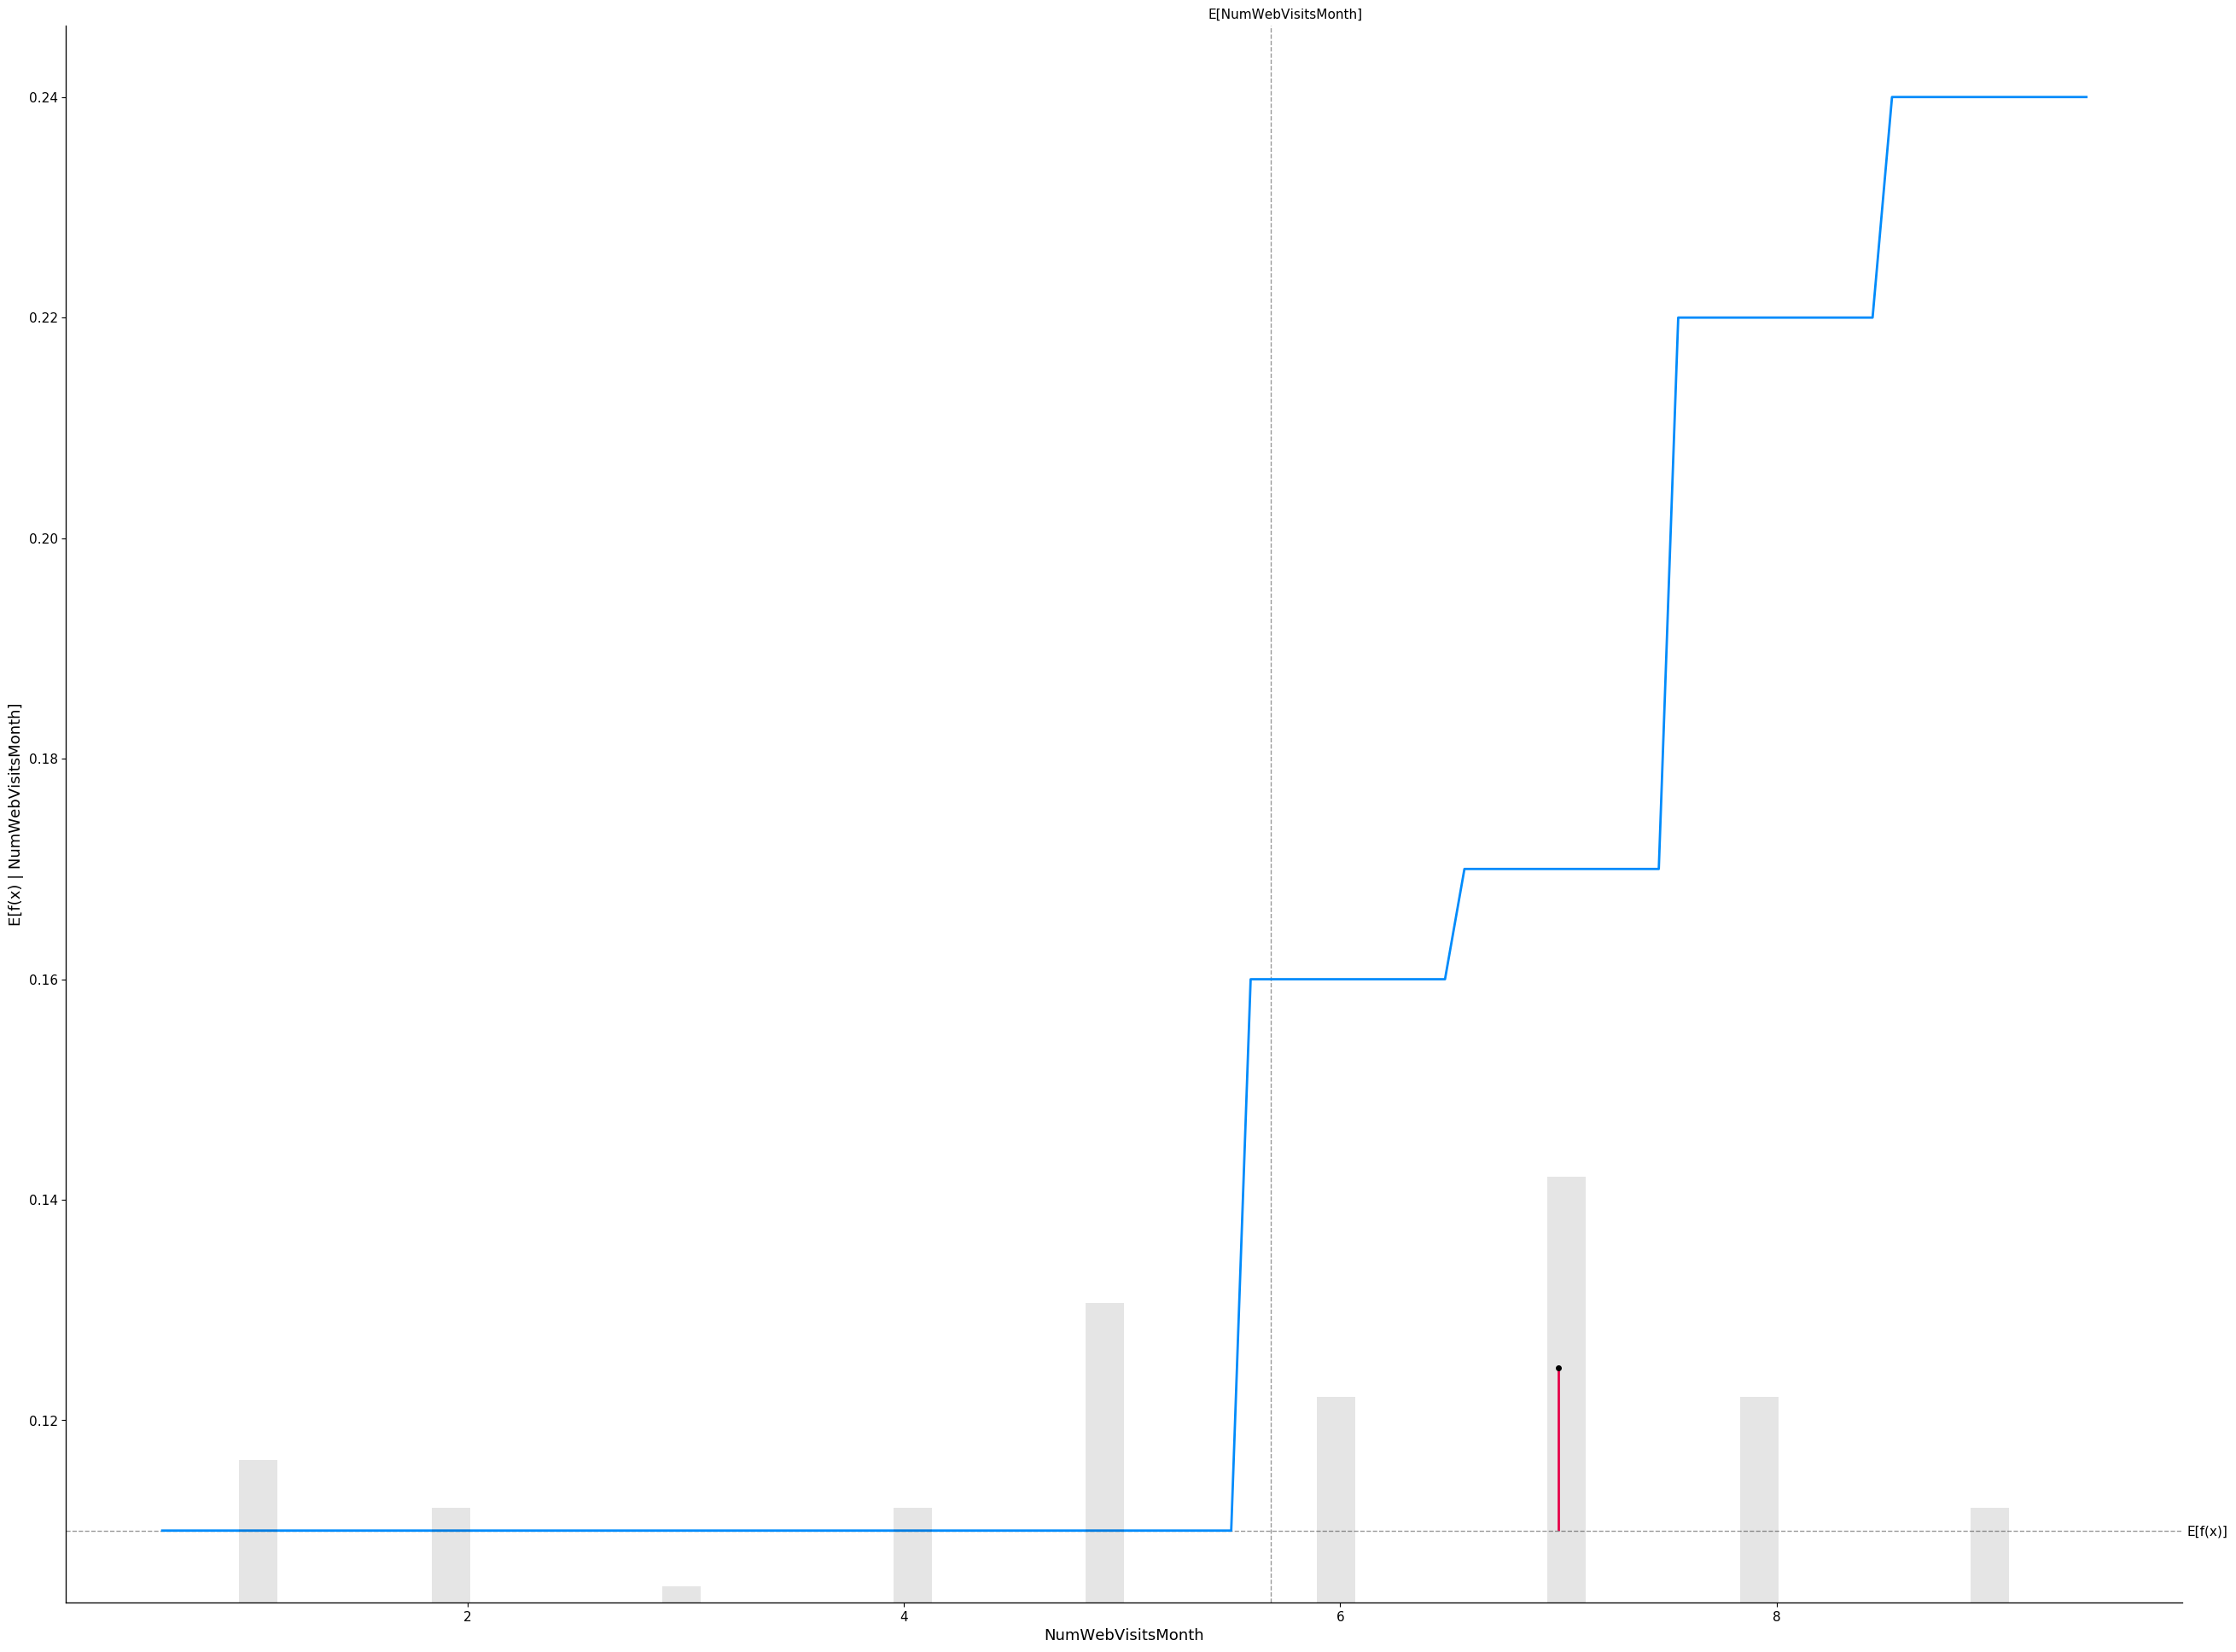

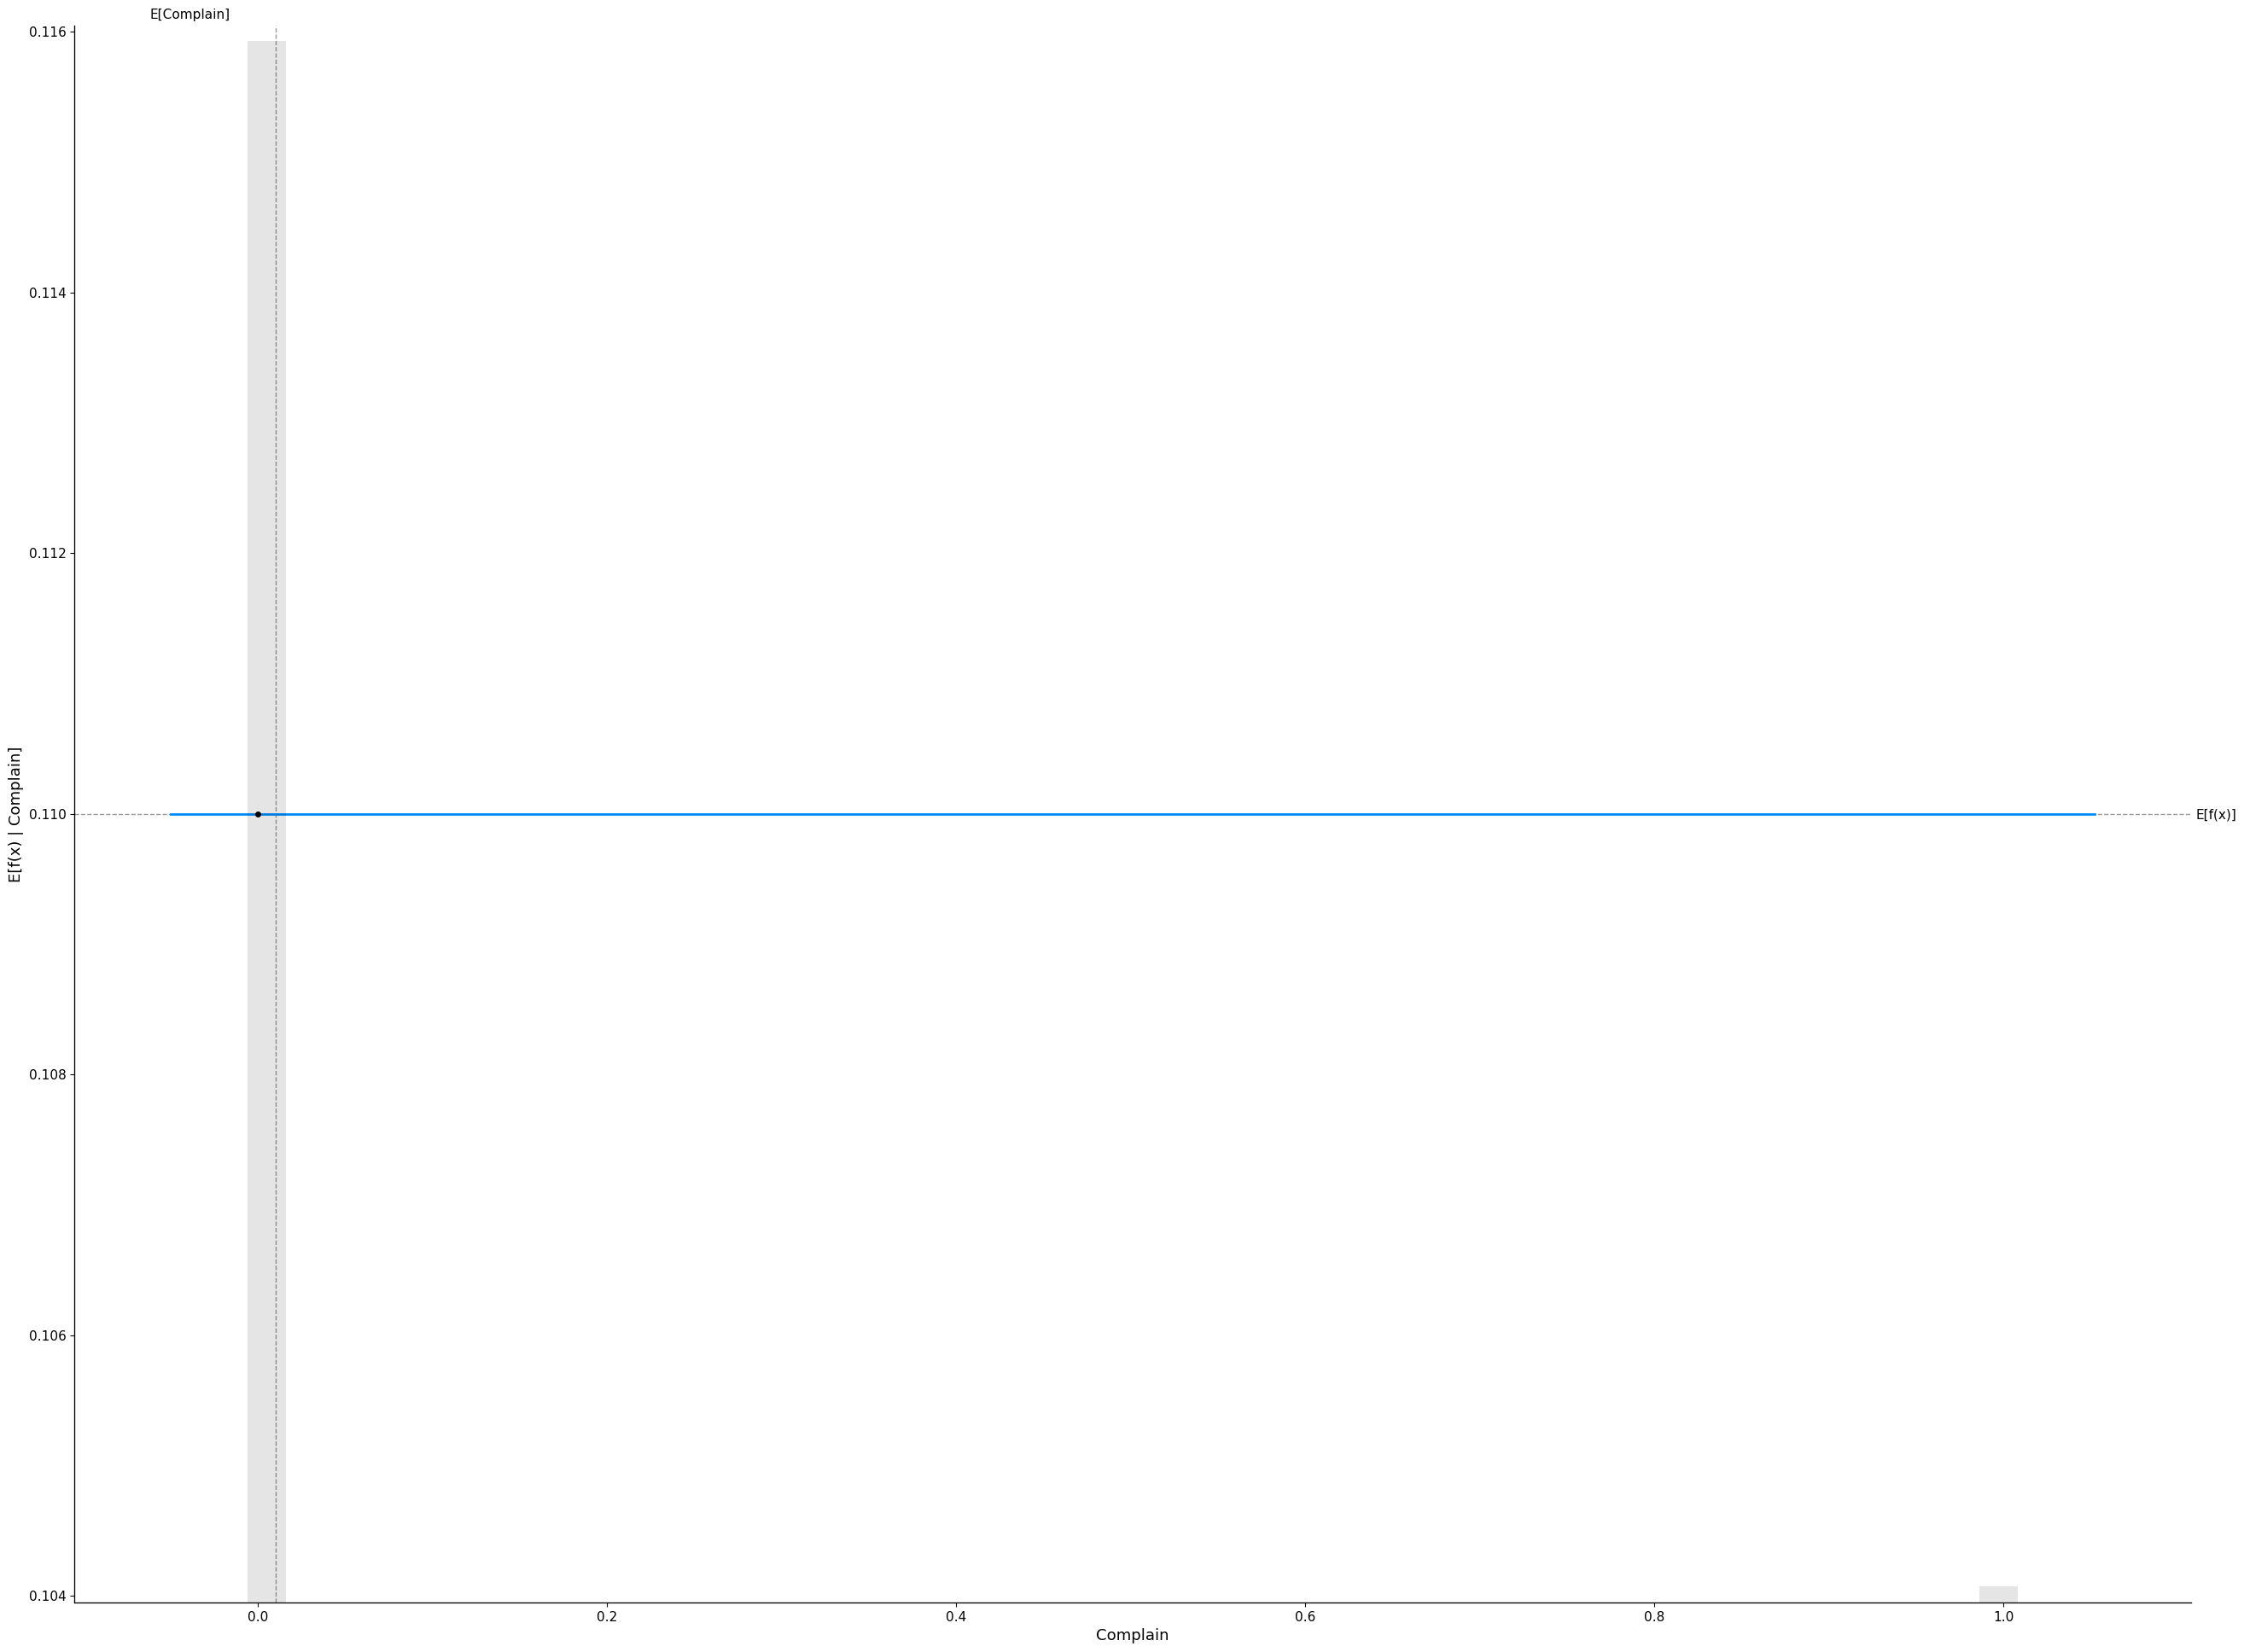

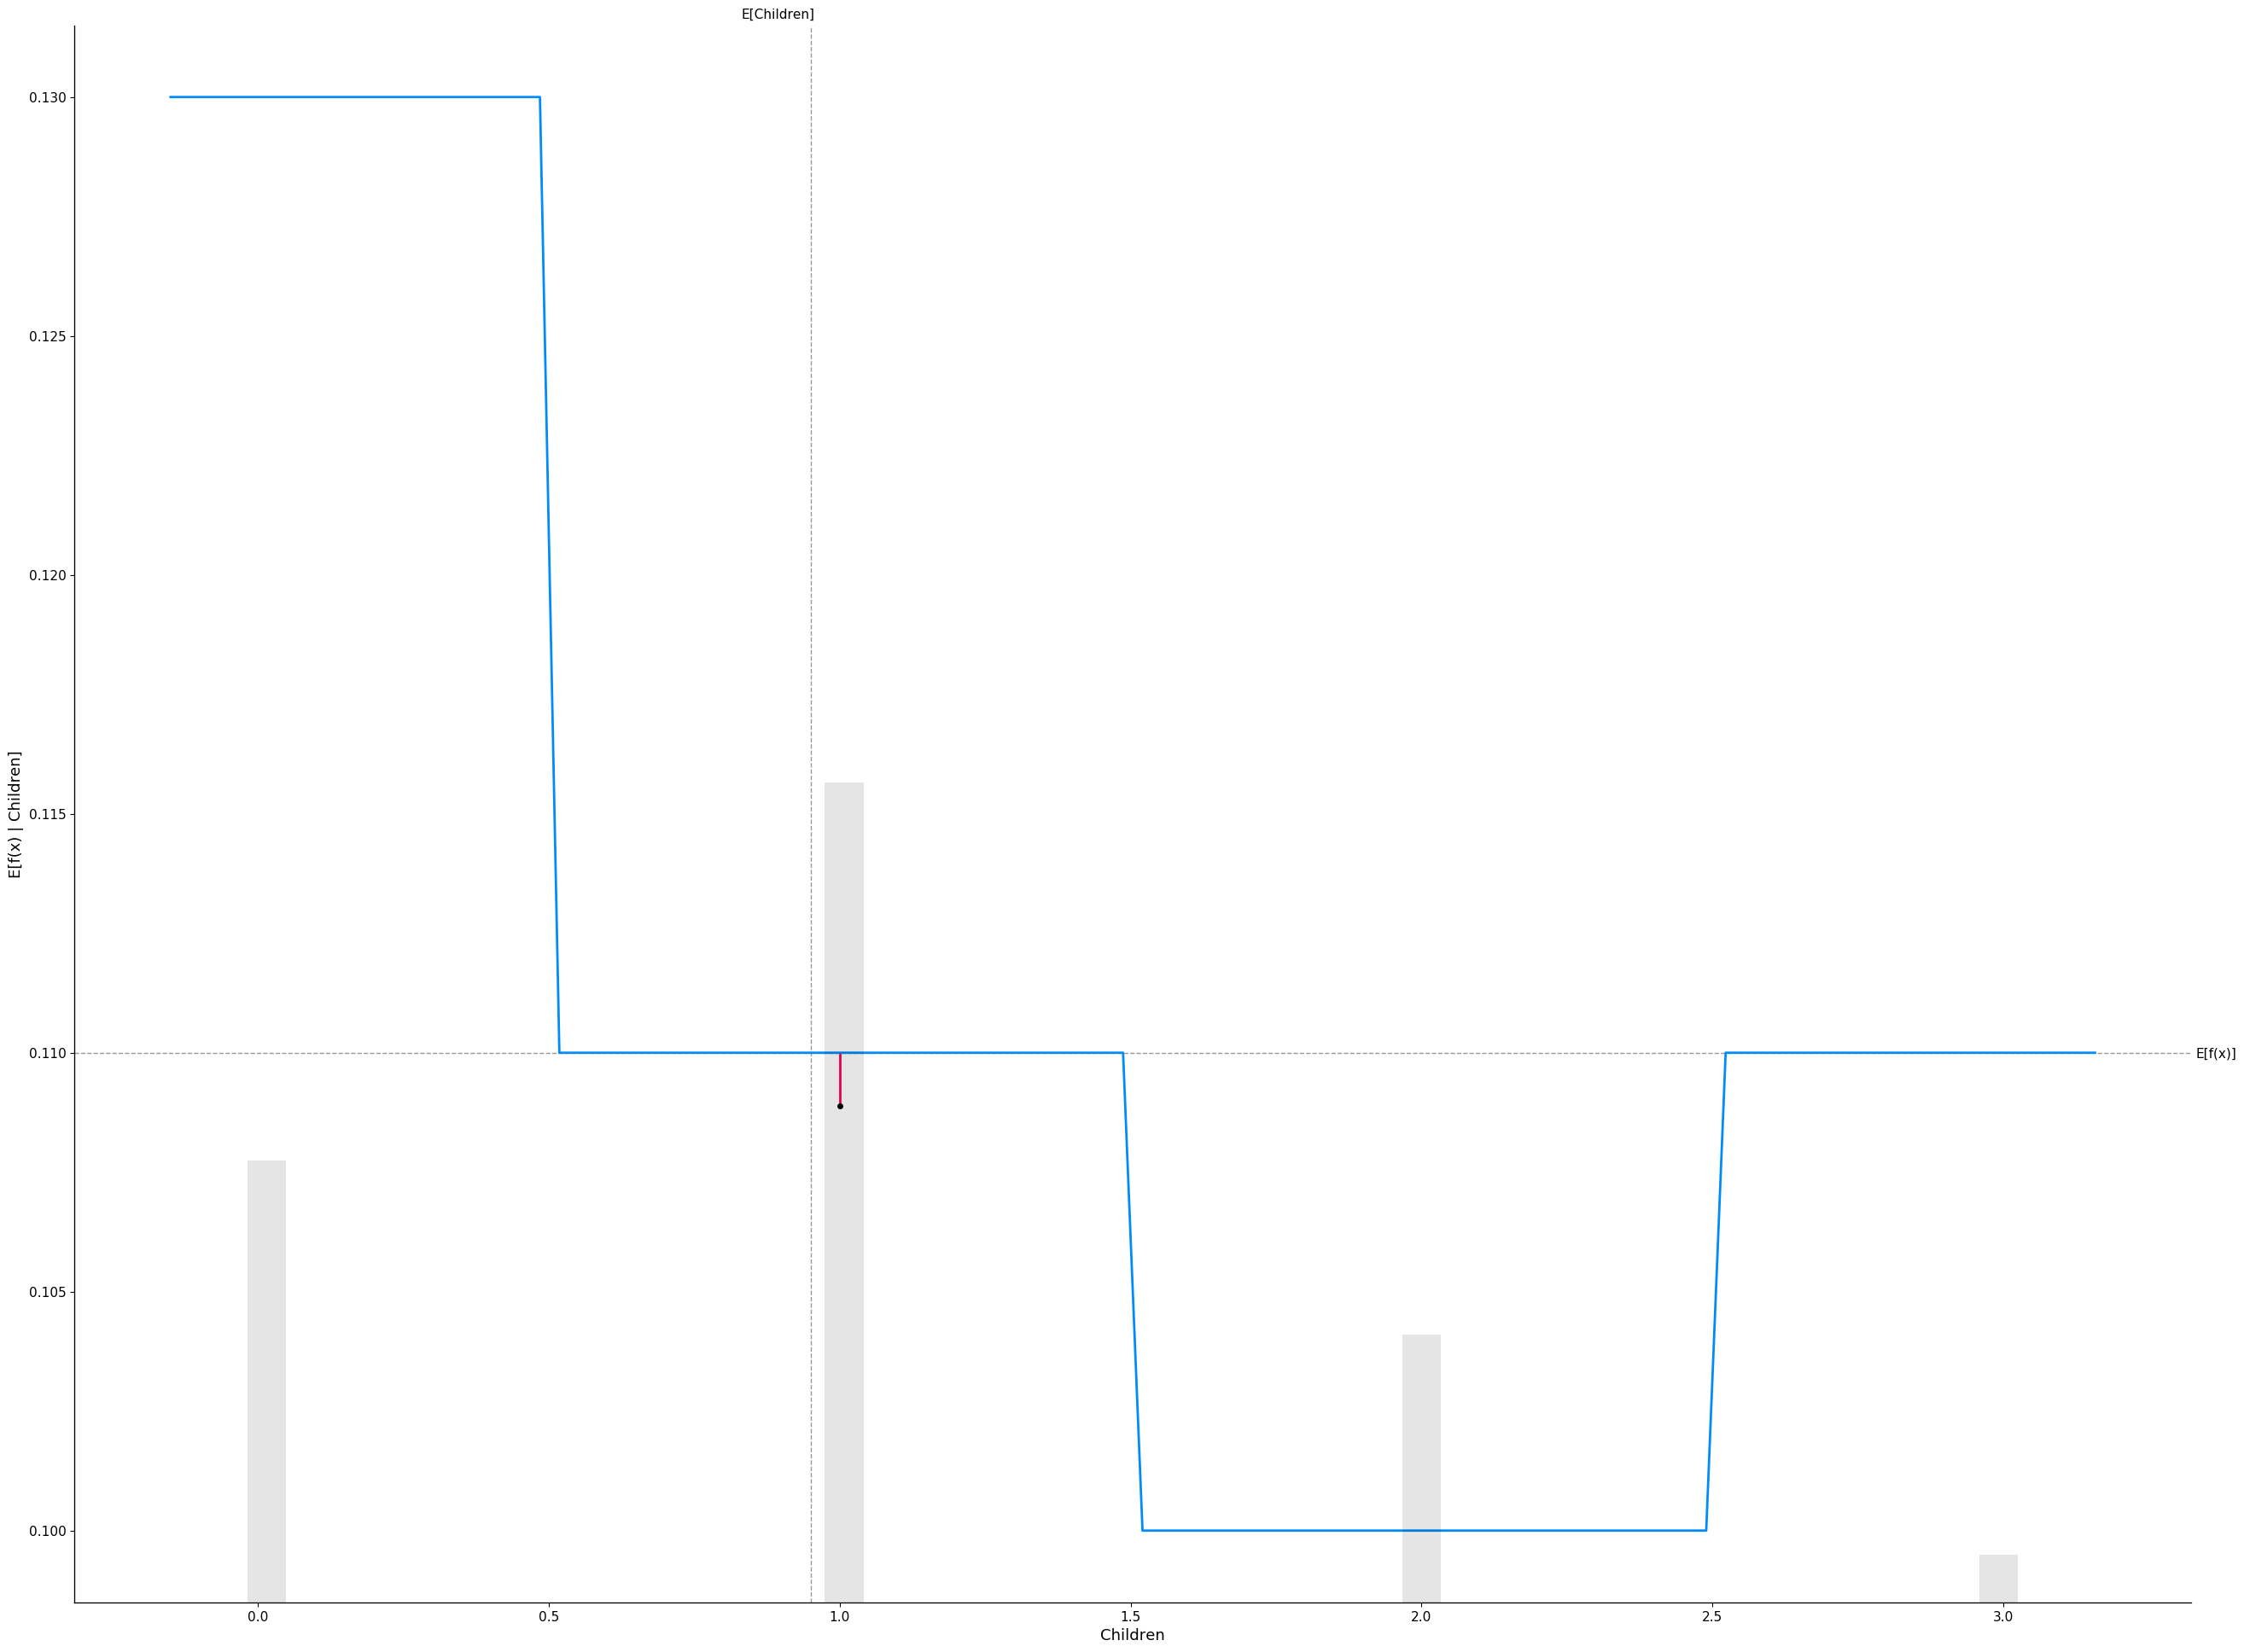

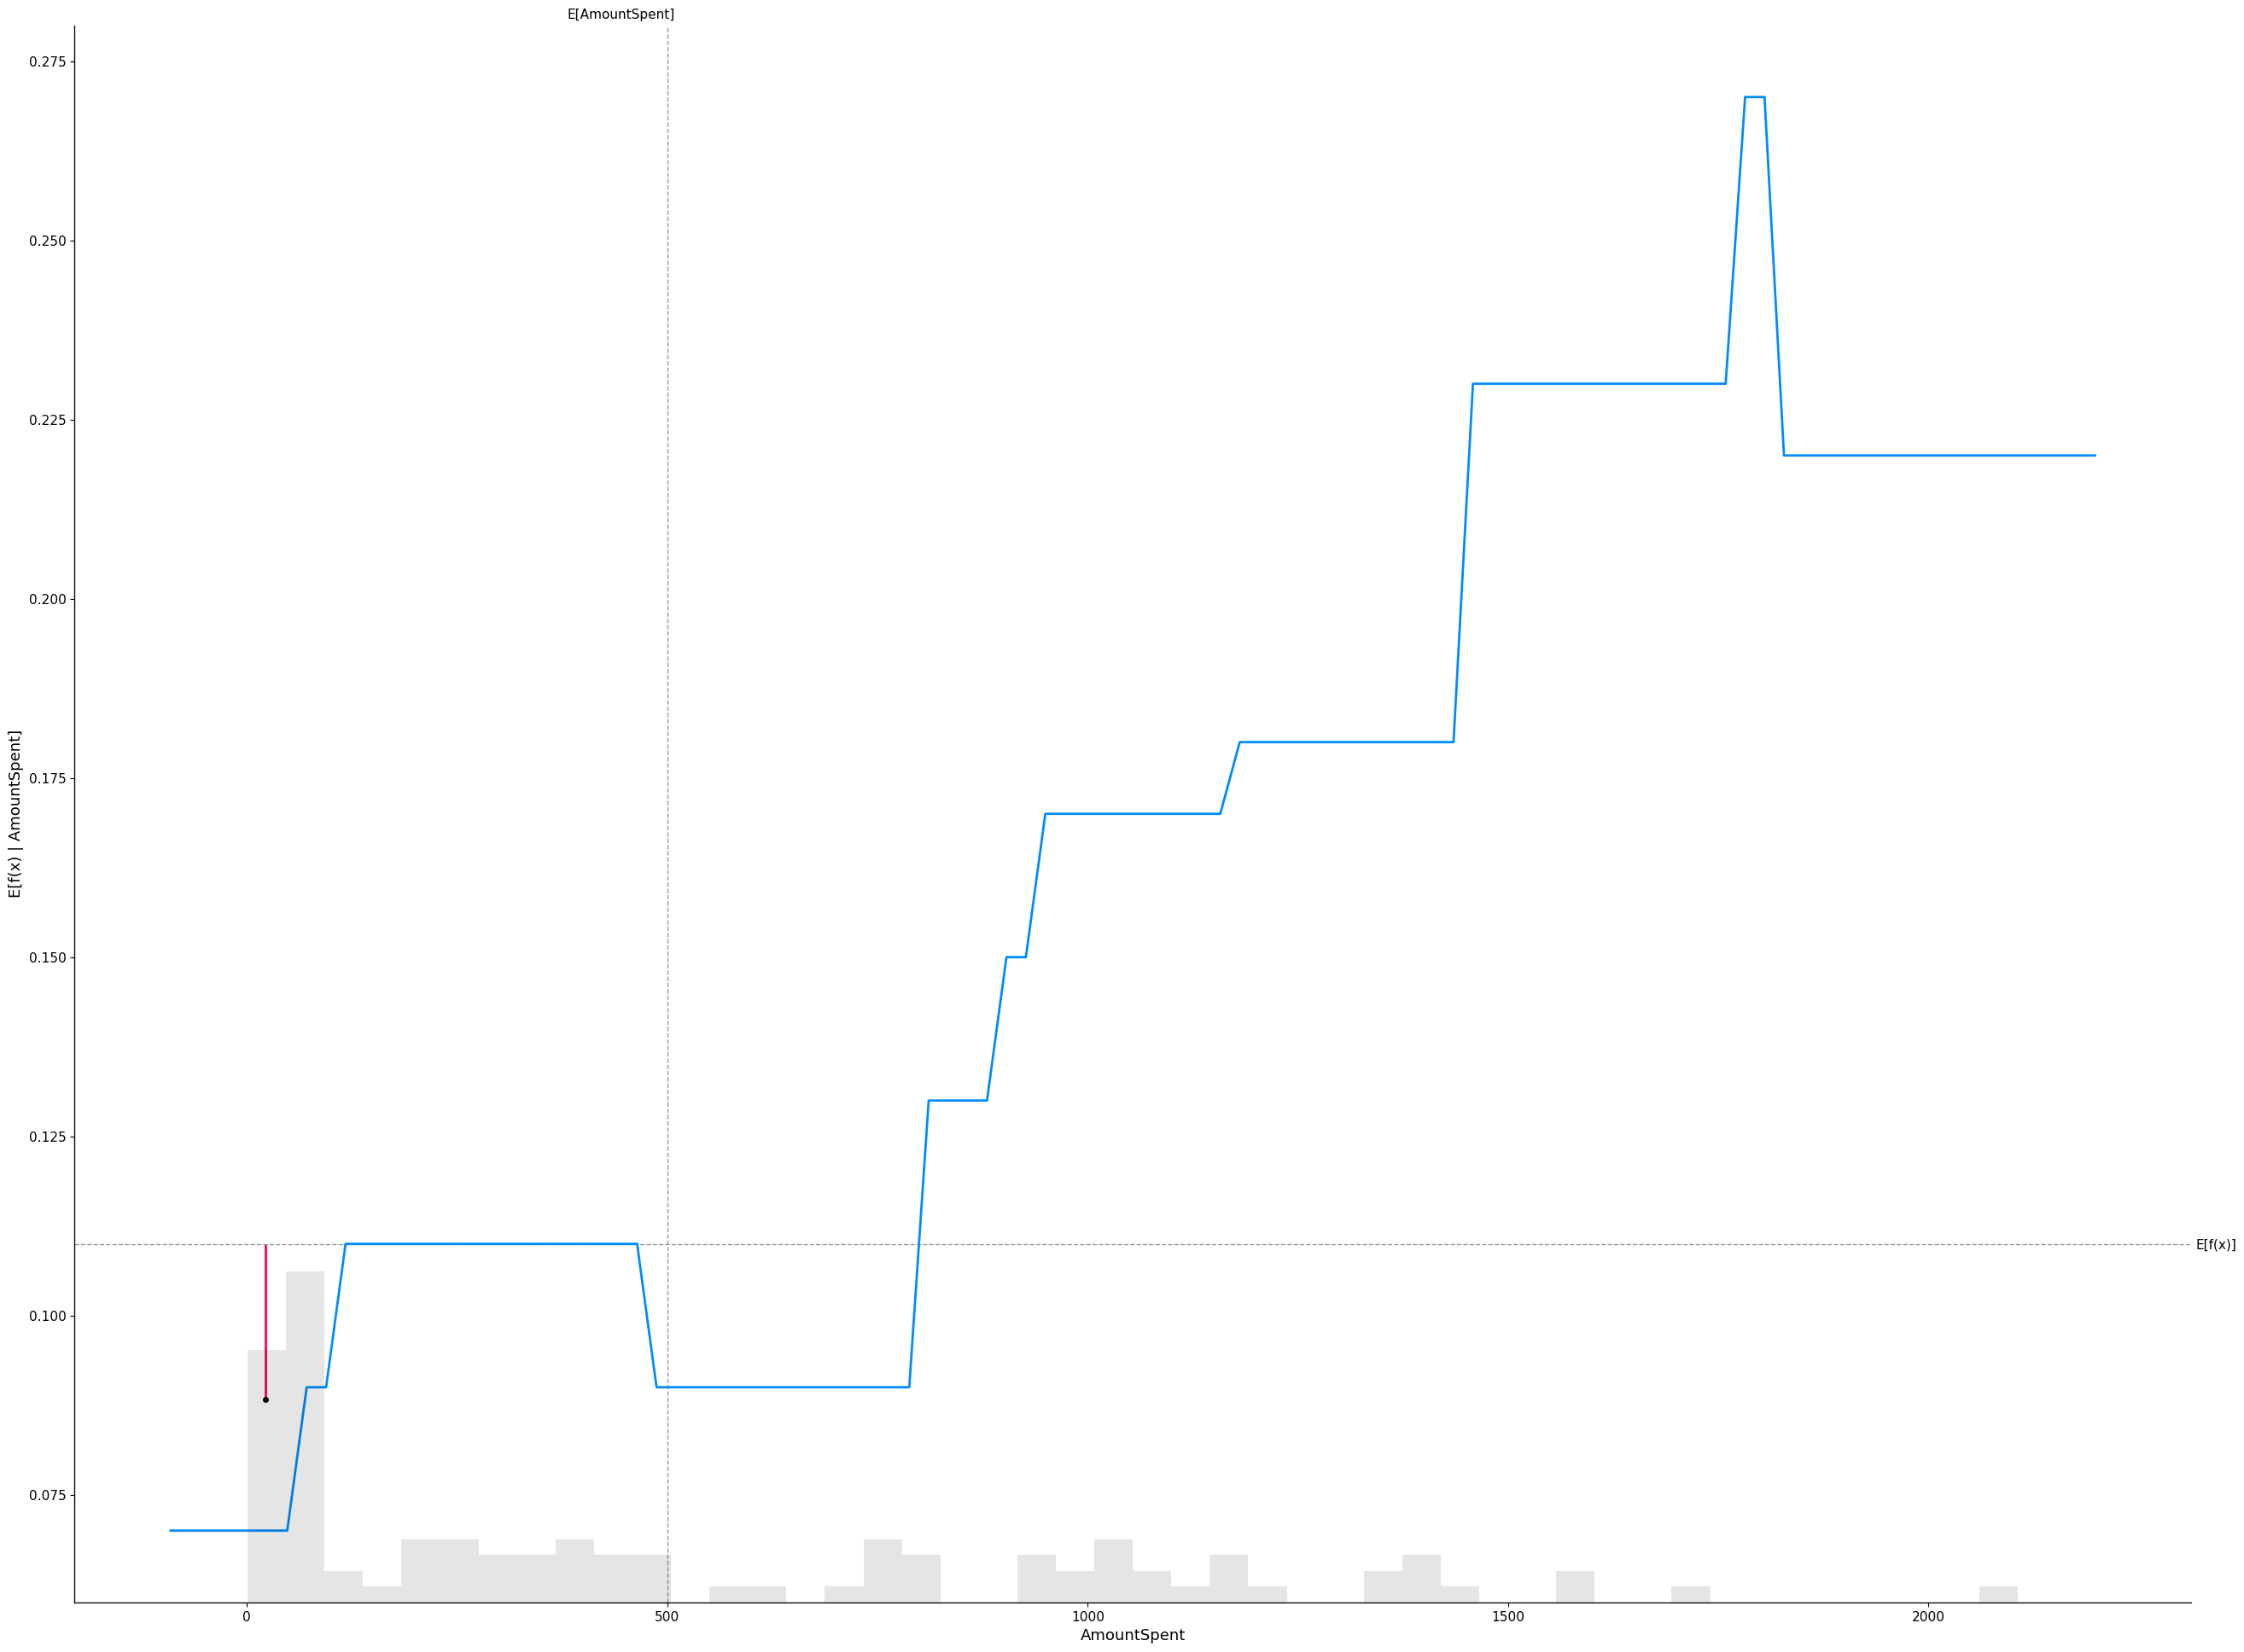

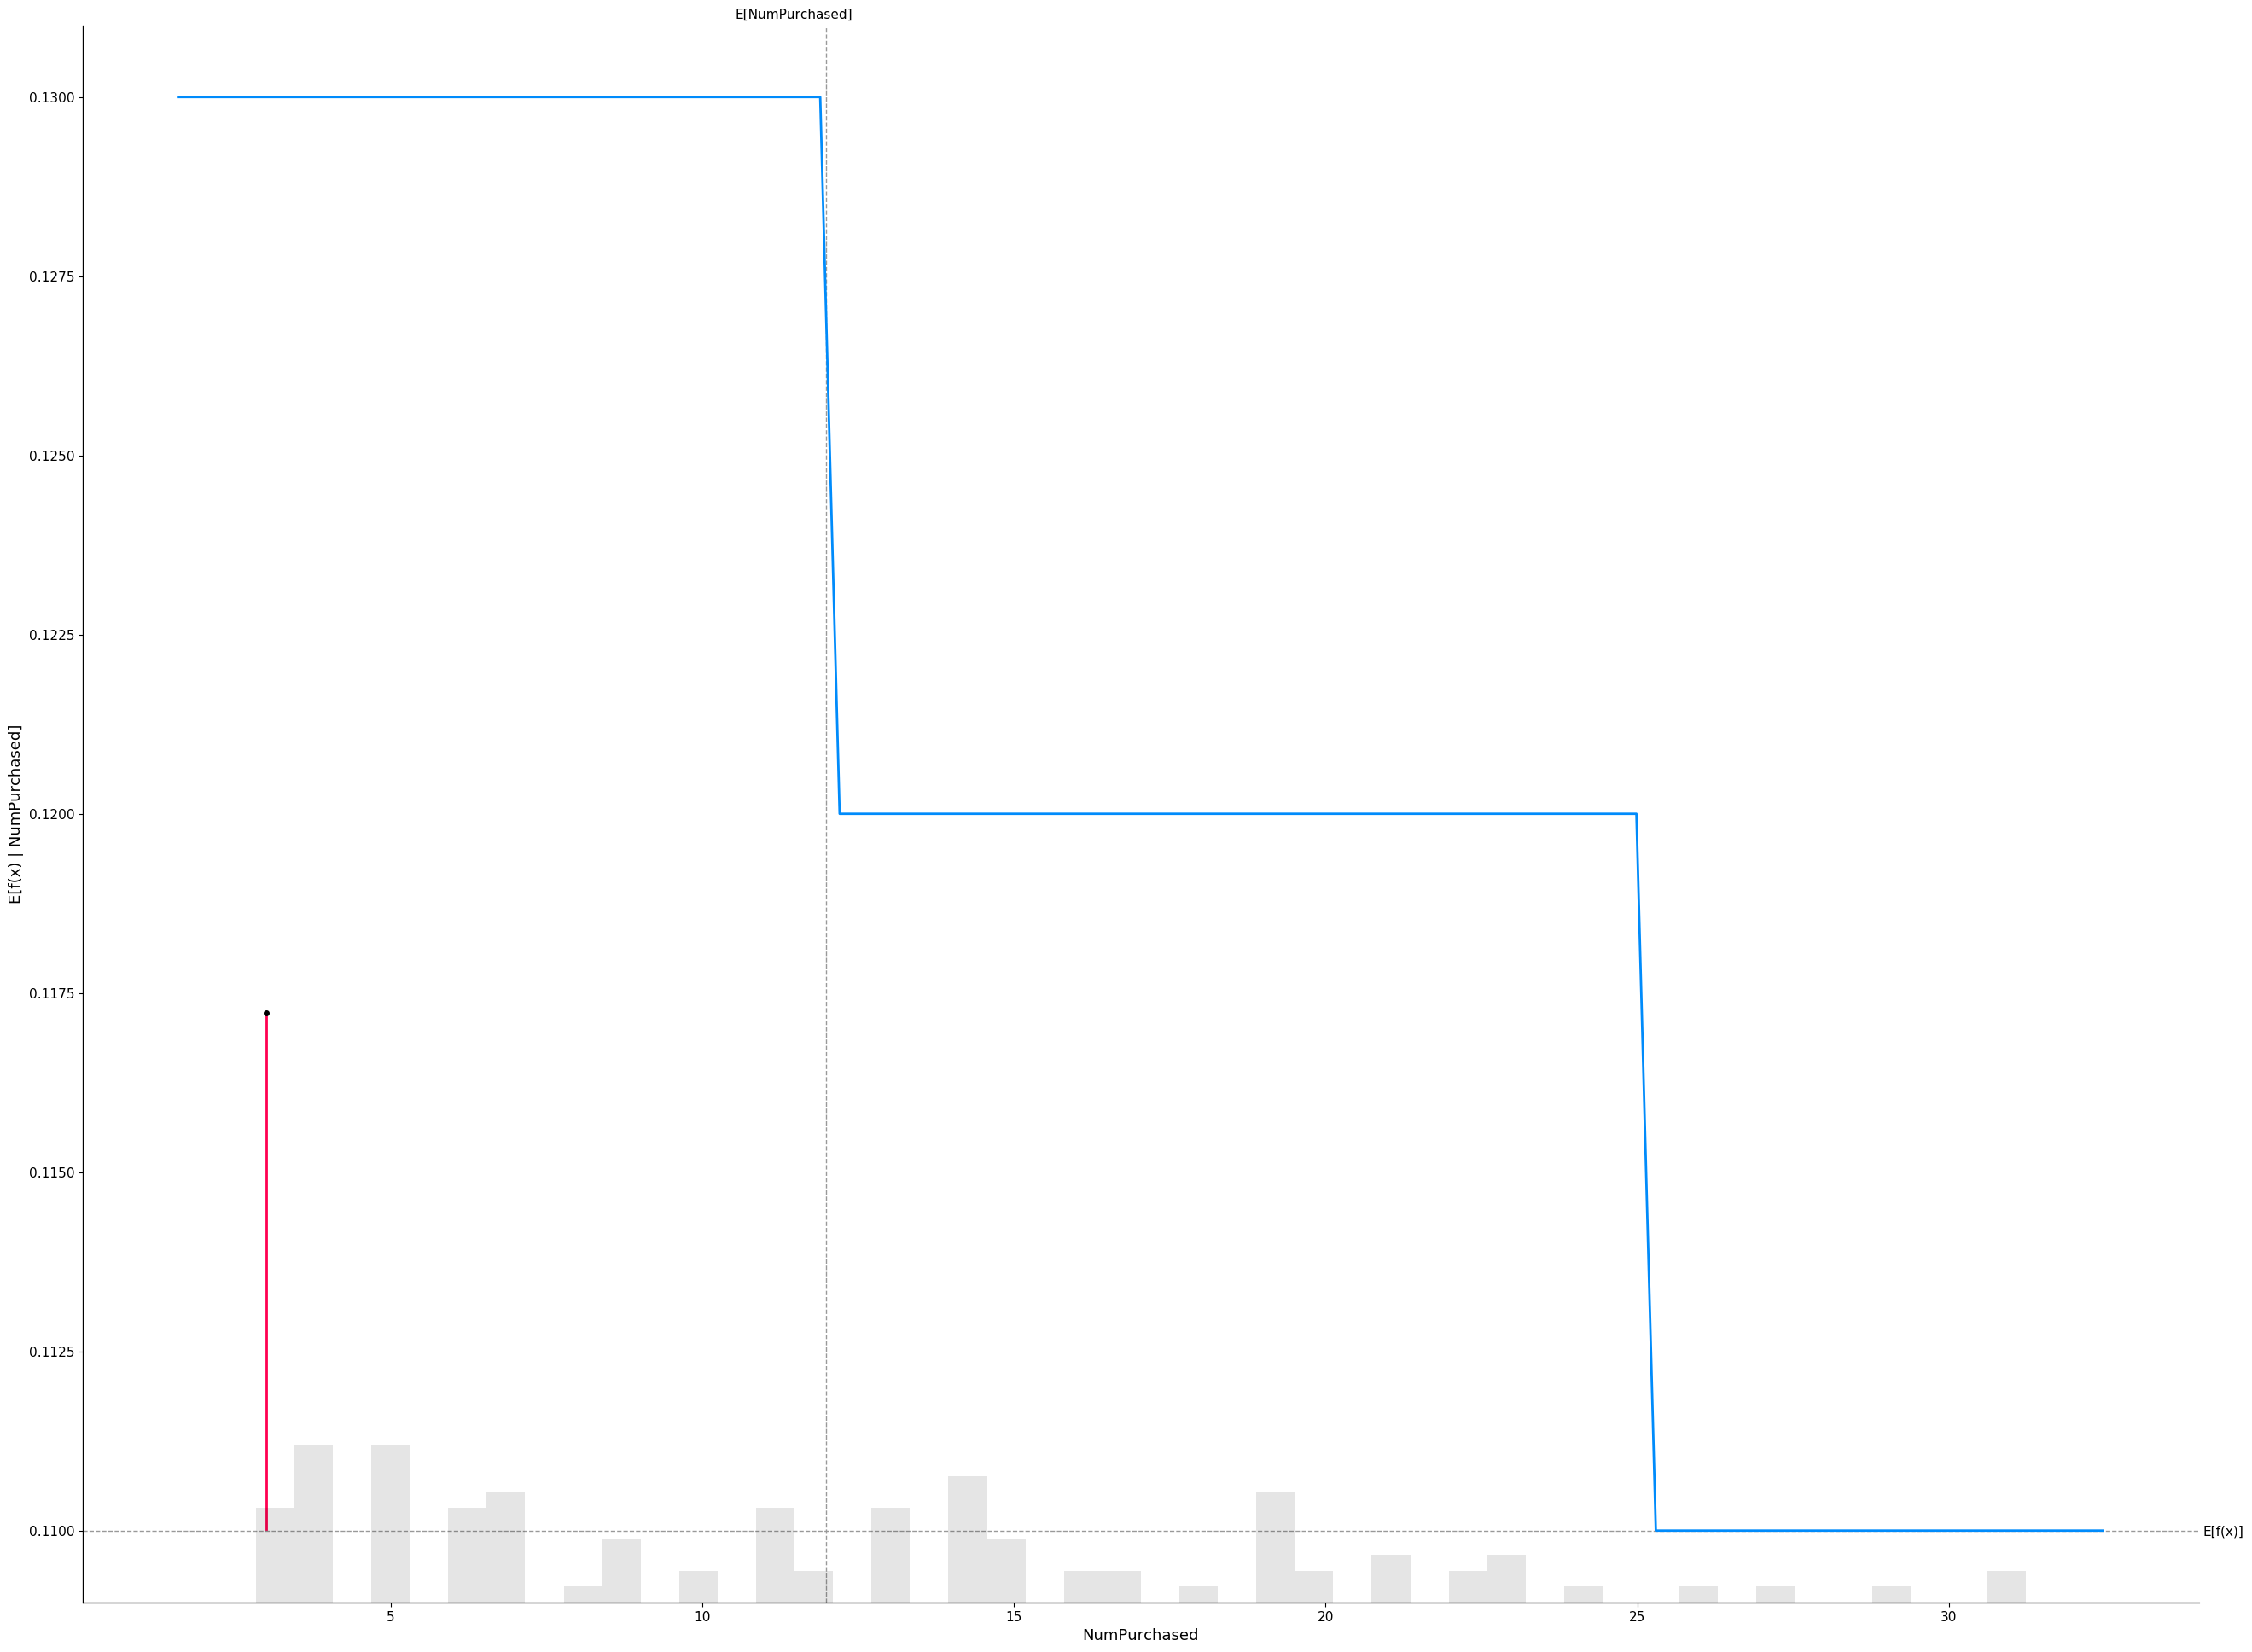

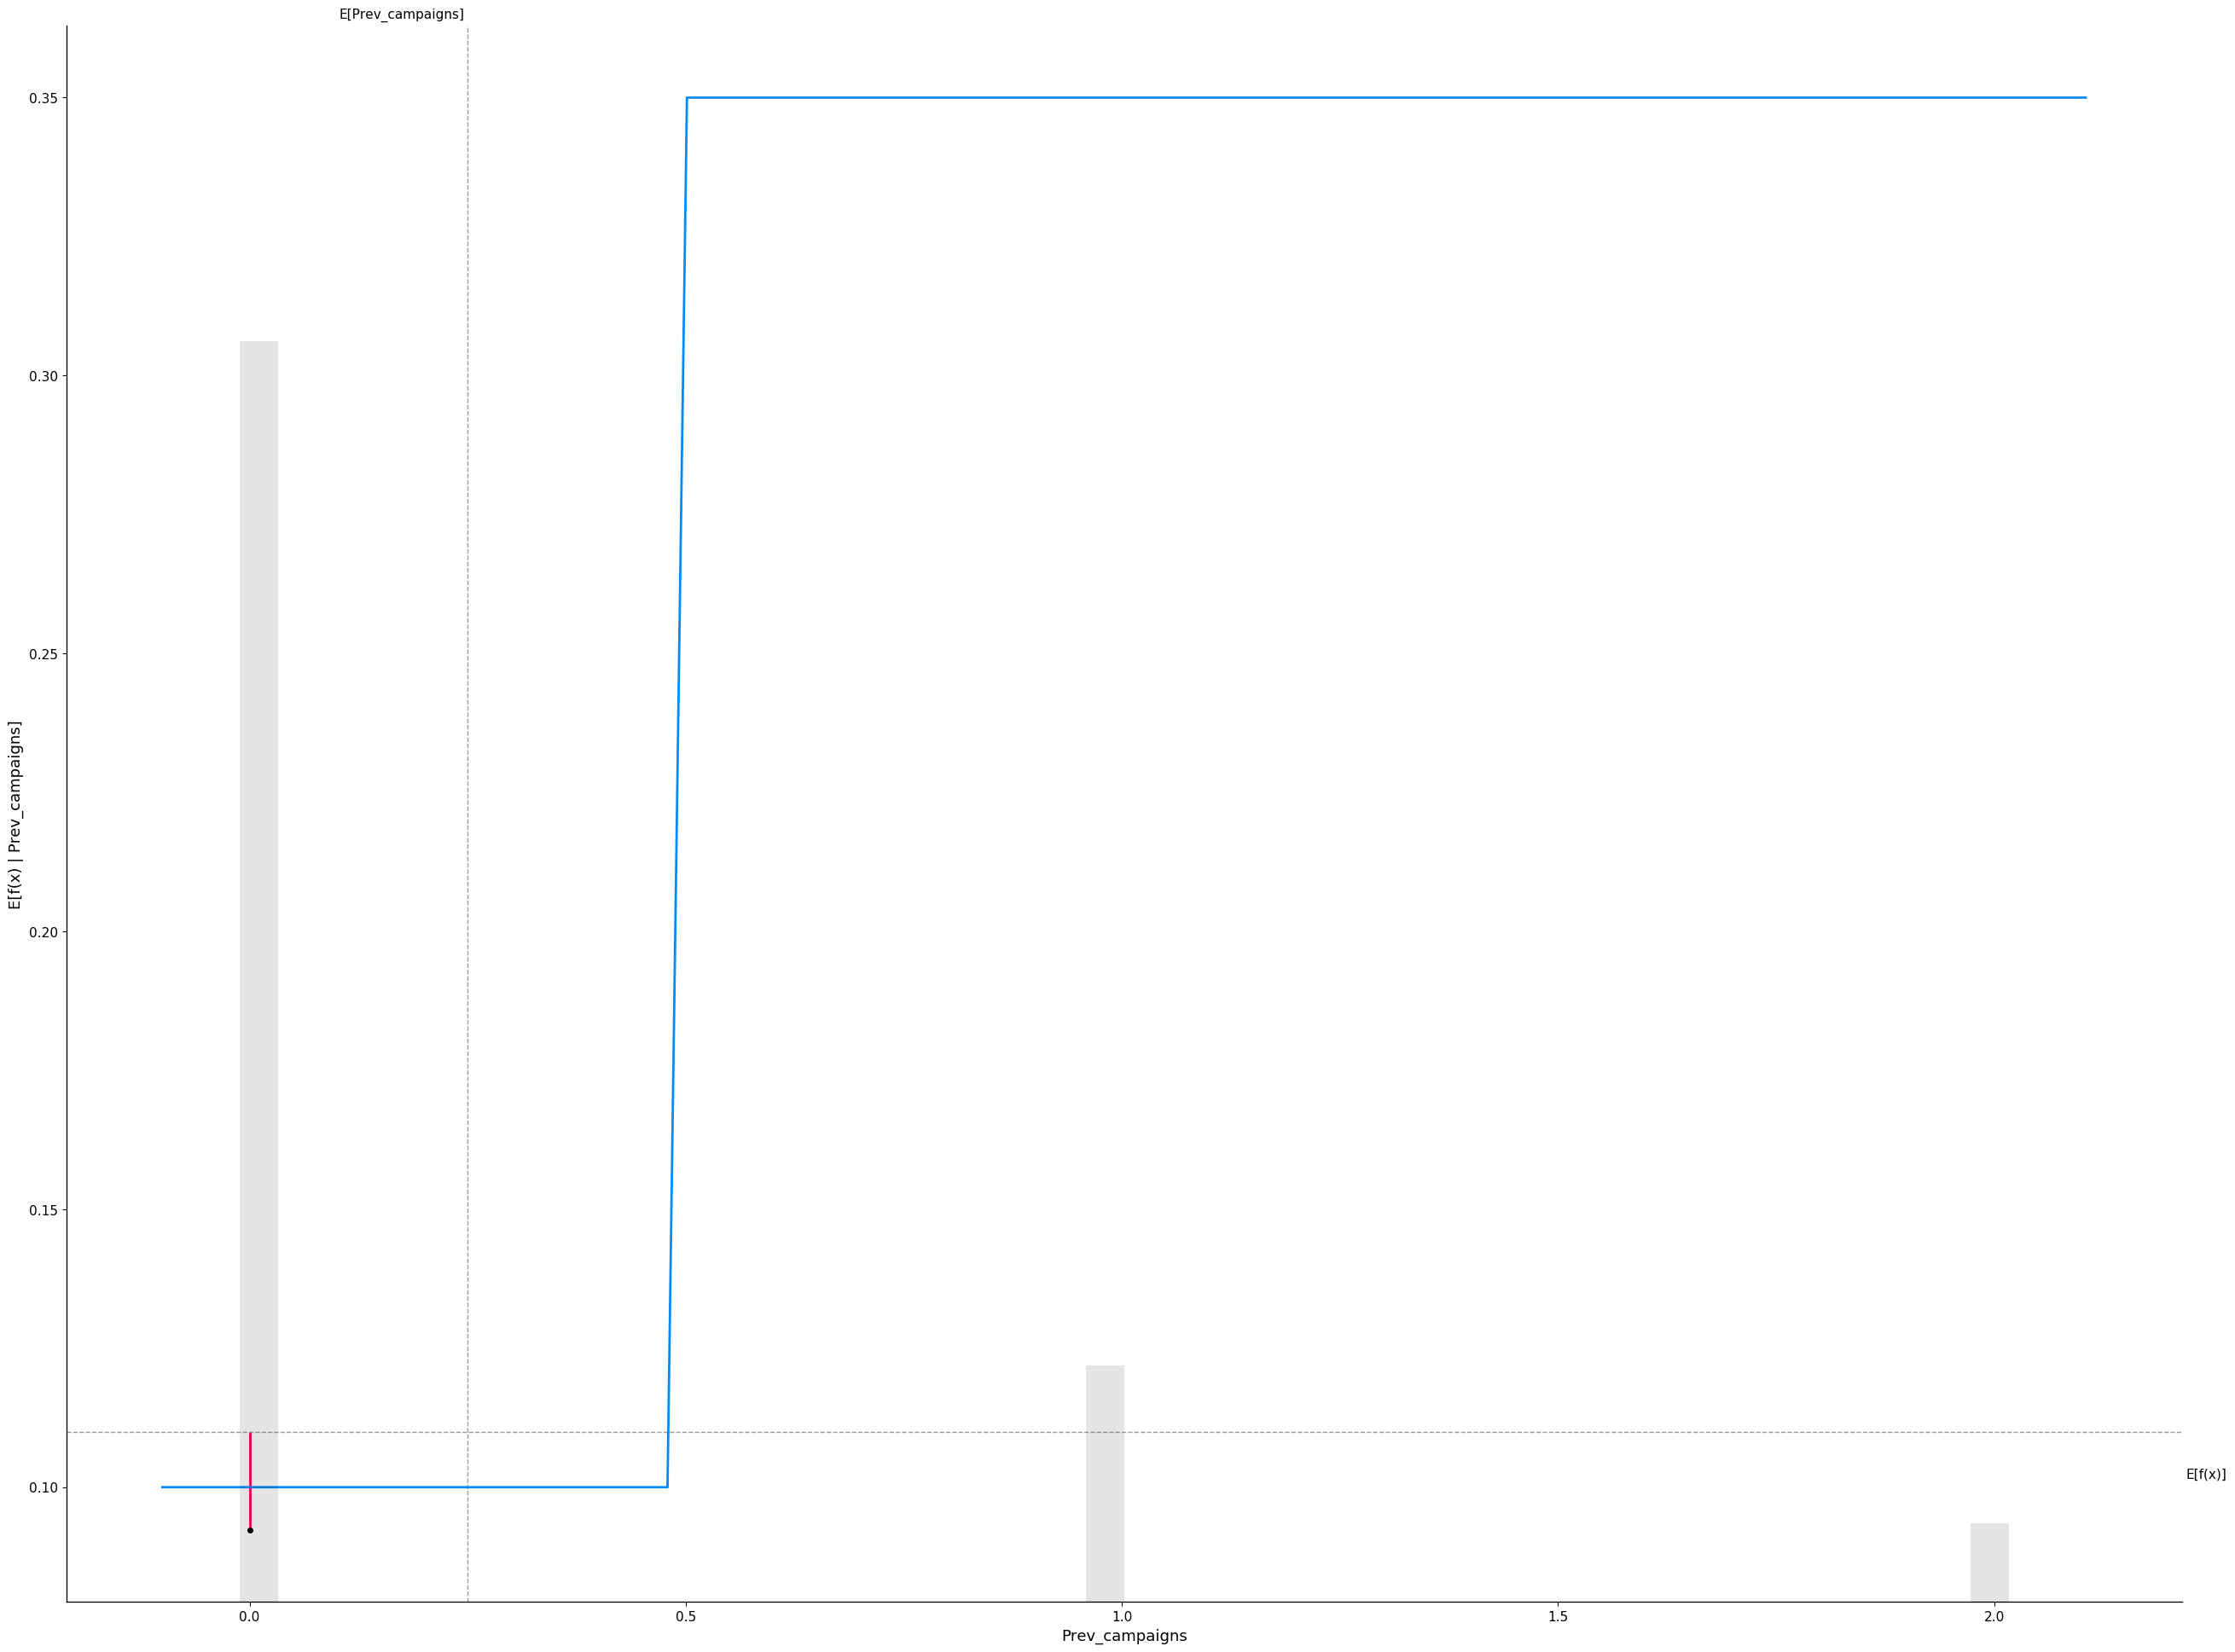

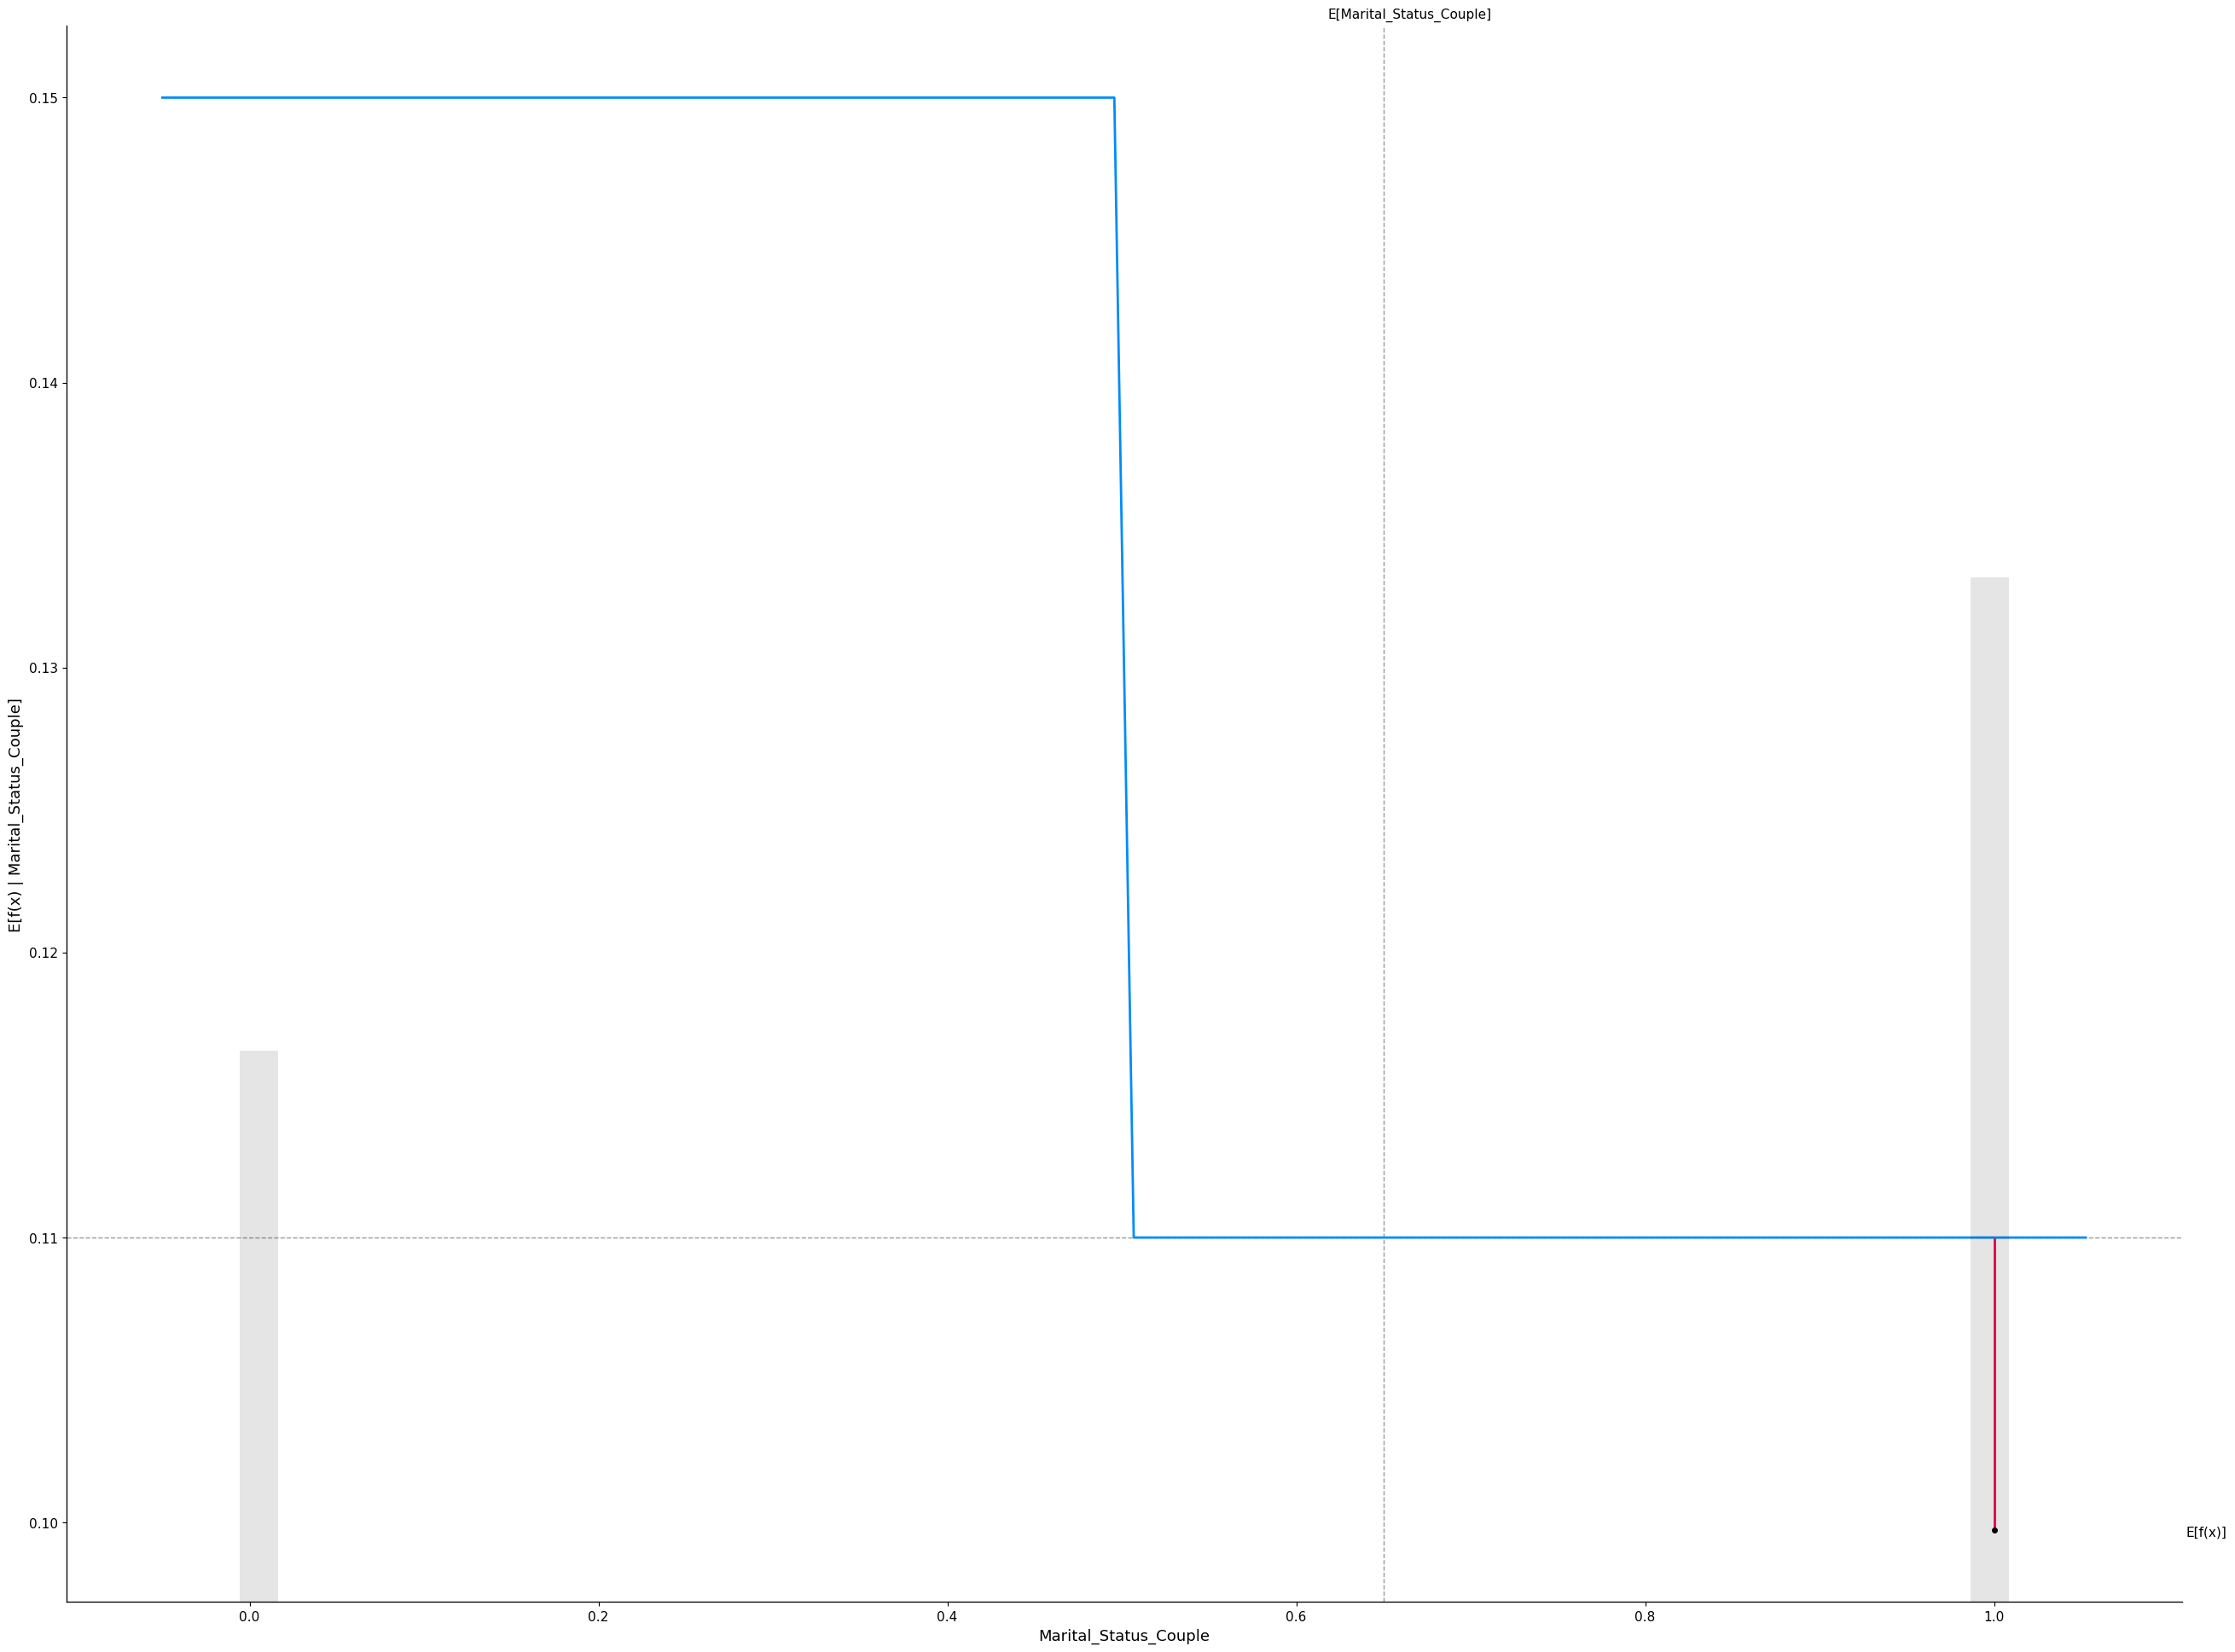

In [458]:
# SHAP explanation of a tree based model
tree_explainer = shap.Explainer(dtc.predict, x_train_100)
tree_shap_values = tree_explainer(x_train)
for i in x_train.columns:
    # make a standard partial dependence plot
    sample_ind = 18
    shap.partial_dependence_plot(
        i,
        dtc.predict,
        x_train_100,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=tree_shap_values[sample_ind : sample_ind + 1, :],
    )

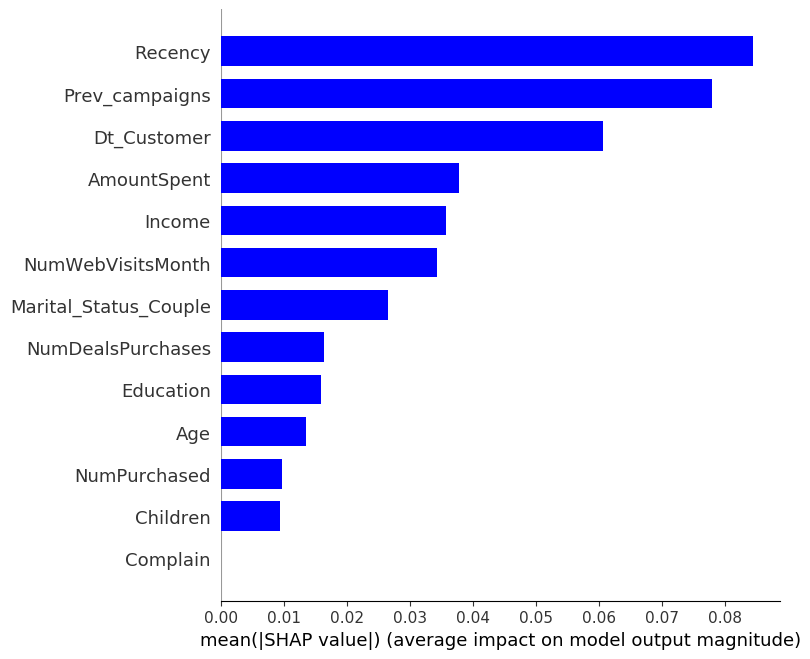

In [459]:
# SHAP variable importance for Tree based model
shap.summary_plot(tree_shap_values, x_train, plot_type="bar", color="blue")

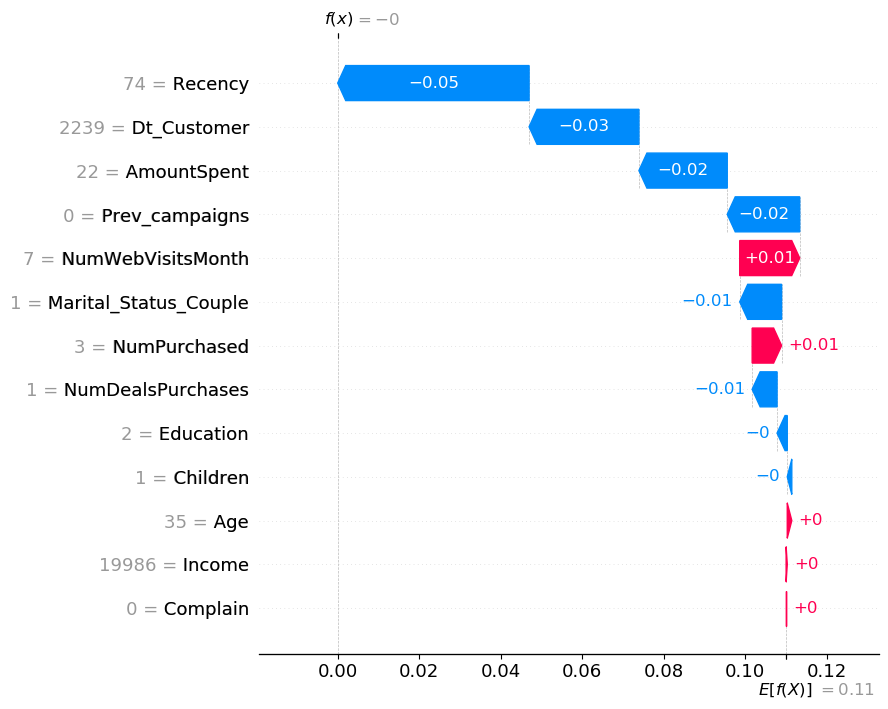

In [460]:
# Waterfall plot for Tree Based Model
shap.plots.waterfall(tree_shap_values[sample_ind], max_display=14)

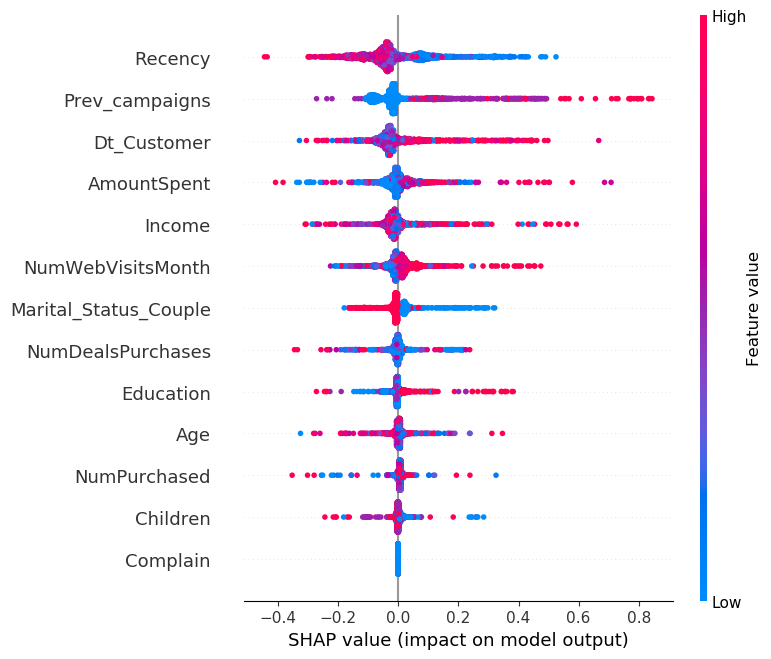

In [461]:
# SHAP summary for Tree Based Model
shap.summary_plot(tree_shap_values, x_train)

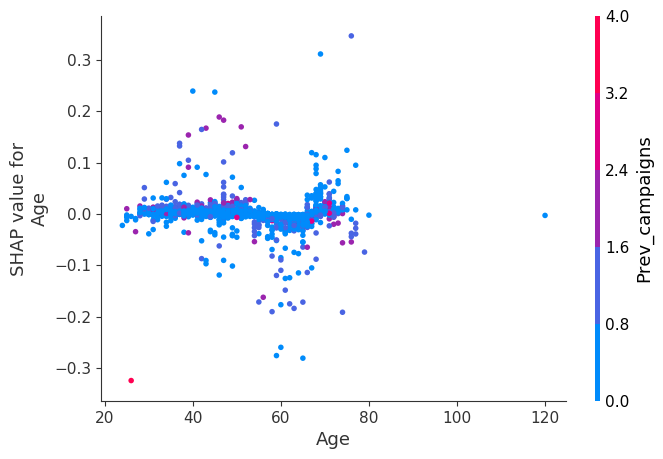

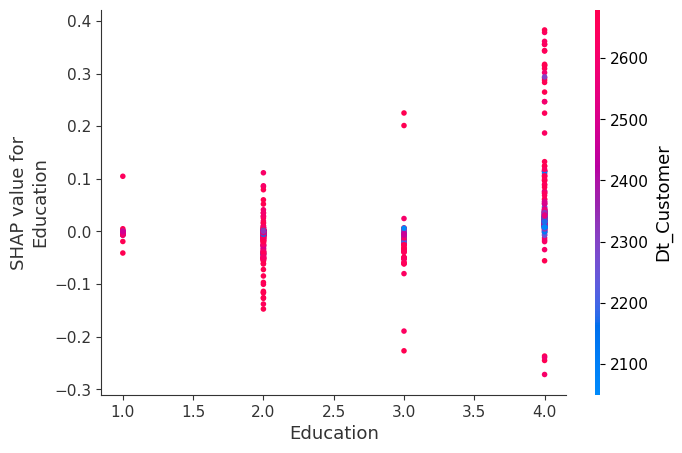

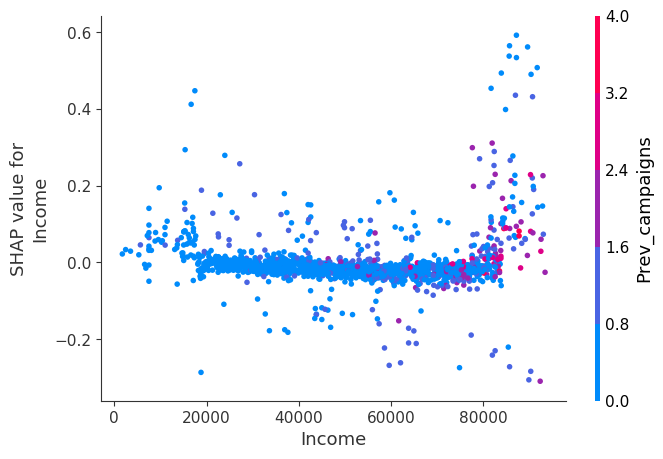

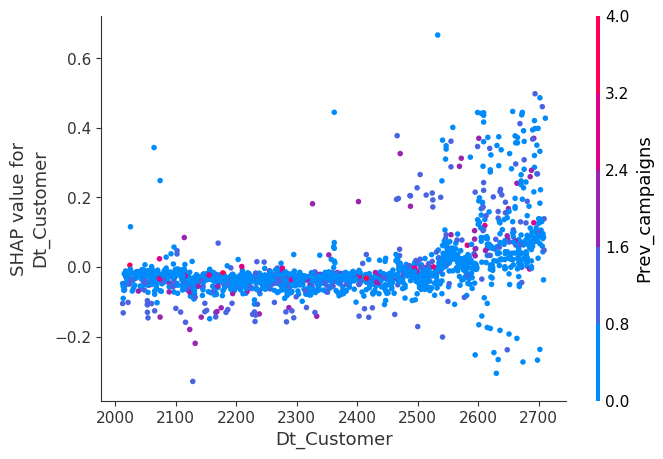

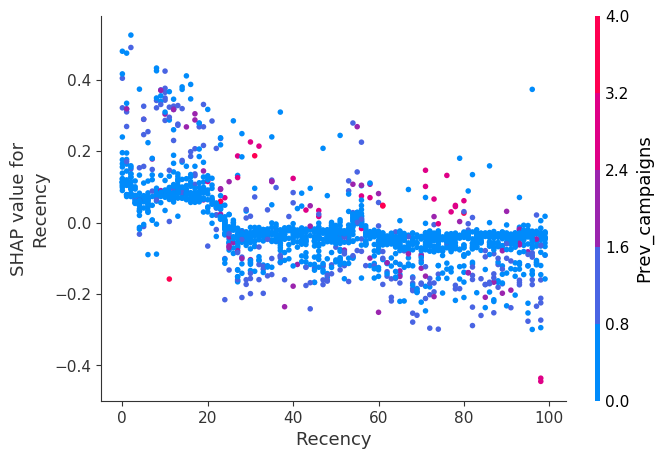

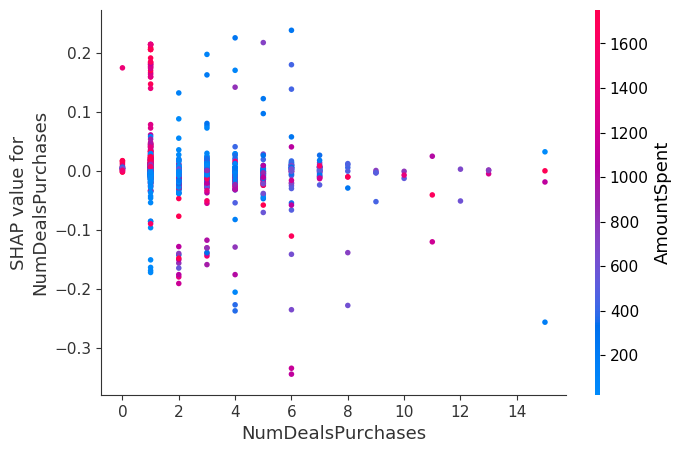

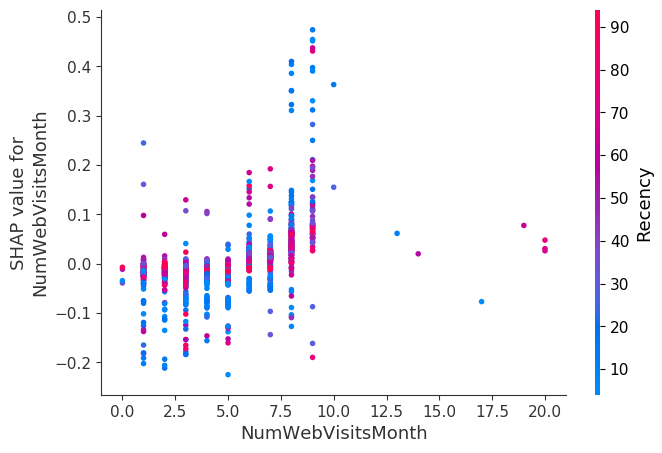

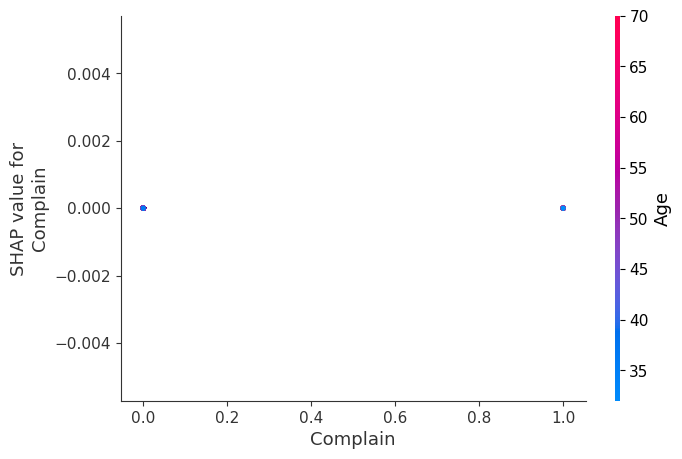

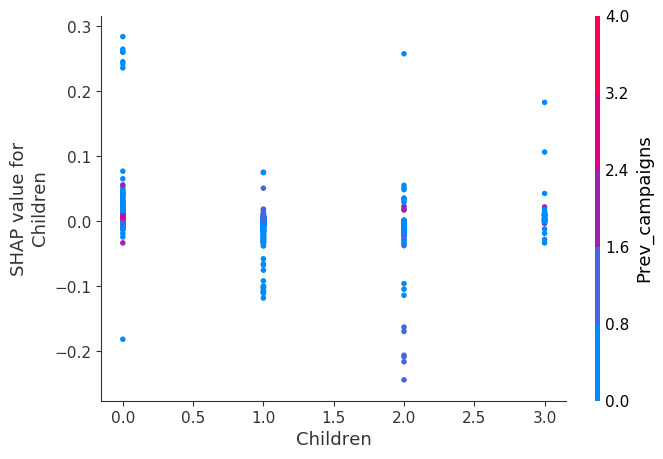

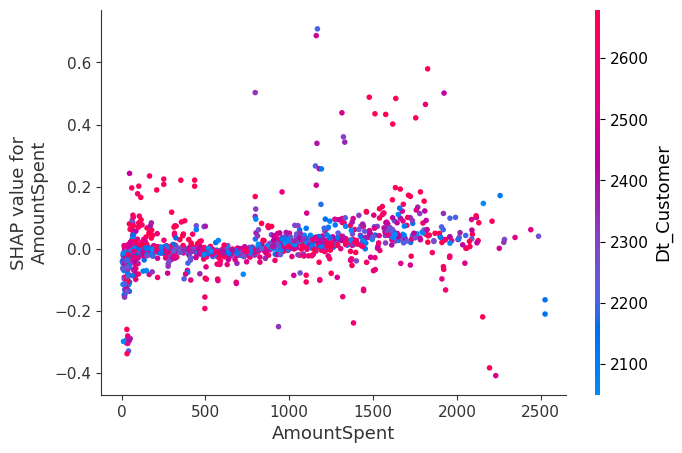

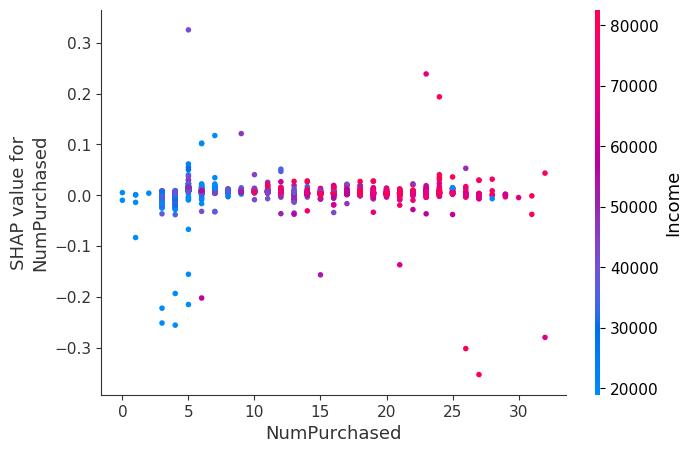

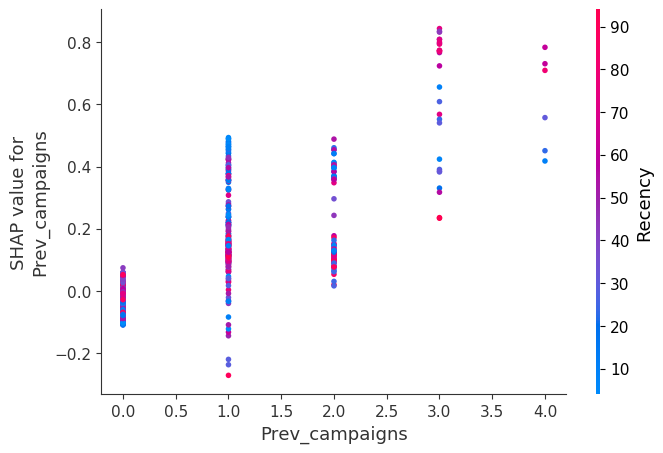

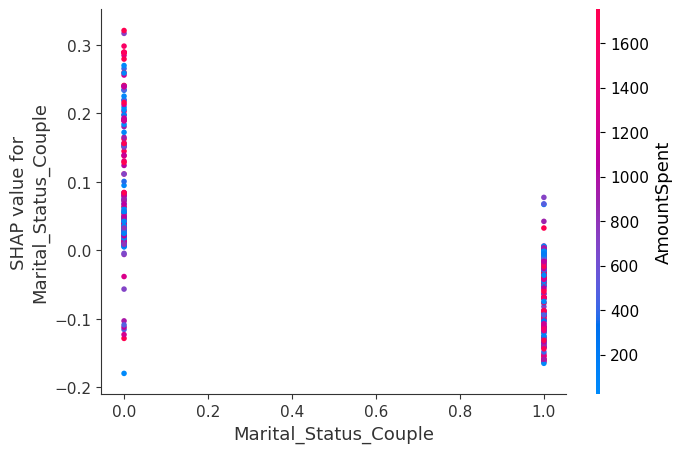

In [462]:
# SHAP partial dependence plot for a tree based model
for i in x_train.columns:
    shap.dependence_plot(i, tree_shap_values.values, x_train)

## Interpreting SHAP dependence plot for Tree-based model
The SHAP dependence plot shows the marginal effect one or two features have on the predicted outcome of a machine learning model. It tells whether the relationship between the target and a feature is linear, monotonic, or more complex. Let us interpret the Tree-based models using the SHAP dependence plot. 

1. The tree model shows  a very complex dependency for every feature which is difficult to interpret

Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
/Users/makarandmadhavi/opt/miniconda3/lib/python3.9/site-packages/sklearn/inspection/_partial_dependence.py:153: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_eval.iloc[:, variable] = new_values[i]
/Users/makarandmadhavi/opt/miniconda3/lib/python3.9/site-packages/sklearn/inspection/_partial_dependence.py:153: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_eval.iloc[:

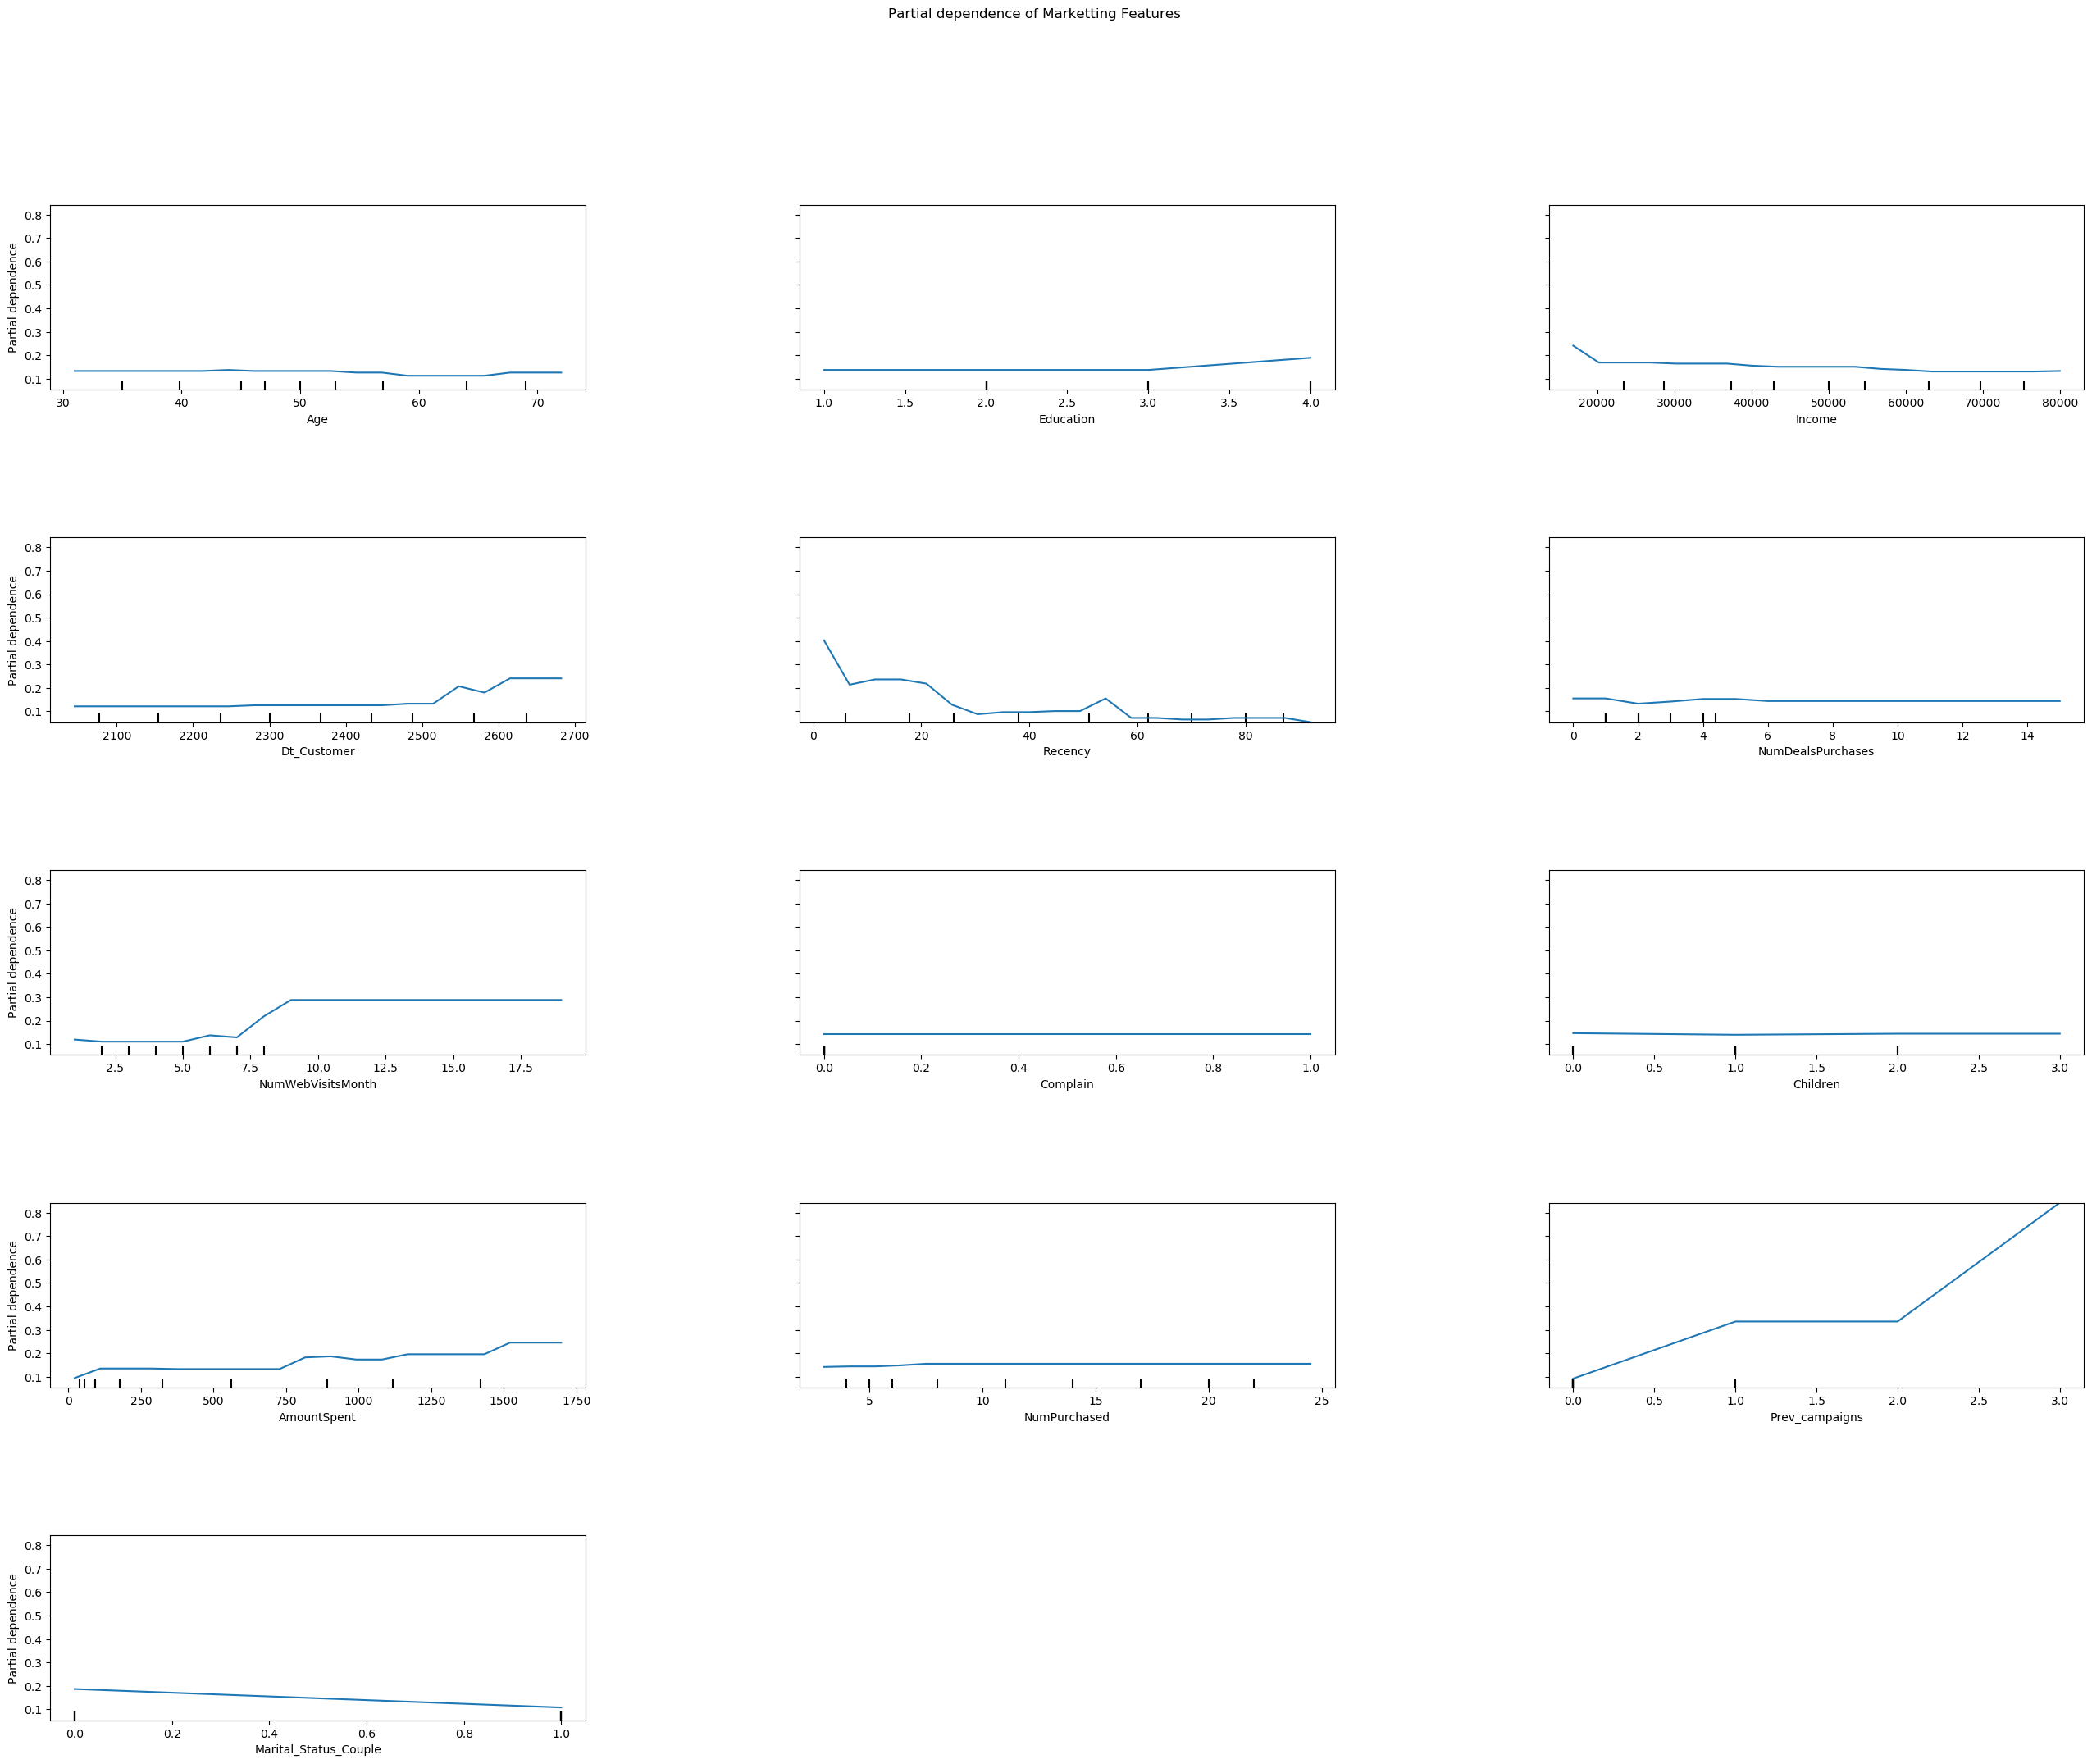

In [463]:
# PDP Plot for Tree based Model
plot_partial_dependence(
    dtc, X_test, X_test.columns, n_jobs=3, grid_resolution=20
)


fig = plt.gcf()
fig.suptitle("Partial dependence of Marketting Features")
fig.subplots_adjust(wspace=0.4, hspace=0.8)
plt.show()
plt.rcParams["figure.figsize"] = (32, 24)

**Comparision between SHAP and Partial Dependence Plot Analysis**


SHAP uses the black-box model to calculate the marginal contribution to the prediction for each feature and then relies on the theoretically sound game theory concept of Shapley values to calculate the feature importance. In this way

1. PDP gives the extent of effect a variable has on the output by freezing the rest of them
2. SHAP gives how much each variable contributes to the prediction

We have to analyze our needs and then consider the tradeoff to select the best suitable interpretable method for the ML model

# AutoML

In [465]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment Homebrew (build 11.0.18+0); OpenJDK 64-Bit Server VM Homebrew (build 11.0.18+0, mixed mode)
  Starting server from /Users/makarandmadhavi/opt/miniconda3/lib/python3.9/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/qv/7nzw1kfx2wg1fmvdsrhvzmsc0000gn/T/tmpwhywyfe8
  JVM stdout: /var/folders/qv/7nzw1kfx2wg1fmvdsrhvzmsc0000gn/T/tmpwhywyfe8/h2o_makarandmadhavi_started_from_python.out
  JVM stderr: /var/folders/qv/7nzw1kfx2wg1fmvdsrhvzmsc0000gn/T/tmpwhywyfe8/h2o_makarandmadhavi_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  --------------------------------------
H2O_cluster_uptime:         01 secs
H2O_cluster_timezone:       America/New_York
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.1
H2O_cluster_version_age:    2 months and 1 day
H2O_cluster_name:           H2O_from_python_makarandmadhavi_scmcuh
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    4 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.9.12 final
--------------------------  --------------------------------------

In [466]:
df = h2o.H2OFrame(data)
df["Response"] = df["Response"].asfactor()
df.describe(chunk_summary=True)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:2214
Cols:14

Chunk compression summary: 
chunk_type    chunk_name                 count    count_percentage    size     size_percentage
------------  -------------------------  -------  ------------------  -------  -----------------
CBS           Binary                     2        14.2857             694  B   1.51396
CXI           Sparse Integers            1        7.14286             118  B   0.257417
C1N           1-Byte Integers (w/o NAs)  8        57.1429             17.8 KB  39.8255
C2            2-Byte Integers            2        14.2857             8.8 KB   19.6161
C8D           64-bit Reals               1        7.14286             17.4 KB  38.7871

Frame distribution summary: 
                 size     number_of_rows    number_of_chunks_per_column    number_of_chunks
---------------  -------  ----------------  -----------------------------  ------------------
127.0.0.1:54321  44.8 KB  2214              1                              14
mean             44.8 KB  2214              1                              14
min              44.8 KB  2214              1                              14
max              44.8 KB  2214              1                              14
stddev           0  B     0                 0                              0
total            44.8 KB  2214              1                              14

Age                 Education           Income              Dt_Customer         Recency             NumDealsPurchases    NumWebVisitsMonth    Complain              Response    Children            AmountSpent        NumPurchased        Prev_campaigns      Marital_Status_Couple
-------  ------------------  ------------------  ------------------  ------------------  ------------------  -------------------  -------------------  --------------------  ----------  ------------------  -----------------  ------------------  ------------------  -----------------------
type     int                 int                 real                int                 int                 int                  int                  int                   enum        int                 int                int                 int                 int
mins     24.0                1.0                 1730.0              2012.0              0.0                 0.0                  0.0                  0.0                               0.0                 5.0                0.0                 0.0                 0.0
mean     51.21318879855459   2.6644083107497774  51266.54151810947   2365.746160794945   49.175700090334274  2.333785004516709    5.355465221318874    0.009485094850948509              0.9579945799457986  597.1404697380312  12.468383017163509  0.2836495031616975  0.6454381210478771
maxs     127.0               4.0                 93404.0             2711.0              99.0                15.0                 20.0                 1.0                               3.0                 2525.0             32.0                4.0                 1.0
sigma    11.971976898459362  0.8389671998614283  20244.354655689065  202.18840379501523  28.94522190386703   1.8937351087986132   2.4064276849329103   0.0969503648918201                0.7500846453017618  594.2820231606587  7.1490264841217295  0.6544602133173475  0.4784884153133252
zeros    0                   0                   0                   0                   28                  30                   7                    2193                              618                 0                  4                   1768                785
missing  0                   0                   0                   0                   0                   0                    0                    0                     0           0                   0                  0                   0                   0
0        63.0                2.0                 58138.0             2675.0              58.0                3.0                  7.0                  0.0                   1           0.0                 1617.0             22.0                0.0                 0.0
1        66.0                2.0                 46344.0             2125.0              38.0                2.0                  5.0                  0.0                   0           2.0                 27.0               4.0                 0.0                 0.0
2        55.0                2.0                 71613.0             2324.0              26.0                1.0                  4.0                  0.0                   0           0.0                 776.0              20.0                0.0                 1.0
3        36.0                2.0                 26646.0             2151.0              26.0                2.0                  6.0                  0.0                   0           1.0                 53.0               6.0                 0.0                 1.0
4        39.0                4.0                 58293.0             2173.0              94.0                5.0                  5.0                  0.0                   0           1.0                 422.0              14.0                0.0                 1.0
5        53.0                3.0                 62513.0             2305.0              16.0                2.0                  6.0                  0.0                   0           1.0   

Splitting data into train test and validation with 70%, 20% and 10% distribution

In [467]:
train, test, valid = df.split_frame(ratios=[0.7, 0.20], seed=1)

In [468]:
aml = H2OAutoML(max_models=10, balance_classes=True, seed=1)
aml.train(training_frame = train, y = 'Response')

AutoML progress: |
19:06:41.433: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20230409_190641


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       9/10
# GBM base models (used / total)           5/6
# DRF base models (used / total)           2/2
# GLM base models (used / total)           1/1
# DeepLearning base models (used / total)  1/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.030471489552317117
RMSE: 0.1745608477073743
LogLoss: 0.12196007823394331
AUC: 0.989777117384844
AUCPR: 0.9480304992034136
Gini: 0.979554234769688
Null degrees of freedom: 1570
Residual degrees of freedom: 1561
Null deviance: 1290.6315009362133
Residual deviance: 383.19856581104995
AIC: 403.19856581104995

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4446404177788561
       0     1    Error    Rate
-----  ----  ---  -------  -------------
0      1323  23   0.0171   (23.0/1346.0)
1      25    200  0.1111   (25.0/225.0)
Total  1348  223  0.0306   (48.0/1571.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.44464      0.892857  148
max f2                       0.34831      0.907118  166
max f0point5                 0.606697     0.903866  117
max accuracy                 0.458147     0.969446  146
max precision                0.998543     1         0
max recall                   0.0655432    1         305
max specificity              0.998543     1         0
max absolute_mcc             0.44464      0.875052  148
max min_per_class_accuracy   0.273777     0.946667  187
max mean_per_class_accuracy  0.235373     0.949904  200
max tns                      0.998543     1346      0
max fns                      0.998543     223       0
max fps                      0.000532344  1346      399
max tps                      0.0655432    225       305
max tnr                      0.998543     1         0
max fnr                      0.998543     0.991111  0
max fpr                      0.000532344  1         399
max tpr                      0.0655432    1         305

Gains/Lift Table: Avg response rate: 14.32 %, avg score: 16.42 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0101846                   0.96383            6.98222    6.98222            1                0.978212    1                           0.978212            0.0711111       0.0711111                  598.222   598.222            0.0711111
2        0.0203692                   0.946321           6.98222    6.98222            1                0.957129    1                           0.96767             0.0711111       0.142222                   598.222   598.222            0.142222
3        0.0305538                   0.926883           6.98222    6.98222            1                0.935668    1                           0.957003            0.0711111       0.213333                   598.222   598.222            0.213333
4        0.0401018                   0.89086            6.98222  

## Understanding the Terminologies

**MSE** (Mean Squared Error) is a commonly used metric for evaluating regression models that measures the average of the squared differences between the predicted values and the actual values.

**RMSE** (Root Mean Squared Error) is the square root of the MSE and is also used as a metric for evaluating regression models. It is preferred over MSE because it is in the same units as the target variable and is easier to interpret.

**LogLoss** (Logarithmic Loss) is a commonly used metric for evaluating classification models that measures the performance of the model based on the predicted probabilities. It penalizes the model more heavily for incorrect predictions with high confidence.

**AUC** (Area Under the Curve) is a metric for evaluating binary classification models that measures the performance of the model across all possible threshold values. It represents the probability that a randomly chosen positive example will be ranked higher than a randomly chosen negative example.

**AUCPR** (Area Under the Precision-Recall Curve) is another metric for evaluating binary classification models that measures the trade-off between precision and recall. It represents the average precision across all possible threshold values.

**Gini** is a metric for evaluating classification models that measures the difference between the observed distribution of class labels and the expected distribution under random chance. It is often used in conjunction with the AUC.

**Null degrees of freedom and residual degrees of freedom** are used in statistical models to describe the number of parameters estimated and the number of independent observations used in the model. The null degrees of freedom represent the number of parameters estimated in a null model (usually a model with no predictors), and the residual degrees of freedom represent the number of independent observations minus the number of parameters estimated in the full model.

**Null deviance and residual deviance** are measures of the goodness-of-fit of a statistical model. The null deviance represents the deviance of a null model (usually a model with no predictors), and the residual deviance represents the deviance of the full model after accounting for the predictors.

**AIC** (Akaike Information Criterion) is a measure of the relative quality of a statistical model for a given set of data. It balances the goodness-of-fit of the model with the complexity of the model, penalizing models with a larger number of parameters. Lower values of AIC indicate a better fit.


In [469]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse        mse
-------------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------
StackedEnsemble_AllModels_1_AutoML_1_20230409_190641     0.8914     0.263915  0.616276                0.208265  0.282443  0.0797741
StackedEnsemble_BestOfFamily_1_AutoML_1_20230409_190641  0.891174   0.264591  0.616339                0.216782  0.282487  0.0797988
GBM_1_AutoML_1_20230409_190641                           0.881816   0.278652  0.598398                0.219396  0.292009  0.0852694
DRF_1_AutoML_1_20230409_190641                           0.872797   0.506494  0.54293                 0.219807  0.325348  0.105852
GLM_1_AutoML_1_20230409_190641                           0.868493   0.282184  0.586147                0.242341  0.291099  0.0847389
GBM_4_AutoML_1_20230409_190641                           0.868273   0.324335  0.529006                0.22719   0.314338  0.0988086
GBM_5_AutoML_1_20230409_190641                           0.867324   0.310506  0.568849                0.206115  0.306003  0.0936379
XRT_1_AutoML_1_20230409_190641                           0.865807   0.35766   0.526476                0.228304  0.329328  0.108457
GBM_3_AutoML_1_20230409_190641                           0.865767   0.316751  0.554629                0.205704  0.308517  0.0951827
DeepLearning_1_AutoML_1_20230409_190641                  0.865045   0.300339  0.568582                0.243442  0.297329  0.0884043
GBM_2_AutoML_1_20230409_190641                           0.860447   0.316849  0.551832                0.229432  0.309183  0.0955941
GBM_grid_1_AutoML_1_20230409_190641_model_1              0.851326   0.335217  0.506782                0.230546  0.32042   0.102669
[12 rows x 7 columns]

## Model Leaderboard

The above leaderboard shows models ranked according to their AUC, with highest AUC being the best performing model

Our best performing model is a stacked Ensemble model made by combining different GBM XGBoost or XRT models

In [470]:
#Getting the best model
best_model = h2o.get_model(lb[0,"model_id"])
best_model.model_performance(test)

ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.08336706301152752
RMSE: 0.2887335502007474
LogLoss: 0.27552613376518104
AUC: 0.8938127090301002
AUCPR: 0.6720307734184364
Gini: 0.7876254180602005
Null degrees of freedom: 432
Residual degrees of freedom: 423
Null deviance: 380.7153717961534
Residual deviance: 238.60563184064674
AIC: 258.60563184064677

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.24701861589834676
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      328  36   0.0989   (36.0/364.0)
1      21   48   0.3043   (21.0/69.0)
Total  349  84   0.1316   (57.0/433.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.247019     0.627451  81
max f2                       0.166594     0.728643  118
max f0point5                 0.521565     0.665236  39
max accuracy                 0.521565     0.889145  39
max precision                0.995174     1         0
max recall                   0.00368046   1         365
max specificity              0.995174     1         0
max absolute_mcc             0.247019     0.552352  81
max min_per_class_accuracy   0.1702       0.826087  116
max mean_per_class_accuracy  0.166594     0.832378  118
max tns                      0.995174     364       0
max fns                      0.995174     68        0
max fps                      0.000168223  364       399
max tps                      0.00368046   69        365
max tnr                      0.995174     1         0
max fnr                      0.995174     0.985507  0
max fpr                      0.000168223  1         399
max tpr                      0.00368046   1         365

Gains/Lift Table: Avg response rate: 15.94 %, avg score: 15.16 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0115473                   0.934261           6.27536   6.27536            1                0.962209    1                           0.962209            0.0724638       0.0724638                  527.536   527.536            0.0724638
2        0.0207852                   0.881145           4.70652   5.5781             0.75             0.909101    0.888889                    0.938606            0.0434783       0.115942                   370.652   457.81             0.113195
3        0.0300231                   0.832525           4.70652   5.30992            0.75             0.856454    0.846154                    0.913328            0.0434783       0.15942                    370.652   430.992            0.153926
4        0.0415704                   0.771076           5.02029   5.22947            0.8              0.810352    0.833333                    0.884724            0.057971        0.217391                   402.029   422.947            0.20915
5        0.0508083                   0.680825           6.27536   5.41963            1                0.699267    0.863636                    0.851004            0.057971        0.275362                   527.536   441.963            0.267121
6        0.101617                    0.501389           3.70817   4.5639             0.590909         0.59051     0.727273                    0.720757            0.188406        0.463768                   270.817   356.39             0.430801
7        0.150115                    0.337096           2.39061   3.86176            0.380952         0.41341     0.615385                    0.62146      

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

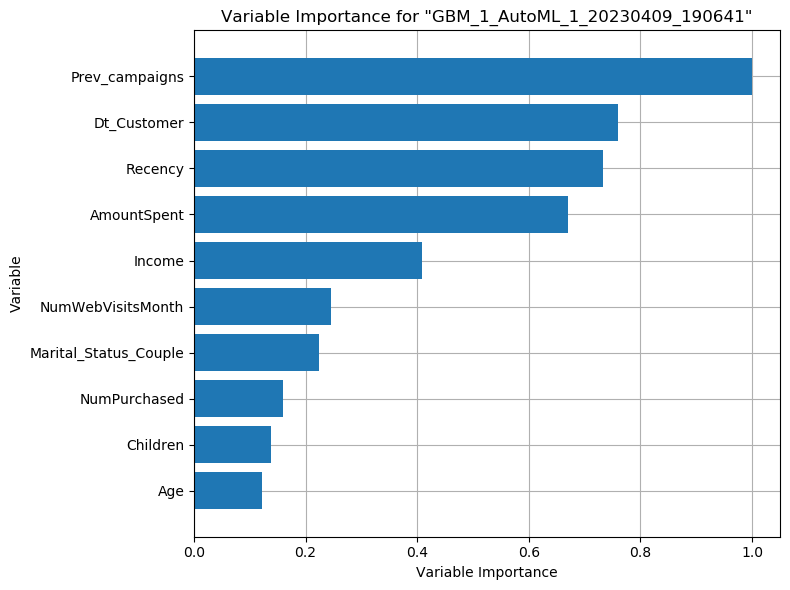

In [471]:
explain_model = aml.explain(frame = test, figsize = (8,6),include_explanations=['varimp'])
